In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import csv
import math

In [37]:
data = [[4933.000000000001, [[0.15501196245013052, 0.3639221745084079, 0.3184781340704139, 0.16258772897104767, 0.14285749618533602, 0.002846329092917308, 1.4929274019941594], [0.5071475213225574, 0.2999545062909872, 0, 0.19289797238645542, 0.773426968789656, 0.06927372255867965, 0.31995852323191887], [0.006585043994993103, 0.7498338311526597, 0, 0.24358112485234729, 0.6395304354735891, 0.004329128891655038, 0.4359876276806288], [0.17827456935916905, 0.035396634894846235, 0.42238973525610457, 0.3639390604898801, 0.015275188454257618, 0.9663440556217056, 0.869709726559798], [0.3729683116337167, 0.033468759568012, 0.5805825418749022, 0.01298038692336911, 1.1862182894358537, 0.6511415588256722, 0.8895860884027861], [0.024178683880910403, 0.36307036278371185, 0, 0.6127509533353778, 0.4166755699003732, 0.3061168965557386, 0.35418311696661725], [0.424175944117649, 0.11185962958939043, 0, 0.46396442629296064, 0.7327075565124709, 0.09425867110531867, 0.19120784622024317], [0.2692711527186119, 0.5852089343766103, 0, 0.1455199129047779, 0.6172134456826838, 0.4529307231559015, 0.19738315660817285], [0.0635350465078948, 0.7926974279528953, 0.05416438194747619, 0.08960314359173363, 0.18796381991158767, 0.5350941197018104, 0.6674208167365203], [0.3352172155588672, 0.5820656212522047, 0.029445683991312532, 0.05327147919761552, 0.6525249997340463, 0.5995063053527212, 0.12475535928904227], [0.1866332853183235, 0.5393654563733206, 0.08008001685906652, 0.19392124144928946, 0.25846467076073193, 0.3715102133408002, 0.7759698528794273], [0.08744318269631898, 0.6199627422620632, 0.021154098244221764, 0.271439976797396, 0.5611809618520524, 0.28144941200275486, 0.5297760140414024], [0.15706505295869916, 0.2730862587683441, 0.23266131348293928, 0.33718737479001754, 0.5490032376079041, 0.8168343523249212, 0.16356012144199317], [0.7035205581337278, 0.14331424668545525, 0, 0.15316519518081698, 0.5670037716089319, 0.34080391141566474, 0.2502083538281579], [0.6937860001336034, 0.08348809333607637, 0, 0.22272590653032018, 0.49090064757622837, 0.6748107319543575, 0.14813112566886413], [0.14976494214623276, 0.15086877496746565, 0, 0.6993662828863016, 0.43199163439309385, 0.0015539949910869627, 0.5703187331542254], [0.22307102901990866, 0.7235959175553892, 0, 0.0533330534247022, 0.4232476802315731, 0.6356741409946887, 0.03677607918932649], [0.1080468197695668, 0.28300375022021357, 0.04003290430644291, 0.5689165257037767, 0.6040836473295991, 0.7266633622463534, 0.051784736901049705], [0.21255578639532052, 0.15474094869740546, 0, 0.632703264907274, 0.3981321816995729, 0.1816335005953601, 0.45041881558887276], [0.18154934676499346, 0.500687016679656, 0, 0.3177636365553506, 0.21592913100668873, 0.6966759814753469, 0.13587008585673715], [0.057640022420027665, 0.9025439795802522, 0, 0.03981599799972009, 0.45439698390994465, 0.3903581930325517, 0.2000749311791694], [0.28762240281702617, 0.06463737719339133, 0, 0.6477402199895824, 0.3758044512008553, 0.4842733827569782, 0.4331202323783552], [0.25728980541980834, 6.989137623154406E-4, 0.19158418526159737, 0.5504270955562788, 0.00991802071702871, 0.6447084028431662, 0.8347086312599682], [0.16066545244695976, 0.44161072970665455, 0, 0.3977238178463857, 0.45266885165474585, 0.7054332844321496, 0.14620310990715193], [0.652653909508016, 0.014293253439662956, 0.11127670029428749, 0.22177613675803348, 1.0579234115118676, 0.015885197304450184, 0.352460173338471], [0.36687099747889007, 0.62054401992515, 0, 0.012584982595960031, 0.46636030696511704, 0.10103766124586377, 0.5461622232057272], [0.04890007078511051, 0.29845478961284205, 0, 0.6526451396020474, 0.7021112424259198, 0.36061599344422995, 0.0038677082753571183], [0.6692978630687704, 0.18771279664421753, 0.009740703307478227, 0.1332486369795338, 0.2028613857089517, 0.26035681943164735, 0.9033226742777969], [0.19481590147260336, 0.04835098040321443, 0, 0.7568331181241822, 0.1744061524019766, 0.8716106658945765, 4.093338199742049E-4], [0.568253567020137, 0.2478603870146102, 0.14147620735897348, 0.04240983860627941, 0.5930303059767823, 0.38574888675136193, 0.46920128563561], [0.07466423699843482, 0.7842837202586996, 0, 0.1410520427428655, 0.18459816605469928, 0.1492188250724694, 0.6888803330322657], [0.4830165512901991, 0.18115039273276984, 0, 0.33583305597703106, 0.22504285194545723, 0.24799194109557096, 0.6214897291535771], [0.1847846304700855, 0.04854873678081431, 0.251387950871377, 0.5152786818777232, 0.3238490510721363, 0.45689667577476695, 0.7691775556355495], [0.3990014226869031, 0.2956216383849106, 0, 0.30537693892818624, 0.289885443870035, 0.039094654857173686, 0.9980762596716262], [0.23332975493638203, 0.301672121790021, 0, 0.4649981232735969, 0.09305052135597361, 0.6902834360510977, 0.330755259897582], [0.16574038651322712, 0.463794227171462, 0.3462249748486673, 0.024240411466643526, 1.1161566258106153, 0.04413805860605635, 0.5239875360555136], [0.22900173198135532, 0.13871548457719898, 0, 0.6322827834414456, 0.23066787503332478, 0.49317028900383125, 0.31259493009805844], [0.21316887922153682, 0.5939004674808251, 0.1726100390231433, 0.020320614274494726, 0.23081738825635562, 1.0797341319118976, 0.16225614143900227], [0.20119001524972574, 0.32601432042904305, 0.40927939584906814, 0.06351626847216309, 0.5190853875898971, 0.6273111828176828, 0.670601616147222], [0.5626841693469296, 0.2817855810993666, 0, 0.15553024955370384, 0.7104257406756929, 0.2856897682136988, 0.16351336524101898], [0.5991176473996834, 0.05353872935904962, 0, 0.3473436232412671, 0.5134653944800266, 0.4846991014040756, 0.032853316069490685], [0.12041129929932445, 0.6369822901616025, 0, 0.242606410539073, 0.09265970593473756, 0.2651436980667663, 0.9360728806428726], [0.1406315411504975, 0.5124733349364193, 0, 0.34689512391308325, 0.14433687677928703, 0.8643277839303002, 0.26548243699210194], [0.5216771665673658, 0.10841191098139771, 0, 0.36991092245123636, 0.19880740313892623, 0.8987277289290053, 0.027647821954892415], [0.1966102558982193, 0.10731410653237536, 0, 0.6960756375694053, 0.8249443603581076, 0.4504688339854096, 0.0037785799643416484], [0.38890577118698666, 0.5570042480179492, 0, 0.05408998079506399, 0.7248496757304089, 0.2748106882946454, 0.0354461099469205], [0.23692745684427377, 0.4276119336274603, 0.08839460976026603, 0.2470659997679999, 0.30483769527710625, 0.5632632299521019, 0.543068739061554], [0.1108278899554548, 0.6919071406991938, 0.02502867266447406, 0.17223629668087745, 0.365940398115657, 0.8780348556000307, 0.1304652479013479], [0.43670693349064144, 0.4705402517564998, 0.08723272649817604, 0.0055200882546827005, 0.13667298862973137, 1.197365884996192, 0.07639258820625716], [0.4139496365679423, 0.281567152002238, 0.2661611242585986, 0.03832208717122105, 0.3568550517072819, 0.3971054892284059, 0.8133135672019762]]], [5534.000000000001, [[0.23526189142067375, 0.18758529361437792, 0.49334625132719384, 0.08380656363775449, 0.07363652792836894, 0.0014671529135021244, 0.7695360290323685], [0.5768596400271978, 0.19362409408238593, 0.1049983994462848, 0.12451786644413143, 0.49925603059787277, 0.04471698705245261, 0.2065369177838546], [0.1467615743794833, 0.5961144150397871, 0.06347814702602358, 0.19364586355470595, 0.5084237275029847, 0.003441637373061373, 0.346608140152734], [0.2369589056445943, 0.016143579674428664, 0.5809133967808165, 0.1659841179001605, 0.006966657214330992, 0.44072698721739034, 0.3966543233856371], [0.2774348845976914, 0.010273401863502585, 0.7083073193476638, 0.0039843941911422865, 0.3641155914501976, 0.1998711332653367, 0.27306286508084077], [0.1631139890373052, 0.2886107545919589, 0.06118918946304795, 0.4870860669076879, 0.33122243778575977, 0.2433374837618772, 0.28154613300772924], [0.5572679910071365, 0.08337372805638467, 0.013545908344331831, 0.345812372592147, 0.5461180301219496, 0.07025498690223106, 0.14251532059896613], [0.3531015927869501, 0.37923204271352007, 0.17336531989029336, 0.09430104460923647, 0.39997187678932616, 0.2935119976134622, 0.12790990239665043], [0.18635637718580686, 0.48605920680077114, 0.2726423519101918, 0.054942064103230166, 0.1152539947674692, 0.3281042857142638, 0.4092432009310785], [0.3841414138059366, 0.3441634266286488, 0.24019682990494473, 0.031498329660469865, 0.38582460751795666, 0.35447574431865153, 0.07376527727378193], [0.2734092674187679, 0.32140921955659074, 0.2896233619914741, 0.11555815103316718, 0.15401974140268132, 0.22138386193668655, 0.46240236905493437], [0.20437867426021203, 0.38386747333444904, 0.2436841105447337, 0.1680697418606052, 0.34747107079941875, 0.1742673668787903, 0.3280258087788528], [0.243360773041659, 0.15056682828338808, 0.4201632511832003, 0.18590914749175255, 0.3026943815362543, 0.45036377230100166, 0.09017930389554041], [0.7481857416856952, 0.07940358578854316, 0.08754914621811057, 0.08486152630765108, 0.3141497350238424, 0.18882318571270962, 0.13862851005880222], [0.6687221751168669, 0.04460521539255245, 0.16767675466497406, 0.11899585482560658, 0.2622736757604125, 0.36053138651596717, 0.07914207287263297], [0.2898518725937794, 0.12544110845786727, 0.003213056647442571, 0.5814939623009107, 0.3591830680303543, 0.001292082170495248, 0.4741962946048997], [0.344251526061948, 0.5437569415274143, 0.07191361418452456, 0.04007791822611323, 0.3180557802050844, 0.4776868115606519, 0.02763593306180784], [0.2188148690291821, 0.17346483826384226, 0.25900755289331084, 0.3487127398136647, 0.37026813991094737, 0.44540237543226857, 0.03174103171454939], [0.3469913314563793, 0.12358565624990593, 0.024107199877898704, 0.505315812415816, 0.3179728918798693, 0.14506370522479312, 0.35973221943151723], [0.3138190435604068, 0.39629905528649956, 0.03836863083424529, 0.25151327031884835, 0.17091018495799262, 0.5514263883461571, 0.10754260620496806], [0.19583033360508548, 0.7352165519874868, 0.0365188159958322, 0.03243429841159553, 0.37015391083673765, 0.31798761192217256, 0.16298197580254645], [0.3630751659617176, 0.04094087818065627, 0.18570967508101754, 0.4102742807766086, 0.23803200136554545, 0.3067354900596877, 0.2743354300767137], [0.31341826598888645, 3.8948360304811734E-4, 0.3794557974265992, 0.30673645298146623, 0.005527014421889105, 0.35927658774792165, 0.4651579962046377], [0.26384431668753017, 0.2842627987585284, 0.19587988942349935, 0.2560129951304421, 0.2913808610756863, 0.45408416571605353, 0.09411027045700306], [0.5982587614050906, 0.007422542589900529, 0.27914947806179685, 0.11516921794321203, 0.5493837782942768, 0.008249245284776462, 0.18303395087005572], [0.4701211647716034, 0.4403614584963018, 0.08058659807149957, 0.008930778660595268, 0.3309468762340395, 0.0717001380089854, 0.38757732806041206], [0.18651034770465766, 0.23856844461281984, 0.05323235812191368, 0.5216888495606088, 0.5612293482306334, 0.2882567130857496, 0.0030916345777698205], [0.6304386709552979, 0.09949384788351803, 0.19944139782891462, 0.07062608333226943, 0.1075230895921334, 0.13799752734527734, 0.4787902069067406], [0.32683607156354333, 0.03821952106303499, 0.03669802109277019, 0.5982463862806515, 0.13786110560039627, 0.6889734587824213, 3.235620544578788E-4], [0.5331090481902718, 0.13154510850694867, 0.31283798358215237, 0.022507859720627164, 0.3147345846072066, 0.2047256513044639, 0.24901572523929758], [0.21367061820834585, 0.6505103474258278, 0.018825896602469378, 0.11699313776335696, 0.15311170439034885, 0.12376693182965397, 0.5713796846730713], [0.5819660795602482, 0.12383650331046706, 0.06461805646174038, 0.2295793606675444, 0.15384189600434242, 0.16953015873255323, 0.42485756580877526], [0.25988524013338754, 0.026320869760293217, 0.43443372596464724, 0.279360164141672, 0.1755759111457003, 0.2477081525575555, 0.4170123386696367], [0.4413299727965503, 0.17795816002177967, 0.19688121641589276, 0.1838306507657773, 0.17450508863305686, 0.023534179984519954, 0.6008214273588458], [0.3500988791894437, 0.22259999289869234, 0.08418497145556685, 0.34311615645629706, 0.06866078731490036, 0.5093513018415814, 0.24406006782308637], [0.23906761418819408, 0.23240456068782994, 0.5163810974422732, 0.012146727681702734, 0.5592995235458763, 0.0221173216892196, 0.2625670739059454], [0.36161522376206756, 0.10967353726059165, 0.02880533719314766, 0.49990590178419314, 0.18237446139770877, 0.3899184740026419, 0.24714898857958287], [0.28539984886787495, 0.3369230685446456, 0.3661490840574969, 0.011527998529982533, 0.13094399985011462, 0.6125392331803325, 0.09204881972181254], [0.25139003971407836, 0.15104365221269067, 0.5681389836773832, 0.02942732439584771, 0.24049419868622887, 0.2906356138035609, 0.31069223324088635], [0.6258912502740072, 0.1765966773658423, 0.1000403522178096, 0.09747172014234093, 0.4452279808960633, 0.17904345434256233, 0.1024747855934076], [0.7217568501475197, 0.03449126885919957, 0.019982612667938274, 0.22376926832534247, 0.33078993810509705, 0.31225782200067465, 0.0211650999385836], [0.23372590034598015, 0.41595023028796474, 0.1919015805651177, 0.15842228880093745, 0.06050690359411894, 0.173139165678051, 0.6112567590708696], [0.2510365298633359, 0.3386136211966098, 0.18114101781476452, 0.22920883112528978, 0.09536970840542741, 0.5710992960322331, 0.17541589625370363], [0.6043010861123318, 0.07108212766060969, 0.08207834949343763, 0.24253843673362088, 0.13035148151036913, 0.5892662400427852, 0.018127768359997708], [0.29436226050034797, 0.06994843553321824, 0.18198006261820218, 0.4537092413482316, 0.5377071968780971, 0.2936202071835389, 0.0024629171838012184], [0.5163791657466449, 0.41686562386598697, 0.026273914833035115, 0.040481295554333, 0.5424822402300209, 0.20567011729019527, 0.02652810061902655], [0.30855782930122133, 0.25179551691216756, 0.29416401817522275, 0.14548263561138838, 0.17950098914564913, 0.33167258673133243, 0.31978123882289555], [0.2212983613743825, 0.42638797624119135, 0.2461729945733903, 0.10614066781103584, 0.22551087653143032, 0.5410892345614435, 0.08039924687906301], [0.4502899319241317, 0.2656405444217947, 0.28095319249269807, 0.0031163311613755297, 0.07715787750745617, 0.6759653916432004, 0.04312695597273057], [0.4047842137076946, 0.14531315159297362, 0.4301251030417096, 0.01977753165762224, 0.18416825917622143, 0.20494098741386796, 0.4197405728723056]]], [5978, [[0.28281644442803605, 0.17592047046968273, 0.46266795741647665, 0.07859512768580457, 0.06905750652043488, 0.0013759193261964572, 0.7216831216472791], [0.6244141930345601, 0.17186368520497428, 0.09319817326961499, 0.11052394849085061, 0.4431472316810361, 0.03969147653095077, 0.18332530354464366], [0.19431612738684562, 0.5628904606358978, 0.059940243883226364, 0.18285316809403013, 0.48008714258868235, 0.003249820499869872, 0.32729021601952424], [0.2845134586519566, 0.015137473029537244, 0.5447094791618879, 0.1556395891566182, 0.006532478410287817, 0.41325982322000476, 0.37193387361356245], [0.32498943760505367, 0.009597273133966761, 0.6616911220729488, 0.0037221671880307314, 0.34015186302582623, 0.18671691062311024, 0.25509163700044957], [0.2106685420446675, 0.2722109638821702, 0.05771222304745356, 0.45940827102570875, 0.3124013142772049, 0.22951026581504957, 0.2655477768030026], [0.6048225440144988, 0.07441842261258366, 0.012090920669375215, 0.3086681127035424, 0.4874586192725093, 0.06270878642245609, 0.12720752213370087], [0.40065614579431236, 0.3513540790700404, 0.1606209535378097, 0.08736882159783763, 0.3705692942444477, 0.2719354537648865, 0.1185070376409721], [0.23391093019316916, 0.45765078858620073, 0.25670738380816077, 0.051730897412469265, 0.10851781193533078, 0.3089277664010843, 0.38532440288990727], [0.43169596681329886, 0.3175882707703033, 0.22164962907674074, 0.029066133339657043, 0.35603251374665074, 0.32710430556483067, 0.06806936774705583], [0.3209638204261302, 0.3003733446367987, 0.2706678359953395, 0.1079949989417315, 0.1439393211216599, 0.2068945351047265, 0.4321386497643853], [0.25193322726757433, 0.36092358593737395, 0.22911902967391068, 0.15802415712114107, 0.3267026085670978, 0.16385134801707207, 0.30841959636762517], [0.2909153260490213, 0.14110374738347722, 0.3937561143493638, 0.17422481221813763, 0.2836701286308613, 0.4220585415920699, 0.08451156115306213], [0.7957402946930574, 0.06440839824581535, 0.07101568801582761, 0.06883561904529965, 0.2548232682604175, 0.15316435426248132, 0.11244882955121732], [0.7162767281242293, 0.03820218772072367, 0.1436069482400165, 0.10191413591503057, 0.22462458946619934, 0.30877751818222127, 0.0677813187960151], [0.3374064256011417, 0.11704103583745513, 0.0029978966452405753, 0.5425546419161625, 0.3351306350395314, 0.0012055588274131413, 0.4424420845219316], [0.39180607906931025, 0.504323958719696, 0.06669847467051015, 0.037171487540483474, 0.29499053329992797, 0.4430452016993914, 0.025631788948740773], [0.2663694220365444, 0.16290518662802592, 0.2432404985613048, 0.3274848927741248, 0.3477281104246586, 0.41828855819181965, 0.029808800140579125], [0.39454588446374156, 0.11458568285875147, 0.022351622701550652, 0.46851680997595635, 0.2948169071736794, 0.13449961933763008, 0.333535163065382], [0.3613735965677691, 0.3688342528105239, 0.03570956099019948, 0.23408258963150744, 0.15906555800673672, 0.5132107614504052, 0.10008955680257728], [0.24338488661244778, 0.6917395396672915, 0.03435927672991431, 0.03051629699034647, 0.3482648686241907, 0.2991834224846025, 0.15334404076043973], [0.4106297189690799, 0.03788412005542204, 0.1718440819754275, 0.3796420790000705, 0.22025988003904995, 0.2838337780494979, 0.2538527953069781], [0.3609728189962487, 3.625068896735225E-4, 0.3531736376504377, 0.28549103646364016, 0.005144198090958392, 0.33439209593869706, 0.4329398647112739], [0.31139886969489244, 0.26589984831473523, 0.1832263423602592, 0.2394749396301132, 0.2725580944823419, 0.42475100967603935, 0.08803088813824274], [0.6458133144124529, 0.006543928046182383, 0.246106246807032, 0.10153651073433266, 0.48435261520617834, 0.0072727730322945695, 0.16136802045863063], [0.5176757177789657, 0.4008407399315843, 0.07335426608371165, 0.008129276205738323, 0.3012456884866388, 0.06526533105521491, 0.35279377875379314], [0.23406490071201996, 0.22462233514085153, 0.05012052874722807, 0.49119223539990053, 0.528421296260439, 0.2714059527798428, 0.002910905419146704], [0.6779932239626603, 0.08669114075148773, 0.17377760191868202, 0.061538033367170016, 0.09368719264712057, 0.12024022912906669, 0.4171802588837469], [0.3743906245709056, 0.03551956617310262, 0.03410555005324958, 0.5559842592027422, 0.1281221356749653, 0.6403020676363832, 3.0070454795775046E-4], [0.580663601197634, 0.11814675754061374, 0.2809742894683359, 0.020215351793416277, 0.2826777147344037, 0.18387359409669765, 0.2236525618289584], [0.26122517121570815, 0.611169672239541, 0.017687369773097438, 0.10991778677165344, 0.14385202412011874, 0.11628192458391004, 0.5368245654936192], [0.6295206325676104, 0.10974915471748913, 0.057267258736976724, 0.20346295397792377, 0.13634120469537964, 0.15024480765072484, 0.3765267709953335], [0.3074397931407498, 0.02462967636152716, 0.4065200796359414, 0.26141045086178166, 0.1642946417721522, 0.2317921742391701, 0.3902180677817499], [0.48888452580391256, 0.1628101829659665, 0.18012248982182408, 0.16818280140829692, 0.1596510404769472, 0.021530926981739664, 0.5496789048964937], [0.397653432196806, 0.20631191026154147, 0.07802499025332793, 0.31800966728832464, 0.06363674143262617, 0.4720810576349169, 0.2262017089733614], [0.2866221671955564, 0.2178804121478892, 0.48410980405512094, 0.011387616601433392, 0.524346038406616, 0.020735097241604876, 0.24615791579036952], [0.40916977676942984, 0.10150373710981257, 0.02665957027414467, 0.46266691584661296, 0.1687890246602668, 0.36087267054570377, 0.22873836834614664], [0.3329544018752372, 0.31450182234545876, 0.34178293188299225, 0.010760843896311753, 0.12223005909317099, 0.5717765361850762, 0.08592323960572784], [0.29894459272144064, 0.14144878472945466, 0.532048633764705, 0.027557988784399655, 0.22521709214730526, 0.2721733337970673, 0.2909558804558039], [0.6734458032813695, 0.15414872323253506, 0.08732379791133736, 0.08508167557475811, 0.38863316018312855, 0.15628447998980863, 0.08944878011508343], [0.769311403154882, 0.02859636408211663, 0.01656738316867882, 0.18552484959432256, 0.27425461044559846, 0.2588898193879691, 0.017547771470770027], [0.28128045335334245, 0.3901365856879651, 0.1799922730610524, 0.1485906878976401, 0.056751878133155235, 0.16239424341641526, 0.5733224977360958], [0.2985910828706982, 0.31711374831860306, 0.16963968233319832, 0.21465548647750046, 0.08931432114757487, 0.5348380191762651, 0.1642780706195528], [0.6518556391196941, 0.0625395750048494, 0.07221428597252906, 0.21339049990292738, 0.11468601916130443, 0.5184490311395564, 0.015949198009851586], [0.34191681350771025, 0.06523444930608543, 0.16971600692838507, 0.4231327302578193, 0.501469870038817, 0.2738324649399862, 0.0022969355203872593], [0.5639337187540072, 0.3758751267595346, 0.02369039446512652, 0.036500760021331666, 0.48913983100896447, 0.1854465251659915, 0.023919586101615875], [0.3561123823085836, 0.234478055288566, 0.2739326250262699, 0.13547693737658045, 0.1671556482553559, 0.3088615082706938, 0.29778799843809955], [0.2688529143817448, 0.40034887652431983, 0.231139448811135, 0.0996587602828003, 0.21173914625656112, 0.5080454403656587, 0.07548934293406746], [0.49784448493149397, 0.24266039891558697, 0.25664837389669276, 0.0028467422562262167, 0.07048307093404356, 0.617488689259786, 0.03939611087282175], [0.45233876671505685, 0.13370340916134169, 0.39576041130561174, 0.018197412817989672, 0.1694542017789462, 0.18856730030106034, 0.38620554947123903]]], [5613, [[0.14659030721792943, 0.5292846201352658, 0.19706188253904833, 0.12706319010775646, 0.3319980581075782, 0.37081221156742994, 0.29718973032499185], [0.31187924355680063, 0.2366807868801043, 0.3967534322231431, 0.05468653733995199, 0.04915218140887112, 0.11890691011925458, 0.8319409084718743], [0.5039406770949169, 0.1653275698920874, 0.2153094544266615, 0.11542229858633424, 0.5088692870429765, 0.019007953623006335, 0.47212275933401715], [0.04899607451770038, 0.8230078350333793, 0.11765290053683841, 0.01034318991208194, 0.4192111779160034, 0.5514580662981998, 0.029330755785796803], [0.4905303964567739, 0.3038303789061174, 0.11451821011346863, 0.09112101452364008, 0.269225761792137, 0.02692795905226031, 0.7038462791556027], [0.5802716651651219, 0.265285880467664, 0.13201955167484636, 0.022422902692367797, 0.5703549119529658, 0.23446333758068605, 0.19518175046634811], [0.21284407639133196, 0.41302974939827763, 0.15797854675787182, 0.2161476274525186, 0.4645624889098614, 0.36273941322973813, 0.17269809786040047], [0.028623963433864752, 0.20188876096467778, 0.08549397734816011, 0.6839932982532974, 0.481026052664693, 0.39827560901666603, 0.12069833831864096], [0.4768422480949486, 0.17346311484206345, 0.22780189273064577, 0.1218927443323422, 0.7977196005150446, 0.04032400807504888, 0.16195639140990647], [0.01162992296603349, 0.21750960149576049, 0.570461346138023, 0.200399129400183, 0.7880067641354874, 0.04425776857609054, 0.16773546728842204], [0.18245849783157309, 0.2398807841269568, 0.5268188773622848, 0.05084184067918529, 0.06144144978544952, 0.6451503245421724, 0.2934082256723781], [0.15374279168756677, 0.1912092188073028, 0.3592180166751927, 0.2958299728299377, 0.4219522601378094, 0.5769229723405336, 0.0011247675216570219], [0.09670080341661791, 0.016085893318691147, 0.861311170924195, 0.025902132340495987, 0.10593520602061923, 0.5462886564666778, 0.347776137512703], [0.3498668139648551, 0.032393534607908725, 0.08116447682946248, 0.5365751745977737, 0.04936095641850846, 0.5830624039186965, 0.3675766396627951], [0.45895531881611695, 0.3261023471825075, 0.0887707539846796, 0.12617158001669593, 0.31064268874256173, 0.1739283780066747, 0.5154289332507636], [0.6934665309274616, 0.03870317343866547, 0.2574182848788614, 0.010412010755011525, 0.16469166506862287, 0.40628718186387214, 0.429021153067505], [0.035551316341876804, 0.3642420117012254, 0.5521128322117562, 0.04809383974514159, 0.6613209666195653, 0.040152530236971073, 0.29852650314346363], [0.004873348520064935, 0.0903586175133525, 0.415540304901427, 0.48922772906515555, 0.12906413993705368, 0.8530830131406166, 0.01785284692232969], [0.001535726946475191, 0.13508816765256493, 0.042199308303069394, 0.8211767970978905, 0.9609919816899141, 0.030191123379891827, 0.008816894930194108], [0.2815711880967666, 0.019543093868612638, 0.26233586357206873, 0.436549854462552, 0.5769702434528684, 0.14992045540460397, 0.2731093011425276], [0.7145066028260966, 0.03818933666996871, 0.04401262772725567, 0.20329143277667905, 0.3145581976401042, 0.3778796233908204, 0.30756217896907545], [0.16139526790667702, 0.1644340899860215, 0.6619467894161148, 0.012223852691186643, 0.06877945509387018, 0.36184601779842696, 0.5693745271077029], [0.6445734476868463, 0.003878849864531131, 0.19445306207343782, 0.15709464037518472, 0.5029723906962406, 0.3898809025258294, 0.10714670677793003], [0.4093293907769635, 0.0027225925723773914, 0.4278229705572033, 0.1601250460934558, 0.4627890518553517, 0.18903822812418458, 0.34817272002046373], [0.40958140554810074, 0.14297532149975822, 0.21628357126950926, 0.23115970168263178, 0.5099039551914544, 0.1873563024422189, 0.3027397423663267], [0.27995695144757793, 0.20556448580134234, 0.5074335446388988, 0.007045018112180945, 0.36496416726093384, 0.008470260866815238, 0.6265655718722509], [0.1291042935589808, 0.5004115930523586, 0.06841821554354743, 0.3020658978451132, 0.004933728112876956, 0.6150492143839301, 0.3800170575031929], [0.11488470272453255, 0.32118370816782993, 0.10639267052944479, 0.45753891857819273, 0.5715184429638033, 0.07553580711380736, 0.35294574992238936], [0.3943346326804328, 0.4126184678568613, 0.14019074416427602, 0.05285615529842991, 0.48767771811640914, 0.4985753650752416, 0.013746916808349274], [0.22616529772996785, 0.6980070590850032, 0.07322880055576908, 0.002598842629259912, 0.2795262496527282, 0.14174071431246704, 0.5787330360348047], [0.5440221127644729, 0.4032117870717007, 0.044614529400074376, 0.008151570763752058, 0.07873233316880324, 0.878003985523519, 0.04326368130767777], [0.22397062152055258, 0.19895769307427902, 0.2600883969502633, 0.3169832884549051, 0.013735909296504811, 0.6471253482388327, 0.33913874246466247], [0.06913809023137729, 0.11031912086949358, 0.12817647693316703, 0.6923663119659621, 0.2948935339716173, 0.23889854527316856, 0.4662079207552141], [0.21014640498588988, 0.4172607581829729, 0.214148495723694, 0.1584443411074432, 0.45768888131497487, 0.38905210300384796, 0.15325901568117717], [0.33810953959320833, 0.3678964943733821, 0.19799384998090797, 0.09600011605250158, 0.19103109699040532, 0.4177412242762638, 0.39122767873333086], [0.16688742880578944, 0.3643563595670769, 0.13786599266780242, 0.33089021895933124, 0.32798922678863573, 0.13454540323665554, 0.5374653699747087], [0.5485808331521949, 0.05811821936254136, 0.30513384494867235, 0.08816710253659144, 0.441783042693779, 0.42291387965235994, 0.13530307765386107], [0.2732663991583323, 0.08062224383114214, 0.3195229220528233, 0.3265884349577023, 0.18574068622226103, 0.0851856226622052, 0.7290736911155338], [0.3641568519158105, 0.3542837640027431, 0.18608650800285453, 0.0954728760785919, 0.5913596731531917, 0.22812174589711254, 0.18051858094969575], [0.08208711246159917, 0.5367450660384617, 0.005448808840401109, 0.375719012659538, 0.12670794137612973, 0.15093080817380966, 0.7223612504500606], [0.0812399898163585, 0.06334671241090928, 0.41801574535211894, 0.4373975524206133, 0.07313139052593376, 0.6365560212781701, 0.2903125881958961], [0.48475849255277614, 0.2468128770469381, 0.035680338483930374, 0.23274829191635538, 0.215171403560801, 0.03757001532495452, 0.7472585811142445], [0.061005831176713654, 0.11676826507124183, 0.2480040858779623, 0.5742218178740822, 0.5550132813145708, 0.3209742771801626, 0.12401244150526658], [0.35045708431564415, 0.26641647395177714, 0.237109619155776, 0.1460168225768027, 0.2035408400185439, 0.31334434063902117, 0.48311481934243494], [0.31191910306588966, 0.12295385100807354, 0.34320041935985224, 0.22192662656618456, 0.7111228349158416, 0.15702226689911247, 0.13185489818504592], [0.4476745554848752, 0.23164964344730687, 0.15567515881710237, 0.16500064225071553, 0.6481916550005283, 0.28061007836742735, 0.07119826663204432], [0.2652890326911024, 0.1840029773887687, 0.40733689446397814, 0.1433710954561508, 0.5445413207527574, 0.4133459415274119, 0.042112737719830706], [0.23380167046309175, 0.10249573154697023, 3.9237493944976887E-4, 0.6633102230504883, 0.3550005230968958, 0.20067353053305392, 0.4443259463700503], [0.039699299719190284, 0.17948008605347265, 0.3944254463970642, 0.38639516783027283, 0.3211323189336177, 0.5363594962847068, 0.14250818478167548], [0.2171753264437819, 0.6078749456704937, 0.1101254281706161, 0.06482429971510828, 0.28288812891777504, 0.623099751427249, 0.09401211965497591]]], [5835.000000000002, [[0.35073219962185764, 0.41122605339464524, 0.12542887982616957, 0.11261286715732755, 0.6478350873160484, 0.318397593551784, 0.03376731913216757], [0.10648621853604445, 0.06801974563044422, 0.21475372557446004, 0.6107403102590513, 0.6759393608763962, 0.23122032599448583, 0.092840313129118], [0.6525079028167344, 0.01945696605337588, 0.2386061618343288, 0.08942896929556088, 0.1327085558941734, 0.5170050898340054, 0.3502863542718212], [0.4074477731949122, 0.3492806973821796, 0.13251219361001165, 0.11075933581289654, 0.24091784584067533, 0.1339452942863706, 0.6251368598729541], [0.011873930475091332, 0.2028532386737556, 0.20536776766701448, 0.5799050631841386, 0.4486800918519458, 0.19323246220365764, 0.35808744594439657], [0.355400189041727, 0.08186368424084411, 0.31512251904429855, 0.24761360767313034, 0.5554543163121715, 0.23622511777117605, 0.2083205659166525], [0.15356784789972333, 0.06509461271220851, 0.6670311577795679, 0.11430638160850026, 0.31388383142018006, 0.3018754506747663, 0.38424071790505365], [0.17875931916542787, 0.18741709858996314, 0.5638362081211351, 0.06998737412347389, 0.04582871144154377, 0.6323952042435961, 0.32177608431486016], [0.36840088025377793, 0.5090328659324421, 0.03715355500446815, 0.0854126988093118, 0.47333890612171525, 0.49313073272188734, 0.033530361156397404], [0.0647382861603989, 0.603547158220788, 0.08263204935116941, 0.24908250626764372, 0.683758474581438, 0.3067257558262545, 0.009515769592307488], [0.28194570296773824, 0.14511550429467024, 0.025890417186949843, 0.5470483755506417, 0.3160494027518709, 0.38700731172186575, 0.29694328552626337], [0.2240614896256653, 0.36038450951298406, 0.20812016453907412, 0.20743383632227652, 0.5075801538756567, 0.3485633331497584, 0.1438565129745849], [0.1527039383948593, 0.17968399140544578, 0.5675645269455338, 0.1000475432541611, 0.8192581242788619, 0.1390244404817642, 0.04171743523937388], [0.38800586225853684, 0.04352503705636568, 0.41284480486465136, 0.15562429582044612, 0.004697567705691186, 0.23194031777223412, 0.7633621145220747], [0.30273615334641724, 0.03802761230468921, 0.01927887779251225, 0.6399573565563813, 0.5260546002386697, 0.38246340037223836, 0.09148199938909196], [0.27559780012577195, 0.06502704719541363, 0.49158606005126626, 0.16778909262754815, 0.7817527852406815, 0.2006781549312563, 0.017569059828062228], [0.17627003074825676, 0.46407782816042786, 0.33872935741586985, 0.020922783675445533, 0.026914579303131902, 0.7201248629578023, 0.2529605577390658], [0.019533033592937565, 0.2673835778646325, 0.5753361666927654, 0.13774722184966448, 0.5447924207949135, 0.10678502097243092, 0.34842255823265555], [0.2141735032797335, 0.06481519007476355, 0.395086133646139, 0.32592517299936397, 0.2902611474520309, 0.25347536801114334, 0.45626348453682575], [0.07212587281859728, 0.06894358287785785, 0.5211504948782734, 0.3377800494252715, 0.23974030717811412, 0.4306968280558784, 0.3295628647660075], [0.03843498377765009, 0.21526553410348792, 0.43303549402037167, 0.3132639880984903, 0.21077931320665955, 0.7422671721438464, 0.046953514649494044], [0.15469701619059617, 0.3264008721809756, 0.3091889410355503, 0.20971317059287797, 0.15214501909878175, 0.6690419777824662, 0.17881300311875203], [0.21937397216226973, 0.11342510582201881, 0.07884184244791581, 0.5883590795677957, 0.38588259531586466, 0.4189687197345997, 0.19514868494953563], [0.5731059645522941, 0.05273413688394424, 0.36761203935212894, 0.006547859211632701, 0.4554738136177757, 0.044536249134055184, 0.4999899372481691], [0.1047116093549253, 0.45838509905471836, 0.1338473679284683, 0.30305592366188805, 0.5731206905228584, 0.1236499667843709, 0.3032293426927707], [0.5007668912219849, 0.11272004087964993, 0.2383066184083814, 0.14820644948998374, 0.05623906237634757, 0.8810711441999917, 0.06268979342366077], [0.3075540167286873, 0.15374662963557373, 0.04272677933109992, 0.49597257430463904, 0.4064380097042115, 0.23245319746402604, 0.36110879283176245], [0.6950415585119171, 0.016155616572104847, 0.08087633241114922, 0.20792649250482886, 0.10435498037064139, 0.6499018712875607, 0.2457431483417979], [0.1281922473106375, 0.2927171550668932, 0.43724540115004285, 0.14184519647242644, 0.1654622546136948, 0.4512910778348411, 0.3832466675514641], [0.22475593331374955, 0.2852658746352881, 0.21259998339691222, 0.27737820865405016, 0.5602245286520283, 0.4205538774896561, 0.019221593858315567], [0.3124291746308452, 0.10972314593139942, 0.31257194139139355, 0.26527573804636184, 0.3740527747411557, 0.36637791221499005, 0.2595693130438542], [0.10548884293640703, 0.00849198289539077, 0.6610794082628741, 0.22493976590532805, 0.07841883802089478, 0.8734921202656586, 0.048089041713446634], [0.6382817277485435, 0.21744138723168194, 0.10491669040676088, 0.039360194613013655, 0.5532130347190578, 0.3968472814636278, 0.049939683817314395], [0.14336213946578447, 0.1033144809840375, 0.001597892782864485, 0.7517254867673135, 0.26315313719174604, 0.30691334169739437, 0.4299335211108596], [0.25083778132834056, 0.06797707642771966, 0.45951612549684595, 0.22166901674709383, 0.41710193656054584, 0.39421095438919895, 0.1886871090502552], [0.07976503064475493, 0.07335908070762631, 0.34439884642704777, 0.502477042220571, 0.2577437842115903, 0.7207091670844104, 0.021547048703999372], [0.28538201736817326, 0.28815500807614114, 0.1223794025463143, 0.3040835720093713, 0.14279661699098967, 0.0712500581758444, 0.7859533248331659], [0.06514823146257465, 0.09330834805461052, 0.06757274213563269, 0.7739706783471821, 0.07697809492718122, 0.054607861073370345, 0.8684140439994484], [0.2604632425780824, 0.018225519766684295, 0.1997531115380201, 0.5215581261172132, 0.4159128627856514, 0.13291852786213632, 0.45116860935221226], [0.17240167031403963, 0.08257750000941488, 0.7319307877666822, 0.013090041909863293, 0.5685872899612137, 0.09866906931271224, 0.3327436407260741], [0.36954869410462876, 0.14113838423713587, 0.1551748638658701, 0.3341380577923653, 0.07478722042473529, 0.18339006544530556, 0.7418227141299591], [0.3170430407479986, 0.11108117216069613, 0.5582541723911086, 0.013621614700196627, 0.7105635777400487, 0.07483207129036962, 0.21460435096958164], [0.3611793029022279, 0.6015455886341268, 0.0064799894117686385, 0.030795119051876707, 0.456928631614151, 0.31419255988975114, 0.22887880849609787], [0.06457197899767342, 9.441321648681056E-4, 0.9280425542920736, 0.006441334545384869, 0.8836274279325503, 0.08385698772098804, 0.03251558434646162], [0.10584082799136985, 0.21787988485529608, 0.4867225772069559, 0.1895567099463782, 0.03828005325294248, 0.9072361474935439, 0.054483799253513654], [0.18929501541216198, 0.020359718999065968, 0.7869630336633795, 0.0033822319253925537, 0.03513690065758379, 0.7603801376814253, 0.2044829616609909], [0.07305674519630201, 0.7737016627886986, 0.08821032072142287, 0.06503127129357655, 0.8810357851050472, 0.0868123247905026, 0.03215189010445019], [0.2979517879396574, 0.12803545929716786, 0.3391211972377626, 0.2348915555254122, 0.05551193656162867, 0.7427794989594149, 0.20170856447895646], [0.007535293988132685, 0.5857805507587606, 0.10558894955733211, 0.30109520569577464, 0.6531249088220648, 0.283315058449784, 0.06356003272815125], [0.4573271905182861, 0.1098850023177893, 0.12134916308150367, 0.31143864408242095, 0.007430591085957228, 0.7474612787453319, 0.2451081301687109]]], [6316.999999999999, [[0.09459844281629859, 0.2220891244176857, 0.5840907614924349, 0.09922167127358084, 0.08718099216449682, 0.001737016264272695, 0.9110819915712305], [0.4361961914228226, 0.2579900477538273, 0.13990274410630132, 0.16591101671704878, 0.6652224134901645, 0.05958213867826179, 0.2751954478315737], [0.006098125775108154, 0.6943888326755088, 0.07394304734412915, 0.22556999420525392, 0.5922416062053539, 0.004009019909060552, 0.4037493738855855], [0.09629545704021913, 0.019119581368993943, 0.6880023626781255, 0.1965825989126614, 0.008250931464121147, 0.5219731722179313, 0.4697758963179476], [0.1367714359933162, 0.012273349140523138, 0.8461951692969232, 0.004760045569237481, 0.4349988290882195, 0.23878051635382602, 0.32622065455795446], [0.022450540432930044, 0.33712032879133647, 0.07147384268275925, 0.5689552880929742, 0.38689416576756486, 0.28423754564877923, 0.3288682885836559], [0.41660454240276135, 0.10986297182733473, 0.01784967257074721, 0.4556828131991567, 0.719628966538611, 0.09257618468913498, 0.18779484877225405], [0.2124381441825749, 0.4616933478497949, 0.2110623732332273, 0.11480613473440293, 0.48694291104543885, 0.35733408981637504, 0.1557229991381861], [0.0456929285814317, 0.5700895639957627, 0.31977700936949716, 0.06444049805330843, 0.1351792100765371, 0.3848272526697648, 0.4799935372536981], [0.2434779652015614, 0.42277110631086356, 0.2950583114133335, 0.03869261707424154, 0.4739477920712428, 0.4354387799249333, 0.09061342800382388], [0.13274581881439274, 0.3836320462577507, 0.3456926442810875, 0.13792949064676907, 0.18383700579564977, 0.26424240126148824, 0.551920592942862], [0.06371522565583687, 0.45173408381785296, 0.2867667256662427, 0.19778396486006744, 0.40890290718647726, 0.20507731127235174, 0.386019781541171], [0.10269732443728385, 0.17855804068312564, 0.49827394090496024, 0.22047069397463026, 0.358966953804573, 0.534088907188599, 0.10694413900682798], [0.60752229308132, 0.12375843004294951, 0.13645410065495212, 0.13226517622077838, 0.4896337818860692, 0.2942998201837502, 0.21606639793018056], [0.5280587265124917, 0.06354497818854044, 0.2388737645170086, 0.16952253078195922, 0.3736373618858574, 0.5136161520759421, 0.11274648603820048], [0.14918842398940424, 0.15028800762084393, 0.003849486726109741, 0.6966740816636421, 0.43032868833070714, 0.0015480129079963323, 0.5681232987612965], [0.2035880774575728, 0.6603972840332503, 0.0873396767295902, 0.048674961779586745, 0.3862813646635985, 0.5801545670148526, 0.0335640683215489], [0.07815142042480694, 0.20469963958612158, 0.30564553172846387, 0.4115034082606076, 0.4369401634855318, 0.5256033824163915, 0.03745645409807674], [0.2063278828520041, 0.1502070250671338, 0.029300089397394702, 0.6141650026834674, 0.3864668731837956, 0.17631162279035428, 0.43722150402585014], [0.1731555949560316, 0.4775382550516746, 0.04623399620284574, 0.3030721537894481, 0.2059458643836417, 0.6644658667932019, 0.12958826882315644], [0.05516688500071032, 0.8638188855437874, 0.0429066005785943, 0.038107628876907995, 0.43490035401720273, 0.3736092499615222, 0.19149039602127504], [0.22241171735734244, 0.04998258107245557, 0.2267232483318351, 0.5008824532383669, 0.2906008452870348, 0.37447734833767, 0.33492180637529523], [0.17275481738451126, 4.6927906521332385E-4, 0.45719681268361834, 0.3695790908666571, 0.00665936162915759, 0.43288338695621087, 0.5604572514146315], [0.12318086808315498, 0.3385792789402535, 0.23330830488389842, 0.30493154809269307, 0.3470574492014362, 0.5408498406326038, 0.11209271016596001], [0.4575953128007154, 0.010021430475445792, 0.37688932771630845, 0.15549392900753034, 0.7417419666954852, 0.011137590265735908, 0.2471204430387789], [0.3294577161672282, 0.5572613179855805, 0.10197939212628715, 0.011301573720904123, 0.4188011663489857, 0.09073390197014886, 0.49046493168086547], [0.0458468991002825, 0.279820180332794, 0.06243695838897767, 0.6118959621779458, 0.6582735519981393, 0.33810022766715275, 0.0036262203347079414], [0.48977522235092275, 0.1373634696710344, 0.2753533307294992, 0.09750797724854365, 0.1484488234228969, 0.19052252541647785, 0.6610286511606253], [0.18617262295916814, 0.046205821887591925, 0.044366391285829976, 0.72325516386741, 0.16666838080185442, 0.8329404460425949, 3.9117315555070586E-4], [0.39244559958589664, 0.1711766081920505, 0.40708883478099445, 0.029288957441058416, 0.4095568378428126, 0.2664047564973152, 0.3240384056598722], [0.07300716960397069, 0.7668776496538804, 0.022193589073961406, 0.13792159166818752, 0.1805012702134744, 0.14590712378671167, 0.6735916059998139], [0.44130263095587297, 0.16550601568026035, 0.08636126489434559, 0.3068300884695211, 0.2056078665960166, 0.2265750433789534, 0.56781709002503], [0.11922179152901236, 0.031323316017974556, 0.517000578293398, 0.3324543141596151, 0.2089452134388482, 0.2947866394025471, 0.4962681471586047], [0.3006665241921751, 0.22276494627673094, 0.2464525009272749, 0.23011602860381908, 0.2184424512458517, 0.029459679394734595, 0.7520978693594137], [0.20943543058506853, 0.2707791414765369, 0.10240581771419754, 0.417379610224197, 0.08352160662778274, 0.6195943963277191, 0.2968839970444982], [0.09840416558381893, 0.2753661004872676, 0.6118376022706883, 0.014392131658225171, 0.662689786927575, 0.026205856755812773, 0.31110435631661226], [0.22095177515769238, 0.13383930459393645, 0.03515238401916698, 0.6100565362292042, 0.22255934930926813, 0.475834177617925, 0.30160647307280686], [0.14473640026349976, 0.4032437384476324, 0.4382226664451643, 0.013797194843703564, 0.1567193016937919, 0.7331127886268585, 0.11016790967934964], [0.11072659110970318, 0.17942468123603172, 0.6748920232710891, 0.034956704383175996, 0.28568294202545763, 0.3452459047342933, 0.3690711532402491], [0.485227801669632, 0.24299634769845968, 0.13765513923591643, 0.1341207113959919, 0.6126319864262013, 0.24636310339196543, 0.14100491018183325], [0.5810934015431445, 0.05192803532424273, 0.030084651878923063, 0.3368939112536897, 0.49801796683522104, 0.47011709767230714, 0.031864935492471824], [0.09306245174160499, 0.4923054064142445, 0.22712858109548617, 0.18750356074866437, 0.07161403840105562, 0.2049219861384517, 0.7234639754604927], [0.11037308125896073, 0.402208925375116, 0.21516126214641662, 0.27225673121950666, 0.11328117219718381, 0.6783579270316414, 0.20836090077117475], [0.4636376375079566, 0.09635047402184393, 0.11125564387130304, 0.3287562445988964, 0.1766889574963233, 0.798739196782015, 0.02457184572166171], [0.1536988118959728, 0.08389211741956404, 0.2182563865053957, 0.5441526841790675, 0.6448949851983421, 0.35215113404645515, 0.0029538807552027535], [0.3757157171422697, 0.5381129980576568, 0.03391580948891393, 0.052255475311159594, 0.7002658122202354, 0.2654902613449269, 0.034243926434837646], [0.16789438069684615, 0.3030195053423099, 0.354007237182287, 0.17507887677855694, 0.21601774966606457, 0.3991463565333879, 0.3848358938005475], [0.08063491277000734, 0.5034100347633541, 0.290641300086495, 0.12531375238014353, 0.2662468092908543, 0.6388307493609353, 0.09492244134821037], [0.3096264833197565, 0.333614404166267, 0.352845353920197, 0.003913758593779515, 0.09690154561086595, 0.8489358876331277, 0.05416256675600639], [0.2641207651033194, 0.17965405702823367, 0.5317737516806196, 0.024451426187827363, 0.22769153771787887, 0.2533733487757749, 0.5189351135063462]]]]

In [120]:
#out = "[[4933.000000000001 [[0.15501196245013052 0.3639221745084079 0.3184781340704139 0.16258772897104767 0.14285749618533602 0.002846329092917308 1.4929274019941594] [0.5071475213225574 0.2999545062909872 0 0.19289797238645542 0.773426968789656 0.06927372255867965 0.31995852323191887] [0.006585043994993103 0.7498338311526597 0 0.24358112485234729 0.6395304354735891 0.004329128891655038 0.4359876276806288] [0.17827456935916905 0.035396634894846235 0.42238973525610457 0.3639390604898801 0.015275188454257618 0.9663440556217056 0.869709726559798] [0.3729683116337167 0.033468759568012 0.5805825418749022 0.01298038692336911 1.1862182894358537 0.6511415588256722 0.8895860884027861] [0.024178683880910403 0.36307036278371185 0 0.6127509533353778 0.4166755699003732 0.3061168965557386 0.35418311696661725] [0.424175944117649 0.11185962958939043 0 0.46396442629296064 0.7327075565124709 0.09425867110531867 0.19120784622024317] [0.2692711527186119 0.5852089343766103 0 0.1455199129047779 0.6172134456826838 0.4529307231559015 0.19738315660817285] [0.0635350465078948 0.7926974279528953 0.05416438194747619 0.08960314359173363 0.18796381991158767 0.5350941197018104 0.6674208167365203] [0.3352172155588672 0.5820656212522047 0.029445683991312532 0.05327147919761552 0.6525249997340463 0.5995063053527212 0.12475535928904227] [0.1866332853183235 0.5393654563733206 0.08008001685906652 0.19392124144928946 0.25846467076073193 0.3715102133408002 0.7759698528794273] [0.08744318269631898 0.6199627422620632 0.021154098244221764 0.271439976797396 0.5611809618520524 0.28144941200275486 0.5297760140414024] [0.15706505295869916 0.2730862587683441 0.23266131348293928 0.33718737479001754 0.5490032376079041 0.8168343523249212 0.16356012144199317] [0.7035205581337278 0.14331424668545525 0 0.15316519518081698 0.5670037716089319 0.34080391141566474 0.2502083538281579] [0.6937860001336034 0.08348809333607637 0 0.22272590653032018 0.49090064757622837 0.6748107319543575 0.14813112566886413] [0.14976494214623276 0.15086877496746565 0 0.6993662828863016 0.43199163439309385 0.0015539949910869627 0.5703187331542254] [0.22307102901990866 0.7235959175553892 0 0.0533330534247022 0.4232476802315731 0.6356741409946887 0.03677607918932649] [0.1080468197695668 0.28300375022021357 0.04003290430644291 0.5689165257037767 0.6040836473295991 0.7266633622463534 0.051784736901049705] [0.21255578639532052 0.15474094869740546 0 0.632703264907274 0.3981321816995729 0.1816335005953601 0.45041881558887276] [0.18154934676499346 0.500687016679656 0 0.3177636365553506 0.21592913100668873 0.6966759814753469 0.13587008585673715] [0.057640022420027665 0.9025439795802522 0 0.03981599799972009 0.45439698390994465 0.3903581930325517 0.2000749311791694] [0.28762240281702617 0.06463737719339133 0 0.6477402199895824 0.3758044512008553 0.4842733827569782 0.4331202323783552] [0.25728980541980834 6.989137623154406E-4 0.19158418526159737 0.5504270955562788 0.00991802071702871 0.6447084028431662 0.8347086312599682] [0.16066545244695976 0.44161072970665455 0 0.3977238178463857 0.45266885165474585 0.7054332844321496 0.14620310990715193] [0.652653909508016 0.014293253439662956 0.11127670029428749 0.22177613675803348 1.0579234115118676 0.015885197304450184 0.352460173338471] [0.36687099747889007 0.62054401992515 0 0.012584982595960031 0.46636030696511704 0.10103766124586377 0.5461622232057272] [0.04890007078511051 0.29845478961284205 0 0.6526451396020474 0.7021112424259198 0.36061599344422995 0.0038677082753571183] [0.6692978630687704 0.18771279664421753 0.009740703307478227 0.1332486369795338 0.2028613857089517 0.26035681943164735 0.9033226742777969] [0.19481590147260336 0.04835098040321443 0 0.7568331181241822 0.1744061524019766 0.8716106658945765 4.093338199742049E-4] [0.568253567020137 0.2478603870146102 0.14147620735897348 0.04240983860627941 0.5930303059767823 0.38574888675136193 0.46920128563561] [0.07466423699843482 0.7842837202586996 0 0.1410520427428655 0.18459816605469928 0.1492188250724694 0.6888803330322657] [0.4830165512901991 0.18115039273276984 0 0.33583305597703106 0.22504285194545723 0.24799194109557096 0.6214897291535771] [0.1847846304700855 0.04854873678081431 0.251387950871377 0.5152786818777232 0.3238490510721363 0.45689667577476695 0.7691775556355495] [0.3990014226869031 0.2956216383849106 0 0.30537693892818624 0.289885443870035 0.039094654857173686 0.9980762596716262] [0.23332975493638203 0.301672121790021 0 0.4649981232735969 0.09305052135597361 0.6902834360510977 0.330755259897582] [0.16574038651322712 0.463794227171462 0.3462249748486673 0.024240411466643526 1.1161566258106153 0.04413805860605635 0.5239875360555136] [0.22900173198135532 0.13871548457719898 0 0.6322827834414456 0.23066787503332478 0.49317028900383125 0.31259493009805844] [0.21316887922153682 0.5939004674808251 0.1726100390231433 0.020320614274494726 0.23081738825635562 1.0797341319118976 0.16225614143900227] [0.20119001524972574 0.32601432042904305 0.40927939584906814 0.06351626847216309 0.5190853875898971 0.6273111828176828 0.670601616147222] [0.5626841693469296 0.2817855810993666 0 0.15553024955370384 0.7104257406756929 0.2856897682136988 0.16351336524101898] [0.5991176473996834 0.05353872935904962 0 0.3473436232412671 0.5134653944800266 0.4846991014040756 0.032853316069490685] [0.12041129929932445 0.6369822901616025 0 0.242606410539073 0.09265970593473756 0.2651436980667663 0.9360728806428726] [0.1406315411504975 0.5124733349364193 0 0.34689512391308325 0.14433687677928703 0.8643277839303002 0.26548243699210194] [0.5216771665673658 0.10841191098139771 0 0.36991092245123636 0.19880740313892623 0.8987277289290053 0.027647821954892415] [0.1966102558982193 0.10731410653237536 0 0.6960756375694053 0.8249443603581076 0.4504688339854096 0.0037785799643416484] [0.38890577118698666 0.5570042480179492 0 0.05408998079506399 0.7248496757304089 0.2748106882946454 0.0354461099469205] [0.23692745684427377 0.4276119336274603 0.08839460976026603 0.2470659997679999 0.30483769527710625 0.5632632299521019 0.543068739061554] [0.1108278899554548 0.6919071406991938 0.02502867266447406 0.17223629668087745 0.365940398115657 0.8780348556000307 0.1304652479013479] [0.43670693349064144 0.4705402517564998 0.08723272649817604 0.0055200882546827005 0.13667298862973137 1.197365884996192 0.07639258820625716] [0.4139496365679423 0.281567152002238 0.2661611242585986 0.03832208717122105 0.3568550517072819 0.3971054892284059 0.8133135672019762]]] [5534.000000000001 [[0.23526189142067375 0.18758529361437792 0.49334625132719384 0.08380656363775449 0.07363652792836894 0.0014671529135021244 0.7695360290323685] [0.5768596400271978 0.19362409408238593 0.1049983994462848 0.12451786644413143 0.49925603059787277 0.04471698705245261 0.2065369177838546] [0.1467615743794833 0.5961144150397871 0.06347814702602358 0.19364586355470595 0.5084237275029847 0.003441637373061373 0.346608140152734] [0.2369589056445943 0.016143579674428664 0.5809133967808165 0.1659841179001605 0.006966657214330992 0.44072698721739034 0.3966543233856371] [0.2774348845976914 0.010273401863502585 0.7083073193476638 0.0039843941911422865 0.3641155914501976 0.1998711332653367 0.27306286508084077] [0.1631139890373052 0.2886107545919589 0.06118918946304795 0.4870860669076879 0.33122243778575977 0.2433374837618772 0.28154613300772924] [0.5572679910071365 0.08337372805638467 0.013545908344331831 0.345812372592147 0.5461180301219496 0.07025498690223106 0.14251532059896613] [0.3531015927869501 0.37923204271352007 0.17336531989029336 0.09430104460923647 0.39997187678932616 0.2935119976134622 0.12790990239665043] [0.18635637718580686 0.48605920680077114 0.2726423519101918 0.054942064103230166 0.1152539947674692 0.3281042857142638 0.4092432009310785] [0.3841414138059366 0.3441634266286488 0.24019682990494473 0.031498329660469865 0.38582460751795666 0.35447574431865153 0.07376527727378193] [0.2734092674187679 0.32140921955659074 0.2896233619914741 0.11555815103316718 0.15401974140268132 0.22138386193668655 0.46240236905493437] [0.20437867426021203 0.38386747333444904 0.2436841105447337 0.1680697418606052 0.34747107079941875 0.1742673668787903 0.3280258087788528] [0.243360773041659 0.15056682828338808 0.4201632511832003 0.18590914749175255 0.3026943815362543 0.45036377230100166 0.09017930389554041] [0.7481857416856952 0.07940358578854316 0.08754914621811057 0.08486152630765108 0.3141497350238424 0.18882318571270962 0.13862851005880222] [0.6687221751168669 0.04460521539255245 0.16767675466497406 0.11899585482560658 0.2622736757604125 0.36053138651596717 0.07914207287263297] [0.2898518725937794 0.12544110845786727 0.003213056647442571 0.5814939623009107 0.3591830680303543 0.001292082170495248 0.4741962946048997] [0.344251526061948 0.5437569415274143 0.07191361418452456 0.04007791822611323 0.3180557802050844 0.4776868115606519 0.02763593306180784] [0.2188148690291821 0.17346483826384226 0.25900755289331084 0.3487127398136647 0.37026813991094737 0.44540237543226857 0.03174103171454939] [0.3469913314563793 0.12358565624990593 0.024107199877898704 0.505315812415816 0.3179728918798693 0.14506370522479312 0.35973221943151723] [0.3138190435604068 0.39629905528649956 0.03836863083424529 0.25151327031884835 0.17091018495799262 0.5514263883461571 0.10754260620496806] [0.19583033360508548 0.7352165519874868 0.0365188159958322 0.03243429841159553 0.37015391083673765 0.31798761192217256 0.16298197580254645] [0.3630751659617176 0.04094087818065627 0.18570967508101754 0.4102742807766086 0.23803200136554545 0.3067354900596877 0.2743354300767137] [0.31341826598888645 3.8948360304811734E-4 0.3794557974265992 0.30673645298146623 0.005527014421889105 0.35927658774792165 0.4651579962046377] [0.26384431668753017 0.2842627987585284 0.19587988942349935 0.2560129951304421 0.2913808610756863 0.45408416571605353 0.09411027045700306] [0.5982587614050906 0.007422542589900529 0.27914947806179685 0.11516921794321203 0.5493837782942768 0.008249245284776462 0.18303395087005572] [0.4701211647716034 0.4403614584963018 0.08058659807149957 0.008930778660595268 0.3309468762340395 0.0717001380089854 0.38757732806041206] [0.18651034770465766 0.23856844461281984 0.05323235812191368 0.5216888495606088 0.5612293482306334 0.2882567130857496 0.0030916345777698205] [0.6304386709552979 0.09949384788351803 0.19944139782891462 0.07062608333226943 0.1075230895921334 0.13799752734527734 0.4787902069067406] [0.32683607156354333 0.03821952106303499 0.03669802109277019 0.5982463862806515 0.13786110560039627 0.6889734587824213 3.235620544578788E-4] [0.5331090481902718 0.13154510850694867 0.31283798358215237 0.022507859720627164 0.3147345846072066 0.2047256513044639 0.24901572523929758] [0.21367061820834585 0.6505103474258278 0.018825896602469378 0.11699313776335696 0.15311170439034885 0.12376693182965397 0.5713796846730713] [0.5819660795602482 0.12383650331046706 0.06461805646174038 0.2295793606675444 0.15384189600434242 0.16953015873255323 0.42485756580877526] [0.25988524013338754 0.026320869760293217 0.43443372596464724 0.279360164141672 0.1755759111457003 0.2477081525575555 0.4170123386696367] [0.4413299727965503 0.17795816002177967 0.19688121641589276 0.1838306507657773 0.17450508863305686 0.023534179984519954 0.6008214273588458] [0.3500988791894437 0.22259999289869234 0.08418497145556685 0.34311615645629706 0.06866078731490036 0.5093513018415814 0.24406006782308637] [0.23906761418819408 0.23240456068782994 0.5163810974422732 0.012146727681702734 0.5592995235458763 0.0221173216892196 0.2625670739059454] [0.36161522376206756 0.10967353726059165 0.02880533719314766 0.49990590178419314 0.18237446139770877 0.3899184740026419 0.24714898857958287] [0.28539984886787495 0.3369230685446456 0.3661490840574969 0.011527998529982533 0.13094399985011462 0.6125392331803325 0.09204881972181254] [0.25139003971407836 0.15104365221269067 0.5681389836773832 0.02942732439584771 0.24049419868622887 0.2906356138035609 0.31069223324088635] [0.6258912502740072 0.1765966773658423 0.1000403522178096 0.09747172014234093 0.4452279808960633 0.17904345434256233 0.1024747855934076] [0.7217568501475197 0.03449126885919957 0.019982612667938274 0.22376926832534247 0.33078993810509705 0.31225782200067465 0.0211650999385836] [0.23372590034598015 0.41595023028796474 0.1919015805651177 0.15842228880093745 0.06050690359411894 0.173139165678051 0.6112567590708696] [0.2510365298633359 0.3386136211966098 0.18114101781476452 0.22920883112528978 0.09536970840542741 0.5710992960322331 0.17541589625370363] [0.6043010861123318 0.07108212766060969 0.08207834949343763 0.24253843673362088 0.13035148151036913 0.5892662400427852 0.018127768359997708] [0.29436226050034797 0.06994843553321824 0.18198006261820218 0.4537092413482316 0.5377071968780971 0.2936202071835389 0.0024629171838012184] [0.5163791657466449 0.41686562386598697 0.026273914833035115 0.040481295554333 0.5424822402300209 0.20567011729019527 0.02652810061902655] [0.30855782930122133 0.25179551691216756 0.29416401817522275 0.14548263561138838 0.17950098914564913 0.33167258673133243 0.31978123882289555] [0.2212983613743825 0.42638797624119135 0.2461729945733903 0.10614066781103584 0.22551087653143032 0.5410892345614435 0.08039924687906301] [0.4502899319241317 0.2656405444217947 0.28095319249269807 0.0031163311613755297 0.07715787750745617 0.6759653916432004 0.04312695597273057] [0.4047842137076946 0.14531315159297362 0.4301251030417096 0.01977753165762224 0.18416825917622143 0.20494098741386796 0.4197405728723056]]] [5978 [[0.28281644442803605 0.17592047046968273 0.46266795741647665 0.07859512768580457 0.06905750652043488 0.0013759193261964572 0.7216831216472791] [0.6244141930345601 0.17186368520497428 0.09319817326961499 0.11052394849085061 0.4431472316810361 0.03969147653095077 0.18332530354464366] [0.19431612738684562 0.5628904606358978 0.059940243883226364 0.18285316809403013 0.48008714258868235 0.003249820499869872 0.32729021601952424] [0.2845134586519566 0.015137473029537244 0.5447094791618879 0.1556395891566182 0.006532478410287817 0.41325982322000476 0.37193387361356245] [0.32498943760505367 0.009597273133966761 0.6616911220729488 0.0037221671880307314 0.34015186302582623 0.18671691062311024 0.25509163700044957] [0.2106685420446675 0.2722109638821702 0.05771222304745356 0.45940827102570875 0.3124013142772049 0.22951026581504957 0.2655477768030026] [0.6048225440144988 0.07441842261258366 0.012090920669375215 0.3086681127035424 0.4874586192725093 0.06270878642245609 0.12720752213370087] [0.40065614579431236 0.3513540790700404 0.1606209535378097 0.08736882159783763 0.3705692942444477 0.2719354537648865 0.1185070376409721] [0.23391093019316916 0.45765078858620073 0.25670738380816077 0.051730897412469265 0.10851781193533078 0.3089277664010843 0.38532440288990727] [0.43169596681329886 0.3175882707703033 0.22164962907674074 0.029066133339657043 0.35603251374665074 0.32710430556483067 0.06806936774705583] [0.3209638204261302 0.3003733446367987 0.2706678359953395 0.1079949989417315 0.1439393211216599 0.2068945351047265 0.4321386497643853] [0.25193322726757433 0.36092358593737395 0.22911902967391068 0.15802415712114107 0.3267026085670978 0.16385134801707207 0.30841959636762517] [0.2909153260490213 0.14110374738347722 0.3937561143493638 0.17422481221813763 0.2836701286308613 0.4220585415920699 0.08451156115306213] [0.7957402946930574 0.06440839824581535 0.07101568801582761 0.06883561904529965 0.2548232682604175 0.15316435426248132 0.11244882955121732] [0.7162767281242293 0.03820218772072367 0.1436069482400165 0.10191413591503057 0.22462458946619934 0.30877751818222127 0.0677813187960151] [0.3374064256011417 0.11704103583745513 0.0029978966452405753 0.5425546419161625 0.3351306350395314 0.0012055588274131413 0.4424420845219316] [0.39180607906931025 0.504323958719696 0.06669847467051015 0.037171487540483474 0.29499053329992797 0.4430452016993914 0.025631788948740773] [0.2663694220365444 0.16290518662802592 0.2432404985613048 0.3274848927741248 0.3477281104246586 0.41828855819181965 0.029808800140579125] [0.39454588446374156 0.11458568285875147 0.022351622701550652 0.46851680997595635 0.2948169071736794 0.13449961933763008 0.333535163065382] [0.3613735965677691 0.3688342528105239 0.03570956099019948 0.23408258963150744 0.15906555800673672 0.5132107614504052 0.10008955680257728] [0.24338488661244778 0.6917395396672915 0.03435927672991431 0.03051629699034647 0.3482648686241907 0.2991834224846025 0.15334404076043973] [0.4106297189690799 0.03788412005542204 0.1718440819754275 0.3796420790000705 0.22025988003904995 0.2838337780494979 0.2538527953069781] [0.3609728189962487 3.625068896735225E-4 0.3531736376504377 0.28549103646364016 0.005144198090958392 0.33439209593869706 0.4329398647112739] [0.31139886969489244 0.26589984831473523 0.1832263423602592 0.2394749396301132 0.2725580944823419 0.42475100967603935 0.08803088813824274] [0.6458133144124529 0.006543928046182383 0.246106246807032 0.10153651073433266 0.48435261520617834 0.0072727730322945695 0.16136802045863063] [0.5176757177789657 0.4008407399315843 0.07335426608371165 0.008129276205738323 0.3012456884866388 0.06526533105521491 0.35279377875379314] [0.23406490071201996 0.22462233514085153 0.05012052874722807 0.49119223539990053 0.528421296260439 0.2714059527798428 0.002910905419146704] [0.6779932239626603 0.08669114075148773 0.17377760191868202 0.061538033367170016 0.09368719264712057 0.12024022912906669 0.4171802588837469] [0.3743906245709056 0.03551956617310262 0.03410555005324958 0.5559842592027422 0.1281221356749653 0.6403020676363832 3.0070454795775046E-4] [0.580663601197634 0.11814675754061374 0.2809742894683359 0.020215351793416277 0.2826777147344037 0.18387359409669765 0.2236525618289584] [0.26122517121570815 0.611169672239541 0.017687369773097438 0.10991778677165344 0.14385202412011874 0.11628192458391004 0.5368245654936192] [0.6295206325676104 0.10974915471748913 0.057267258736976724 0.20346295397792377 0.13634120469537964 0.15024480765072484 0.3765267709953335] [0.3074397931407498 0.02462967636152716 0.4065200796359414 0.26141045086178166 0.1642946417721522 0.2317921742391701 0.3902180677817499] [0.48888452580391256 0.1628101829659665 0.18012248982182408 0.16818280140829692 0.1596510404769472 0.021530926981739664 0.5496789048964937] [0.397653432196806 0.20631191026154147 0.07802499025332793 0.31800966728832464 0.06363674143262617 0.4720810576349169 0.2262017089733614] [0.2866221671955564 0.2178804121478892 0.48410980405512094 0.011387616601433392 0.524346038406616 0.020735097241604876 0.24615791579036952] [0.40916977676942984 0.10150373710981257 0.02665957027414467 0.46266691584661296 0.1687890246602668 0.36087267054570377 0.22873836834614664] [0.3329544018752372 0.31450182234545876 0.34178293188299225 0.010760843896311753 0.12223005909317099 0.5717765361850762 0.08592323960572784] [0.29894459272144064 0.14144878472945466 0.532048633764705 0.027557988784399655 0.22521709214730526 0.2721733337970673 0.2909558804558039] [0.6734458032813695 0.15414872323253506 0.08732379791133736 0.08508167557475811 0.38863316018312855 0.15628447998980863 0.08944878011508343] [0.769311403154882 0.02859636408211663 0.01656738316867882 0.18552484959432256 0.27425461044559846 0.2588898193879691 0.017547771470770027] [0.28128045335334245 0.3901365856879651 0.1799922730610524 0.1485906878976401 0.056751878133155235 0.16239424341641526 0.5733224977360958] [0.2985910828706982 0.31711374831860306 0.16963968233319832 0.21465548647750046 0.08931432114757487 0.5348380191762651 0.1642780706195528] [0.6518556391196941 0.0625395750048494 0.07221428597252906 0.21339049990292738 0.11468601916130443 0.5184490311395564 0.015949198009851586] [0.34191681350771025 0.06523444930608543 0.16971600692838507 0.4231327302578193 0.501469870038817 0.2738324649399862 0.0022969355203872593] [0.5639337187540072 0.3758751267595346 0.02369039446512652 0.036500760021331666 0.48913983100896447 0.1854465251659915 0.023919586101615875] [0.3561123823085836 0.234478055288566 0.2739326250262699 0.13547693737658045 0.1671556482553559 0.3088615082706938 0.29778799843809955] [0.2688529143817448 0.40034887652431983 0.231139448811135 0.0996587602828003 0.21173914625656112 0.5080454403656587 0.07548934293406746] [0.49784448493149397 0.24266039891558697 0.25664837389669276 0.0028467422562262167 0.07048307093404356 0.617488689259786 0.03939611087282175] [0.45233876671505685 0.13370340916134169 0.39576041130561174 0.018197412817989672 0.1694542017789462 0.18856730030106034 0.38620554947123903]]] [5613 [[0.14659030721792943 0.5292846201352658 0.19706188253904833 0.12706319010775646 0.3319980581075782 0.37081221156742994 0.29718973032499185] [0.31187924355680063 0.2366807868801043 0.3967534322231431 0.05468653733995199 0.04915218140887112 0.11890691011925458 0.8319409084718743] [0.5039406770949169 0.1653275698920874 0.2153094544266615 0.11542229858633424 0.5088692870429765 0.019007953623006335 0.47212275933401715] [0.04899607451770038 0.8230078350333793 0.11765290053683841 0.01034318991208194 0.4192111779160034 0.5514580662981998 0.029330755785796803] [0.4905303964567739 0.3038303789061174 0.11451821011346863 0.09112101452364008 0.269225761792137 0.02692795905226031 0.7038462791556027] [0.5802716651651219 0.265285880467664 0.13201955167484636 0.022422902692367797 0.5703549119529658 0.23446333758068605 0.19518175046634811] [0.21284407639133196 0.41302974939827763 0.15797854675787182 0.2161476274525186 0.4645624889098614 0.36273941322973813 0.17269809786040047] [0.028623963433864752 0.20188876096467778 0.08549397734816011 0.6839932982532974 0.481026052664693 0.39827560901666603 0.12069833831864096] [0.4768422480949486 0.17346311484206345 0.22780189273064577 0.1218927443323422 0.7977196005150446 0.04032400807504888 0.16195639140990647] [0.01162992296603349 0.21750960149576049 0.570461346138023 0.200399129400183 0.7880067641354874 0.04425776857609054 0.16773546728842204] [0.18245849783157309 0.2398807841269568 0.5268188773622848 0.05084184067918529 0.06144144978544952 0.6451503245421724 0.2934082256723781] [0.15374279168756677 0.1912092188073028 0.3592180166751927 0.2958299728299377 0.4219522601378094 0.5769229723405336 0.0011247675216570219] [0.09670080341661791 0.016085893318691147 0.861311170924195 0.025902132340495987 0.10593520602061923 0.5462886564666778 0.347776137512703] [0.3498668139648551 0.032393534607908725 0.08116447682946248 0.5365751745977737 0.04936095641850846 0.5830624039186965 0.3675766396627951] [0.45895531881611695 0.3261023471825075 0.0887707539846796 0.12617158001669593 0.31064268874256173 0.1739283780066747 0.5154289332507636] [0.6934665309274616 0.03870317343866547 0.2574182848788614 0.010412010755011525 0.16469166506862287 0.40628718186387214 0.429021153067505] [0.035551316341876804 0.3642420117012254 0.5521128322117562 0.04809383974514159 0.6613209666195653 0.040152530236971073 0.29852650314346363] [0.004873348520064935 0.0903586175133525 0.415540304901427 0.48922772906515555 0.12906413993705368 0.8530830131406166 0.01785284692232969] [0.001535726946475191 0.13508816765256493 0.042199308303069394 0.8211767970978905 0.9609919816899141 0.030191123379891827 0.008816894930194108] [0.2815711880967666 0.019543093868612638 0.26233586357206873 0.436549854462552 0.5769702434528684 0.14992045540460397 0.2731093011425276] [0.7145066028260966 0.03818933666996871 0.04401262772725567 0.20329143277667905 0.3145581976401042 0.3778796233908204 0.30756217896907545] [0.16139526790667702 0.1644340899860215 0.6619467894161148 0.012223852691186643 0.06877945509387018 0.36184601779842696 0.5693745271077029] [0.6445734476868463 0.003878849864531131 0.19445306207343782 0.15709464037518472 0.5029723906962406 0.3898809025258294 0.10714670677793003] [0.4093293907769635 0.0027225925723773914 0.4278229705572033 0.1601250460934558 0.4627890518553517 0.18903822812418458 0.34817272002046373] [0.40958140554810074 0.14297532149975822 0.21628357126950926 0.23115970168263178 0.5099039551914544 0.1873563024422189 0.3027397423663267] [0.27995695144757793 0.20556448580134234 0.5074335446388988 0.007045018112180945 0.36496416726093384 0.008470260866815238 0.6265655718722509] [0.1291042935589808 0.5004115930523586 0.06841821554354743 0.3020658978451132 0.004933728112876956 0.6150492143839301 0.3800170575031929] [0.11488470272453255 0.32118370816782993 0.10639267052944479 0.45753891857819273 0.5715184429638033 0.07553580711380736 0.35294574992238936] [0.3943346326804328 0.4126184678568613 0.14019074416427602 0.05285615529842991 0.48767771811640914 0.4985753650752416 0.013746916808349274] [0.22616529772996785 0.6980070590850032 0.07322880055576908 0.002598842629259912 0.2795262496527282 0.14174071431246704 0.5787330360348047] [0.5440221127644729 0.4032117870717007 0.044614529400074376 0.008151570763752058 0.07873233316880324 0.878003985523519 0.04326368130767777] [0.22397062152055258 0.19895769307427902 0.2600883969502633 0.3169832884549051 0.013735909296504811 0.6471253482388327 0.33913874246466247] [0.06913809023137729 0.11031912086949358 0.12817647693316703 0.6923663119659621 0.2948935339716173 0.23889854527316856 0.4662079207552141] [0.21014640498588988 0.4172607581829729 0.214148495723694 0.1584443411074432 0.45768888131497487 0.38905210300384796 0.15325901568117717] [0.33810953959320833 0.3678964943733821 0.19799384998090797 0.09600011605250158 0.19103109699040532 0.4177412242762638 0.39122767873333086] [0.16688742880578944 0.3643563595670769 0.13786599266780242 0.33089021895933124 0.32798922678863573 0.13454540323665554 0.5374653699747087] [0.5485808331521949 0.05811821936254136 0.30513384494867235 0.08816710253659144 0.441783042693779 0.42291387965235994 0.13530307765386107] [0.2732663991583323 0.08062224383114214 0.3195229220528233 0.3265884349577023 0.18574068622226103 0.0851856226622052 0.7290736911155338] [0.3641568519158105 0.3542837640027431 0.18608650800285453 0.0954728760785919 0.5913596731531917 0.22812174589711254 0.18051858094969575] [0.08208711246159917 0.5367450660384617 0.005448808840401109 0.375719012659538 0.12670794137612973 0.15093080817380966 0.7223612504500606] [0.0812399898163585 0.06334671241090928 0.41801574535211894 0.4373975524206133 0.07313139052593376 0.6365560212781701 0.2903125881958961] [0.48475849255277614 0.2468128770469381 0.035680338483930374 0.23274829191635538 0.215171403560801 0.03757001532495452 0.7472585811142445] [0.061005831176713654 0.11676826507124183 0.2480040858779623 0.5742218178740822 0.5550132813145708 0.3209742771801626 0.12401244150526658] [0.35045708431564415 0.26641647395177714 0.237109619155776 0.1460168225768027 0.2035408400185439 0.31334434063902117 0.48311481934243494] [0.31191910306588966 0.12295385100807354 0.34320041935985224 0.22192662656618456 0.7111228349158416 0.15702226689911247 0.13185489818504592] [0.4476745554848752 0.23164964344730687 0.15567515881710237 0.16500064225071553 0.6481916550005283 0.28061007836742735 0.07119826663204432] [0.2652890326911024 0.1840029773887687 0.40733689446397814 0.1433710954561508 0.5445413207527574 0.4133459415274119 0.042112737719830706] [0.23380167046309175 0.10249573154697023 3.9237493944976887E-4 0.6633102230504883 0.3550005230968958 0.20067353053305392 0.4443259463700503] [0.039699299719190284 0.17948008605347265 0.3944254463970642 0.38639516783027283 0.3211323189336177 0.5363594962847068 0.14250818478167548] [0.2171753264437819 0.6078749456704937 0.1101254281706161 0.06482429971510828 0.28288812891777504 0.623099751427249 0.09401211965497591]]] [5835.000000000002 [[0.35073219962185764 0.41122605339464524 0.12542887982616957 0.11261286715732755 0.6478350873160484 0.318397593551784 0.03376731913216757] [0.10648621853604445 0.06801974563044422 0.21475372557446004 0.6107403102590513 0.6759393608763962 0.23122032599448583 0.092840313129118] [0.6525079028167344 0.01945696605337588 0.2386061618343288 0.08942896929556088 0.1327085558941734 0.5170050898340054 0.3502863542718212] [0.4074477731949122 0.3492806973821796 0.13251219361001165 0.11075933581289654 0.24091784584067533 0.1339452942863706 0.6251368598729541] [0.011873930475091332 0.2028532386737556 0.20536776766701448 0.5799050631841386 0.4486800918519458 0.19323246220365764 0.35808744594439657] [0.355400189041727 0.08186368424084411 0.31512251904429855 0.24761360767313034 0.5554543163121715 0.23622511777117605 0.2083205659166525] [0.15356784789972333 0.06509461271220851 0.6670311577795679 0.11430638160850026 0.31388383142018006 0.3018754506747663 0.38424071790505365] [0.17875931916542787 0.18741709858996314 0.5638362081211351 0.06998737412347389 0.04582871144154377 0.6323952042435961 0.32177608431486016] [0.36840088025377793 0.5090328659324421 0.03715355500446815 0.0854126988093118 0.47333890612171525 0.49313073272188734 0.033530361156397404] [0.0647382861603989 0.603547158220788 0.08263204935116941 0.24908250626764372 0.683758474581438 0.3067257558262545 0.009515769592307488] [0.28194570296773824 0.14511550429467024 0.025890417186949843 0.5470483755506417 0.3160494027518709 0.38700731172186575 0.29694328552626337] [0.2240614896256653 0.36038450951298406 0.20812016453907412 0.20743383632227652 0.5075801538756567 0.3485633331497584 0.1438565129745849] [0.1527039383948593 0.17968399140544578 0.5675645269455338 0.1000475432541611 0.8192581242788619 0.1390244404817642 0.04171743523937388] [0.38800586225853684 0.04352503705636568 0.41284480486465136 0.15562429582044612 0.004697567705691186 0.23194031777223412 0.7633621145220747] [0.30273615334641724 0.03802761230468921 0.01927887779251225 0.6399573565563813 0.5260546002386697 0.38246340037223836 0.09148199938909196] [0.27559780012577195 0.06502704719541363 0.49158606005126626 0.16778909262754815 0.7817527852406815 0.2006781549312563 0.017569059828062228] [0.17627003074825676 0.46407782816042786 0.33872935741586985 0.020922783675445533 0.026914579303131902 0.7201248629578023 0.2529605577390658] [0.019533033592937565 0.2673835778646325 0.5753361666927654 0.13774722184966448 0.5447924207949135 0.10678502097243092 0.34842255823265555] [0.2141735032797335 0.06481519007476355 0.395086133646139 0.32592517299936397 0.2902611474520309 0.25347536801114334 0.45626348453682575] [0.07212587281859728 0.06894358287785785 0.5211504948782734 0.3377800494252715 0.23974030717811412 0.4306968280558784 0.3295628647660075] [0.03843498377765009 0.21526553410348792 0.43303549402037167 0.3132639880984903 0.21077931320665955 0.7422671721438464 0.046953514649494044] [0.15469701619059617 0.3264008721809756 0.3091889410355503 0.20971317059287797 0.15214501909878175 0.6690419777824662 0.17881300311875203] [0.21937397216226973 0.11342510582201881 0.07884184244791581 0.5883590795677957 0.38588259531586466 0.4189687197345997 0.19514868494953563] [0.5731059645522941 0.05273413688394424 0.36761203935212894 0.006547859211632701 0.4554738136177757 0.044536249134055184 0.4999899372481691] [0.1047116093549253 0.45838509905471836 0.1338473679284683 0.30305592366188805 0.5731206905228584 0.1236499667843709 0.3032293426927707] [0.5007668912219849 0.11272004087964993 0.2383066184083814 0.14820644948998374 0.05623906237634757 0.8810711441999917 0.06268979342366077] [0.3075540167286873 0.15374662963557373 0.04272677933109992 0.49597257430463904 0.4064380097042115 0.23245319746402604 0.36110879283176245] [0.6950415585119171 0.016155616572104847 0.08087633241114922 0.20792649250482886 0.10435498037064139 0.6499018712875607 0.2457431483417979] [0.1281922473106375 0.2927171550668932 0.43724540115004285 0.14184519647242644 0.1654622546136948 0.4512910778348411 0.3832466675514641] [0.22475593331374955 0.2852658746352881 0.21259998339691222 0.27737820865405016 0.5602245286520283 0.4205538774896561 0.019221593858315567] [0.3124291746308452 0.10972314593139942 0.31257194139139355 0.26527573804636184 0.3740527747411557 0.36637791221499005 0.2595693130438542] [0.10548884293640703 0.00849198289539077 0.6610794082628741 0.22493976590532805 0.07841883802089478 0.8734921202656586 0.048089041713446634] [0.6382817277485435 0.21744138723168194 0.10491669040676088 0.039360194613013655 0.5532130347190578 0.3968472814636278 0.049939683817314395] [0.14336213946578447 0.1033144809840375 0.001597892782864485 0.7517254867673135 0.26315313719174604 0.30691334169739437 0.4299335211108596] [0.25083778132834056 0.06797707642771966 0.45951612549684595 0.22166901674709383 0.41710193656054584 0.39421095438919895 0.1886871090502552] [0.07976503064475493 0.07335908070762631 0.34439884642704777 0.502477042220571 0.2577437842115903 0.7207091670844104 0.021547048703999372] [0.28538201736817326 0.28815500807614114 0.1223794025463143 0.3040835720093713 0.14279661699098967 0.0712500581758444 0.7859533248331659] [0.06514823146257465 0.09330834805461052 0.06757274213563269 0.7739706783471821 0.07697809492718122 0.054607861073370345 0.8684140439994484] [0.2604632425780824 0.018225519766684295 0.1997531115380201 0.5215581261172132 0.4159128627856514 0.13291852786213632 0.45116860935221226] [0.17240167031403963 0.08257750000941488 0.7319307877666822 0.013090041909863293 0.5685872899612137 0.09866906931271224 0.3327436407260741] [0.36954869410462876 0.14113838423713587 0.1551748638658701 0.3341380577923653 0.07478722042473529 0.18339006544530556 0.7418227141299591] [0.3170430407479986 0.11108117216069613 0.5582541723911086 0.013621614700196627 0.7105635777400487 0.07483207129036962 0.21460435096958164] [0.3611793029022279 0.6015455886341268 0.0064799894117686385 0.030795119051876707 0.456928631614151 0.31419255988975114 0.22887880849609787] [0.06457197899767342 9.441321648681056E-4 0.9280425542920736 0.006441334545384869 0.8836274279325503 0.08385698772098804 0.03251558434646162] [0.10584082799136985 0.21787988485529608 0.4867225772069559 0.1895567099463782 0.03828005325294248 0.9072361474935439 0.054483799253513654] [0.18929501541216198 0.020359718999065968 0.7869630336633795 0.0033822319253925537 0.03513690065758379 0.7603801376814253 0.2044829616609909] [0.07305674519630201 0.7737016627886986 0.08821032072142287 0.06503127129357655 0.8810357851050472 0.0868123247905026 0.03215189010445019] [0.2979517879396574 0.12803545929716786 0.3391211972377626 0.2348915555254122 0.05551193656162867 0.7427794989594149 0.20170856447895646] [0.007535293988132685 0.5857805507587606 0.10558894955733211 0.30109520569577464 0.6531249088220648 0.283315058449784 0.06356003272815125] [0.4573271905182861 0.1098850023177893 0.12134916308150367 0.31143864408242095 0.007430591085957228 0.7474612787453319 0.2451081301687109]]] [6316.999999999999 [[0.09459844281629859 0.2220891244176857 0.5840907614924349 0.09922167127358084 0.08718099216449682 0.001737016264272695 0.9110819915712305] [0.4361961914228226 0.2579900477538273 0.13990274410630132 0.16591101671704878 0.6652224134901645 0.05958213867826179 0.2751954478315737] [0.006098125775108154 0.6943888326755088 0.07394304734412915 0.22556999420525392 0.5922416062053539 0.004009019909060552 0.4037493738855855] [0.09629545704021913 0.019119581368993943 0.6880023626781255 0.1965825989126614 0.008250931464121147 0.5219731722179313 0.4697758963179476] [0.1367714359933162 0.012273349140523138 0.8461951692969232 0.004760045569237481 0.4349988290882195 0.23878051635382602 0.32622065455795446] [0.022450540432930044 0.33712032879133647 0.07147384268275925 0.5689552880929742 0.38689416576756486 0.28423754564877923 0.3288682885836559] [0.41660454240276135 0.10986297182733473 0.01784967257074721 0.4556828131991567 0.719628966538611 0.09257618468913498 0.18779484877225405] [0.2124381441825749 0.4616933478497949 0.2110623732332273 0.11480613473440293 0.48694291104543885 0.35733408981637504 0.1557229991381861] [0.0456929285814317 0.5700895639957627 0.31977700936949716 0.06444049805330843 0.1351792100765371 0.3848272526697648 0.4799935372536981] [0.2434779652015614 0.42277110631086356 0.2950583114133335 0.03869261707424154 0.4739477920712428 0.4354387799249333 0.09061342800382388] [0.13274581881439274 0.3836320462577507 0.3456926442810875 0.13792949064676907 0.18383700579564977 0.26424240126148824 0.551920592942862] [0.06371522565583687 0.45173408381785296 0.2867667256662427 0.19778396486006744 0.40890290718647726 0.20507731127235174 0.386019781541171] [0.10269732443728385 0.17855804068312564 0.49827394090496024 0.22047069397463026 0.358966953804573 0.534088907188599 0.10694413900682798] [0.60752229308132 0.12375843004294951 0.13645410065495212 0.13226517622077838 0.4896337818860692 0.2942998201837502 0.21606639793018056] [0.5280587265124917 0.06354497818854044 0.2388737645170086 0.16952253078195922 0.3736373618858574 0.5136161520759421 0.11274648603820048] [0.14918842398940424 0.15028800762084393 0.003849486726109741 0.6966740816636421 0.43032868833070714 0.0015480129079963323 0.5681232987612965] [0.2035880774575728 0.6603972840332503 0.0873396767295902 0.048674961779586745 0.3862813646635985 0.5801545670148526 0.0335640683215489] [0.07815142042480694 0.20469963958612158 0.30564553172846387 0.4115034082606076 0.4369401634855318 0.5256033824163915 0.03745645409807674] [0.2063278828520041 0.1502070250671338 0.029300089397394702 0.6141650026834674 0.3864668731837956 0.17631162279035428 0.43722150402585014] [0.1731555949560316 0.4775382550516746 0.04623399620284574 0.3030721537894481 0.2059458643836417 0.6644658667932019 0.12958826882315644] [0.05516688500071032 0.8638188855437874 0.0429066005785943 0.038107628876907995 0.43490035401720273 0.3736092499615222 0.19149039602127504] [0.22241171735734244 0.04998258107245557 0.2267232483318351 0.5008824532383669 0.2906008452870348 0.37447734833767 0.33492180637529523] [0.17275481738451126 4.6927906521332385E-4 0.45719681268361834 0.3695790908666571 0.00665936162915759 0.43288338695621087 0.5604572514146315] [0.12318086808315498 0.3385792789402535 0.23330830488389842 0.30493154809269307 0.3470574492014362 0.5408498406326038 0.11209271016596001] [0.4575953128007154 0.010021430475445792 0.37688932771630845 0.15549392900753034 0.7417419666954852 0.011137590265735908 0.2471204430387789] [0.3294577161672282 0.5572613179855805 0.10197939212628715 0.011301573720904123 0.4188011663489857 0.09073390197014886 0.49046493168086547] [0.0458468991002825 0.279820180332794 0.06243695838897767 0.6118959621779458 0.6582735519981393 0.33810022766715275 0.0036262203347079414] [0.48977522235092275 0.1373634696710344 0.2753533307294992 0.09750797724854365 0.1484488234228969 0.19052252541647785 0.6610286511606253] [0.18617262295916814 0.046205821887591925 0.044366391285829976 0.72325516386741 0.16666838080185442 0.8329404460425949 3.9117315555070586E-4] [0.39244559958589664 0.1711766081920505 0.40708883478099445 0.029288957441058416 0.4095568378428126 0.2664047564973152 0.3240384056598722] [0.07300716960397069 0.7668776496538804 0.022193589073961406 0.13792159166818752 0.1805012702134744 0.14590712378671167 0.6735916059998139] [0.44130263095587297 0.16550601568026035 0.08636126489434559 0.3068300884695211 0.2056078665960166 0.2265750433789534 0.56781709002503] [0.11922179152901236 0.031323316017974556 0.517000578293398 0.3324543141596151 0.2089452134388482 0.2947866394025471 0.4962681471586047] [0.3006665241921751 0.22276494627673094 0.2464525009272749 0.23011602860381908 0.2184424512458517 0.029459679394734595 0.7520978693594137] [0.20943543058506853 0.2707791414765369 0.10240581771419754 0.417379610224197 0.08352160662778274 0.6195943963277191 0.2968839970444982] [0.09840416558381893 0.2753661004872676 0.6118376022706883 0.014392131658225171 0.662689786927575 0.026205856755812773 0.31110435631661226] [0.22095177515769238 0.13383930459393645 0.03515238401916698 0.6100565362292042 0.22255934930926813 0.475834177617925 0.30160647307280686] [0.14473640026349976 0.4032437384476324 0.4382226664451643 0.013797194843703564 0.1567193016937919 0.7331127886268585 0.11016790967934964] [0.11072659110970318 0.17942468123603172 0.6748920232710891 0.034956704383175996 0.28568294202545763 0.3452459047342933 0.3690711532402491] [0.485227801669632 0.24299634769845968 0.13765513923591643 0.1341207113959919 0.6126319864262013 0.24636310339196543 0.14100491018183325] [0.5810934015431445 0.05192803532424273 0.030084651878923063 0.3368939112536897 0.49801796683522104 0.47011709767230714 0.031864935492471824] [0.09306245174160499 0.4923054064142445 0.22712858109548617 0.18750356074866437 0.07161403840105562 0.2049219861384517 0.7234639754604927] [0.11037308125896073 0.402208925375116 0.21516126214641662 0.27225673121950666 0.11328117219718381 0.6783579270316414 0.20836090077117475] [0.4636376375079566 0.09635047402184393 0.11125564387130304 0.3287562445988964 0.1766889574963233 0.798739196782015 0.02457184572166171] [0.1536988118959728 0.08389211741956404 0.2182563865053957 0.5441526841790675 0.6448949851983421 0.35215113404645515 0.0029538807552027535] [0.3757157171422697 0.5381129980576568 0.03391580948891393 0.052255475311159594 0.7002658122202354 0.2654902613449269 0.034243926434837646] [0.16789438069684615 0.3030195053423099 0.354007237182287 0.17507887677855694 0.21601774966606457 0.3991463565333879 0.3848358938005475] [0.08063491277000734 0.5034100347633541 0.290641300086495 0.12531375238014353 0.2662468092908543 0.6388307493609353 0.09492244134821037] [0.3096264833197565 0.333614404166267 0.352845353920197 0.003913758593779515 0.09690154561086595 0.8489358876331277 0.05416256675600639] [0.2641207651033194 0.17965405702823367 0.5317737516806196 0.024451426187827363 0.22769153771787887 0.2533733487757749 0.5189351135063462]]]]"
#out = "[[5787.999999999999 [[0.202412868413036 0.5998363616877491 0.1977507698992145 0 0.3941916845627751 0.4819794707084804 1.0740285680192607] [3.6647963347200235E-4 0.8453785369470612 0.15425498341946692 0 0.5388649940305784 0.12786708626313106 0.5184544529589612] [0.08406632528158209 0.14107081942357738 0.7748628552948407 0 0.2297671300168175 0.5819396099907835 0.07620066224074538] [0.14158085986217314 0.5083774455635973 0.3500416945742295 0 0.1026352537504856 0.4168595231926374 0.7532351878752667] [0.5015645182660231 0.3474692728990277 0.15096620883494902 0 0.6848173180412769 0.49906814291529955 0.14707679397109066] [3.6647963347200235E-4 0.15077256241738196 0.848860957949146 0 0.6647179202327012 0.22793262900055994 0.09698806983713655] [3.6647963347200235E-4 0.5322988237560259 0.467334696610502 0 0.1274750160500558 0.836656868573716 0.11043234843046706] [0.02645054189328185 0.4659020475724821 0.507647410534236 0 0.5734172084290496 0.0354020919832623 0.4863416864554412] [0.1586934997420354 0.3857791796190137 0.4555273206389512 0 0.29108913255676583 1.0187952120015955 0.047472898741655056] [0.2556998169900745 0.47453566436140165 0.2697645186485238 0 1.4714669212174718 0.4269228813971849 0.7406458298460569] [0.3531944642922702 0.442672878438462 0.20413265726926774 0 0.18754560784442723 0.43524369255183326 0.5388743071065822] [0.08170637282619603 0.22828998398227568 0.6900036431915286 0 0.5068106600208364 0.07247672420910367 1.4496429669190771] [0.017265211589162808 0.46672612274268943 0.5160086656681478 0 0.1765071488122212 0.9313299635315551 0.07850541864516246] [0.32286960430783623 0.334016708122449 0.3429252022383183 1.884853313965381E-4 0.5248561734871025 1.4653383189626537 0.8213493110779975] [3.6647963347200235E-4 0.5384540433457026 0.46117947702082557 0 0.8486819448132217 0.26835326527008085 0.14494716534505195] [0.2847634574896523 0.5582138017861269 0.15702274072422095 0 0.13498291764851125 0.08235209308939351 0.8968832283840347] [3.6647963347200235E-4 0.5629195144283565 0.4367140059381713 0 0.37745724314028517 0.22292444309767398 0.19070406276083904] [0.16749813042241354 0.4296237108413314 0.40287815873625477 0 0.496550644963139 0.10057877092490153 0.4614116960406561] [0.16515399154062482 0.11751555303472859 0.7173304554246465 0 0.6107757728081399 0.896537522320101 0.5197400039534221] [0.4769326158619308 0.20073366391255462 0.32233372022551454 0 0.6111381907652051 0.3377436323751523 0.5198897907554836] [0.25465299551770376 0.6257793687549977 0.11956763572729848 0 1.6403219334552022 0.420355974688537 0.3237322316726778] [0.11136061714547177 0.07220713170667858 0.8164322511478493 0 0.08699901878572097 0.02553037587682408 0.6618476622104736] [0.308560047657734 0.14939592927179968 0.5420440230704667 0 0.8429413930255255 0.3665337739917295 0.6978038194665476] [0.10157918288869988 0.16440463765130395 0.7340161794599961 0 0.27438603694005903 0.7003027332240279 0.08027279318350479] [3.6647963347200235E-4 0.839546458456272 0.16008706191025612 0 1.2842146371924295 0.17792928210475953 0.16949734859990895] [3.6647963347200235E-4 0.12638313646568192 0.8732503839008459 0 0.6112447262975486 0.7431665441007288 0.03860579012468618] [3.6647963347200235E-4 0.6903946933462312 0.309238827020297 0 0.4611403136761612 0.18294166634622894 0.5220446486135827] [3.6647963347200235E-4 0.7057536659039242 0.29387985446260384 0 0.0134520542328211 0.49032776804848555 0.4165825552051077] [3.6647963347200235E-4 0.5842752728054612 0.4153582475610668 0 0.49615800928996767 0.13902008342895308 0.15365249128585823] [3.6647963347200235E-4 0.46299860537178905 0.5366349149947389 0 0.09016108098117467 0.5759328909685972 0.7380706588800947] [0.40761290742973555 0.24481463452401236 0.3475724580462518 0 0.805518238216541 0.4765208480171257 0.2727412047169281] [0.4015872506218787 0.2217378634964489 0.3766748858816723 0 0.4590623288589684 0.543824401603479 0.46019253061335263] [3.6647963347200235E-4 0.718495895608082 0.28113762475844617 0 0.36803004288953606 0.209788775836426 0.15830280639243074] [0.2296387033158465 0.6039820663813883 0.1663792303027651 0 0.8313789619150453 0.2215970955346169 0.07500478760126875] [0.5263430750053307 0.10984582728469387 0.3638110977099759 0 1.526754954732191 0.22504926919569573 0.4306282164076978] [3.6647963347200235E-4 0.5015818259942287 0.49805169437229935 0 0.08583040702319357 0.8605650076508272 0.3218870482065276] [0.1829104537583923 0.09198372398653723 0.7251058222550704 0 0.8397369305239419 0.15409533703392125 0.08780167209189182] [0.03275982490857663 0.2950040247089334 0.6722361503824901 0 0.6441499509549081 0.1755172285430421 0.03219288491220566] [0.30437963517668754 0.12027779234094323 0.5753425724823692 0 0.029357407756334563 0.24644204856562785 0.8824443077634608] [0.3116898821827702 0.4359352312226796 0.2523748865945504 0 0.10089209732397969 0.63566726297466 0.3559580541726193] [3.6647963347200235E-4 0.6538497586915238 0.3457837616750042 0 0.11504721152280513 0.0018603954277881338 1.0060793498610807] [0.19704205392611882 0.2706013353922454 0.532356610681636 0 0.07767603379008216 0.6989798031785421 0.5406223412850082] [0.18096744858204597 0.27579225278856256 0.18480817478713094 0.3584321238422595 1.69797188197527 0.23055620510072286 18.89106042331527] [0.07673512250225903 0.5259193863364956 0.39734549116124507 0 1.636422020969831 0.0033500393465484145 0.003181757315562845] [0.13996167853076946 0.28833910835254317 0.5716992131166873 0 0.7965043019218745 0.2391188225978207 0.005721783531399651] [3.6647963347200235E-4 0.3336656134914368 0.6659679068750911 0 0.06014959681166492 0.4391454491988829 0.2813477314405109] [3.6647963347200235E-4 0.5394890219068208 0.46014449845970695 0 0.16707008218269692 0.2381431649872609 0.38462241458197605] [0.21282177892954252 0.44438306552188167 0.3427951555485755 0 0.08484891495750242 0.657478929662778 0.46864106539809713] [0.11287013428457321 0.3250430977204898 0.562086767994937 0 0.02507753573619413 1.1371996158713658 0.9949432685738658] [3.6647963347200235E-4 0.3447119161778013 0.6549216041887267 0 0.0026387081121611432 0.5872407807150966 0.4653545582986351]]] [6350.000000000002 [[0.33036209390651805 0.3461509252273804 0.32348698086610084 0 0.6448312589969897 0.7884373036746744 1.7569299932918865] [0 0.5917274120411842 0.4082725879588164 0 1.4262346719458532 0.3384307272682481 1.3722133091332902] [0.09745314078534253 0 0.9025468592146577 0 0.2676287811841706 0.6778331980437128 0.08875721413861358] [0.21419474261102758 0.2546334315328382 0.5311718258561341 0 0.15574417555647008 0.6325647415490835 1.1429990091021838] [0.6963377162685812 0.09376370062515654 0.2098985831062619 0 0.9521480724249181 0.6938883666736425 0.20449086521139942] [0 0 1 0 0.7830704357503546 0.2685158586528078 0.11425672123201472] [0 0.27853291944729747 0.7214670805527025 0 0.1967947775760673 1.291623311455793 0.1704844613476479] [0.038490984684780884 0.21211637764388347 0.7493926376713356 0 0.8464824706946857 0.052260814376065806 0.71794097962367] [0.22380819453111556 0.1319861755158902 0.6442056299529948 0 0.4116575439386886 1.4407777132225486 0.06713605804513759] [0.3787928479789558 0.22080826443470863 0.40039888758633546 0 2.1840296912552835 0.6336617122702591 1.099306046071238] [0.513675907635902 0.18896264412482416 0.29736144823927374 0 0.2731989790637473 0.6340224856011184 0.7849819157979124] [0.10541459302900542 0 0.894585406970995 0 0.6570768502828462 0.09396561954750211 1.8794530381399366] [0.024949043621865376 0.2129391208778071 0.7621118355003277 0 0.260689783157095 1.3755148608685466 0.1159474882518036] [0.44551742888434787 0.08023643368021871 0.4739856160875061 2.605213479275252E-4 0.725447634422412 2.0253667020001114 1.135255608783752] [0 0.28469039562658743 0.7153096043734127 0 1.3163429346527287 0.4162276891692361 0.22481941340450143] [0.44798865879898436 0.304538772124971 0.2474725690760447 0 0.2127371440454329 0.1297893792429403 1.4135149830254956] [0 0.30916483609321305 0.6908351639067866 0 0.5970972601907814 0.3526427870234466 0.3016735682018095] [0.2415719972865973 0.17585178504743815 0.5825762176659642 0 0.7180299808995046 0.1454404977592241 0.6672178047809698] [0.18674226601372818 0 0.8132577339862715 0 0.6924536902223309 1.0164298313586706 0.5892438759301744] [0.5963594203626096 0 0.40364057963739036 0 0.7652943458302423 0.42293755504501857 0.6510290525648029] [0.42699749747762356 0.37212600567890425 0.20087649684347206 0 2.7557802049335267 0.7062081232018383 0.5438779166131807] [0.11963629373265548 0 0.8803637062673442 0 0.09381155449473987 0.027529554715310992 0.7136742333106015] [0.3623569076172769 0 0.6376430923827234 0 0.9916090458879966 0.43117850057063156 0.8208738891735382] [0.12113617618358383 0 0.878863823816416 0 0.32853221546748645 0.8384975088739169 0.09611348624165345] [0 0.5858931954288291 0.4141068045711713 0 3.3219550252562455 0.4602603456695957 0.43844895755124985] [0 0 0.9999999999999998 0 0.6999650244264339 0.8510348896509758 0.04420930220749804] [0 0.43668674919506095 0.5633132508049393 0 0.8400188672203117 0.33324878952022036 0.9509629528394823] [0 0.4520513525669661 0.5479486474330341 0 0.025081797238361247 0.9142322388594175 0.7767318657695972] [0 0.33052842379010655 0.6694715762098936 0 0.7997040782961276 0.2240716175121304 0.24765603219326202] [0 0.20920729463348864 0.7907927053665115 0 0.13286262812133878 0.8487027515961726 1.0876312308027067] [0.5393750158408169 0 0.46062498415918274 0 1.067523669177067 0.631515538668487 0.3614538787350449] [0.5156241993210541 0 0.48437580067894587 0 0.5903199056717988 0.6993176073814021 0.5917732608070296] [0 0.4647982537507977 0.5352017462492027 0 0.7006188580980073 0.3993749298679188 0.3013610806812973] [0.37640821608232183 0.35030834285790596 0.27328344105977204 0 1.3655677041142606 0.36398062838943607 0.12319786799309043] [0.590939003148595 0 0.40906099685140546 0 1.716648853379514 0.2530403249855214 0.4841886588531227] [0 0.24780466040438903 0.7521953395956111 0 0.12962757257518806 1.2996903644506823 0.4861381665256396] [0.20104515011850443 0 0.7989548498814955 0 0.9252606622026229 0.1697893094893214 0.09674390908537654] [0.04406426661671231 0.04115474689052839 0.9147809864927594 0 0.8765612013702587 0.23884437542033937 0.043808175149877275] [0.34560347885355874 0 0.6543965211464413 0 0.033391211470295994 0.28030399097659536 1.003695037922097] [0.4515494382104785 0.18220628540917921 0.3662442763803427 0 0.1464137485132562 0.9224748939495097 0.5165632830244562] [0 0.4001284166560443 0.5998715833439556 0 0.1995858700859315 0.003227445804589372 1.7453636620971806] [0.26516541004085625 0.016763788581637018 0.7180708013775071 0 0.1047735497452604 0.9428209913134116 0.7292200567436317] [0.24394388281575902 0.02195460471240568 0.24973839564311726 0.4843631168287167 2.2945347203394215 0.31155946880456664 25.52821663625059] [0.11729671378347911 0.2721670916313385 0.6105361945851817 0 2.5144235826067916 0.005147460635264375 0.004888889006542151] [0.1894193016342539 0.034500922943842105 0.7760797754219038 0 1.0812519338415467 0.32460300431267114 0.007767302064057666] [0 0.07982688746894029 0.9201731125310597 0 0.0831091725956985 0.6067707327509063 0.38874038083598633] [0 0.28572575362532554 0.7142742463746741 0 0.25933996264708203 0.3696654643703198 0.5970426382016281] [0.30960041165766483 0.19062890052861714 0.49977068781371753 0 0.12370361687491714 0.9585570028688196 0.6832449753175448] [0.1548429976149551 0.0712163228229239 0.773940679562121 0 0.03452941103496726 1.5658170475082158 1.3699434202171998] [0 0.09087723988440771 0.9091227601155922 0 0.003662895813368306 0.8151723137572646 0.6459771944718352]]] [6181.000000000004 [[0.22120637028504544 0.6570203662657742 0.12177326344917995 0 0.431771032088878 0.5279278626698454 1.1764185838191272] [0 0.9217568345850595 0.0782431654149408 0 0.5875503924668805 0.13941962745725484 0.5652957989231595] [0.11201898757930306 0.18887649221080022 0.6991045202098969 0 0.307629952957275 0.7791456281511477 0.10202332308680502] [0.15774531466319433 0.5681319196422202 0.2741227656945854 0 0.1146989589036267 0.4658570186370442 0.8417701394191952] [0.5461082686743504 0.3788828931272326 0.0750088381984169 0 0.7467295296597641 0.5441873472084876 0.1603735511537967] [0 0.2268962077875572 0.7731037922124427 0 1.0003277315915948 0.34301366456920407 0.14595643195186575] [0 0.6085623419911728 0.3914376580088271 0 0.14573861682689107 0.9565263732680895 0.12625421209503368] [0.030115609080760275 0.5381142533668083 0.4317701375524313 0 0.6622936614878755 0.040889217796864316 0.5617219217037447] [0.18045497930242782 0.4398876388659012 0.37965738183167147 0 0.3319165937010253 1.161688976418724 0.054131333262230345] [0.28193615913129333 0.5242348652038931 0.19382897566481355 0 1.6255770030151888 0.4716354870458398 0.818215354362636] [0.3865559054768444 0.4852641458506532 0.12817994867250232 0 0.20559009515040608 0.4771201692954196 0.5907214855388753] [0.10131720631101174 0.28447214861365944 0.6142106450753292 0 0.6315367625047787 0.09031324590151132 1.8064000983686042] [0.019555742919173013 0.5403115324582002 0.44013272462262687 0 0.20433578370143335 1.0781661777637368 0.09088281325497051] [0.359849281520479 0.372897860791 0.2670424317572457 2.1042593127552567E-4 0.5859519585605317 1.6359107529313712 0.9169583245843684] [0 0.6147198181704627 0.3852801818295374 0 0.9688879064934263 0.3063623952144116 0.16547725145046113] [0.3100627704963709 0.6089024020286558 0.0810348274749735 0 0.14724004051140502 0.0898300743080362 0.9783247034645902] [0 0.6391942586370883 0.3608057413629115 0 0.4286021296335079 0.2531303685263138 0.21654417530591624] [0.1884291625439453 0.48458369583630967 0.3269871416197448 0 0.5600723159225424 0.11344539723381927 0.5204381865507843] [0.20918245052459314 0.14924057128399987 0.6415769781914068 0 0.7756635007570072 1.1385707555582256 0.6600513132609299] [0.5300787507539647 0.22343006057871478 0.24649118866732045 0 0.6802378849823595 0.3759313648284172 0.5786722823599497] [0.2762580531453537 0.6801838909616577 0.04355805589298864 0 1.7829295928164905 0.4569012286574296 0.3518771310836127] [0.1570733540239151 0.10222606384148519 0.7407005821345991 0 0.12316743565806391 0.03614421141783062 0.9369999856151019] [0.3594179217219415 0.17431912901226876 0.46626294926579004 0 0.9835663538948582 0.4276813200149143 0.8142159871674909] [0.13019101453611387 0.2115617595836356 0.6582472258802503 0 0.35308975226927797 0.9011745690309584 0.10329789728082436] [0 0.9159226179727045 0.08407738202729571 0 1.4010436476606514 0.19411606378407886 0.18491705099265424] [0 0.20249784033109428 0.7975021596689054 0 0.9793690871300261 1.1907412997902966 0.061856267720078524] [0 0.7667161717389362 0.23328382826106397 0 0.512118269945866 0.20316542902826198 0.5797554331158146] [0 0.7820807751108414 0.21791922488915866 0 0.014906891043581193 0.5433566121156101 0.46163587015192] [0 0.6605578463339818 0.3394421536660182 0 0.5609360541380648 0.15717044889828063 0.17371325375501798] [0 0.5392367171773639 0.460763282822636 0 0.10500715285397152 0.670766947971671 0.8596025873983907] [0.4547440933224988 0.2735367933458573 0.2717191133316436 0 0.9000233024947917 0.5324272586174514 0.30473976646292766] [0.45020244784661584 0.2489603532679921 0.300837198885392 0 0.5154208566936348 0.6105890667658788 0.5166898119527807] [0 0.794827676294673 0.20517232370532723 0 0.4071289280629098 0.232076378209021 0.1751206270278462] [0.2501954312971709 0.6594145577869849 0.0903900109158441 0 0.9076815704299953 0.24193491643602627 0.08188860497848954] [0.5888948464753055 0.12308093655106407 0.2880242169736309 0 1.7107106783891448 0.2521650162545449 0.4825137694434676] [0 0.5778340829482643 0.4221659170517358 0 0.0988786514204643 0.9913911673885157 0.37082146456295795] [0.2331171447065806 0.11752017983003335 0.6493626754633859 0 1.0728640982130446 0.19687517458900128 0.11217710967134754] [0.03991713206183981 0.36366038264766853 0.5964224852904918 0 0.7940631246569062 0.21636539554400228 0.039685142795106224] [0.3585095619722931 0.14191312293063632 0.4995773150970706 0 0.03463816000247059 0.29077155518647363 1.041176638594215] [0.3430052181292549 0.48055389237309787 0.17644088949764758 0 0.1112185632318342 0.7007288138191072 0.39239092462070074] [0 0.7301578391999196 0.2698421608000804 0 0.1284738921362799 0.002077514425224492 1.1234946780867408] [0.22868408320871045 0.3147847022094487 0.4565312145818411 0 0.0903588562487293 0.813108142556054 0.6288943196178074] [0.19745517999359136 0.3016649139590548 0.10882249795934491 0.39205740808800776 1.8572622562884642 0.2521851758749625 20.663271210753315] [0.08601058339105606 0.5925545736529447 0.3214348429559988 0 1.8437604282030615 0.0037744969824034663 0.0035848932337781874] [0.16440211694905 0.33972342743596484 0.495874455614985 0 0.9384476943222924 0.28173169585466534 0.00674145079881809] [0 0.4098563100128156 0.5901436899871844 0 0.07388442440929051 0.5394218825374814 0.34559192909353786] [0 0.6157551761692008 0.3842448238307989 0 0.19068834343171787 0.27180884235962977 0.4389954809691259] [0.23705197397930466 0.49606164838925826 0.26688637763143674 0 0.09471623894674737 0.7339390425391064 0.5231406807351237] [0.13205663740938015 0.3816927626085202 0.4862505999820995 0 0.029448137682938542 1.3353948016842556 1.1683455132072187] [0 0.420906662428283 0.579093337571717 0 0.0032219652773457148 0.7170438428507334 0.5682160226751106]]] [6424 [[0.202046388779564 0.6001119777317757 0.1978416334886599 0 0.3943728098823233 0.48220093323310115 1.074522068453706] [0 0.8456884645455794 0.15431153545442075 0 0.539062549476129 0.12791396412581985 0.5186445256146107] [0.08369984564811009 0.14112726410251317 0.7751728902493769 0 0.22985906350055843 0.5821724532859466 0.07623115133787013] [0.14121438022870114 0.5085944840372335 0.35019113573406535 0 0.1026790711916598 0.4170374904793925 0.7535567619672964] [0.5011980386325511 0.34772475312955187 0.15107720823789686 0 0.6853208367691932 0.4994350877191825 0.1471849336431687] [0 0.15082783774807726 0.8491721622519227 0 0.664961615121684 0.22801619229113648 0.09702362702040511] [0 0.5324939719516928 0.4675060280483071 0 0.12752175017431938 0.8369635986865921 0.11047283447435384] [0.026084062259809845 0.4660774301482788 0.5078385075919113 0 0.5736330636448497 0.035415418625875196 0.48652476325910043] [0.1583270201085634 0.3859472280202855 0.45572575187115144 0 0.29121593323948297 1.0192390070938275 0.04749357830436539] [0.25533333735660246 0.47476931693910396 0.2698973457042935 0 1.472191444293327 0.42713309032184554 0.7410105101436714] [0.35282798465879817 0.4429236966292195 0.2042483187119823 0 0.18765187107476108 0.43549030137026723 0.5391796329698494] [0.08133989319272403 0.22838109169246706 0.6902790151148092 0 0.5070129218894021 0.07250564877368455 1.4502215015048139] [0.016898731955690804 0.4669001733822024 0.5162010946621068 0 0.176572971530583 0.9316772733731334 0.07853469474018823] [0.3225031246743642 0.33419748618461403 0.34311080179672565 1.8858734429627578E-4 0.525140238564241 1.466131396121001 0.8217938455375217] [0 0.5386514481309828 0.46134855186901735 0 0.8489930834872784 0.2684516473313998 0.14500030500368302] [0.2843969778561803 0.5584998246293663 0.15710319751445345 0 0.13505208146669534 0.08239428943018046 0.8973427818565847] [0 0.5631258885976084 0.43687411140239146 0 0.3775956242462596 0.22300617031723385 0.19077397753820324] [0.16713165078894154 0.42981283755183347 0.40305551165922476 0 0.4967692338997125 0.10062304718715465 0.4616148162923025] [0.16478751190715282 0.11756713986196024 0.7176453482308868 0 0.6110438903760317 0.8969310832154571 0.5199681587558881] [0.4765661362284588 0.20087430506474077 0.3225595587068004 0 0.6115663759416169 0.3379802675895699 0.5202540440538915] [0.25428651588423173 0.6260870581832996 0.1196264259324686 0 1.64112846326928 0.4205626594979012 0.32389140755839674] [0.11099413751199977 0.07223691031392072 0.8167689521740791 0 0.08703489764629385 0.025540904740358895 0.6621206117255874] [0.30819356802426195 0.14947511267046829 0.54233131930527 0 0.8433881720288328 0.3667280456167528 0.6981736721010781] [0.10121270325522788 0.16447170082504167 0.7343155959197303 0 0.2744979632137299 0.7005883974518633 0.08030553768726445] [0 0.8398542479332245 0.16014575206677567 0 1.284685448244629 0.17799451346881562 0.16955948869917914] [0 0.12642947029161444 0.8735705297083853 0 0.6114688171655429 0.7434389993527204 0.03861994354744216] [0 0.6906478016994563 0.30935219830054395 0 0.46130937416652296 0.18300873532047135 0.5222360374851861] [0 0.7060124050713614 0.29398759492863863 0 0.013456985944097532 0.49050752906795364 0.41673528019784944] [0 0.5844894762945019 0.4155105237054982 0 0.49633990775744014 0.13907105013643364 0.15370882243876702] [0 0.46316834713788396 0.536831652862116 0 0.09019413529481884 0.5761440360237463 0.7383412459092729] [0.4072464277962635 0.24496608883261262 0.3477874833711236 0 0.8060165712025211 0.4768156471238472 0.27290993576794353] [0.4012207709884067 0.22187366008672124 0.376905568924872 0 0.45934346757834876 0.5441574502686017 0.4604743614903201] [0 0.718759306255193 0.2812406937448072 0 0.3681649678520117 0.20986568733659947 0.15836084241591566] [0.2292722236823745 0.6042693953623013 0.16645838095532406 0 0.8317744691381501 0.2217025146706762 0.0750404692057147] [0.5259765953718587 0.10993081761503092 0.36409258701311087 0 1.5279362413695987 0.22522339517028991 0.43096140370547364] [0 0.5017657129087844 0.49823428709121576 0 0.08586187365117848 0.8608805028219646 0.32200505650161043] [0.1825439741249203 0.09202498037221372 0.7254310455028659 0 0.8401135679242451 0.15416445161615486 0.08784105275066353] [0.03239334527510463 0.2951157993949237 0.6724908553299718 0 0.6443940142641111 0.17558373062932942 0.032205082541054066] [0.3040131555432155 0.12034115932023391 0.5756456851365506 0 0.02937287437085348 0.2465718837403835 0.8829092134545856] [0.3113234025492982 0.43616733791357454 0.25250925953712755 0 0.1009458156958159 0.6360057137681541 0.356147578304036] [0 0.6540894691604396 0.34591053083956036 0 0.11508938944006364 0.0018610774747789538 1.0064481926258229] [0.19667557429264682 0.27072484108603234 0.5325995846213211 0 0.0777114860631833 0.6992988259409741 0.5408690878032408] [0.18060096894857397 0.275915657216801 0.18489086799882487 0.35859250583579916 1.6987316467878832 0.23065936846510166 18.899513309452516] [0.07636864286878703 0.5261281441357338 0.39750321299547875 0 1.637071580329303 0.00335136910707734 0.0031830202784278077] [0.13959519889729746 0.28846197544823743 0.571942825654465 0 0.7968437084312595 0.23922071593940133 0.005724221698489474] [0 0.3337879399733356 0.6662120600266643 0 0.06017164849535091 0.43930644606421837 0.281450877454921] [0 0.5396868061297209 0.46031319387027886 0 0.167131332412141 0.2382304716031759 0.384763422540042] [0.21245529929607052 0.44458995303301246 0.3429547476709167 0 0.08488841731976524 0.6577850263391198 0.46885924649264454] [0.11250365465110121 0.3251773753273192 0.5623189700215795 0 0.0250878954438989 1.1376694010905488 0.9953542866879932] [0 0.34483829238880304 0.655161707611197 0 0.002639675499470674 0.5874560714008245 0.4655251637900329]]] [6006.000000000002 [[0.42102856386448906 0.43542342399839695 0.14354801213711368 0 0.2861451955347926 0.3498706727987075 0.7796412929072902] [0.19038617805996624 0.6846810699513453 0.1249327519886886 0 0.4364324909461073 0.10356091337540536 0.4199017766111207] [0.3026820207330352 0.1073999367522171 0.5899180425147478 0 0.17492614937926945 0.44304185346054825 0.05801303443598852] [0.36019655531362627 0.3789077219552972 0.26089572273107653 0 0.07649688342838841 0.31069689201727996 0.5614069460103215] [0.7201802137174762 0.19506793004403816 0.08475185623848552 0 0.38445384126797544 0.2801749598667379 0.08256835350673222] [0.19038617805996624 0.12211230217417211 0.6875015197658616 0 0.5383621146620843 0.18460506090504067 0.07855166949047451] [0.19038617805996624 0.43111447979183914 0.37849934214819453 0 0.10324337153911288 0.6776172979573364 0.08944033373933033] [0.24506623734473496 0.36128127120186937 0.3936524914533956 0 0.444653332325278 0.02745236442200591 0.3771310807423475] [0.3773091951934885 0.2855334503666641 0.3371573544398476 0 0.21544885979916192 0.7540586103872651 0.03513694178622788] [0.4743155124415276 0.33515514740202085 0.19052934015645148 0 1.0392679621699548 0.30152718117936134 0.5231034902483046] [0.5718101597437233 0.29305257707318355 0.13513726318309316 0 0.12415651912410174 0.2881344034608489 0.35673860339754937] [0.3003220682776491 0.17394160113823323 0.5257363305841178 0 0.38615560849482294 0.05522238529380432 1.1045303624194927] [0.2358809070406159 0.36289988486853203 0.40121920809085204 0 0.13724199452564548 0.7241496030993465 0.06104138165755071] [0.5414852997592893 0.22617736816200945 0.23220970039095717 1.2763168774414957E-4 0.3554031433043677 0.9922448679675533 0.5561716555005338] [0.19038617805996624 0.4360996576148588 0.37351416432517504 0 0.6873565351227896 0.21734216420207267 0.11739425111650241] [0.5033791529411054 0.38759290752958353 0.1090279395293112 0 0.09372470073439354 0.05718075601056955 0.6227462973713362] [0.19038617805996624 0.45591450290088736 0.3536993190391462 0 0.3057066364938471 0.1805488778667458 0.15445324908140687] [0.38611382587386667 0.3168041608075661 0.29708201331856704 0 0.36615602539241704 0.07416670056576041 0.34024459419313097] [0.3837696869920779 0.08674251933422733 0.5294877936736946 0 0.45083589289692416 0.6617670712976127 0.38363906885055343] [0.6955483113133839 0.11683715102048362 0.18761453766613248 0 0.3557133551845339 0.19658388639392702 0.30260216852798155] [0.4732686909691568 0.44223373017747714 0.08449757885336595 0 1.1592035844311015 0.29706251111912557 0.22877921443162652] [0.32997631259692484 0.05444333165552293 0.6155803557475521 0 0.0655962412784496 0.01924960441301583 0.4990253861008101] [0.527175743109187 0.10216074295557188 0.3706635139352413 0 0.5764248021967208 0.2506451337183324 0.4771760313779499] [0.320194878340153 0.12439951587424324 0.5554056057856038 0 0.20761877916358668 0.5298957634227506 0.060739750122383765] [0.21736008453649688 0.6573034576041227 0.12533645785938044 0 1.005446110611369 0.13930561097420122 0.13270402390156036] [0.19038617805996624 0.10235904664864792 0.7072547752913856 0 0.4950536060625469 0.6018984896452302 0.03126724009855299] [0.19038617805996624 0.5591580063483793 0.2504558155916546 0 0.37348244551572374 0.14816640165121886 0.42280951426320024] [0.19836239657686666 0.5659660923884086 0.2356715110347248 0 0.010787625961525138 0.3932092800630373 0.334070671279672] [0.19038617805996624 0.4732107587865204 0.33640306315351337 0 0.4018436497008649 0.11259384442217209 0.12444478720055219] [0.19038617805996624 0.37498749572795054 0.4346263262120832 0 0.07302241859261478 0.46645417499314173 0.5977712779965727] [0.6262286028811886 0.15446776124737677 0.2193036358714344 0 0.5082482064160914 0.3006646588918981 0.17208825515863557] [0.6202029460733318 0.14073127183112788 0.23906578209554027 0 0.2913549556732188 0.3451512451849945 0.2920722654182133] [0.19038617805996624 0.5819174689922341 0.22769635294779988 0 0.29807144672709684 0.16991016121865643 0.1282111268739929] [0.44825439876729956 0.4325820232451234 0.11916357798757701 0 0.5954474701266114 0.15871153344986366 0.05371967907593389] [0.7449587704567838 0.05914663836318953 0.19589459118002692 0 0.8220833272319995 0.12117809176783059 0.2318723616040396] [0.19038617805996624 0.4062364565465466 0.4033773653934872 0 0.06951495968566289 0.6969807541233487 0.2606997444782853] [0.4015261492098454 0.06737309730305102 0.5311007534871035 0 0.6150618335199755 0.11286649078756926 0.06430997073007609] [0.25137552036002975 0.22832719336595766 0.5202972862740127 0 0.4985591317049568 0.13584681164992457 0.024916646698666594] [0.5229953306281406 0.08247755740006482 0.3945271119717946 0 0.02013112509146012 0.16899161358685888 0.6051146236506535] [0.5303055776342233 0.297476880431965 0.17221754193381186 0 0.06884753564881005 0.433771580819618 0.24290143107477818] [0.19038617805996624 0.5295598750177114 0.2800539469223224 0 0.09317796044931488 0.0015067540472822956 0.8148343678164317] [0.41565774937757194 0.19692661878208753 0.3874156318403407 0 0.056527728041368734 0.5086735031717211 0.39343091028353927] [0.39958314403349904 0.20217794400545883 0.13547928354067654 0.26275962842036477 1.2447502081939426 0.1690162760326027 13.848669488902942] [0.29535081795371215 0.4013893243818365 0.3032598576644511 0 1.2489410857738885 0.0025567987507182054 0.0024283634572535083] [0.35857737398222256 0.21504533396507441 0.42637729205270297 0 0.5940385076102259 0.17833649884223274 0.004267346380503046] [0.19038617805996624 0.2702393297993028 0.5393744921407309 0 0.04871579831075333 0.3556685708009451 0.22786652058465465] [0.19038617805996624 0.4369378977612933 0.3726759241787402 0 0.1353118368001237 0.1928746826172239 0.3115097850653715] [0.4314374743809956 0.320968684489077 0.24759384112992716 0 0.06128461394506967 0.47488341367220027 0.3384897353856974] [0.3314858297360263 0.24494262358917024 0.42357154667480335 0 0.018897670614918448 0.8569591522157403 0.7497590819062169] [0.19038617805996624 0.27918584785217365 0.53042797408786 0 0.00213711776980792 0.4756125551886988 0.3768956070653087]]] [5980.999999999999 [[0.6520149534344306 0.26170693581566895 0.08627811074990026 0 0.1719847353045979 0.2102863021679177 0.468595676200655] [0.42137256762990777 0.4893385448250144 0.08928888754507792 0 0.31191637889024826 0.07401452862640322 0.3001019501691867] [0.5336684103029767 0.07182373713018339 0.39450785256683996 0 0.11698191032642748 0.296284360893376 0.038796232674398676] [0.5911829448835677 0.24211176156854416 0.16670529354788816 0 0.04887943456463983 0.19852689053682074 0.35872381790997504] [0.9511666032874178 0.03404273064566233 0.014790666066919894 0 0.06709385064485597 0.048895380651495866 0.014409607041254506] [0.42137256762990777 0.0872731244861028 0.49135430788398937 0 0.3847650319825294 0.1319364238842255 0.05614053218205051] [0.42137256762990777 0.30811561974295987 0.27051181262713225 0 0.07378758287470678 0.48429009809525503 0.06392261255854156] [0.4760526269146765 0.25074037267238336 0.27320700041294 0 0.30860316087340106 0.01905278970872992 0.26174063055385316] [0.60829558476343 0.17961516750051865 0.21208924773605145 0 0.13552836976168237 0.4743414946164554 0.022102936367998007] [0.705301902011469 0.18788757668915432 0.1068105212993766 0 0.5826123825231488 0.16903577885302737 0.29325119396868327] [0.8027965493136648 0.13496578853147564 0.0622376621548595 0 0.0571804645851074 0.13270071655581556 0.16429648013347384] [0.5313084578475906 0.11651783425733211 0.35217370789507735 0 0.2586731115139143 0.036991683960897574 0.739889048154203] [0.4668672966105574 0.2531984849774744 0.27993421841196825 0 0.09575496311267495 0.5052456339803403 0.04258911617517525] [0.7724716893292308 0.11223577883728976 0.115229197283278 6.333455020142245E-5 0.17636136150198017 0.4923807207530674 0.2759885280724218] [0.42137256762990777 0.31167850437446243 0.2669489279956298 0 0.4912506879982112 0.15533348741088937 0.08390115417716133] [0.7343655425110469 0.2073171763286389 0.05831728116031422 0 0.05013182628223945 0.030585061403744375 0.33309692058873946] [0.42137256762990777 0.3258400870203607 0.2527873453497314 0 0.2184871865317953 0.1290374877333485 0.11038705678596018] [0.6171002154438081 0.19760054881900344 0.1852992357371884 0 0.2283828324302696 0.046260063941492714 0.21222107176206031] [0.6147560765620195 0.05422814777497487 0.3310157756630056 0 0.2818455771163004 0.41371178529719077 0.23983666000893525] [0.9265347008833253 0.028193229226904447 0.04527206988977021 0 0.08583492557115359 0.04743640634003526 0.07301900317966552] [0.7042550805390984 0.24830188878438905 0.04744303067651254 0 0.6508604384029315 0.1667923036271128 0.12845313955401846] [0.5609627021668664 0.03567434057102887 0.4033629572621046 0 0.04298235578882698 0.01261342615901141 0.32698956944791485] [0.7581621326791286 0.05225268340240116 0.18958518391847037 0 0.2948269738756263 0.12819876245645703 0.2440636919178392] [0.5511812679100945 0.08213064481031213 0.3666880872795934 0 0.13707339685045944 0.3498460619103906 0.04010140078207086] [0.4483464741064384 0.4633085571090486 0.08834496878451291 0 0.7087012571883 0.09819130094478115 0.09353808978961166] [0.42137256762990777 0.07315555977074771 0.5054718725993443 0 0.35381263165087545 0.4301741993192552 0.022346558773134365] [0.42137256762990777 0.399627764169405 0.17899966820068733 0 0.2669262587022293 0.10589387461978214 0.30218009746118446] [0.4293487861468082 0.4028868359493838 0.16776437790380813 0 0.007679245363804599 0.27990871686675756 0.23781049350035283] [0.42137256762990777 0.3382016449156275 0.24042578745446472 0 0.28719588640849597 0.08047032465745696 0.08894014126037417] [0.42137256762990777 0.2680019114594933 0.3106255209105988 0 0.05218880092048173 0.3333727442397622 0.4272244993334174] [0.8572149924511301 0.05900847583784708 0.08377653171102276 0 0.19415670794828951 0.11485738587940078 0.06573970882016691] [0.8511893356432734 0.05514080175303519 0.09366986260369141 0 0.11415761146406289 0.13523587286553193 0.11443866509151623] [0.42137256762990777 0.41589385187055106 0.16273358049954123 0 0.21303035003682705 0.12143404380616112 0.09163192763508607] [0.6792407883372411 0.2514830538668251 0.06927615779593374 0 0.34616544414251377 0.09226749834965185 0.031230121042515928] [0.9759451600267253 0.005578560467779552 0.018476279505495203 0 0.07753680813365177 0.011429209351612062 0.021869611288340123] [0.42137256762990777 0.29033540611175873 0.28829202625833356 0 0.049682035489266675 0.49812907492534725 0.1863209590537133] [0.632512538779787 0.04136984172282888 0.3261176194973841 0 0.3776731621528408 0.06930464898607851 0.03948895652423158] [0.48236190992997124 0.15787735440049333 0.3597607356695356 0 0.34472983951424996 0.09393158524336268 0.017228671729049388] [0.7539817201980821 0.04253833997169871 0.2034799398302192 0 0.010382759506316949 0.08715853060796501 0.31209182708747124] [0.7612919672041648 0.1511836580312993 0.08752437476453596 0 0.03498968481420495 0.22045133135422817 0.12344733089037896] [0.42137256762990777 0.37847411008062176 0.2001533222894704 0 0.06659387790474562 0.001076870480673161 0.5823585335125998] [0.6466441389475135 0.11908290880862843 0.2342729522438582 0 0.03418271397305664 0.3075984382720407 0.23791043334590553] [0.6305695336034406 0.12439806012574928 0.08335904365132663 0.161673362619483 0.7658823122480075 0.10399401859367143 8.520947367511381] [0.5263372075236536 0.2698125437466351 0.20385024872971108 0 0.839533965835555 0.0017186714565513611 0.0016323376874858191] [0.5895637635521641 0.13760412239627928 0.27283211405155655 0 0.3801158853443264 0.11411471693868992 0.0027306077412748166] [0.42137256762990777 0.19313885866287364 0.3854885737072185 0 0.03481696647034062 0.25419476090976906 0.1628551985600504] [0.42137256762990777 0.31227759091485613 0.26634984145523594 0 0.09670677374222951 0.13784668609606182 0.22263467125427333] [0.6624238639509371 0.19057071723925048 0.14700541880981227 0 0.03638689192945224 0.2819554589650776 0.200973598883201] [0.5624722193059678 0.16030954505276357 0.2772182356412685 0 0.012368108638844917 0.560860865322181 0.4907007835482232] [0.42137256762990777 0.1995328957078202 0.379094536662272 0 0.0015273886565489569 0.3399181982248806 0.2693656302274933]]] [6146 [[0.4269262319329106 0.44635390299993116 0.12671986506715785 0 0.7038357058972837 0.8605822351893865 1.9176955905707387] [0 0.7455722279627042 0.2544277720372973 0 3.7403316860681066 0.8875419996720985 3.5986594781019825] [0.20357973562772358 0 0.7964202643722766 0 0.4037039461595578 1.0224757429952571 0.1338855912258159] [0.29841713592074404 0.3625971141333938 0.33898574994586234 0 0.1744351485373453 0.7084793011189938 1.2801711602915549] [0.80228436751148 0.15801702920622954 0.039698603282290024 0 0.9783070493288077 0.7129520084362789 0.2101089743847951] [0 0.05071160116520193 0.9492883988347979 0 1.4979742752838927 0.5136573038697941 0.21856734895097654] [0 0.4323777353688174 0.5676222646311824 0 0.24724689926763793 1.6227557596430868 0.21419142804857438] [0.09866799472354404 0.3401174784861086 0.561214526790347 0 1.0047056556011478 0.06202932439565368 0.8521373892406323] [0.3111697062648046 0.23506576520148062 0.4537645285337153 0 0.4683148636759521 1.6390750717194724 0.07637613918192193] [0.4741094168269209 0.31318630531201164 0.21270427786106705 0 2.363886267729253 0.6858442566138109 1.189834770444884] [0.6137998986708436 0.26979659796433764 0.11640350336481883 0 0.28863238988089 0.6698393452435725 0.8293266949477278] [0.1919578318069627 0.0837300378052526 0.7243121303877851 0 0.8577323661193158 0.12266046681396914 2.4533929337488782] [0.08250821244353736 0.3429191345455892 0.5745726530108735 0 0.31091408471388765 1.6405205405367846 0.13828584591272508] [0.5494731562297483 0.16097934952079765 0.2892648108225134 2.826834269405745E-4 0.7871601501981703 2.1976609774489417 1.231829746381382] [0 0.4385352115481074 0.5614647884518927 0 1.6536733949375004 0.5228915943527029 0.28243239115387503] [0.5467814966205908 0.3945061054096879 0.05871239796972146 0 0.22650068175064617 0.13818641316459962 1.5049657113552901] [0 0.4630096520147331 0.5369903479852667 0 0.7508472411458069 0.44344679066509507 0.37935321682529] [0.3289560974749286 0.2788068137863975 0.39223708873867386 0 0.8062453749209402 0.1633089589068086 0.7491905400602622] [0.3130241432798811 0 0.6869758567201185 0 0.9552145366040123 1.4021277726746326 0.8128403730690991] [0.7474841114178525 0.007835841649936948 0.2446800469322105 0 0.8554918703129956 0.4727849381907329 0.7277592796044303] [0.5302809162333908 0.4659197191875961 0.003799364579012971 0 2.9584265503485514 0.7581391498537654 0.5838719886934893] [0.24059025509325513 0 0.7594097449067445 0 0.14518357497245846 0.04260497752643953 1.1044884301919469] [0.5053027417145837 0 0.4946972582854168 0 1.2130739844492653 0.5274774608653127 1.0042070144472877] [0.2297768234964872 0.008485748221360861 0.7617374282821517 0 0.4704347096367834 1.2006686514957778 0.13762765982609085] [0.11895414312903485 0.7134810292008209 0.16756482767014405 0 5.512606809930643 0.7637774432793626 0.7275826104893072] [0 0.02631323370873892 0.9736867662912605 0 1.4804597836666733 1.7999798342179774 0.09350480623770925] [0 0.5905315651165809 0.4094684348834195 0 1.1176594376859184 0.4433932013184148 1.2652724368534474] [0.019707333564612916 0.5989952302965076 0.38129743613887956 0 0.03298380136044294 1.202260518944465 1.0214407415624458] [0 0.4843732397116265 0.5156267602883735 0 1.008391108947663 0.2825442973207954 0.3122831903934169] [0 0.36305211055500863 0.6369478894449913 0 0.168446490955137 1.0760061154276077 1.3789254877196584] [0.6583134370385326 0.059573621355215184 0.2821129416062518 0 1.158706471003348 0.6854565967220433 0.39232755240210765] [0.6485630003458037 0.035566283020189826 0.3158707166340065 0 0.6600154078719587 0.7818818092244595 0.6616403518610496] [0 0.6186430696723177 0.3813569303276828 0 0.9640385152685904 0.5495324740052996 0.41466724085679024] [0.4756090495003564 0.4471076471250415 0.07728330337460235 0 1.477195207323622 0.3937340039571754 0.1332686029433617] [0.7390498038841127 0 0.26095019611588793 0 1.913364388492998 0.2820369149618712 0.5396731750572734] [0 0.4016494763259091 0.5983505236740911 0 0.1632257973450305 1.6365576537820792 0.6121405212997652] [0.33094900830418633 0 0.6690509916958135 0 1.2707618738644249 0.23319026724335878 0.13286901325907693] [0.10849313531512096 0.16648193163084443 0.7250249330540348 0 1.1124269008860956 0.30311278656593554 0.05559610947789178] [0.48660532110502125 0 0.5133946788949787 0 0.0412067460852936 0.34591183950129994 1.2386195275219933] [0.5504112372101599 0.2673747474902707 0.1822140152995693 0 0.15666836341036616 0.9870837499193991 0.5527426554617587] [0 0.5539732325775644 0.4460267674224357 0 0.25811801728904565 0.004173952352587803 2.257222957291042] [0.36457280283906696 0.10874625761050541 0.5266809395504282 0 0.12128905524568903 1.0914383217924775 0.8441673682306811] [0.3105497566754246 0.08996237611611471 0.08574015417406398 0.513747713034395 2.4337360217897257 0.3304606792122024 27.07692319883672] [0.19087627270667162 0.39047241401639654 0.4186513132769313 0 2.8848160087829724 0.005905718092969786 0.005609057029529701] [0.2795001668020394 0.13633922778285798 0.5841606054151026 0 1.2801847468958536 0.3843246905845979 0.00919635962324808] [0 0.23367170339046026 0.7663282966095396 0 0.11145864607021737 0.81374705384746 0.5213440967771381] [0 0.4395705695468456 0.560429430453154 0 0.325798773778175 0.46439643844586975 0.7500415957261478] [0.40170220420587666 0.28773366627024743 0.3105641295238754 0 0.13632653297030356 1.0563697016849978 0.7529643918868149] [0.23768197056804852 0.17967887823592418 0.5826391511960269 0 0.04089881588736462 1.8546526343725713 1.6226475355409415] [0 0.24472205580592774 0.7552779441940722 0 0.004877472172740508 1.0854745750148276 0.860176196866496]]] [6223 [[0.23064238580452284 0.5786059652411332 0.19075164895434366 0 0.38023980322687234 0.46492045945834576 1.0360147800090067] [0 0.8456884645455794 0.15431153545442075 0 0.539062549476129 0.12791396412581985 0.5186445256146107] [0.11229584267306894 0.13672294876408508 0.7509812085628461 0 0.2226855963077356 0.5640039506799931 0.07385212109705479] [0.16981037725366 0.4916592140261773 0.33853040872016277 0 0.0992600451312279 0.40315090160029493 0.7284646942530129] [0.5297940356575099 0.3277899157068253 0.14241604863566454 0 0.6460318320594514 0.4708027939659169 0.13874691565093736] [0 0.15082783774807726 0.8491721622519227 0 0.664961615121684 0.22801619229113648 0.09702362702040511] [0 0.5324939719516928 0.4675060280483071 0 0.12752175017431938 0.8369635986865921 0.11047283447435384] [0.054680059284768705 0.45239252338225344 0.49292741733297774 0 0.5567901219229306 0.034375555567454474 0.4722394844751758] [0.18692301713352225 0.3728345987118304 0.44024238415464767 0 0.28132181740174866 0.9846101710602215 0.045879975092258635] [0.2839293343815613 0.4565376669192966 0.259532998699142 0 1.4156577168242594 0.4107307223996037 0.7125549132886809] [0.381423981683757 0.4233526329694053 0.1952233853468377 0 0.17936026973882768 0.41624769033768577 0.5153553964224836] [0.10993589021768288 0.22127205868863734 0.6687920510936799 0 0.491230653890029 0.07024869726217196 1.4050790930827366] [0.045494728980649664 0.4533191961187406 0.5011860749006097 0 0.171436898236098 0.9045770738274655 0.07625031370016168] [0.35109912169932306 0.3200915756354464 0.32862867527371464 1.8062739151590438E-4 0.5029749574440122 1.4042484700609748 0.7871073174988124] [0 0.5386514481309828 0.46134855186901735 0 0.8489930834872784 0.2684516473313998 0.14500030500368302] [0.31299297488113914 0.536181781203983 0.1508252439148781 0 0.12965530587976953 0.07910175602477305 0.8614843369838046] [0 0.5631258885976084 0.43687411140239146 0 0.3775956242462596 0.22300617031723385 0.19077397753820324] [0.1957276478139004 0.41505549128508673 0.3892168609010127 0 0.4797129829950604 0.09716821982970755 0.44576556961859265] [0.19338350893211168 0.11354187727351125 0.693074613794377 0 0.5901229756143144 0.8662219655323758 0.5021654940054974] [0.5051621332534176 0.18990023283213275 0.3049376339144496 0 0.5781555642280203 0.31951588575373113 0.4918317654707061] [0.2828825129091906 0.602078395292613 0.11503909179819638 0 1.5781958414877781 0.40443527436140864 0.31147109074203655] [0.13959013453695862 0.06991331880615723 0.790496546656884 0 0.08423531017541304 0.024719349262731307 0.6408226655117353] [0.3367895650492208 0.14329652039426927 0.5199139145565103 0 0.8085265047422995 0.35156924740859535 0.6693144835657984] [0.12980870028018673 0.15923883618118548 0.7109524635386277 0 0.26576448092281796 0.6782983363864551 0.07775052058242786] [0.026973906476530644 0.8172000979955566 0.1558259955279128 0 1.2500324631119184 0.1731933061091722 0.1649858069087991] [0 0.12642947029161444 0.8735705297083853 0 0.6114688171655429 0.7434389993527204 0.03861994354744216] [0 0.6906478016994563 0.30935219830054395 0 0.46130937416652296 0.18300873532047135 0.5222360374851861] [0.00797621851690043 0.7003810958528698 0.2916426856302298 0 0.013349650083628553 0.48659513383192277 0.41341130853928965] [0 0.5844894762945019 0.4155105237054982 0 0.49633990775744014 0.13907105013643364 0.15370882243876702] [0 0.46316834713788396 0.536831652862116 0 0.09019413529481884 0.5761440360237463 0.7383412459092729] [0.4358424248212224 0.23314827806610833 0.331009297112669 0 0.767132204151836 0.45381280164808707 0.2597440400614231] [0.42981676801336555 0.21127760361657644 0.35890562837005796 0 0.4374065268898961 0.5181700344147214 0.4384834125173856] [0 0.718759306255193 0.2812406937448072 0 0.3681649678520117 0.20986568733659947 0.15836084241591566] [0.25786822070733334 0.5818494354711286 0.16028234382153816 0 0.8009134816717935 0.21347677706947185 0.07225627341039696] [0.5545725923968176 0.1032991169378528 0.34212829066533007 0 1.4357617626710042 0.21163653959447054 0.40496317050029784] [0 0.5017657129087844 0.49823428709121576 0 0.08586187365117848 0.8608805028219646 0.32200505650161043] [0.21113997114987915 0.08880579061564098 0.7000542382344798 0 0.8107249716835214 0.1487715178555275 0.08476822387226819] [0.06098934230006349 0.2863941453216423 0.6526165123782943 0 0.6253500264775277 0.1703946470133894 0.03125331516736401] [0.33260915256817436 0.11539670460631268 0.551994142825513 0 0.028166031691551126 0.23644098987358667 0.8466331409363446] [0.33991939957425704 0.41805631171705315 0.24202428870868992 0 0.09675423105942021 0.6095967758630542 0.34135922172661126] [0 0.6540894691604396 0.34591053083956036 0 0.11508938944006364 0.0018610774747789538 1.0064481926258229] [0.22527157131760567 0.26108782955926113 0.5136405991231334 0 0.07494518473690262 0.6744058356294232 0.5216157322089617] [0.20919696597353282 0.26628654732782914 0.17843840892714133 0.34607807777149563 1.6394480459085685 0.22260964621202153 18.239944032592636] [0.1049646398937459 0.5098390059116022 0.3851963541946515 0 1.586387188034368 0.0032476093762327882 0.003084472694795505] [0.16819119592225631 0.2788747930183396 0.552934011059404 0 0.7703601970811903 0.23127009214866415 0.005533974240025245] [0 0.3337879399733356 0.6662120600266643 0 0.06017164849535091 0.43930644606421837 0.281450877454921] [0 0.5396868061297209 0.46031319387027886 0 0.167131332412141 0.2382304716031759 0.384763422540042] [0.24105129632102937 0.428446751303771 0.3305019523751993 0 0.08180609205370766 0.6339006441073011 0.451834819046375] [0.14109965167606006 0.31469984344093344 0.5442005048830064 0 0.024279539007012192 1.10101258444058 0.9632830016961432] [0 0.34483829238880304 0.655161707611197 0 0.002639675499470674 0.5874560714008245 0.4655251637900329]]] [6215 [[0.26277821146284963 0.659224193148366 0.07799759538878413 0 0.4332193107975733 0.5296986778158563 1.180364615073739] [0 0.958442518111139 0.04155748188886123 0 0.6109347460674337 0.14496849255736902 0.5877944254587066] [0.16314265381882292 0.19863019118389072 0.6382271549972865 0 0.3235161541521937 0.8193811906832185 0.10729187064386385] [0.19875624056356825 0.5754674042818286 0.22577635515460323 0 0.11617990447652549 0.4718719720067085 0.8526387277070687] [0.5994506855752302 0.3708873193546644 0.029661995070105012 0 0.7309712804728714 0.5327033500166626 0.15698918468415957] [0 0.2635818913136368 0.7364181086863631 0 1.1620655893608633 0.39847378382905846 0.16955537846310645] [0 0.6452480255172522 0.3547519744827476 0 0.15452411077800618 1.0141882123152561 0.1338651366448477] [0.0668388675980381 0.5529877686345435 0.3801733637674182 0 0.6805995042047928 0.04201939861140752 0.5772479545609103] [0.22457561406099674 0.4479360553499155 0.32748833058908816 0 0.33798951493824964 1.1829438512572423 0.05512174871480509] [0.32716445940597083 0.5260565954604465 0.14677894513358247 0 1.6312259268226474 0.4732744330485662 0.8210586747259988] [0.4348637801059494 0.48266688811277253 0.08246933178127816 0 0.20448972441412394 0.47456650020159197 0.587559793165006] [0.14736167451819232 0.29660032795368746 0.5560379975281203 0 0.6584616869756128 0.09416365884496315 1.8834141205132198] [0.05577855397092569 0.555789424694024 0.3884320213350502 0 0.21018923499769654 1.1090515816636217 0.09348626386660032] [0.4101513023604575 0.3739285247597996 0.21592017287974286 0 0.5875714893614189 1.6404322974251953 0.919492734151737] [0 0.6514055016965422 0.34859449830345784 0 1.0267098833668107 0.3246457066400585 0.17535271975005923] [0.35455241409255883 0.6073763955581227 0.03807119034931856 0 0.14687103350175398 0.08960494582408572 0.9758728658255938] [0 0.6758799421631679 0.32412005783683195 0 0.45320116486243023 0.2676584411194512 0.22897243319050264] [0.2318600887297143 0.4916771039348324 0.2764628073354532 0 0.5682707376516658 0.11510602780474613 0.5280564380086437] [0.264426099427442 0.15525334034374044 0.5803205602288174 0 0.8069142890513414 1.1844427523781673 0.6866441899838693] [0.5871102878527381 0.2207061317983718 0.19218358034889008 0 0.6719448220543731 0.3713482292313654 0.5716174479288786] [0.3189249524313321 0.678790009336031 0.002285038232636856 0 1.7792758855878477 0.45596491388165417 0.3511560392229951] [0.21471707519424046 0.10754043171443482 0.6777424930913244 0 0.12957047064207525 0.038023219850062434 0.9857112675855065] [0.4158886887465921 0.17695145026245762 0.4071598609909507 0 0.9984187836253098 0.4341395591844368 0.8265111268771073] [0.18044555165713605 0.22135603836979573 0.5981984099730682 0 0.36943608762339664 0.942894561251942 0.10808008668019246] [0.030576738688390934 0.9263513193492557 0.04307194196235327 0 1.4169959404965977 0.1963262706529479 0.18702251783711685] [0 0.23918352385717379 0.7608164761428258 0 1.1567972726698426 1.4064629016311618 0.07306250803342175] [0 0.8034018552650157 0.19659814473498444 0 0.5366220034937667 0.2128864482365392 0.6074954562505475] [0.00924584749038729 0.8118655204449424 0.17888863206467032 0 0.015474604721741015 0.5640497921968745 0.4792167994716727] [0 0.6972435298600613 0.30275647013993867 0 0.59208899959876 0.16589929131523815 0.18336084099799804] [0 0.5759224007034435 0.4240775992965565 0 0.1121510639691866 0.716400976941084 0.9180835985664861] [0.5093008449492401 0.27244391150365005 0.21825524354710948 0 0.8964273726279957 0.5303000124940991 0.30352221706749877] [0.5054118520268769 0.2484365731686247 0.24615157480449845 0 0.5143364784623571 0.6093044670379895 0.5156027640052088] [0 0.8315133598207526 0.16848664017924767 0 0.4259201748383815 0.2427879837793566 0.1832034103702451] [0.29249377247054514 0.6599779372734763 0.04752829025597864 0 0.9084570600988355 0.24214161670883114 0.08195856758346616] [0.6496219871372315 0.12100377576299835 0.22937423709977056 0 1.6818400730748848 0.2479093833469371 0.47437068319733766] [0 0.6145197664743439 0.38548023352565625 0 0.10515628546895893 1.0543328727856722 0.3943642760638365] [0.2905106129510291 0.12218920238005052 0.5873001846689202 0 1.1154884940819523 0.20469693448610193 0.11663385450792596] [0.08078531940798611 0.3793522217792793 0.5398624588127348 0 0.8283267162027923 0.22570149906950843 0.04139754509783146] [0.4163201791194652 0.14443973162058138 0.4392400892599534 0 0.03525485473977635 0.2959484262393506 1.0597136553867053] [0.3904847272181641 0.4802450376387056 0.12927023514313038 0 0.11114708242530731 0.7002784514037611 0.39213873272979094] [0 0.7668435227259992 0.23315647727400082 0 0.13492886980718974 0.002181896015933926 1.179942980071265] [0.2774969066834862 0.3216165477589403 0.40088654555757386 0 0.09231993550571709 0.8307552175440905 0.6425433591944594] [0.2511353318871099 0.31966983903919394 0.06933633535916886 0.3598584937145262 1.9681132907683399 0.2672368938170984 21.89656229912532] [0.12421499520607632 0.6033427041648314 0.27244230062909197 0 1.8773281855312773 0.003843215996437674 0.0036501602957447524] [0.21061052457486265 0.34920951793129285 0.4401799574938444 0 0.9646519505923465 0.28959848438453006 0.006929692195150533] [0 0.4465419935388951 0.5534580064611048 0 0.08049771922790883 0.5877048050797581 0.37652539487206016] [0 0.6524408596952804 0.34755914030471935 0 0.20204924219471276 0.28800276740696934 0.4651501117501541] [0.2816481447716776 0.5006039564186823 0.2177478988096398 0 0.09558353101433946 0.7406595322541611 0.5279309444500014] [0.17600438029819385 0.39254916838435905 0.4314464513174469 0 0.03028572477744851 1.373377150993036 1.201576515259955] [0 0.4575923459543626 0.5424076540456374 0 0.0035027876283505815 0.7795404622707884 0.6177410006406437]]] [6600.000000000001 [[0.26277821146284963 0.659224193148366 0.07799759538878413 0 0.4332193107975733 0.5296986778158563 1.180364615073739] [0 0.958442518111139 0.04155748188886123 0 0.6109347460674337 0.14496849255736902 0.5877944254587066] [0.16314265381882292 0.19863019118389072 0.6382271549972865 0 0.3235161541521937 0.8193811906832185 0.10729187064386385] [0.19875624056356825 0.5754674042818286 0.22577635515460323 0 0.11617990447652549 0.4718719720067085 0.8526387277070687] [0.5994506855752302 0.3708873193546644 0.029661995070105012 0 0.7309712804728714 0.5327033500166626 0.15698918468415957] [0 0.2635818913136368 0.7364181086863631 0 1.1620655893608633 0.39847378382905846 0.16955537846310645] [0 0.6452480255172522 0.3547519744827476 0 0.15452411077800618 1.0141882123152561 0.1338651366448477] [0.0668388675980381 0.5529877686345435 0.3801733637674182 0 0.6805995042047928 0.04201939861140752 0.5772479545609103] [0.22457561406099674 0.4479360553499155 0.32748833058908816 0 0.33798951493824964 1.1829438512572423 0.05512174871480509] [0.32716445940597083 0.5260565954604465 0.14677894513358247 0 1.6312259268226474 0.4732744330485662 0.8210586747259988] [0.4348637801059494 0.48266688811277253 0.08246933178127816 0 0.20448972441412394 0.47456650020159197 0.587559793165006] [0.14736167451819232 0.29660032795368746 0.5560379975281203 0 0.6584616869756128 0.09416365884496315 1.8834141205132198] [0.05577855397092569 0.555789424694024 0.3884320213350502 0 0.21018923499769654 1.1090515816636217 0.09348626386660032] [0.41006477560336213 0.3738496396692325 0.2158746217081551 2.1096301925022098E-4 0.5874475335059979 1.6400862268748548 0.9192987551883618] [0 0.6514055016965422 0.34859449830345784 0 1.0267098833668107 0.3246457066400585 0.17535271975005923] [0.35455241409255883 0.6073763955581227 0.03807119034931856 0 0.14687103350175398 0.08960494582408572 0.9758728658255938] [0 0.6758799421631679 0.32412005783683195 0 0.45320116486243023 0.2676584411194512 0.22897243319050264] [0.2318600887297143 0.4916771039348324 0.2764628073354532 0 0.5682707376516658 0.11510602780474613 0.5280564380086437] [0.264426099427442 0.15525334034374044 0.5803205602288174 0 0.8069142890513414 1.1844427523781673 0.6866441899838693] [0.5871102878527381 0.2207061317983718 0.19218358034889008 0 0.6719448220543731 0.3713482292313654 0.5716174479288786] [0.3189249524313321 0.678790009336031 0.002285038232636856 0 1.7792758855878477 0.45596491388165417 0.3511560392229951] [0.21471707519424046 0.10754043171443482 0.6777424930913244 0 0.12957047064207525 0.038023219850062434 0.9857112675855065] [0.4158886887465921 0.17695145026245762 0.4071598609909507 0 0.9984187836253098 0.4341395591844368 0.8265111268771073] [0.18044555165713605 0.22135603836979573 0.5981984099730682 0 0.36943608762339664 0.942894561251942 0.10808008668019246] [0.030576738688390934 0.9263513193492557 0.04307194196235327 0 1.4169959404965977 0.1963262706529479 0.18702251783711685] [0 0.23918352385717379 0.7608164761428258 0 1.1567972726698426 1.4064629016311618 0.07306250803342175] [0 0.8034018552650157 0.19659814473498444 0 0.5366220034937667 0.2128864482365392 0.6074954562505475] [0.00924584749038729 0.8118655204449424 0.17888863206467032 0 0.015474604721741015 0.5640497921968745 0.4792167994716727] [0 0.6972435298600613 0.30275647013993867 0 0.59208899959876 0.16589929131523815 0.18336084099799804] [0 0.5759224007034435 0.4240775992965565 0 0.1121510639691866 0.716400976941084 0.9180835985664861] [0.5093008449492401 0.27244391150365005 0.21825524354710948 0 0.8964273726279957 0.5303000124940991 0.30352221706749877] [0.5054118520268769 0.2484365731686247 0.24615157480449845 0 0.5143364784623571 0.6093044670379895 0.5156027640052088] [0 0.8315133598207526 0.16848664017924767 0 0.4259201748383815 0.2427879837793566 0.1832034103702451] [0.29249377247054514 0.6599779372734763 0.04752829025597864 0 0.9084570600988355 0.24214161670883114 0.08195856758346616] [0.6496219871372315 0.12100377576299835 0.22937423709977056 0 1.6818400730748848 0.2479093833469371 0.47437068319733766] [0 0.6145197664743439 0.38548023352565625 0 0.10515628546895893 1.0543328727856722 0.3943642760638365] [0.2905106129510291 0.12218920238005052 0.5873001846689202 0 1.1154884940819523 0.20469693448610193 0.11663385450792596] [0.08078531940798611 0.3793522217792793 0.5398624588127348 0 0.8283267162027923 0.22570149906950843 0.04139754509783146] [0.4163201791194652 0.14443973162058138 0.4392400892599534 0 0.03525485473977635 0.2959484262393506 1.0597136553867053] [0.3904847272181641 0.4802450376387056 0.12927023514313038 0 0.11114708242530731 0.7002784514037611 0.39213873272979094] [0 0.7668435227259992 0.23315647727400082 0 0.13492886980718974 0.002181896015933926 1.179942980071265] [0.2774969066834862 0.3216165477589403 0.40088654555757386 0 0.09231993550571709 0.8307552175440905 0.6425433591944594] [0.2379079064111566 0.3028326662645496 0.0656843553615818 0.39357507196271085 1.8644517641872305 0.2531613908967053 20.743259242104873] [0.12421499520607632 0.6033427041648314 0.27244230062909197 0 1.8773281855312773 0.003843215996437674 0.0036501602957447524] [0.21061052457486265 0.34920951793129285 0.4401799574938444 0 0.9646519505923465 0.28959848438453006 0.006929692195150533] [0 0.4465419935388951 0.5534580064611048 0 0.08049771922790883 0.5877048050797581 0.37652539487206016] [0 0.6524408596952804 0.34755914030471935 0 0.20204924219471276 0.28800276740696934 0.4651501117501541] [0.2816481447716776 0.5006039564186823 0.2177478988096398 0 0.09558353101433946 0.7406595322541611 0.5279309444500014] [0.17600438029819385 0.39254916838435905 0.4314464513174469 0 0.03028572477744851 1.373377150993036 1.201576515259955] [0 0.4575923459543626 0.5424076540456374 0 0.0035027876283505815 0.7795404622707884 0.6177410006406437]]] [5966.999999999998 [[0.22183939950134066 0.38456482119395663 0.06584617357456449 0.32774960573013817 0.3657270944372236 0.44717572263382427 0.9964729417363004] [0 0.7654890687729797 0.06034167358468458 0.1741692576423361 0.8870803367569832 0.21049498334270328 0.853480474365152] [0.17659131304837805 0.10305772966672858 0.6908393892455973 0.02951156803929633 0.35018519753603433 0.8869268518249298 0.11613647242405356] [0.23335204774568102 0.4701804945578447 0.26507532371559644 0.031392133980877736 0.13640235164250844 0.5540067100753039 1.0010502942375872] [0.660551177374068 0.2679751271607811 0.032685367184158036 0.03878832828099238 0.8054773337687493 0.5870004547696136 0.17299069510381349] [0 0.1301268335907292 0.6871858966294464 0.18268726977982452 1.0843773048868244 0.3718343712546057 0.1582199886221681] [0 0.5338569473417272 0.42560427198108824 0.04053878067718442 0.1853862033244207 1.2167454075022428 0.16060114706465167] [0.07791487154427981 0.4487309368328678 0.44317266086304274 0.030181530759809477 0.7933830247114105 0.04898251814894311 0.672904880724397] [0.23853737993220764 0.32210526780174853 0.3478481341962451 0.09150921806979911 0.3590021724978112 1.256486943454048 0.05854864327406386] [0.21359591923206783 0.21370346128551368 0.09582759620847932 0.4768730232739391 1.0649787631196055 0.30898676390336344 0.53604472408155] [0.49395268581809315 0.378316024862585 0.09367519162221545 0.03405609769710662 0.23227560725326157 0.539050176394909 0.6673968980398131] [0.10113786376630693 0.0929965129933038 0.38162225983626796 0.4242433634041213 0.451918102928796 0.0646267852963572 1.2926324389214836] [0.06453952683696099 0.4476502510998154 0.44944189263772755 0.03836832942549597 0.24320303785654063 1.283247040711433 0.10816987544801954] [0.2525144637989882 0.11638614288149979 0.13293378898062383 0.49816560433888807 0.3617452845469153 1.0099513998832093 0.5660964951108158] [0 0.4809330673219806 0.37007164565998196 0.14899528701803738 1.08996618708011 0.3446473524322471 0.18615632169951074] [0.42084398093754183 0.5003456576142867 0.045189457662120056 0.03362090378605151 0.1743318842757992 0.10635861049998821 1.158334298171656] [0 0.5710749715274119 0.4017425637812712 0.027182464691316806 0.5617369042064925 0.3317591298442851 0.2838083300339802] [0.264798079452539 0.38832659939431746 0.3157370499751017 0.031138271178041618 0.6489991475620194 0.1314579635637013 0.6030720137877602] [0.17963334284641105 0.005590529690754645 0.39423083569331663 0.4205452917695176 0.5481634053774684 0.8046309024736663 0.46645997297522446] [0.6324514637459083 0.12297072874454087 0.20702547581668654 0.037552331692864156 0.7238375737189703 0.40002659806182245 0.6157621474621444] [0.2324615175699166 0.3370692088081212 0.0016655437312588861 0.42880372989070337 1.2968981241076254 0.3323487078433831 0.25595446564876245] [0.22998082520876825 0.014331962247162905 0.72592167017545 0.029765542368618645 0.1387813416049748 0.040726204333312095 1.0557832465434804] [0.3297275057728163 0.03683806554183627 0.3228070612354515 0.3106273674498961 0.7915727071915951 0.3441972765323671 0.6552797893590258] [0.19585610172740145 0.12516011517217335 0.6492862116073211 0.02969757149310402 0.4009869530994321 1.0234203692517059 0.11731042553913248] [0.03168536743653601 0.6332699167120288 0.04463361253764031 0.2904111033137948 1.468372329968632 0.20344452318733622 0.19380344179168568] [0 0.051726055717588426 0.49932002108836776 0.4489539231940434 0.7592002233085692 0.9230545180394367 0.0479505560092111] [0 0.6193580952234858 0.22766913207659506 0.15297277269991924 0.6214314278159563 0.24653169014497361 0.7035059433113028] [0.012957347065440751 0.7023231548446944 0.2506987157352271 0.03402078235463777 0.021686473229043882 0.790472579964489 0.6715856385041983] [0 0.5924615659704846 0.3808572576895829 0.026681176339932472 0.7448276583193156 0.20869561966342867 0.23066165039470404] [0 0.36268669901364603 0.3886182391144414 0.2486950618719125 0.102773523210874 0.6564989205289774 0.8413177966168859] [0.5431282147749936 0.16867937179656498 0.23275158870949342 0.055440824718947596 0.9559673882327959 0.565522130853293 0.3236819289330823] [0.5479778436124779 0.15042905589814576 0.2668825604746832 0.03471054001469308 0.5576541057134728 0.6606203368835367 0.5590270383393833] [0 0.7247306052278976 0.24577080891320463 0.02949858585889802 0.6212881080133008 0.3541538908033136 0.26723810454319175] [0.356599476234004 0.5521032990796915 0.05794504022572468 0.03335218446057985 1.1075631083562676 0.29521166540911414 0.09992138303080084] [0.5190566372963292 0 0.18327307657194025 0.2976702861317309 1.3438126634960228 0.19808290578546034 0.37902850662035503] [0 0.4099262389590388 0.370481765624025 0.2195919954169364 0.1010648093436183 1.0133103342096232 0.37902014315721416] [0.3114056729858607 0.028502588081291594 0.6295419206677128 0.030549818265134684 1.1957203273194366 0.2194198208260722 0.12502277829725322] [0.089980307605618 0.27928892182218545 0.6013096248758908 0.02942114569630588 0.9226068952635799 0.2513908524735725 0.04610941529126495] [0.44655333285399296 0.04990319196526066 0.4711376858959147 0.03240578928483164 0.03781506079438186 0.31744018838960253 1.1366700160551872] [0.4436356085715467 0.3763157328668014 0.14686587064868414 0.03318278791296761 0.12627588255239036 0.7955969473409832 0.4455147492666483] [0 0.6583440586044742 0.30939807745263614 0.03225786394288953 0.17905028159325648 0.0028953706987869315 1.565781460614359] [0.29566447847736804 0.21305093246670478 0.4271323700053601 0.06415221905056731 0.09836407155159996 0.8851443105190586 0.6846103240062945] [0.06793366382759021 0 0.018755908465496962 0.9133104277069125 0.5323868436392292 0.07228923612811647 5.923155818144024] [0.11383266198228813 0.38184261957718524 0.24967059947743953 0.25465411896308676 1.7204143865148287 0.0035219862684180312 0.0033450668531391256] [0.23303861367443965 0.24959869446056296 0.48705508553622656 0.0303076063287708 1.0673785353232796 0.3204380667082993 0.007667640853220727] [0 0.34530701244709494 0.6262887231871872 0.02840426436571784 0.09109058538530818 0.6650421309068972 0.42607317275939754] [0 0.5484512494725139 0.42532311187580246 0.026225638651683553 0.24725637302203912 0.35244140941014934 0.5692242558935413] [0.3222959012553056 0.396794246034491 0.24917350458741291 0.0317363481227901 0.10937824674259614 0.8475522949554776 0.6041224936170362] [0.12283042909946418 0.15439748945067364 0.30109905593813746 0.42167302551172453 0.021135886298396002 0.9584562866337101 0.8385595785466577] [0 0.3408258478983368 0.5921563248727134 0.06701782722894965 0.003824057115239691 0.8510385349189911 0.6743991127967717]]] [5517.999999999999 [[0.20055795970770263 0.5031340248180521 0 0.296308015474245 0.3306422575747757 0.4042773770748299 0.9008795576790996] [0 0.8887689183319032 0 0.11123108166809696 0.5665230863336618 0.13443006532758908 0.5450649421793277] [0.2497984099384556 0.30413570431807346 0.404320101968778 0.04174578377469332 0.4953567874798063 1.2546082448398364 0.16428161525387294] [0.24742028807018235 0.7163664926378599 0.002928528166592198 0.03328469112536547 0.1446257252202081 0.5874064578556185 1.061401237168225] [0.596148949349666 0.36884449560388227 0 0.03500655504645132 0.72694513718092 0.5297692538673828 0.1561244982461149] [0 0.3449251374722087 0.3988815534683008 0.25619330905949056 1.5206872944282637 0.521445627320295 0.22188137407341538] [0 0.8303291753569443 0.12618846152584795 0.04348236311720761 0.19884737713410702 1.3050951396765558 0.17226264029286695] [0.08761060307417771 0.7248416025548925 0.15361047201949612 0.03393732235143345 0.8921116583536864 0.05507790579725107 0.7566412065290786] [0.27098808013114 0.5405098508505929 0.08454390813763629 0.1039581608806312 0.40784094097008494 1.4274198224748882 0.0665136191217941] [0.2065893172932643 0.3321805587046879 0 0.46123012400204766 1.030044189962563 0.2988510493877796 0.5184608113526062] [0.45895292588496206 0.5094040724044102 0 0.03164300171062797 0.215817370005858 0.5008549659882959 0.6201074877740855] [0.12117200215194104 0.24388739945157012 0.12665996215393827 0.5082806362425506 0.5414373934881533 0.07742853838694613 1.548686662322433] [0.07275927852259433 0.7249889907921154 0.15899681228205254 0.043254918403237634 0.2741773675169125 1.4466813350566325 0.12194638667492573] [0.257433095409369 0.23469772505117037 0 0.5078691795394605 0.36879158108260623 1.0296238527228545 0.5771232698685358] [0 0.7497416602834632 0.08872302963268963 0.1615353100838472 1.181701982221621 0.37365421456572817 0.20182396203014463] [0.3580419876679216 0.6133543117589285 0 0.02860370057314986 0.14831656667857826 0.0904868550672362 0.9854775957051358] [0 0.8715251475619011 0.10019629453471246 0.028278557903386337 0.5843881249350665 0.34513683250641997 0.29525248668466125] [0.2927095652667636 0.6207130866414704 0.05215689519978478 0.034420452891980986 0.7174079915312519 0.14531451075906246 0.6666398311699475] [0.21855371150944408 0.1283201387073141 0.14146315382911134 0.5116629959541303 0.6669315666041743 0.9789667516301346 0.567525809790758] [0.6967207833611085 0.2619108406387373 0 0.04136837600015399 0.797393492301721 0.4406770491385638 0.6783355092625781] [0.20108620665962423 0.42798566576637564 0 0.370928127574 1.1218558965242436 0.28749163150564555 0.22140831356923674] [0.341998440646743 0.1712889388025755 0.4424490648136701 0.04426355573701118 0.2063780855498677 0.0605628680687173 1.5700275170812794] [0.39045655355076203 0.16613063852137394 0.07557424666267365 0.36783856126519066 0.9373641741245288 0.40759135948150094 0.7759688945722412] [0.2668662951076562 0.32737003110887963 0.3652988590130257 0.04046481477043827 0.5463700217473573 1.394474820396681 0.1598428558774431] [0.02471490529459926 0.7487615131412414 0 0.22652358156415928 1.1453451863884165 0.15868877434831524 0.15116863388889706] [0 0.19823564459547355 0.2348033535208024 0.5669610018837237 0.9587552240886266 1.1656784522957482 0.06055431052356294] [0 0.8587961158980963 0 0.14120388410190368 0.5736218920653136 0.227564890066843 0.6493820431639602] [0.010936819244047418 0.9603474918672801 0 0.02871568888867258 0.01830475301379592 0.6672087797590658 0.5668606928658158] [0 0.8933252896631568 0.07950022633771708 0.027174483999126035 0.7585987598609748 0.21255418820285374 0.23492634837399198] [0 0.6004622772813515 0.11658682696903938 0.282950895749609 0.1169297863535275 0.7469266024992387 0.9572028586777528] [0.6108683425021966 0.32677613299784913 0 0.06235552449995388 1.0751977121605591 0.6360552763140429 0.3640522404220518] [0.6292721464114195 0.3093204384067442 0.021547453191125027 0.039859961990711415 0.6403839135978289 0.7586255214503203 0.6419605252627996] [0 0.9762572292394022 0 0.02374277076059798 0.5000612976976277 0.28505077102808085 0.21509414332659632] [0.29851536798830264 0.6735649622392985 0 0.02791966977239874 0.9271595470439796 0.2471266078815348 0.08364585596240806] [0.5682621405927836 0.10584904143702391 0 0.3258888179701928 1.4712033443818184 0.2168607584767714 0.41495963068632213] [0 0.6583894722747244 0.0968176364754349 0.24479289124984094 0.11266324546969417 1.129600220506876 0.4225173896216945] [0.425324514302206 0.17889213281178631 0.3540577590936649 0.041725593792342516 1.633140342570142 0.29968827422538197 0.1707587788819956] [0.11473091894404717 0.5387541861213481 0.30900096358732954 0.03751393134727536 1.1763855862957273 0.3205401746883957 0.058792592836271126] [0.5569582320531008 0.19323324113611778 0.20939079889234163 0.04041772791843975 0.04716437624686989 0.3959234275066622 1.4176979007720467] [0.43390228973870953 0.5336429492430964 0 0.03245476101819403 0.12350540290190014 0.7781416335625516 0.43574020228358196] [0 0.9589464432396567 0.010654992007554404 0.030398564752788796 0.16873006807437493 0.0027284854888788347 1.47553195721422] [0.3530554330328635 0.40918823527312687 0.16115162897977825 0.07660470271423178 0.11745736266787958 1.0569582435341576 0.8174989286692853] [0.06362517298336087 0.08098840037201387 0 0.8553864266446249 0.498621789435334 0.06770450604812586 5.547497253986723] [0.12354316116490431 0.6000794414123897 0 0.2763773974227055 1.8671743954884639 0.003822429429327157 0.0036304178971853242] [0.28281391936888706 0.46892866653472165 0.21147632963412522 0.036781084462266064 1.295362610793409 0.38888124217631725 0.009305391616523336] [0 0.6410287640111407 0.32293753759642907 0.03603369839243013 0.11555767253475031 0.8436735855860125 0.5405171562495386] [0 0.8488200976501419 0.1232987764727056 0.02788112587715233 0.2628643729792661 0.37468918986476407 0.6051564021636279] [0.3477198200188268 0.6180403487753461 0 0.034239831205826556 0.11800641622551276 0.9144104231875049 0.6517779591104328] [0.14227518210953233 0.31732167304135717 0.05197688976554976 0.48842625508356047 0.02448181687711598 1.1101853484075477 0.9713083119721745] [0 0.6224307234605481 0.2940682046474392 0.08350107189201257 0.004764595948596469 1.0603541300194053 0.8402696883796795]]] [4919 [[0.3593640601531186 0.4031883771591573 0 0.23744756268772396 0.2649614390519962 0.32396922399336214 0.7219232827830476] [0.11349605164162771 0.7878971552794319 0 0.0986067930789405 0.5022249528709621 0.11917278369098164 0.48320222335370183] [0.4134035937300414 0.20903438056428203 0.348869886214592 0.028692139491084758 0.340461832527437 0.8623001298021277 0.11291178640038525] [0.4144207556343406 0.5413341170958753 0.019093003226669153 0.025152124043114937 0.10928880688311296 0.44388334673329666 0.8020652941083203] [0.7463553143991646 0.23165829573153307 0 0.02198638986930202 0.45656875343617015 0.332729494257341 0.09805632350950833] [0.20401180605505453 0.24865686973087672 0.36264131656897286 0.18469000764509594 1.0962649612700808 0.3759106639038882 0.15995450007793802] [0.12949456238891183 0.6864394812556766 0.1481187541279146 0.035947202227497074 0.1643886478519928 1.0789321359011155 0.14241084253306657] [0.26923670903715846 0.5540644796884031 0.15075733001234343 0.025941481262094907 0.6819246854312024 0.042101213713888266 0.5783719021213206] [0.43614387695140433 0.40228637379266413 0.08419659592484913 0.07737315333108262 0.3035446124966096 1.0623886749881264 0.04950422754039544] [0.36808125941130665 0.2645680539472938 0 0.3673506866413994 0.8203875262320284 0.23802248049959593 0.4129325582519658] [0.6118756087326663 0.36542503410530347 0 0.02269935716203021 0.15481829468433744 0.35929226510537626 0.4448390033460546] [0.29921551741648733 0.1861681703548415 0.12662711603052712 0.3879891961981441 0.41329896146356637 0.05910403471914413 1.1821691609564517] [0.25586853077429295 0.5550293067971213 0.15598752526604825 0.03311463716253734 0.20990177253051123 1.1075348022533713 0.09335840864100171] [0.4206447709734856 0.18311259686961587 0 0.3962426321568985 0.2877334413913219 0.8033188111639116 0.4502750959195321] [0.15164743976183107 0.608532582266865 0.10870881718101638 0.13111116079028753 0.9591359221512599 0.3032788173710548 0.1638117011279579] [0.5130361495361926 0.46526621930875056 0 0.021697631155056848 0.11250705655187204 0.06863973424029492 0.7475441622841603] [0.06503844748405563 0.7685589135723304 0.14146504787074682 0.024937591072867093 0.515345660031876 0.30436068284086915 0.2603699170708955] [0.4562831520564592 0.46132537790506684 0.05680955662341383 0.025581913415059918 0.5331908089710286 0.10800041602753535 0.49545897880945233] [0.3882398869231895 0.09585520837629125 0.13369238849143938 0.3822125162090796 0.4981982168472019 0.7312886575427213 0.42394206633845993] [0.819120911720975 0.15620653004236468 0 0.024672558236660265 0.47557432218936724 0.2628246793732087 0.40456682070897004] [0.35492113359407645 0.3455748422570204 0 0.2995040241489032 0.9058368199838244 0.23213365108823286 0.1787750131749695] [0.4855497351280333 0.11287989082073475 0.37240056674283245 0.029169807308399305 0.13600373688759781 0.039911099824529825 1.0346525347906428] [0.5457122712443092 0.11970953751766249 0.06952302476099678 0.2650551664770316 0.6754409226907062 0.2937000277251584 0.5591435651129679] [0.42878181175725283 0.228203679675012 0.31480722399527944 0.028207284572455537 0.38086458007328977 0.9720629715272752 0.1114235403816282] [0.1827761021392482 0.6274122363391959 0 0.18981166152155599 0.9597229186601327 0.13297061487323203 0.12666923845307618] [0.11978450931581587 0.16320582824014115 0.25023518260155037 0.4667744798424923 0.7893355443026077 0.9596937909770714 0.04985388184186551] [0.07080740781140273 0.7941777796961164 0.004435522385602825 0.13057929010687808 0.530460900081169 0.21044224092825428 0.6005206354189854] [0.1909087946049688 0.7856006824550031 0 0.023490522940028038 0.01497398241947582 0.5458020947183677 0.4637135525875303] [0.039827549473157184 0.8076802899903469 0.12792295224168987 0.024569208294806168 0.6858702797744148 0.19217616511346824 0.21240345860199003] [0.125627202992872 0.498812663319614 0.14050874871699592 0.23505138497051808 0.09713525788243207 0.6204826880779093 0.7951622030878683] [0.7465838408327083 0.21280805849707163 0 0.04060810067021973 0.7002063936746811 0.41422146473010885 0.2370835647174879] [0.7661288273815224 0.20028535161887054 0.0077764482211855335 0.025809372778421574 0.41464934540585824 0.4912109270675777 0.41567020333335747] [0.056152294750270226 0.9214381455510691 0 0.022409559698660785 0.471981708316108 0.2690445161145203 0.20301611359146443] [0.45494104918832545 0.5233651528028561 0 0.021693798008818422 0.7204100943702387 0.1920192737840497 0.06499347300006758] [0.7111721456109271 0.07081183839048026 0 0.21801601599859294 0.9842187708792967 0.14507744967752512 0.27760340488501817] [0.04824137162469973 0.5898753694447337 0.1425642946334093 0.21931896429715717 0.10093914976293564 1.0120504282886091 0.3785488860246005] [0.5618808440648673 0.12025835600369376 0.28981120806914956 0.028049591862289204 1.0978614298675007 0.20146229241867525 0.11479079431152095] [0.29815272396734793 0.3950164449371139 0.27932548602694696 0.027505345068591168 0.8625300074589756 0.23502117204229422 0.04310693375399242] [0.6874737402073481 0.1282185008407952 0.15748887183583016 0.02681888711602664 0.031295576164377344 0.26271208837662513 0.9407030509522315] [0.5887472492798161 0.38767535497954764 0 0.02357739574063626 0.08972291488119122 0.5652962049692627 0.316551990125133] [0.1759422675038352 0.7645403527960128 0.035281480412519606 0.02423589928763236 0.13452361879258606 0.0021753428181232534 1.1763990899421053] [0.5096682463742277 0.29466403563944144 0.14050325111042405 0.055164466875906905 0.0845832248236094 0.7611352299370581 0.588696137101358] [0.21940520568356545 0.06751476215121045 0 0.7130800321652239 0.41566855700943645 0.056440843397420254 4.624587668320351] [0.29935184162913026 0.4673786769358757 0.018009811751303062 0.21525966968369098 1.4542699488553479 0.0029771425015907823 0.00282759214266221] [0.4458027803904351 0.3407529316049056 0.18671684894501972 0.02672743905963954 0.9412915836028449 0.282585460805744 0.006761880216225285] [0.16991028795385657 0.4920142927040596 0.31041816646449727 0.027657252877586625 0.08869496925995099 0.6475520066958892 0.41486775829283135] [0.03653527402722141 0.7669432756734988 0.1713297258468483 0.025191724452431483 0.2375085884849925 0.3385468315722833 0.5467832755786827] [0.5093528899111396 0.45719677575698875 0.008121340099072949 0.02532899423279836 0.08729551901238881 0.6764372229552849 0.4821542509404643] [0.3172594455062937 0.24382306579421115 0.06362138683714913 0.37529610186234563 0.01881129514406946 0.8530422541080681 0.7463321625232622] [0.14889529889428757 0.4919476823640625 0.2931606640568955 0.0659963546847543 0.003765771588654238 0.8380671729185161 0.6641200541337949]]] [5451.000000000001 [[0.1940939772794742 0.6518944382373839 0.025765198860326025 0.1282463856228158 0.14310674113984195 0.17497708361327025 0.3899136746905443] [0 1 0 0 0 0 0] [0.21339557237112575 0.4250897435069775 0.3467040351045337 0.014810649017363101 0.1757436285620639 0.44511231287211056 0.05828414569151232] [0.17753120386539176 0.7207118520616786 0.09098217760566862 0.010774766467261 0.04681757173400514 0.1901525052738727 0.3435919058246619] [0.47946532003450665 0.49450848553304144 0.011901941209206828 0.014124253223244856 0.29330384504631873 0.21374839888082417 0.06299225801150958] [0.10286399830040126 0.45373246930074457 0.3502817028348364 0.09312182956401781 0.552743487219774 0.18953645203492503 0.08065003561469575] [0.04163368253892324 0.8254718433353361 0.12133712084315808 0.011557353282582599 0.05285244917943173 0.3468865193909931 0.045786384375858295] [0.1125122183886049 0.7174657702780778 0.15918123997073944 0.01084077136257782 0.2849717611175638 0.017593815378082658 0.24169774617296236] [0.21625189752883817 0.5995549427861597 0.14582946341442352 0.03836369627057878 0.15050560584703937 0.5267609589872306 0.02454553120437981] [0.22130580012950962 0.5134445349812278 0.044383115569902105 0.22086654931936042 0.49325118643481547 0.14310903950943066 0.24827227104589045] [0.34147344932783225 0.6110138440203944 0.0348447269561986 0.0126679796955748 0.08640046498080177 0.20051259983456302 0.24825423125257978] [0.16766353481278598 0.4193634154285629 0.19556574192439538 0.21740730783425577 0.23158947574560734 0.03311857442512203 0.6624210601909861] [0.10674737927082502 0.7176065845305446 0.16183073534116246 0.013815300857467858 0.08757022230958968 0.46205931317153204 0.038948773517258714] [0.25866010207764456 0.432666520352174 0.06501847739390355 0.24365490017627792 0.17693114584353767 0.4939714933711771 0.27688018563508704] [0.058047206109299594 0.7671144303167365 0.1246519800413689 0.050186383532594935 0.36713551278800083 0.11608826399028474 0.06270340991858196] [0.2555221724709103 0.7191459790594665 0.014525152186671456 0.010806696282951715 0.05603513034009673 0.03418662413313778 0.3723209534795562] [0.01512195625570929 0.8933856759983827 0.08569417950626544 0.005798188239642577 0.11982196422327188 0.07076627917672476 0.060538076300391076] [0.21502687944213156 0.6506749025832725 0.1222425481848893 0.012055669789706552 0.25127019326385175 0.05089601124255262 0.23348878349950367] [0.2251746839465489 0.345338501404403 0.20780793662376676 0.22167887802528122 0.2889492548288766 0.4241390384714815 0.24588153874641908] [0.49777996458025897 0.4045674556237743 0.08265906053719733 0.01499351925876932 0.28900662389064236 0.1597186175046392 0.24585534907141873] [0.2099261360168222 0.6122373579389776 6.880734490959707E-4 0.17714843259510427 0.5357776854687237 0.13730070091617452 0.10574052706340219] [0.25686386455606147 0.35136618297447186 0.37633864051207183 0.015431311957394786 0.0719482329483763 0.02111363388326889 0.5473483545181433] [0.3183534909418723 0.3663318807572428 0.1606887531162574 0.15462587518462748 0.39403360890765005 0.17133649735021217 0.32618893741479826] [0.22269902325729926 0.442349649965885 0.32030113744792965 0.014650189328886055 0.19781195855303996 0.5048662708348901 0.05787072336199464] [0.056097537465729645 0.8766920079484992 0.0089535672300833 0.05825688735568786 0.2945576131459439 0.040811265599751914 0.0388772507275776] [0.06546787784294625 0.39568352631882875 0.28373435109090167 0.2551142447473232 0.4314090635480484 0.5245178715777834 0.027247495231747673] [0.011721074121023481 0.9344933925493495 0.03217014610785571 0.02161538722177133 0.08780961936520634 0.03483546680149941 0.0994069278414756] [0.031164884766840185 0.93674249420077 0.028257913249264233 0.0038347077831255433 0.0024444260808899835 0.0890994017462368 0.07569886689146972] [0.006947586317118369 0.9275880234800351 0.06117849519726823 0.004285895005578286 0.11964439274102125 0.03352354118895712 0.037052025098515906] [0.05631589329955013 0.6736641135974124 0.16465166203653872 0.10536833106649873 0.043543585212525264 0.2781486495245479 0.3564536081207858] [0.42964553666130184 0.44887656834673195 0.0981086653743079 0.023369229617658176 0.40295615218310665 0.23837698296831553 0.13643731597914988] [0.436852600078038 0.4352768293620918 0.11315386600357226 0.014716704556297876 0.2364362731008422 0.28009228083693205 0.23701837420968905] [0 1 0 0 0 0 0] [0.20218818889971915 0.7714199789151917 0.016750517694816353 0.009641314490272838 0.3201698604811943 0.08533859336171905 0.02888486897287368] [0.44840660474706867 0.32949566906082617 0.08463477560025973 0.13746295059184555 0.6205673269151973 0.09147389564783766 0.1750338522381018] [0.019095001293954417 0.747631163744348 0.14646254071361398 0.08681129424808359 0.039953946797546346 0.4005919315076772 0.14983801714219486] [0.30769235288987334 0.3604172478290497 0.3165301231498051 0.015360276131271758 0.6012014292197042 0.11032304700840366 0.06286074701584196] [0.14273042261826646 0.574990099066053 0.26911223478470675 0.013167243530973764 0.412906750766558 0.11250835063143877 0.020635970688494397] [0.39154987740409186 0.3711018365682925 0.22207361974112258 0.015274666286492976 0.017824359380994716 0.14962736753467207 0.5357763398539547] [0.31372328886749945 0.6181071151619087 0.05560600753135734 0.01256358843923445 0.04781027508449204 0.3012270287873311 0.16867973746134587] [0.038355868618778356 0.9056845897615506 0.05067605299511916 0.005283488624551843 0.02932649625206507 4.742303513333986E-4 0.25645803920360544] [0.2694236597763597 0.5072556108971145 0.19415938238947228 0.02916134693705368 0.04471285419443355 0.40235553361076104 0.3111998223989687] [0.15437245961904456 0.3336044127782549 0.010303407108308342 0.501719720494392 0.2924624205334078 0.03971150908241972 3.2538378971378723] [0.14074531968469076 0.6588193636184769 0.09922735064601036 0.10120796605082188 0.6837495561930328 0.001399753784218909 0.001329440159416028] [0.2267215274049835 0.5412449121772112 0.21844081027408033 0.013592750143725003 0.478711831678095 0.1437142389291702 0.003438883466382771] [0.07455828658127613 0.6457114677398186 0.2675939741739218 0.012136271504983481 0.03892021499131833 0.2841521174081248 0.18204800656054937] [0.008782338271126193 0.8869536908257227 0.09820839169470133 0.006055579208449706 0.05709224364428689 0.08137978637495655 0.13143560066221324] [0.24231884950046337 0.651022425066091 0.09460874424542018 0.012049981188025334 0.041529851214387424 0.32180732233483356 0.22937940607352553] [0.17521590429961031 0.4695140713680458 0.14800166148505053 0.20726836284729327 0.010389093646857592 0.4711177935799489 0.4121839920501372] [0.06559648144330735 0.6484276864160338 0.25690084664714097 0.02907498549351785 0.0016590273028718762 0.36921419389892907 0.2925810225750996]]] [5669.999999999999 [[0.1892896534873086 0.4748655468687754 0.056184786865685524 0.2796600127782303 0.31206519280414785 0.38156313880926224 0.8502638317392464] [0 0.8557897944477985 0.0371065225210644 0.10710368303113738 0.5455013846719189 0.12944183308100277 0.5248394776269079] [0.15881277339920694 0.19335845534154733 0.6212883152947101 0.026540455964535865 0.3149298879091014 0.7976344402737215 0.1044442954756877] [0.19358027824173527 0.5604812202326634 0.21989674149252428 0.026041760033076965 0.11315437528348199 0.4595835953453749 0.8304345145652131] [0.5790672649068815 0.3582758528355999 0.028653383456296862 0.03400349880122139 0.7061156994135849 0.5145895722929644 0.15165100313094704] [0 0.22042755926554797 0.6158497667942329 0.1637226739402192 0.9718091037767861 0.33323459044548814 0.14179531852018082] [0 0.6241576730165459 0.34315667485178003 0.03268565213167395 0.14947338944716002 0.9810388092114755 0.12948966735591522] [0.06515201233196144 0.5390316625076865 0.3705786853454282 0.025237639814923683 0.6634227790594566 0.040958928164013114 0.5626795785998006] [0.2067623896787816 0.41240599347656726 0.30151212146356837 0.0793194953810831 0.31118035716925063 1.0891133419113628 0.05074951942222388] [0.1890659034451875 0.30400418696033243 0.08482245876828856 0.4221074508261914 0.9426733091299483 0.27350176857322495 0.4744836905586764] [0.422205161734751 0.4686167505374037 0.0800687000292095 0.029109387698635934 0.198537153745766 0.46075215995843904 0.5704562873496355] [0.09106863843020738 0.18329723866812256 0.34362817547987035 0.3820059474217998 0.4069254064015373 0.058192581135189866 1.1639387250189714] [0.0539883025090937 0.5379509767746341 0.3759650256079846 0.03209569510828749 0.20344306539616627 1.073455800239182 0.090485757244725] [0.22670880316936046 0.20668686855631854 0.1193486493690755 0.4472556789052454 0.32477680398171127 0.9067396365421979 0.5082443870902615] [0 0.5712337929967993 0.3056912429586217 0.12307496404457895 0.9003476013872266 0.28468994796810637 0.15377119007170156] [0.34478636740197655 0.5906463832891055 0.03702253010124469 0.027544719207673433 0.14282551212420735 0.08713680275174249 0.9489927217540403] [0 0.6613756972022307 0.31716450786064454 0.021459794937124754 0.4434755607992164 0.2619145458598373 0.22405873172797997] [0.22570620671753808 0.47862732506913624 0.26912510852571686 0.02654135968760868 0.5531880596037102 0.11205095731856847 0.5140411021520988] [0.1633211277089386 0.0958912553655734 0.3584313671550434 0.38235624977044447 0.4983855676034861 0.731563663511068 0.4241014925749725] [0.5673329688425361 0.21327145441935963 0.1857097098415551 0.033685866896549045 0.6493097782168241 0.3588390422092084 0.5523620186622012] [0.20079690942840497 0.42736993448294 0.0014386726768831797 0.3703944834117719 1.120241913098514 0.28707802515056585 0.22108977947806993] [0.20891142393753317 0.10463268792198166 0.6594172781396022 0.027038610000882864 0.12606706521875335 0.03699512483755877 0.9590590050477863] [0.298814081995346 0.12713879121665503 0.29254245998860573 0.2815046667993934 0.7173592366146112 0.31192724723178633 0.5938443874995759] [0.1756398902576807 0.2154608408469921 0.5822670723389578 0.0266321965563693 0.35959719312279426 0.9177832079647488 0.10520167656789615] [0.02388341225702123 0.7235706423868475 0.03364338352369618 0.218902561832435 1.1068118990157318 0.1533499470520096 0.1460828095622197] [0 0.14202678139240718 0.4517715668467345 0.4062016517608581 0.6869043097588967 0.8351553478482147 0.043384396588454874] [0 0.7096588208983046 0.1736585578799803 0.11668262122171522 0.47400754152086555 0.1880462994337188 0.5366112940349518] [0.009026716040984234 0.7926238805195132 0.17464887737838367 0.023700526061118988 0.015107848449247877 0.5506815153971437 0.4678591092268683] [0 0.6827622916453033 0.29646843966364916 0.020769268691047473 0.5797917440770799 0.1624536843582576 0.1795525704238942] [0 0.45298742468846476 0.33355504029497146 0.2134575350165637 0.08821157430483907 0.563479790319782 0.7221117366773475] [0.4841318777844855 0.25898009747138373 0.20746936107145758 0.04941866367267283 0.852127129793115 0.504093294531039 0.28852255470505606] [0.4897333882489049 0.2407297815729645 0.2385156665170571 0.03102116366107353 0.49838116238711605 0.5904031334465808 0.49960816627890126] [0 0.8150313309027163 0.16514694437888702 0.01982172471839684 0.4174777023807236 0.23797550719994756 0.1795720028024146] [0.2847052394311297 0.6424040247545102 0.046262705502365144 0.026628030311994972 0.8842666379653779 0.2356938623993129 0.07977617236152593] [0.4732966028610992 0.08816000248756205 0.16711572168545485 0.2714276729658842 1.225342135739396 0.18061991631867064 0.3456133525338476] [0 0.5002269646338575 0.313785849801367 0.18598718556477567 0.08559856389014114 0.8582404691278404 0.32101757427143335] [0.28246050246364474 0.11880331375611035 0.571025972419597 0.027710211360647812 1.0845780721405707 0.1990247391666154 0.1134019057477043] [0.07870632095652413 0.36958964749700424 0.5259691769132616 0.025734854633210114 0.8070098485725091 0.219893103800457 0.040332185292567005] [0.4041112473020646 0.14020391764007942 0.4263590122182737 0.029325822839582235 0.03422097711544247 0.2872694951218022 1.0286366804681486] [0.37940340086596924 0.46661645854162015 0.12560175449997923 0.028378386092431325 0.10799290760719464 0.6804056791376152 0.38101046837058816] [0 0.7486447842792929 0.22762320533348648 0.023732010387220497 0.13172673646738958 0.0021301152370199468 1.1519405610118858] [0.2617376106986683 0.30335165814152354 0.37811984230571033 0.05679088885409807 0.0870770043093944 0.783575890319582 0.606052750698508] [0.06252680396731441 0.07959028787256262 0.017263120311416625 0.8406197878487061 0.490014021494418 0.06653571501459203 5.451730141463897] [0.09720393229622323 0.47214334525200397 0.21319859893761112 0.21745412351416138 1.4690954303981425 0.003007492830456715 0.0028564178879473853] [0.20499554422651514 0.3398994201353817 0.4284445429600573 0.02666049267804581 0.9389338543267167 0.28187764611202315 0.006744943187120611] [0 0.43560773812191367 0.5399057509223611 0.024486510955725117 0.07852661094412376 0.5733139649314403 0.36730560166541676] [0 0.6387519751473326 0.3402669897986377 0.020981035054029602 0.1978100399615854 0.2819601712483462 0.45539078095013835] [0.2740477644064022 0.4870949717093097 0.21187189044454163 0.026985373439746076 0.09300417373522796 0.720672558184575 0.5136845307636203] [0.10971353700860989 0.2446982151254924 0.26894510309148184 0.37664314477441574 0.01887881415549786 0.8561040618816912 0.7490109578653616] [0 0.43112657357315554 0.5110364179733713 0.057837008453473115 0.003300196870678948 0.7344541739646084 0.5820127091645338]]] [6031.000000000001 [[0.3430014696571608 0.3848303746772893 0.04553207265352593 0.22663608301202387 0.25289719555869794 0.30921823374898993 0.689052619421098] [0.10974680032673469 0.7618696027548786 0.033034200403125664 0.09534939651526125 0.4856343531303725 0.11523600607193542 0.4672400242721998] [0.3125245895690591 0.15802567994688294 0.5077590648625951 0.021690665621462976 0.25738212267223176 0.6518811114345011 0.08535898148319693] [0.3472920944115874 0.45364778850158416 0.17798218187467232 0.021077935212156156 0.0915859983414274 0.3719822790378054 0.6721452341819979] [0.7327790810767337 0.2274444219729469 0.018190040401012134 0.021586456549307017 0.4482637493653265 0.3266771313141917 0.09627267502329566] [0.15315305235598264 0.18666840574065002 0.521530495216976 0.13864804668639133 0.8229735732260394 0.28219869576816586 0.12007893267902633] [0.10534180077212855 0.5584077797752416 0.30700793277591776 0.02924248667671206 0.1337275934352825 0.8776944144217941 0.11584899261525922] [0.2188638285018136 0.4504017067179833 0.3096465086603466 0.021087956119856432 0.5543398890036554 0.034224281120309355 0.4701613284787179] [0.36047420584863377 0.33249087922606524 0.2430857745728523 0.06394914035244895 0.2508805211119319 0.8780673859181506 0.04091539065848773] [0.34277771961503967 0.24638047142113326 0.06874443930325702 0.3420973696605699 0.7639904457298214 0.22165975853608078 0.3845457410648749] [0.5759169779046032 0.34394978046029984 0.05876787751442119 0.02136536412067592 0.14571995210533675 0.3381774212777846 0.4186967592837765] [0.24478045460005954 0.15229935186846838 0.2855162946785303 0.31740389885294185 0.3381091614041062 0.04835147793191496 0.9671019308477424] [0.20770011867894586 0.4505425209704501 0.3148767039140514 0.02688065643655253 0.17038681127991384 0.8990363495384546 0.0757832645372025] [0.3804206193392126 0.1656024567920795 0.09562498908802186 0.358351934780686 0.2602189341980178 0.7265014586121599 0.40721754478561883] [0.1246134719494024 0.5000503667566419 0.26759799582901955 0.10773816546493609 0.7881521608170476 0.24921374512270592 0.13460922819107535] [0.4984981835718287 0.45208191549937204 0.0283371181105014 0.021082782818297906 0.10931893080209679 0.06669468198405425 0.7263609150646982] [0.0530017732919872 0.6263216124382881 0.30035422651875 0.020322387750974735 0.41997056966519947 0.2480326104783004 0.2121832216248434] [0.37941802288739024 0.38361083902317794 0.215698735271417 0.02127240281801467 0.4433698716460246 0.08980674420148797 0.41199431825268645] [0.3170329438787908 0.07827443784430844 0.29258156713944256 0.3121110511374581 0.40682385463779236 0.5971632584258562 0.34618699894668564] [0.7210447850123883 0.13750339206367973 0.11973339381914751 0.02171842910478437 0.4186321945803936 0.2313557885324251 0.35612666223886247] [0.35450872559825714 0.34517329437888306 0.0011619708064243269 0.2991560092164356 0.9047842640436189 0.23186391856247965 0.17856728182874207] [0.36262324010738534 0.08430211941437732 0.5312897453908356 0.02178489508740161 0.10157170763132736 0.02980681748452409 0.7727098326027705] [0.4525258981651981 0.09926781719714829 0.22841220340899995 0.21979408122865376 0.5601019553787968 0.24354751732890753 0.46366365086329425] [0.32935170642753286 0.17528558640579042 0.4736964026432826 0.021666304523394027 0.292545989417943 0.7466515361635113 0.08558556392700262] [0.1775952284268734 0.6096279443884046 0.02834546558186125 0.18443136160286083 0.9325191257011286 0.12920150088594393 0.12307873991422395] [0.09439993290159664 0.1286194627587342 0.40912436124955354 0.36785624309011533 0.6220605890078392 0.7563167390489335 0.03928891246152847] [0.05950675263303914 0.6674293289892549 0.163324701033606 0.1097392173441 0.44580089200138834 0.17685627480975807 0.5046792985007188] [0.1627385322108364 0.6696784306406756 0.1475587463239854 0.02002429082450268 0.012764440346180572 0.46526422188072025 0.3952885621142729] [0.0325711188176098 0.6605239599199406 0.28681213088969304 0.020092790372756502 0.5609072782912761 0.1571623861026663 0.1737043423186103] [0.10240322826411594 0.40660005003731786 0.2993979273649991 0.191598794333567 0.07917842432576361 0.5057776407294492 0.6481651636741799] [0.6378436939543377 0.18181250478663744 0.1456502818987971 0.03469351936022749 0.5982211350486236 0.3538899916236358 0.20255227668281406] [0.6434452044187571 0.16821276580199723 0.1666656268691887 0.02167640291005698 0.3482496980679611 0.4125511325033684 0.34910708146663477] [0.047317709952688976 0.7764659147847074 0.15733256916519398 0.01888380609740969 0.3977236135477575 0.22671505117441637 0.17107506685818646] [0.4384170556009818 0.504355915355097 0.036321175274960545 0.020905853768960536 0.6942439530627663 0.1850449080847686 0.06263283367550371] [0.6270084190309514 0.06243160550073161 0.11834508297238701 0.19221489249593018 0.8677413187766054 0.1279082468580161 0.24475040690048355] [0.03930188862168612 0.4805671001842534 0.3014534732814125 0.17867753791264795 0.08223437866595452 0.8245099977995543 0.3084009773218136] [0.4361723186334969 0.09335318426895517 0.44870038671715273 0.02177411038039503 0.8522389941955586 0.1563895194678119 0.08910886968564578] [0.2324181371263763 0.30792603550595843 0.4382146646749501 0.02144116269271522 0.6723655409942478 0.1832053796607595 0.033603024339399414] [0.5578230634719168 0.10403777300819794 0.31637805048383333 0.02176111303605193 0.025393543270272937 0.21316721407446657 0.7632958570043483] [0.5331152170358214 0.3510430516018142 0.09449221599259519 0.021349515369769166 0.08124479782875246 0.5118801138695127 0.2866402911013431] [0.14696456902956367 0.638620526201456 0.19417065906052278 0.02024424570845751 0.11236757341278876 0.0018170637692280034 0.9826461129151002] [0.41544942686852043 0.2401915473370199 0.2993924297584272 0.04496659603603254 0.06894691306677539 0.6204294603329249 0.4798679817672833] [0.21623862013716658 0.06654034921816036 0.014432590769818938 0.7027884398748538 0.40966938283023807 0.055626255801961844 4.557842887024332] [0.2509157484660754 0.39175530005838244 0.17689899039930623 0.18042996107623582 1.2189643821895635 0.002495431245758946 0.0023700786170939036] [0.3587073603963673 0.27418084861711667 0.3456060275930229 0.021505763393493107 0.7573937045026501 0.22737741707946152 0.005440827896035775] [0.13076061088301466 0.378647404179724 0.46930734511250044 0.02128463982476087 0.06825842332649731 0.4983470806492419 0.3192764968108936] [0.029530003218156447 0.6198896272656281 0.3302189044948515 0.020361465021363854 0.1919687088449361 0.2736338864839906 0.441943089723162] [0.42775958057625435 0.38395836150599644 0.16701051874707612 0.021271539170672794 0.07331163784196922 0.5680786513805756 0.4049178953148421] [0.26342535317846205 0.20245000780795128 0.2225105654851523 0.3116140735284342 0.015619305074314901 0.7082939854035375 0.6196909699170344] [0.11542538495083583 0.3813636228559392 0.4520498427048987 0.05116114948832624 0.0029192703764672864 0.6496795182059953 0.5148336681629386]]] [5978.999999999999 [[0.3451639649194375 0.3809519615568248 0.04581913524685332 0.2280649382768842 0.25449161726127956 0.311167738414845 0.6933968370317306] [0.11153423878583262 0.7579911896344141 0.03357222611403754 0.09690234546571587 0.49354384586510436 0.11711284684098372 0.47484992985967533] [0.3139641815373462 0.15414726682641847 0.5100979716110499 0.021790580025185625 0.2585677101394149 0.6548838921551899 0.08575217327758923] [0.34975743121676917 0.44976937538111966 0.17924563137641125 0.021227562025699975 0.0922361436691896 0.3746228850813753 0.6769166194537068] [0.7364578067028017 0.2235660088524824 0.018281358738953892 0.02169482570576172 0.45051414021928543 0.32831712836848814 0.09675598679603065] [0.15388337048439318 0.18278999262018553 0.5240174399387213 0.1393091969567002 0.8268979646141572 0.2835443746179368 0.12065153518368844] [0.10626699601682744 0.5545293666547771 0.3097043199404352 0.02949931738796019 0.13490209522492808 0.8854030228998132 0.11686647035235095] [0.22040830990656385 0.4465232935975188 0.3118316265847905 0.02123676991112682 0.5582517626848305 0.034465795518294144 0.47347916968637105] [0.36256866095949636 0.32861246610560074 0.24449817034118057 0.06432070259372259 0.2523382065194681 0.8831692009558965 0.041153120425797614] [0.34454178431180366 0.24250205830066876 0.06909822437018 0.3438579330173476 0.7679222315398517 0.2228005040756855 0.3865247599079471] [0.5793216623279551 0.34007136733983534 0.05911529925200356 0.02149167108020604 0.14658141386135187 0.3401766458930112 0.4211719951061827] [0.24590037792304706 0.14842093874800388 0.28682259324728615 0.318856090081663 0.33965608367039124 0.0485726963618151 0.9715266305641976] [0.20916619548406865 0.4466641078499856 0.31709929981345714 0.027070396852488552 0.17158950752055704 0.905382308064641 0.07631819002044797] [0.3821888751704415 0.161724043671615 0.09606946931850936 0.36001761183943415 0.26142847338806235 0.7298783534892531 0.40911035700856463] [0.12558017437792468 0.49617195363617744 0.2696739160998282 0.10857395588606952 0.7942663360822735 0.2511470475888235 0.13565347377510548] [0.5020267801821319 0.44820350237890755 0.028537701105998053 0.02123201633296263 0.11009273985774136 0.067166777242432 0.7315024276062073] [0.05355187942545893 0.6224431993178237 0.30347160716395755 0.02053331409275983 0.42432944997997135 0.2506069443514983 0.21438547419840523] [0.38180537803778763 0.37973242590271344 0.2170559440899798 0.021406251969518966 0.4461596214279408 0.09037182171593561 0.4145866483432023] [0.318366946948298 0.07439602472384396 0.2938126843346148 0.3134243439932431 0.4085356775928322 0.5996759866300317 0.34764367569948057] [0.7242871276823794 0.13362497894321526 0.12027180238942237 0.02181609098498285 0.4205146699213624 0.23239613271173323 0.3577280671680705] [0.356608412860363 0.34129488125841856 0.0011688529368911321 0.30092785294432733 0.9101431278937547 0.23323720412978413 0.1796249016276679] [0.36415912084057916 0.08042370629391285 0.5335400084557389 0.021877164409769036 0.10200191179789526 0.02993306343797911 0.7759826237892717] [0.4544744045184767 0.09538940407668381 0.22939571094152647 0.2207404804633131 0.5625136675547505 0.24459619517644005 0.46566011465278034] [0.33090056013786034 0.17140717328532593 0.4759240711705269 0.021768195406286803 0.2939217556043894 0.7501628402786549 0.08598805013142122] [0.17935966738750428 0.6057495312679402 0.028627082629080803 0.18626371871547484 0.9417838626622234 0.1304851398888297 0.12430154823995232] [0.09482009599072833 0.12474104963826974 0.41094532605512 0.3694935283158817 0.6248293081231067 0.759683016626398 0.039463782827651166] [0.060200715722047535 0.6635509158687904 0.16522938090648692 0.11101898750267514 0.45099978709156024 0.17891875883630795 0.5105648289564959] [0.16464929831598604 0.6658000175202111 0.1492912816194922 0.020259402544310676 0.01291431179723365 0.4707270406307182 0.3999297738542359] [0.032943234194414105 0.6566455467994762 0.29008887445983905 0.02032234454627067 0.5673154776651578 0.15895791977320262 0.17568886293506167] [0.10307252731630231 0.40272163691685336 0.3013547675194435 0.19285106824740067 0.07969592797533766 0.5090833616651622 0.6524015177136099] [0.6408672324047672 0.17793409166617294 0.1463407006202032 0.03485797530885661 0.6010568526716444 0.3555675185899412 0.2035124250743044] [0.6464454263751854 0.16433435268153274 0.167442746458675 0.021777474484606808 0.3498734981729084 0.41447475390482724 0.35073487933313213] [0.04813869269871668 0.772587501664243 0.16006235733123123 0.019211448305809193 0.4046242903712338 0.23064865543094284 0.1740432933067305] [0.4418476674318411 0.5004775022346326 0.036605388336512605 0.021069441997013612 0.699676409415576 0.18649288380287946 0.06312293536626225] [0.6296021473320318 0.05855319238026713 0.11883463778805214 0.19301002249964902 0.871330880173574 0.12843736134794584 0.2457628591065637] [0.03959534127080297 0.4766886870637889 0.30370431474023984 0.18001165692516818 0.08284839232062371 0.8306663086426954 0.3107036932206973] [0.43803815703277216 0.08947477114849069 0.4506198171246793 0.021867254694057762 0.8558846639751346 0.15705851554619998 0.08949005561531775] [0.23372061865105528 0.30404762238549393 0.4406704390462599 0.021561319917190836 0.6761335072373454 0.1842320707149959 0.03379133717469079] [0.5602377504119355 0.10015935988773345 0.31774757784230606 0.02185531185802493 0.025503466042045557 0.21408996560908772 0.766599988113247] [0.5363013159867218 0.3471646384813497 0.09505693735229713 0.021477108179631284 0.08173034758770993 0.514939303781319 0.28835336231293146] [0.1485418288190486 0.6347421130809916 0.1962545461828151 0.020461511917144713 0.11357352976237893 0.001836564943130379 0.9931921119366933] [0.4175700725423203 0.2363131342165554 0.3009206669393551 0.04519612630176931 0.06929884994154495 0.6235964187299319 0.48231744948517213] [0.21713706572159933 0.06266193609769588 0.014492556456988251 0.7057084417237162 0.411371510081363 0.05585737623674865 4.576780178678283] [0.2525156883111335 0.38787688693791794 0.17802696959160738 0.18158045515934113 1.2267369899142453 0.002511343120183331 0.0023851911926838784] [0.3606241124279413 0.2703024354966522 0.34745277268010766 0.021620679395298808 0.7614408361818067 0.22859240783303714 0.005469900948541994] [0.13157680393073037 0.3747689910592595 0.4722367088538907 0.02141749615611929 0.06868448473895863 0.5014577071584682 0.32126938484679624] [0.029831309260148337 0.6160112141451637 0.3335882556719982 0.02056922092268971 0.1939274398149618 0.27642587884112846 0.44645240596557534] [0.43045262641284276 0.38007994838553194 0.16806196680949564 0.021405458392129473 0.07377318589379268 0.5716551039404324 0.40746713676179874] [0.26470636672749653 0.19857159468748678 0.22359261414049453 0.3131294244445221 0.01569526033520866 0.7117383546757193 0.6227044707782832] [0.11614902058554363 0.3774852097354747 0.4548838759202495 0.05148189375873205 0.0029375721397462947 0.6537525498940759 0.5180613116175281]]] [5926.999999999999 [[0.4451960501063525 0.20154544056963614 0.05909799429945977 0.29416051502455137 0.32824591876600906 0.4013473657226914 0.894350408435063] [0.19421705401595965 0.5785846686472255 0.05846006503120786 0.1687382123056073 0.8594188906931703 0.2039312084655328 0.8268667584141504] [0.3711806668276333 0 0.6030576619374359 0.025761671234931 0.30568880373453017 0.774229208550418 0.10137955451873158] [0.4637982735771516 0.270362854393931 0.23768991580654136 0.02814895622237609 0.12231037964328807 0.49677128156727807 0.8976299899221654] [0.9066272408862959 0.04415948786529372 0.022505536206283906 0.02670773504212622 0.5546120744594161 0.40417964141230933 0.11911288406440408] [0.18766621686057125 0.0033834716329968484 0.639057815101828 0.1698924964046041 1.008431335110273 0.3457924006287703 0.1471388175023063] [0.14906441210679852 0.37512284566758847 0.4344330235094479 0.04137971871616499 0.1892318619178335 1.241985621436438 0.16393266348952995] [0.2918524874475203 0.2671167726103301 0.41291018438532634 0.028120555556823128 0.7392060926858843 0.04563769922348189 0.6269549160198824] [0.4594533643504263 0.14920594511841206 0.30983236842229 0.081508322108872 0.3197673997325268 1.1191674967053886 0.05214995577144828] [0.4261433827523629 0.06309553731348008 0.08546351245642365 0.4252975674777332 0.9497976510825327 0.2755687838425452 0.47806964555466985] [0.7368145772084873 0.16066484635264666 0.07518623427594272 0.027334342162923388 0.18643066452387103 0.4326562043488175 0.5356707433642299] [0.2887581307618379 0 0.33681264171244185 0.37442922752572033 0.39885443304703505 0.057038387358189925 1.140853121888476] [0.27698355555828086 0.26725758686279694 0.41991150302326186 0.03584735455566036 0.2272234850356507 1.198931836222109 0.10106261949601818] [0.4559225065268643 0 0.11460363212526073 0.4294738613478751 0.31186445395989715 0.8706898342713908 0.488037804162309] [0.17029761786426598 0.31676543264898877 0.3657012401792113 0.1472357093075339 1.077094100678099 0.3405771981913925 0.18395788629334842] [0.6652515894427435 0.26879698139171887 0.03781621174256801 0.028135217422969667 0.14588737706362634 0.08900482420890767 0.9693370390912367] [0.0789985310622137 0.443036678330635 0.4476745063338431 0.03029028427330824 0.6259612845430503 0.36968974180103925 0.3162566416800411] [0.4922389673925879 0.20032590491552477 0.2798373200879862 0.02759780760390104 0.5752070661566788 0.11651101519695334 0.5345019096483609] [0.3439558984751686 0 0.317428070948977 0.3386160305758542 0.44137199980255565 0.6478753361567154 0.3755857634424704] [0.8359972414704551 0 0.13882187212959757 0.025180886399947307 0.48537256926963124 0.2682396503401745 0.41290210183082365] [0.4537351436018317 0.16188836027122988 0.0014872045527916061 0.3828892915741468 1.158031913831481 0.29676225375691384 0.22854797474003657] [0.39600751273495843 0 0.5802020040180242 0.023790483247017418 0.11092272875674727 0.032550929860688915 0.8438480081537308] [0.5023978345672645 0 0.2535850364513886 0.2440171289813471 0.6218296249123693 0.2703883817840826 0.5147630557847837] [0.3993524315795289 0 0.5743762869122826 0.026271281508188436 0.3547239924460525 0.9053455643020832 0.1037760011420316] [0.26097857841860433 0.4263430102807515 0.04165404317275137 0.271024368127893 1.37034940594617 0.1898633444684453 0.1808658648145685] [0.10833376334116974 0 0.4695128520368549 0.4221533846219751 0.7138793700594263 0.8679522972172218 0.0450881225622902] [0.09230186111978422 0.48414439488160177 0.2533355158060531 0.17021822819256097 0.6914887840433402 0.27432455298508823 0.7828160075799515] [0.25303696840103534 0.48639349653302244 0.22943440206591986 0.03113513300002244 0.01984702236560005 0.7234245424902805 0.6146216144521652] [0.0501564404941861 0.4772390258122875 0.44166353807293834 0.030940995620588017 0.8637441250916412 0.24201520097064774 0.2674882480357013] [0.13403277077752498 0.2233151159296647 0.3918737177531055 0.25077839553970477 0.10363446326915758 0.6619984519378952 0.8483655669980584] [0.7795813278568922 0 0.17801577603042593 0.04240289611268173 0.7311540918779537 0.43252921083980916 0.24756217598998329] [0.7735694633966794 0 0.2003705034375591 0.026060033165761498 0.4186764159752204 0.4959815630028805 0.41970718846537575] [0.08611547693507454 0.5931809806770543 0.28633611484216237 0.03436742754570884 0.7238338183156312 0.4126081921497387 0.31134666045593967] [0.600539924887451 0.32107098124744393 0.04975243456609697 0.02863665929900807 0.9509694162202823 0.2534729289892693 0.08579391871380236] [0.668760191480026 0 0.12622554649529555 0.20501426202467848 0.9255232192847584 0.13642551051043977 0.26104805615935733] [0.05316978969011531 0.29728216607660024 0.40782309293104546 0.24172495130223898 0.11125125973090004 1.1154431687084396 0.41722206437119974] [0.48108294328680107 0 0.49490096797544914 0.02401608873774977 0.9399900594239486 0.17249221720556354 0.09828399343552074] [0.2939704351958092 0.12464110139830525 0.5542689450850999 0.02711951832078569 0.8504310082705396 0.2317244508323481 0.04250225826213097] [0.622596630378951 0 0.3531153891900937 0.0242879804309552 0.028342202947028126 0.23791986721379607 0.8519286126236796] [0.6836829668185755 0.16775811749416103 0.12117965592930788 0.02737925975795547 0.10419076898044084 0.656450432706789 0.367596118751828] [0.2215022594733748 0.4553355920938029 0.29265039859156994 0.030511749841252343 0.16935831246146255 0.002738644648495143 1.481025907881505] [0.5156662914766772 0.056906613229366715 0.3716134238369748 0.05581367145698125 0.08557864488560425 0.7700926713132934 0.5956242241601291] [0.23165288393135275 0 0.015461397563066175 0.7528857185055807 0.4388720846017399 0.059591494667574386 4.882742262300048] [0.32652524646678366 0.20847036595072926 0.23020470732895534 0.23479968025353165 1.586280047234627 0.0032473900404562253 0.0030842643768805643] [0.44928867777951287 0.09089591450946352 0.43287897688611693 0.026936430824906543 0.9486518918332429 0.2847951013987241 0.006814753867148577] [0.16933202767725947 0.1953624700720708 0.6077423760495279 0.02756312620114163 0.08839311127315881 0.6453481754446311 0.41345582763489036] [0.04376903767308009 0.436604693157975 0.48944673539052563 0.03017953377841909 0.2845338548531016 0.40557705997083215 0.6550430624930388] [0.5550267677935017 0.20067342739834326 0.21669954950589682 0.02760025530225791 0.09512334320662252 0.7370936199804079 0.5253892159600178] [0.3239631238163853 0.019165073700298102 0.27364571028167106 0.38322609220164544 0.019208776993792757 0.8710669999035164 0.7621021287162204] [0.14962275008595774 0.19807868874828605 0.5859797710030663 0.06631879016268968 0.0037841698527369015 0.8421616807247839 0.6673647161773876]]] [5910.999999999998 [[0.40114854518365317 0.365740411632016 0 0.2331110431843308 0.2957694093287672 0.36163823069519174 0.80586376528369] [0.14092357822952803 0.7636241260980239 0 0.09545229567244828 0.6235929480455451 0.1479721528845408 0.5999731738552547] [0.44586300749010344 0.1488003682727555 0.4053366242371412 0 0.36719404206583206 0.9300057741726994 0.12177733679410335] [0.45587304693247566 0.4898702732638911 0.05425667980363322 0 0.12022038160989054 0.4882826234129008 0.8822915949378036] [0.8124367166652123 0.18756328333478745 0 0 0.49699280197692675 0.3621889636703756 0.10673811250940023] [0.22182693082391244 0.1899668735830144 0.42317937089237795 0.1650268247006952 1.191995191017095 0.40873668269607893 0.17392236513109952] [0.145888761988139 0.638068038582983 0.20446363397614153 0.011579565452736446 0.18520048933023706 1.2155265107047482 0.16044026195045763] [0.2969075349229779 0.5024560936202023 0.20063637145681978 0 0.7520095535210316 0.046428169567808965 0.6378141240162574] [0.47345354305505183 0.348925689315689 0.12306571830459667 0.054555049324662645 0.3295111541318403 1.1532700763577022 0.05373903696420616] [0.4086012933061667 0.2225905199804006 0 0.3688081867134328 0.9106994601321899 0.2642250613998232 0.45839002403933415] [0.675998490486842 0.3240015095131582 0 0 0.17104282637303933 0.39694510679694284 0.4914569080379655] [0.32342890383468825 0.13070029614582873 0.16817945110332255 0.3776913489161604 0.4467443106438661 0.06388690441750071 1.2778337138949811] [0.28226948006869457 0.5035249982629078 0.20651412422843934 0.0076913974399582495 0.23155979368932034 1.2218121229836394 0.10299128770306706] [0.46590149895091554 0.13645121840077143 0 0.3976472826483133 0.31869037937231876 0.8897470361763392 0.49871971935769177] [0.1688936651083498 0.5594554501214697 0.15696570044757718 0.1146851843226034 1.0682144155128412 0.3377694413830494 0.18244131674485417] [0.5727654947728114 0.42723450522718864 0 0 0.1256054957718329 0.07663099642931363 0.8345756967852972] [0.07465629665937815 0.7224574354591051 0.20288626788151676 0 0.5915546875084117 0.34936937009742286 0.2988732745317731] [0.49740818531901004 0.4085510127843304 0.09404080189665939 0 0.581247568584863 0.11773454861929088 0.5401149493223564] [0.4176152922345967 0.03815928729705725 0.17441908906046172 0.36980633140788416 0.5358934023194826 0.7866201714816854 0.4560188066392616] [0.8945584470029282 0.10544155299707168 0 0 0.5193726847949263 0.2870297091062773 0.44182569589385445] [0.39373723156599044 0.3078053788399005 0 0.2984573895941091 1.0049040420311675 0.2575210447663007 0.1983268171378926] [0.521785804865978 0.04991307234347881 0.42830112279054305 0 0.14615355376100328 0.04288962353060988 1.1118675731127807] [0.5845882937757857 0.06313292139435511 0.1038695683615112 0.2484092164683483 0.7235586908129654 0.3146229380150515 0.5989764202292682] [0.46192642574519654 0.1690019513532458 0.36907162290155754 0 0.4103052166443114 1.0472029403407963 0.12003652286795136] [0.21204667973520364 0.5976288934065447 0 0.1903244268582518 1.1134172136607812 0.15426512030952602 0.14695461345432578] [0.13021548346785392 0.10568032121458999 0.3038948960693296 0.4602092992482263 0.8580717999915415 1.0432650405879882 0.05419521575759076] [0.08227309987785865 0.7490214511623092 0.04785835243408984 0.12084709652574227 0.6163572988001498 0.24451870279626983 0.6977616572002928] [0.22381627011205943 0.7471468602654704 0.029036869622470207 0 0.017555089071645113 0.6398835072631827 0.5436451367015864] [0.046253519519770914 0.7627096959317523 0.19103678454847678 0 0.7965319180623401 0.22318279989335965 0.24667366304159427] [0.1383985650828263 0.44876405394987645 0.1890298913134017 0.22380748965389538 0.10701010600898009 0.6835614551857052 0.875999029618641] [0.8092246886771355 0.16063076115544603 0.013989494590405133 0.01615505557701344 0.7589560206649323 0.4489760124807192 0.2569756581323657] [0.8185991715586662 0.14486107419165425 0.03653975424967937 0 0.4430476944676383 0.5248527970581642 0.44413846853051514] [0.06929385847035381 0.8790861528769621 0.05161998865268427 0 0.5824416231269838 0.3320101645850311 0.250528850245083] [0.5128826085122128 0.48711739148778727 0 0 0.8121619472640434 0.21647496131354027 0.0732710799080782] [0.7773729238385341 0.017256402324962113 0 0.2053706738365038 1.0758366006558784 0.1585822531645602 0.30344463271633965] [0.05374036747535272 0.5418804645329705 0.1947324800600247 0.209646687931652 0.1124451237230672 1.12741325729576 0.42169937456611595] [0.6007995874494672 0.059599528159801206 0.3396008843907317 0 1.1739049321726447 0.21541660202566096 0.12274179231032209] [0.3245729546173356 0.3397920818838929 0.3356349634987716 0 0.9389614464757707 0.2558471215434896 0.04692677184649613] [0.732645321658115 0.0701172391282636 0.1972374392136213 0 0.03335190295197432 0.27997401389341153 1.0025134765755541] [0.6536878102488819 0.34631218975111816 0 0 0.09961961746670944 0.6276500464679604 0.35146860984564415] [0.2019185871966263 0.7169069361698838 0.08117447663348995 0 0.15438484132634248 0.0024965129456126873 1.3500840110255425] [0.5487099947359658 0.23905866333096748 0.18205042442691266 0.030180917506154026 0.09106249247012266 0.819439921916313 0.6337916018664173] [0.2514080788790056 0.02072312347667656 0 0.7278687976443172 0.47629878718041113 0.0646734154034665 5.2991390868673856] [0.3281486436093472 0.4170451537470189 0.052393374320175906 0.20241282832345786 1.594166611976102 0.0032635352046342194 0.003099598523414462] [0.4816474071468671 0.2851815526564165 0.23317104019671647 0 1.0169758255307775 0.30530665236158194 0.007305566983521852] [0.18706891594831368 0.43949984096343564 0.37343124308825065 0 0.09765195474234045 0.7129459514873692 0.45676375892449567] [0.04192305018307077 0.721446859322349 0.23663009049458023 0 0.27253345538199325 0.38847158498796786 0.627416197406095] [0.5549460419859699 0.4047006610917529 0.04035329692227699 0 0.09510950800237461 0.7369864134794747 0.5253128007829706] [0.34370786050728325 0.1903671218827988 0.10008079231143935 0.36584422529847854 0.02037950358584642 0.9241563402908296 0.8085503345669677] [0.16391188731302633 0.43970149240300693 0.3549555537318129 0.04143106655215351 0.004145562236483552 0.9225890476615753 0.7310987807129208]]] [6089.000000000003 [[0.3696553094517996 0.3370269857989024 0.04907026323690146 0.24424744151239652 0.27254924352710014 0.3332468575101788 0.7425972824993157] [0.1317778767238285 0.7140662138764917 0.03966563740749799 0.11449027199218198 0.583122822069928 0.13836901082385913 0.561035931213217] [0.33026828332955943 0.11022229106849603 0.5365872647922811 0.022922160809663535 0.2719950834329224 0.6888918913718425 0.09020526775217348] [0.3776786082650134 0.40584439962319724 0.19355483130212578 0.022922160809663535 0.09959936591346155 0.40452907424879975 0.7309549531437552] [0.7781212213329931 0.17964103309455998 0.019315584762783222 0.022922160809663535 0.4760009464556879 0.3468909183737181 0.10222973527034498] [0.16215458994699677 0.1388650168622631 0.5521833374903637 0.14679705570037643 0.8713436673367757 0.29878486319359804 0.1271365460257504] [0.11674529666002391 0.5106043908968547 0.34024225830766547 0.03240805413545584 0.1482039176547263 0.9727068840428355 0.128389916552592] [0.23790033722677092 0.4025983178395964 0.33657918412396903 0.022922160809663535 0.6025556960917714 0.037201067328482454 0.511055387094934] [0.3862894166173355 0.2846874903476783 0.2604942615149287 0.06852883152005768 0.2688472255950421 0.9409498176395436 0.04384552939350767] [0.36452070265650105 0.19857708254274634 0.07310501787191119 0.3637971969288413 0.8124516798030211 0.23572002002634648 0.40893814187794375] [0.6178814227541991 0.2961463915819129 0.06305002485422447 0.022922160809663535 0.1563379007476202 0.36281886837702415 0.4492052834943251] [0.25858407181666376 0.10449596299008146 0.30161708036946694 0.33530288482378784 0.35717575497292214 0.05107810614379458 1.021638576286499] [0.2257702513502363 0.4027391320920632 0.34227131423500506 0.029219302322695297 0.18521064626300993 0.9772534743807588 0.08237648967910784] [0.4022152602171252 0.11779906791369257 0.1011034310813813 0.3788822407878009 0.27512711196800854 0.7681233833522935 0.4305474057253438] [0.13652856471672445 0.452246977878255 0.29318475538858674 0.11803970201643382 0.863512440600549 0.2730426686377692 0.1474800792807996] [0.5419899083360736 0.4042785266209851 0.030809404233277708 0.022922160809663535 0.11885651590601776 0.07251349306036657 0.78973263845022] [0.059782107569421254 0.5785182235599012 0.338777508061014 0.022922160809663535 0.4736959579333869 0.27976256791732285 0.2393270902413452] [0.4088433736946811 0.335807450144791 0.2324270153508643 0.022922160809663535 0.47775493831018745 0.09677160826587568 0.4439460881052061] [0.3334752014506142 0.030471048965921534 0.3077557046559327 0.3282980449275314 0.42792293198438525 0.6281338950648713 0.3641412712537119] [0.7610082862476591 0.08970000318529282 0.12636954975738435 0.022922160809663535 0.4418346482600915 0.24417855285023898 0.3758647819813846] [0.3803884252578495 0.29736990550049613 0.0012467965196214517 0.3209948727220329 0.9708349514298289 0.24879035264154722 0.19160297683161945] [0.38155374123741737 0.03649873053599041 0.5590253674169287 0.022922160809663535 0.10687418996953799 0.0313628622430077 0.8130486270907955] [0.47654221722267653 0.05146442831876138 0.24053442752022558 0.23145892693833658 0.5898275187545843 0.25647299829152975 0.488271069399201] [0.3484421060138585 0.1274821975274035 0.5011535356490744 0.022922160809663535 0.30950299837333567 0.7899301222431665 0.09054640846583908] [0.1993428244583953 0.5618245555100178 0.031816537075505316 0.20701608295608176 1.0467116601349389 0.14502299605123098 0.13815046644332626] [0.09957865391925372 0.0808160738803473 0.4315686666988719 0.3880366055015269 0.6561864421470479 0.7978078002406976 0.04144427751817] [0.06806019611126826 0.619625940110868 0.18680083671697023 0.1255130270608935 0.5098798841082587 0.20227742591312933 0.5772214162159693] [0.18628968376252328 0.6218750417622887 0.16891311366552456 0.022922160809663535 0.014611681223810583 0.5325962055985928 0.4524938269432605] [0.03715762765833727 0.6127205710415538 0.3271996404904454 0.022922160809663535 0.6398915528296264 0.17929324004496267 0.19816455525075918] [0.11065267510586173 0.35879666115893094 0.3235169647058552 0.20703369902935198 0.08555691662098615 0.5465223109089857 0.7003803540841027] [0.6751103233322101 0.13400911590825051 0.15416003926686742 0.03672052149267186 0.6331727784326894 0.3745663536906731 0.21438658765324292] [0.6804244463019536 0.12040937692361031 0.1762440159647725 0.022922160809663535 0.3682638495950338 0.4362607320361052 0.36917050741189955] [0.0574367344742717 0.7286625259063205 0.19097857880974428 0.022922160809663535 0.4827779199021067 0.2751986985136391 0.20765994804327045] [0.4807010687650369 0.4565525264767102 0.03982424394858936 0.022922160809663535 0.7612017049917629 0.2028919357709337 0.06867358307109163] [0.6589774225306555 0.014628216622344698 0.12437909185788852 0.20201526898911137 0.9119844651440513 0.1344298485898791 0.25722938864501627] [0.04291883985081302 0.4327637113058665 0.3291962243030045 0.19512122454031605 0.08980240522710534 0.9003896197351521 0.33678310686081425] [0.4591697136541949 0.045549795390568255 0.47235833014557327 0.022922160809663535 0.8971737045480197 0.16463523200538466 0.09380717764436482] [0.248471875832708 0.2601226466275715 0.46848331673005705 0.022922160809663535 0.7188076166589101 0.19585986235747307 0.035924074577375883] [0.5875852923082951 0.05623438412981102 0.3332581627522303 0.022922160809663535 0.026748396619419888 0.22454059000878185 0.8040209317702227] [0.5723854861959755 0.3032396627234273 0.1014526902709336 0.022922160809663535 0.0872294423795814 0.5495861654077778 0.3077547538365876] [0.16640508780286062 0.5908171373230692 0.21985561406440668 0.022922160809663535 0.1272315908754039 0.0020574255281962397 1.1126308455059224] [0.44158744947447304 0.19238815845863297 0.318228720269314 0.047795671797580104 0.0732847117392486 0.6594638125567713 0.5100589011527025] [0.22731241303253683 0.018736960339773446 0.015171697970129534 0.7387789286575598 0.43064895575832335 0.05847493119540022 4.791254514181996] [0.2706358103108997 0.3439519111799955 0.1908019002496736 0.194610378259431 1.314765674656729 0.002691553086642627 0.002556348698553165] [0.38233229149648595 0.22637745973872977 0.36836808795512066 0.022922160809663535 0.8072766343225645 0.24235278810694608 0.00579916786438606] [0.14082059996822033 0.33084401530133706 0.505413223920779 0.022922160809663535 0.07350984414046284 0.5366871140746035 0.3438398423886673] [0.033243751457287044 0.5720862383872413 0.37174784934580807 0.022922160809663535 0.216111051437121 0.30804659401365214 0.497522676326329] [0.4609527225637524 0.3361549726276095 0.17997014399897432 0.022922160809663535 0.07900044930224398 0.6121602247492881 0.43633857600271386] [0.27921448830691453 0.15464661892956436 0.2358473584079403 0.33029153435558073 0.01655549179839156 0.750747565938856 0.6568338809688542] [0.12434455745199866 0.3335602339775523 0.486980724918771 0.05511448365167793 0.003144848797334903 0.6998816786390732 0.5546159941886004]]] [5657.000000000002 [[0.3300018488648368 0.43442467084197744 0.043806425008412336 0.19176705528477325 0.24331249131532753 0.29749898431012634 0.6629377961598887] [0.09112399117514214 0.8197259895073417 0.027428664681342904 0.061721354636173474 0.40322761462976114 0.09568173986936408 0.3879545984183129] [0.3048028249581113 0.19998367014099255 0.4952135049008963 0 0.2510228017334168 0.6357746268095275 0.08324995715537567] [0.32890162202478146 0.502541047554926 0.16855733042029256 0 0.08673616213548156 0.3522843649732298 0.6365525196686126] [0.7113118779584651 0.2710309697948138 0.01765715224672113 0 0.43513159370383797 0.31710692862539425 0.09345230920932157] [0.14958122199500462 0.22977133986186185 0.5093673784632724 0.11128005967986114 0.8037802110963781 0.27561726723071656 0.11727845583015584] [0.0976830942739118 0.6098761339098446 0.2846874139266034 0.00775335788964025 0.12400514345505903 0.8138830511651365 0.10742637760344995] [0.20738078354768888 0.49921881297606097 0.29340040347625007 0 0.5252555496275819 0.03242864882548336 0.4454935535084588] [0.34708251574413446 0.37886881226426605 0.23405508857902907 0.039993583412570505 0.24156025869793532 0.8454470038428205 0.039395375569161006] [0.33620449688482834 0.2929073179742654 0.06742617243482905 0.30346201270607714 0.7493399037716819 0.21740913523180408 0.37717156047690564] [0.5532732101919334 0.39026953382149976 0.056457255986566875 0 0.13999056944573895 0.3248810413013773 0.40223453899333755] [0.24135542444960872 0.19527509272140775 0.28152127833085366 0.28184820449812975 0.3333782523376745 0.047674931799968914 0.9535699955585274] [0.19682411979520878 0.4994242183083285 0.2983885155487013 0.0053631463477613155 0.16146468460482824 0.8519592539825604 0.07181495336937593] [0.3756427048137409 0.20932198020876375 0.09442398156862046 0.3206113334088749 0.25695069961160893 0.7173769219929071 0.4021030727424428] [0.11729465285687034 0.5511764570739449 0.2518813859764993 0.07964750409268555 0.7418622774507424 0.2345768821303477 0.12670333668589473] [0.4722183207933629 0.5009384393087809 0.026843239897856218 0 0.10355584761494664 0.06317866698469005 0.6880685685635187] [0.04810865584620257 0.6792657843269642 0.27262555982683334 0 0.38119893631202706 0.22513426919509744 0.19259449168338186] [0.36285582113784254 0.4308610373558994 0.20628314150625796 0 0.4240160697153979 0.08588653660403149 0.39401010926166136] [0.31381412466974085 0.11868646230054658 0.28961100150358104 0.2778884115261315 0.4026933929198818 0.5911002905095161 0.34267218011271944] [0.7041003845259718 0.17897993117562092 0.11691968429840727 0 0.408794426235178 0.22591897626052615 0.34775776073052916] [0.34373443098582734 0.3945842264079057 0.0011266559752355293 0.2605546866310314 0.8772858937142418 0.22481706755939432 0.17314023204508194] [0.35514146188875045 0.12453056131437416 0.5203279767968754 0 0.09947604219752733 0.02919183208602482 0.7567669945398255] [0.4455791618249023 0.1401749569858241 0.2249058419821251 0.1893400392071486 0.5515038163032732 0.23980881332085552 0.45654593860376197] [0.3208634714548566 0.21764849249865656 0.46148803604648664 0 0.2850063318117058 0.7274084183718625 0.08337980527233706] [0.16272853684362334 0.6652403486749285 0.02597263553275507 0.14605847894869317 0.85445692571928 0.11838590137474847 0.11277568344717905] [0.09347837182922017 0.17101875522515408 0.40513036386523865 0.33037250908038696 0.615987842917153 0.7489333432808373 0.03890536205860293] [0.05312305812853872 0.7230432257186139 0.1458037483634627 0.07802996778938465 0.39797679509729045 0.15788369809142055 0.4505389140599551] [0.14493991603054007 0.7236397496993806 0.13142033427007946 0 0.011368401120610928 0.41437855150395525 0.352056087899634] [0.029139064071195403 0.7142705158947117 0.25659042003409294 0 0.5018038591690211 0.14060201198098143 0.15540092400910296] [0.09811801428268899 0.456343917478617 0.2868691799211617 0.15866888831753218 0.07586508648769259 0.48461263007219774 0.6210417373063436] [0.6213404327886569 0.22437356533741568 0.14188179650995675 0.012404205363970567 0.5827430489279757 0.34473361207321956 0.19731153643017305] [0.6271463656158707 0.21040974414094726 0.16244389024318215 0 0.33942833200138056 0.40210097394993766 0.34026399738318] [0.0386281097998014 0.8329324588990101 0.12843943130118854 0 0.3246841706722007 0.18508025639426096 0.13965820563196665] [0.4114723110577358 0.5544387826376628 0.034088906304601437 0 0.6515763019598068 0.17367220322834429 0.05878347224705136] [0.617906792146932 0.10222398679690917 0.11662719090574188 0.16324203015041713 0.8551452236116349 0.12605153632119437 0.24119762066076614] [0.03720663812539895 0.5322639725524411 0.28538247614485623 0.14514691317730374 0.07785032413945947 0.7805539681361348 0.2919595969339911] [0.42697112605112564 0.13379396336029312 0.4392349105885813 0 0.8342607439105173 0.153090433246577 0.08722908998448596] [0.2240889652137357 0.3534006749553599 0.4225103598309045 0 0.6482699680397518 0.1766398460006849 0.03239879230325967] [0.5457437237915708 0.14472921161860655 0.3095270645898227 0 0.024843660601492547 0.20855119986470605 0.746767121394225] [0.5117631304876322 0.3975292124847599 0.09070765702760787 0 0.07799081838979548 0.4913785259493458 0.2751599054206943] [0.13275280179368054 0.6918532295333354 0.17539396867298412 0 0.101501404724999 0.001641350075025763 0.8876222719702431] [0.40312265979803924 0.2841950410274776 0.2905091806657151 0.022173118508767964 0.06690119466487751 0.6020207469094048 0.46562985685178243] [0.22525568043445976 0.10755670320224318 0.015034423787135936 0.6521531925761608 0.4267524252793248 0.05794584747509024 4.747903034984107] [0.2407925653871693 0.44091668608563583 0.16976200965085414 0.14852873887634066 1.1697853263391136 0.0023947531993785453 0.002274457916125881] [0.34690318565887984 0.3188638289280209 0.33423298541309926 0 0.7324697452531292 0.21989498694588763 0.0052617836658576285] [0.12512783835361854 0.42578116076432004 0.4490910008820614 0 0.06531805642841539 0.4768797922431242 0.30552302878735255] [0.02686783656969501 0.6726829053436583 0.3004492580866467 0 0.1746624901337585 0.2489654500769579 0.4021013685663008] [0.4090698249577426 0.4312167126858265 0.15971346235643077 0 0.0701084913609169 0.543258047357882 0.38722614309551934] [0.2588045316864534 0.24711529385290704 0.2186074423013476 0.27547273215929186 0.015345322256386441 0.6958695925692006 0.6088207886013567] [0.11049645652396588 0.4288277100661557 0.43274627857973413 0.027929554830144084 0.0027946108420813477 0.6219367140818882 0.4928490908258226]]] [5825.999999999999 [[0.2854237852516286 0.2602303160783162 0.03788886543288379 0.41645703323717126 0.21044479753405618 0.2573115468970908 0.5733853183465908] [0.10615036114585415 0.5751981164781979 0.03195165865899137 0.2866998637169567 0.46971995371298747 0.11145968379145489 0.4519284131348793] [0.31754443036642077 0.1059758880815753 0.5159148060557667 0.06056487549623736 0.26151625266719686 0.662351773607742 0.08673003679203337] [0.3114912141304793 0.33472100886894707 0.15963474786163664 0.19415302913893695 0.08214478325243282 0.33363619154310004 0.6028566110095143] [0.7961817044454806 0.18381056832321774 0.0197639066731129 2.438205581886746E-4 0.4870491055590522 0.354942385679071 0.10460252546912818] [0.12942547676514612 0.11083664680274026 0.4407312290069623 0.31900664742515117 0.6954725710090313 0.23847843827103818 0.1014754382779742] [0.09596726108465861 0.4197282999320232 0.27968679312308753 0.20461764586023057 0.12182695548548407 0.7995869484286291 0.10553940068627349] [0.2106345502478191 0.35645647499792293 0.29800380233657053 0.1349051724176875 0.5334967134769981 0.03293744841565518 0.45248326617484563] [0.31487256017095666 0.23205471099721348 0.2123343055869975 0.2407384232448324 0.21914298082317873 0.7669878213776095 0.03573940547757977] [0.2658509686083742 0.144825545854282 0.05331669688372769 0.5360067886536161 0.592534427946247 0.17191450358703503 0.29824534059895924] [0.6276503946371754 0.3008285938072411 0.064046872950541 0.007474138605042618 0.15880967041151348 0.3685551912267863 0.45630741283911075] [0.1915901637382868 0.07742317041652177 0.2234741892966288 0.5075124765485626 0.2646387339245173 0.03784480092211372 0.756952664319005] [0.18572021440404649 0.3312960742777651 0.28155481727071824 0.20142889404747005 0.15235559480561395 0.8038956581021848 0.06776348625897306] [0.29069804030166424 0.0851383862794947 0.07307174090626546 0.5510918325125757 0.198846041395302 0.5551553716033983 0.3111748843983668] [0.10987030306663519 0.3639422462511759 0.23593815694098036 0.29024929374120856 0.6949049361753835 0.21972896892015523 0.11868344943413825] [0.5484836990602235 0.4091223440164125 0.03117854362194431 0.011215413301419543 0.12028058179474403 0.07338230526769488 0.7991947306464949] [0.061184590594092474 0.5920902105806587 0.34672519882524894 0 0.48480882375340634 0.28632577333772136 0.24494168288543475] [0.40340803414654824 0.33134308155827047 0.22933703070179318 0.035911853593387985 0.47140345880094064 0.09548508490904435 0.43804407798306316] [0.2479795022666636 0.022658942923620626 0.22885391815740955 0.5005076366523061 0.3182129142448225 0.4670941946430619 0.27078346697878364] [0.7001503027243434 0.08252667614728028 0.11626375181015813 0.10105926931821814 0.406501043843737 0.2246515455697021 0.3458068008500548] [0.28391413842427216 0.22195081371429926 9.305834146208713E-4 0.49320446444680766 0.7246113458907939 0.18569202932664194 0.14300854199178206] [0.39050495869765606 0.03735498756806867 0.5721400537342752 0 0.10938144913623275 0.03209863225328782 0.8321226769041604] [0.36976179449183894 0.0399326201958509 0.18663706664919905 0.4036685186631113 0.45766287622205165 0.19900422808219906 0.3788625231815169] [0.29788112270443895 0.10898378660006622 0.42843323257984184 0.16470185811565308 0.2645923068556259 0.6753066509777391 0.0774075961117802] [0.15605222842561037 0.4398150478191137 0.024907049074419565 0.3792256746808565 0.819400886522596 0.11352885045268547 0.10814880447837777] [0.07155671749282567 0.05807402229221336 0.31012306298865927 0.5602461972263016 0.47153226133598053 0.573300653588752 0.02978164838888779] [0.05465734512809443 0.49760521999660434 0.15001481608963288 0.29772261878566825 0.40947106226401037 0.16244365593189944 0.4635512673202577] [0.18882250638797515 0.6303301485839162 0.17120968182424745 0.009637663203861183 0.01481034384458531 0.5398374639040691 0.45864600123231125] [0.03718898841316285 0.6132377025382603 0.32747579449572234 0.022097514552854552 0.6404316164280823 0.17944456217442245 0.19833180462656652] [0.0866220801361772 0.280876292468914 0.25325833664078196 0.3792432907541267 0.06697640233873293 0.42783330241655465 0.5482777808962656] [0.5544179637997776 0.1100517331830228 0.12660018979975296 0.2089301132174466 0.5199777731429497 0.30760352485219117 0.17605978057930635] [0.5787999680567332 0.10242569016426695 0.14992117253431464 0.1688531692446853 0.31326197278847406 0.3711032123246918 0.3140332171467455] [0.05878419525087901 0.7457568851527047 0.19545891959641645 0 0.4941038477570678 0.28165483595624763 0.2125316322958973] [0.4662141225619086 0.4427933478109284 0.038624055895865324 0.052368473731297785 0.7382612772155654 0.19677735698267898 0.06660395899872816] [0.5167663895625322 0.011471365226197908 0.09753738449738396 0.3742248607138861 0.7151730898150526 0.10541913141492798 0.2017178402698291] [0.03373604597755139 0.34017080873526745 0.25876232902209034 0.3673308162650908 0.07058853599415124 0.707744797265756 0.26472594359523] [0.40165946649280376 0.03984475885796452 0.41319623058281224 0.14529954406641948 0.7848041819925414 0.1440149415059262 0.08205798380292847] [0.25430100434844194 0.2662251012090544 0.47947389444250377 0 0.735670780594672 0.20045471763004466 0.03676685023083183] [0.5543223884094329 0.05305098430750883 0.31439258802419123 0.07823403925886704 0.025234183520747588 0.21182946165920236 0.7585057166410556] [0.585813599733556 0.3103536387384544 0.10383276152798962 0 0.08927583748277905 0.562479408870021 0.31497465349496734] [0.13734059899889348 0.4876243906369727 0.18145539975705052 0.1935796106070834 0.10500918651665006 0.001698073407303769 0.9182975641193213] [0.36172476440524726 0.15759406517469715 0.26067590689770087 0.22000526352235483 0.06003090694704757 0.5401974003445356 0.4178129067568214] [0.07745705243266386 0.006384647895400411 0.005169779289601115 0.9109885203823345 0.14674429038536405 0.019925422246739412 1.6326273042999717] [0.2127680638914452 0.2704076083998652 0.15000435772448367 0.36681996998420574 1.0336405472220525 0.0021160412528117337 0.0020097464655462367] [0.36534339620015477 0.21631840104426933 0.35199969057941327 0.06633851217616255 0.7714053816956941 0.2315838673709881 0.005541482448204548] [0.14412423895000268 0.3386055870180145 0.5172701740319828 0 0.0752343786666755 0.5492777469186423 0.3519062950742932] [0.03313973079975037 0.5702961640401514 0.37058463959866267 0.02597946556143546 0.21543483372143044 0.3070827073324993 0.49596591351641073] [0.4125337409470063 0.30084488410159393 0.16106588187555385 0.12555549307584585 0.07070215510581258 0.5478582405809669 0.3905050914478405] [0.2074169592302768 0.11488061256461406 0.1752013021247537 0.5025011260803555 0.012298393927214867 0.5576994883782792 0.48793487449772677] [0.10168220830862086 0.2727673964167751 0.3982263198981512 0.22732407537645266 0.0025716861040192113 0.5723251270264713 0.45353476024994827]]] [6924 [[0.3808670458227047 0.3472490970956719 0.05055857637889028 0.221325280702733 0.28081572905667945 0.3433543165870621 0.7651204405556143] [0.13518905740979942 0.7325504157610362 0.0406924156466462 0.09156811118251845 0.5982174446093584 0.141950808535234 0.5755588160878993] [0.3380163484244397 0.11280809639468707 0.5491755551808734 0 0.2783760643454091 0.7050532350039772 0.0923214754588261] [0.3865389154440141 0.41536547380862054 0.1980956107473654 0 0.10193595834288431 0.41401929101576607 0.7481030925330033] [0.7963758772564012 0.18385539604850826 0.019768726695090375 0 0.48716788710521775 0.35502894903559795 0.10462803593525209] [0.16651103715762056 0.14259576611555635 0.5670183018361101 0.1238748948907129 0.8947531970349777 0.3068120210080134 0.1305521980371012] [0.1195109815907949 0.5227005601635392 0.3483025649198737 0.009485893325792305 0.1517148543131215 0.9957502172495569 0.1314314614167633] [0.24348145836969243 0.4120432392297555 0.34447530240055196 0 0.6166916001196835 0.038073801120399396 0.5230447018616493] [0.3957954415233166 0.29169323851796053 0.26690464924832885 0.04560667071039415 0.27546316771634044 0.9641052343219028 0.04492450457765955] [0.3776542539775714 0.20573174422795987 0.07573896567529088 0.3408750361191778 0.841724024980732 0.24421292854391033 0.4236720377427232] [0.6323768669916939 0.3030939600751943 0.06452917293311185 0 0.16000557425104522 0.3713305673554903 0.4597436002300111] [0.2675013749637186 0.10809951897510224 0.31201838204705473 0.3123807240141243 0.36949300429727316 0.05283954084262087 1.0568699067681826] [0.23110115875277362 0.41224864456202304 0.3503530551721715 0.006297141513031762 0.18958385663633118 1.0003284709738662 0.08432157073384856] [0.41705889129682816 0.12214640646245824 0.10483462226257631 0.3559600799781374 0.2852805938321045 0.7964707417295458 0.44643662596393] [0.140076944074281 0.4640008833276394 0.30080463139130936 0.0951175412067703 0.8859551413319142 0.28013905151659496 0.15131308865914173] [0.5547049442705588 0.4137628655624754 0.03153219016696579 0 0.12164487939313944 0.07421465327722045 0.8082596972055353] [0.061184590594092474 0.5920902105806587 0.34672519882524894 0 0.48480882375340634 0.28632577333772136 0.24494168288543475] [0.4184348035500145 0.3436854636095939 0.23787973284039157 0 0.4889630274555024 0.09904186174774599 0.4543610245761849] [0.34485520732369707 0.03151088855424108 0.3182580200041939 0.30537588411786787 0.44252601328706 0.6495692743189393 0.37656777189745705] [0.7788614742079044 0.09180435742931542 0.1293341683627801 0 0.45220005053663015 0.24990696038360624 0.38468253695411625] [0.3932297489881276 0.3074086526616002 0.0012888864379027199 0.2980727119123694 1.0036088348399999 0.2571891293842269 0.19807119639301116] [0.39050495869765606 0.03735498756806867 0.5721400537342752 0 0.10938144913623275 0.03209863225328782 0.8321226769041604] [0.4907553513265651 0.052999383239518624 0.24770849930524338 0.20853676612867306 0.6074194493732002 0.26412244672862495 0.502834022979402] [0.35661652740235916 0.13047291875235106 0.5129105538452897 0 0.3167639116959278 0.8084618139510242 0.09267061930385312] [0.20510507030005315 0.5780647749286231 0.03273623262490567 0.18409392214641823 1.0769681287458075 0.14921506144516433 0.1421438730429819] [0.10330854681622612 0.08384318147884859 0.4477338270130618 0.3651144446918634 0.6807650546641291 0.8276910887784189 0.042996645523270004] [0.0698441983986395 0.6358676519723084 0.19169728337782202 0.10259086625122998 0.5232449187615033 0.20757954684623145 0.5923516154467422] [0.19066002348072264 0.6364641759530751 0.1728758005662024 0 0.01495446998973866 0.5450908660869158 0.46310929262117256] [0.03802934235938484 0.6270949421484062 0.33487571549220896 0 0.6549033527972324 0.18349944380432934 0.2028134784174103] [0.11385129579086596 0.36916834373231155 0.3328688222571339 0.18411153821968845 0.08803009788829173 0.562320551365598 0.7206261464772893] [0.6911752221917441 0.13719799159111018 0.1578284255341373 0.013798360683008326 0.6482397331134074 0.3834795199988471 0.2194881225112652] [0.6963871444119467 0.12323417039464177 0.18037868519341155 0 0.37690328735753403 0.4464953707246254 0.3778312152876333] [0.05878419525087901 0.7457568851527047 0.19545891959641645 0 0.4941038477570678 0.28165483595624763 0.2125316322958973] [0.4919782738736289 0.4672632088913573 0.040758517235013794 0 0.7790594305388595 0.20765176287189338 0.07028465933481672] [0.6779065897968637 0.015048413050603678 0.12795188897308488 0.17909310817944785 0.9381812753755765 0.13829135431454678 0.2646183187615401] [0.044141126459455 0.44508839880613554 0.3385714110037569 0.17219906373065252 0.09235988995209965 0.9260318360342881 0.3463743605611404] [0.4699417950515485 0.04661838961398763 0.4834398153344639 0 0.9182213213345112 0.1684975601757696 0.09600788584264576] [0.25430100434844194 0.2662251012090544 0.47947389444250377 0 0.735670780594672 0.20045471763004466 0.03676685023083183] [0.6013699919703455 0.05755363787230105 0.3410763701573535 0 0.027375911669008036 0.22980829264825947 0.8228831926394741] [0.585813599733556 0.3103536387384544 0.10383276152798962 0 0.08927583748277905 0.562479408870021 0.31497465349496734] [0.17030893663574803 0.6046776557870299 0.22501340757722213 0 0.1302164328901732 0.0021056925514769042 1.1387330680101322] [0.45221766636026656 0.1970194672811721 0.32588935537064484 0.02487351098791657 0.07504887505758608 0.6753389090164954 0.5223374130312339] [0.24725908754385115 0.020381129455937685 0.0165030151523145 0.7158567678478962 0.46843842107854383 0.06360610904911117 5.2116873142225915] [0.278338364946994 0.3537411123393303 0.19623230526390809 0.17168821744976748 1.3521851663015012 0.002768157268040487 0.0026291048334375114] [0.3913017736778359 0.23168825518171543 0.37700997114044865 0 0.8262152736894748 0.2480383633588228 0.00593521583622405] [0.14412423895000268 0.3386055870180145 0.5172701740319828 0 0.0752343786666755 0.5492777469186423 0.3519062950742932] [0.03402364696433475 0.5855073315973528 0.3804690214383124 0 0.22118099783759623 0.31527334021710846 0.5091945148798025] [0.4717666331944696 0.34404113893952104 0.18419222786600917 0 0.08085379294622867 0.6265214501810416 0.44657504090389505] [0.2887711830923097 0.15993972010660154 0.24391972325517153 0.3073693735459172 0.017122137831334625 0.7764434579825008 0.6793153824238433] [0.12736105616259 0.34165213631985025 0.4987944846755451 0.0321923228420144 0.0032211402936139226 0.7168602438810322 0.5680705310467101]]] [5698.999999999999 [[0.3502825169927556 0 0.04649860255384802 0.6032188804533963 0.25826555871394197 0.31578214905584207 0.7036794510312812] [0.16814850728946942 0.23111684654566256 0.05061333424527765 0.5501213119195905 0.7440644403686261 0.17655879122952373 0.7158815782634438] [0.338041626109576 0 0.5492166238653707 0.11274175002505336 0.2783968819849606 0.7051059606007177 0.09232837948343568] [0.4306585365117207 0.0065728937414026856 0.2207062792522693 0.3420622904946073 0.11357094689273184 0.46127552707508684 0.8334917135576725] [0.9272176934872117 0 0.0230166604650925 0.04976564604769573 0.5672078945672353 0.4133589836749792 0.12181806220474864] [0.13583607398175548 0 0.46256116898911664 0.4016027570291278 0.7299201514960538 0.25029055788467336 0.10650163697113736] [0.13814021104966784 0.0870026098836924 0.40259555387065715 0.37226162519598266 0.17536398509338708 1.1509665750599203 0.15191884107222817] [0.2953120425659704 0.02844373161967262 0.41780473078561114 0.25843949502874575 0.7479684789307532 0.04617867846036872 0.6343867015349676] [0.3818230877251863 0 0.257482392702598 0.3606945195722157 0.26573877871662616 0.9300704324537228 0.04333858163284513] [0.27941737069218336 0 0.05603745337181385 0.6645451759360026 0.6227715203296126 0.18068731826553194 0.313464830794417] [0.8459093570533812 0 0.08631851358938476 0.06777212935723403 0.21403409818505661 0.4967164643137964 0.6149836174906814] [0.18917303977198754 0 0.22065481272604429 0.5901721475019681 0.2613000206330885 0.03736734647704303 0.7474028607665698] [0.25624743979756176 0.0031685116413237013 0.38847521967280213 0.3521088288883123 0.21021261058226867 1.1091749216103242 0.09349666066959252] [0.2864887161366028 0 0.07201365793996592 0.6414976259234313 0.19596673940102827 0.5471166902327608 0.30666905436559816] [0.15262412754197002 0.031824975782287435 0.32774875787079544 0.4878021388049471 0.9653132525178569 0.3052320894827799 0.16486673302949698] [0.795185434438031 0.0810395306839593 0.045202298259074875 0.07857273661893474 0.17438142072917062 0.1063888323287235 1.158663439184433] [0.10105560178714498 0.2570487980941205 0.5726690868049396 0.06922651331379501 0.8007350700627022 0.4729103038994075 0.4045582217090716] [0.5624974200446885 0.006115725979673692 0.3197791743622168 0.11160767961342104 0.6573077552524509 0.13314091284204294 0.6107926537769863] [0.2325903430580984 0 0.21465165809221634 0.5527579988496852 0.29846519657149206 0.438107174098804 0.253979134982413] [0.7255793028665875 0 0.12048637508092509 0.15393432205248755 0.4212648953503391 0.23281074247645034 0.3583662772278964] [0.32804222971392133 0 0.0010752217552858832 0.6708825485307929 0.8372359435894158 0.21455369457291812 0.16523601552035458] [0.40084524249404907 0 0.5872899011180991 0.011864856387851735 0.11227778937708759 0.032948580402683864 0.8541566727368871] [0.35780795206350696 0 0.18060337112076646 0.4615886768157265 0.4428673240878077 0.19257072083374008 0.36661446788868685] [0.31612148489599673 0 0.4546677830146143 0.22921073208938894 0.2807942718083869 0.7166581733312513 0.08214754934089986] [0.2228463974774883 0.09972275597655894 0.035567875025093225 0.6418629715208596 1.1701244993016287 0.1621219740876797 0.15443913690083835] [0.06853779290699875 0 0.2970392020697695 0.6344230050232315 0.4516386666234998 0.5491135262465392 0.028525182837115096] [0.08164726191813144 0.15751027513787863 0.22409246098883104 0.5367500019551589 0.6116687700475353 0.24265868917942124 0.6924538988617057] [0.32348922552805975 0.29317288092200033 0.29331507369377025 0.09002281985616972 0.02537296401650918 0.9248452763916937 0.7857487042637329] [0.06254071206818752 0.27646220489877216 0.550715957780904 0.11028112525213624 1.077013681507294 0.3017718731811579 0.33353454386309295] [0.10973483145847462 0 0.3208334508134605 0.5694317177280649 0.08484723768791497 0.5419890085668306 0.6945708274898671] [0.5871488721796232 0 0.13407422470440705 0.2787769031159698 0.5506754524454991 0.32576336714923954 0.18645373770872956] [0.6098235440963943 0 0.15795692089775884 0.23221953500584686 0.33005275919049554 0.39099427894788324 0.33086534211012575] [0.12636227132485334 0.42467137457709736 0.4201577128936837 0.028808641204365625 1.0621236576679853 0.6054441104308258 0.4568571479233877] [0.6871365845718869 0.11253054541017099 0.056926636423533704 0.14340623359440852 1.0880973097939992 0.2900232199212413 0.09816523071815522] [0.48835458517444513 0 0.09217478130794032 0.4194706335176146 0.6758528895430295 0.0996231899585602 0.1906273979827727] [0.04597235220901227 0.007038897051622195 0.3526172846735987 0.5943714660657667 0.09619150509816787 0.9644489195813835 0.360743945094254] [0.3975975706569408 0 0.4090176659318814 0.19338476341117788 0.7768676260173061 0.14255854936281845 0.08122814905356027] [0.3446505877021457 0 0.6498242503243103 0.005525161973543955 0.9970443000682683 0.27167346985464563 0.049829596908120104] [0.5581180901396814 0 0.3165453794598121 0.1253365304005065 0.025406973644426237 0.21327995594005678 0.7636995560407577] [0.8243212593494669 0 0.14610714531621433 0.029571595334318763 0.12562352737586566 0.791486805510774 0.4432131707939606] [0.20597399660558696 0.15176233459744642 0.27213434458608465 0.37012932421088185 0.1574855649734729 0.002546653857500956 1.3771996098280872] [0.40302438001214036 0 0.29043835562181464 0.306537264366045 0.06688488440563449 0.6018739765191156 0.46551633804670595] [0.042145081223134 0 0.002812923565034009 0.9550419952118319 0.07984489266098496 0.010841602057141346 0.8883272495638166] [0.2665024688870415 0 0.18788783873968026 0.5456096923732779 1.2946856437861554 0.0026504457850820783 0.0025173063339916616] [0.4405360550318168 0 0.42444603261781694 0.13501791235036634 0.9301711409513359 0.27924698900191414 0.0066819951917856816] [0.21103230815134194 0.02613163640592492 0.7574070784976287 0.005428976945104296 0.11016109918796083 0.8042738098247393 0.5152748645443164] [0.05354176051689249 0.23521524499095137 0.5987300906131672 0.11251290387898878 0.34806439267141753 0.49613404750407664 0.8013006601199518] [0.551493278498501 0 0.2153199664247878 0.2331867550767111 0.09451775563061875 0.7324010311419124 0.522044409406482] [0.21288158241987468 0 0.17981716912999576 0.6073012484501296 0.01262240836122677 0.5723926820704851 0.5007900442971912] [0.12987832599454843 0 0.5086530736858159 0.3614686003196355 0.0032848055891911573 0.731028865907442 0.5792983494498722]]] [5785.000000000001 [[0.33014187305421633 0.22075403430862414 0.03214122023034585 0.41696287240681373 0.17852085320037586 0.21827803504120105 0.4864042135669211] [0.16473497695798872 0.5033790852550387 0.027962185979713568 0.303923751807259 0.41107088819030413 0.0975428675136927 0.39550079300932406] [0.36841965577622066 0.09196568425290937 0.4477099367981096 0.0919047231727603 0.22694333168769978 0.5747876727305709 0.07526416926763242] [0.3603892809075117 0.28862350348941657 0.13764998008988033 0.21333723551319134 0.0708318704458095 0.28768808632426757 0.5198316883642277] [0.8283800635020271 0.12807406295853874 0.013770937387604038 0.029774936151830144 0.33936219434119885 0.24731392685854184 0.07288411408966343] [0.18632975526927303 0.0965347764544044 0.38386122186087407 0.3332742464154484 0.6057318685579981 0.20770623608509403 0.0883814968456332] [0.15569933168476563 0.3699021856320573 0.2464850620875609 0.22791342059561615 0.10736482889116182 0.7046676620912101 0.09301077623422721] [0.2653618075151684 0.312193701467622 0.2609993551202055 0.16144513589700407 0.4672500722624435 0.028847460094089103 0.39629642222127526] [0.36262277757557454 0.19937834164639226 0.1824348298754521 0.255564050902581 0.18828475367818404 0.6589858022364535 0.030706824976431565] [0.3071527740444248 0.12083249735431156 0.04448379322268011 0.5275309353785834 0.49437006623950186 0.1434336648090321 0.24883544623487416] [0.6665312537926839 0.241633671483526 0.0514441824236777 0.04039089230011243 0.12756022704813444 0.29603350822928914 0.3665184685206921] [0.24038691258113892 0.06544733789964924 0.18890715402201563 0.5052585954971963 0.22370435810514497 0.03199095904197158 0.6398670647198651] [0.240892259963352 0.28971816863380023 0.24621947666456676 0.22317009473828092 0.13323485345977207 0.7030061504524742 0.05925911794152819] [0.3289599509110635 0.07060799142013706 0.06060073581881719 0.5398313218499823 0.16490939279347386 0.46040813583586265 0.2580673011070891] [0.16821102994325593 0.3183084853539833 0.20635449208406156 0.3071259926186992 0.607772634195193 0.19217773151044593 0.10380204390971978] [0.5905294714090056 0.33877573064931216 0.025817543457567562 0.0448772544841147 0.09959891601228237 0.06076457188756452 0.6617770521841386] [0.1233717352293084 0.5292420758772971 0.309921631376551 0.03746455751684346 0.4333482021857042 0.2559333762836885 0.21894205038795608] [0.4510064328641162 0.28390656209124315 0.1965041419925033 0.06858286305213745 0.40391528537939214 0.08181502405309712 0.3753317788913275] [0.2923984685887642 0.019068351722825734 0.19258916972791273 0.49594400996049737 0.26778812197988 0.3930773126163443 0.22787446027303757] [0.7330623246250493 0.06342523195024136 0.08935359777248937 0.11415884565222 0.31241320016078133 0.17265418954120987 0.2657671140752524] [0.3257354173743326 0.18624814210162427 7.808911764875255E-4 0.4872355493475557 0.6080514626616264 0.15582189083427203 0.12000440460162887] [0.4506912164597016 0.033039684816138934 0.5060455986398978 0.010223500084261554 0.09674554428932207 0.02839055134860571 0.7359946492600781] [0.4091444975586203 0.03353482124689202 0.15673503610402884 0.4005856450904589 0.3843384849321665 0.1671207945629792 0.3181631190171374] [0.34799844294359156 0.09431562624477059 0.370770275978048 0.18691565483358982 0.22898074933121934 0.5844169273357355 0.06698928465548823] [0.21045751238622473 0.3798439314858576 0.02151084072509892 0.3881877154028188 0.7076712262190448 0.09804858907591014 0.09340214092778724] [0.12957477984654803 0.04904988895428384 0.26193298141492233 0.5594423497842458 0.3982607738192315 0.48421535629911144 0.025153872397544203] [0.11613448754372342 0.43678566211862513 0.13167932758776366 0.31540052274988783 0.35942365928280057 0.14258905847826314 0.4068939373742667] [0.24570208910718622 0.5566843908629454 0.1512060904119696 0.046407429617898836 0.013079950657787909 0.4767645819156398 0.40505926995770825] [0.10028784367585881 0.5482883113823059 0.292792092918384 0.05863175202345125 0.5726020563865868 0.16043918300214563 0.17732603491599738] [0.14558454969696283 0.24397884165809927 0.21998893203389008 0.3904476766110479 0.058178014660455524 0.3716307724971228 0.4762530034632554] [0.5905089080626521 0.09015055421975524 0.10370647462492284 0.21563406309266983 0.42594771636020423 0.25197811468591363 0.1442220520837872] [0.6150725877813755 0.08339763505324768 0.12206968011364862 0.1794600970517282 0.25506596675867804 0.3021617937736845 0.2556939337796943] [0.12265523917952954 0.6853904994512464 0.1796372104522474 0.012317050916976543 0.4541078865475777 0.2588558718427158 0.19532794736269346] [0.5108158309523683 0.37428924824457344 0.03264856826980322 0.08224635253325512 0.6240456407558361 0.16633413618501341 0.05629972958489664] [0.5477657147546373 0.009383068208628132 0.07978125650990867 0.3630699605268259 0.5849798825500492 0.08622817607634041 0.1649962508234333] [0.09621171292234239 0.29701630305597965 0.22593540763254835 0.3808365763891295 0.06163358366071077 0.6179593833243128 0.23114247040183844] [0.4471590996431241 0.03397249401561215 0.35229994792507546 0.16656845841618836 0.6691408391053575 0.12279022081447097 0.0699643928983386] [0.31791693645144453 0.24218925953594847 0.43618511903827245 0.003708684974334586 0.6692515499300978 0.18235688300174838 0.03344739542753315] [0.5944666908324601 0.043733949356747244 0.25917765150383 0.10262170830696271 0.02080245104894385 0.17462708881650932 0.6252937816591647] [0.6384043334222653 0.25786320338757235 0.08627141802822294 0.0174610451619394 0.07417652176399404 0.4673466784547809 0.26170266108769574] [0.19504943147781967 0.4285658243253943 0.15947845199783975 0.2169062921989462 0.09229101219170018 0.0014924114616488842 0.8070780709486495] [0.40747658064387077 0.13466806899949052 0.22275408009616254 0.2351012702604762 0.05129791093265725 0.4616121850927634 0.3570315753555372] [0.10664762280215685 0.003228298586062998 0.002614019041347678 0.8875100595704324 0.07419898370670897 0.010074981975466153 0.8255127775858184] [0.2637241902109973 0.23258403647853026 0.1290223274980424 0.37466944581243006 0.889058899501371 0.0018200575747345888 0.001728630891790529] [0.4140473898509684 0.186320878258369 0.3031868356035441 0.09644489628711846 0.6644322790707022 0.19946943649145116 0.0047730284230027625] [0.20824028604949846 0.31188857266846304 0.47645597842489074 0.003415162857147684 0.06929815655020398 0.5059380561133221 0.324139814261036] [0.09640180692475904 0.5099534711655684 0.331373302575246 0.0622714193344265 0.19263980400626676 0.2745904714310917 0.4434880595824753] [0.4579590170566898 0.25626215503790156 0.13719724739800168 0.1485815805074069 0.06022467919753971 0.4666701705957574 0.3326354595875484] [0.2550771041669176 0.09704898285721734 0.1480067679557685 0.49986714502009666 0.01038945209960712 0.4711340484597487 0.41219821354917113] [0.16096842396665284 0.23989847952592014 0.3502393977643798 0.24889369874304715 0.0022617937270973795 0.5033590142068961 0.3988830806958717]]] [6278.000000000001 [[0.26549342865881853 0.2420591500308611 0.035243190342040744 0.4572042309682796 0.19575001708939974 0.23934419046046626 0.5333474012204663] [0.1000865325625909 0.5423399825812516 0.030126423408092465 0.32744706144806507 0.4428872491351835 0.10509256069210493 0.42611204850291484] [0.30377121138082286 0.10137927427211105 0.4935374411197204 0.1013120732273457 0.2501732081297067 0.6336228300300772 0.0829681953766849] [0.2957408365121139 0.31779602977699173 0.15156290684084908 0.23490022687004528 0.0779911786019253 0.3167660656275873 0.5723735063748183] [0.7637316191066292 0.17631897614649794 0.018958386457575815 0.040991018289297014 0.46719837933492964 0.3404759508924499 0.10033922620065697] [0.12168131087387521 0.10420474247350105 0.41436010149636415 0.3597538451562595 0.6538590100831887 0.22420909475675205 0.09540366131755369] [0.0910508872893678 0.39822574591928145 0.2653585232000118 0.24536484359133892 0.11558579735781253 0.7586243506022389 0.1001326490707724] [0.2007133631197706 0.33966686765526166 0.28396739907617186 0.17565237014879587 0.5083682589078077 0.03138604771302737 0.43117066028588036] [0.29797433318017674 0.2196010593402329 0.2009389865036496 0.28148562097594076 0.20738226140267532 0.7258259802258568 0.03382138319596918] [0.242504329649027 0.13210718056545304 0.04863450340079549 0.5767539863847244 0.5404989306424068 0.15681722608553986 0.2720538757917398] [0.601882809397286 0.28847836428495244 0.061417489981610604 0.04822133633615096 0.15228989163942658 0.35342451117514745 0.4375741494549268] [0.1757384681857411 0.07101736908408986 0.20498448845049808 0.5482596742796709 0.24274318062610817 0.0347136158405898 0.6943242759490057] [0.17624381556795418 0.31439164767691274 0.26718844497655464 0.24217609177857838 0.1445816301571184 0.7628767743838747 0.06430584528879282] [0.2643115065156657 0.07741041224940483 0.06643905099124553 0.591839030243684 0.18079687331682298 0.5047641616933128 0.2829296764430221] [0.1035625855478581 0.3430481118178765 0.2223928111619485 0.3309964914723169 0.6550100426740911 0.20711420198172328 0.11186976409524757] [0.5258810270136077 0.39226266671954835 0.02989369523431605 0.05196261103252788 0.11532389384113496 0.07035826611606233 0.7662604129463753] [0.05872329083391056 0.5682719341297096 0.332777329918531 0.04022744511784888 0.46530620340321727 0.2748076190049525 0.23508830478008735] [0.3863579884687184 0.31733886201526273 0.21964409819152253 0.07665905132449632 0.45147958563800994 0.09144940658475186 0.4195301394733484] [0.2277500241933664 0.02081048938271239 0.21018465204050665 0.5412548343834145 0.29225398976713185 0.4289899494037307 0.248693704890431] [0.6684138802296514 0.07878590584253062 0.11099374687849149 0.14180646704932648 0.38807515897050376 0.21446853724057105 0.33013206545308105] [0.2610869729789348 0.2041056018713711 8.557629717780658E-4 0.533951662177916 0.6663513974147527 0.17076208360838632 0.13151041912174538] [0.3860427720643038 0.03692814298516971 0.5656023756758638 0.011426709274662642 0.10813157911691172 0.0317318505144152 0.8226142529943226] [0.3444960531632225 0.03720403312311448 0.17388419731944335 0.4444157163942197 0.42639087349329985 0.1854063133572996 0.35297493108194317] [0.28334999854819376 0.10366738078110932 0.4075335648239355 0.20544905584676143 0.25168506511167255 0.6423640975866262 0.07363152806314183] [0.1458090679908269 0.410945892012148 0.023272167585060233 0.41997287241196485 0.7656159785739358 0.10607689516248758 0.10104999168808089] [0.0649263354511502 0.05269293484178974 0.28138733474965 0.60099339495741 0.42784049979107497 0.520179122987285 0.027022107236528856] [0.05148604314832558 0.4687334111734677 0.14131072916143014 0.3384698165167766 0.3857129308111814 0.15301842888418238 0.4366553204290966] [0.1810536447117884 0.6043960169575894 0.16416547739565274 0.05038486093496952 0.014200991098949503 0.5176265386022044 0.4397755953147626] [0.035639399280460976 0.5876853409343612 0.31383054750121486 0.06284471228396289 0.6137461400168877 0.17196747405417903 0.19006772371895841] [0.080936105301565 0.26243924353050574 0.2366341626826942 0.41999048848523507 0.06257999281344555 0.3997498231567028 0.512288184945069] [0.5258604636672543 0.1043830813893129 0.12007914399487789 0.24967731094855494 0.49319425187378385 0.2917591830824438 0.16699112203013763] [0.5504241433859777 0.09740424305596737 0.14257124658226134 0.20960036697579362 0.29790422001301187 0.3529097771677509 0.2986376539084353] [0.058006794784131704 0.7358945106126864 0.19287404359912352 0.013224651004058369 0.48756949681071815 0.27793004904712093 0.2097209756314612] [0.4461673865569704 0.42375368144576003 0.03696326053486343 0.09311567146240612 0.7065167885551138 0.1883161295417247 0.06374005608734878] [0.48311727035923946 0.010724410037708175 0.09118626115805789 0.41497205844499446 0.6686047660304001 0.09855479002018011 0.18858303160238404] [0.03156326852694455 0.31826203308721124 0.24209668438964504 0.40807801399619914 0.06604226583014035 0.6621623381563924 0.2476762110564174] [0.3825106552477263 0.03794519011845752 0.39349741283628836 0.1860467417975278 0.7473892362512046 0.1371491381042348 0.07814593149475252] [0.25326849205604673 0.26514417472885116 0.4775271357532767 0.004060197461825413 0.7326838119585622 0.1996408318943122 0.036617569558845285] [0.5298182464370622 0.050705834844981576 0.30049468172798083 0.11898123698997538 0.02411869183490116 0.2024654177184153 0.7249755324809692] [0.5737558890268675 0.3039656777993802 0.1016955878588387 0.02058284531491357 0.08743828672951165 0.5509019822044253 0.3084915789239619] [0.13040098708242184 0.46298547063303547 0.17228673394635097 0.23432680833819172 0.09970323177783456 0.0016122723365478175 0.8718973826341607] [0.34282813624847297 0.14936129611279128 0.24705810638527262 0.2607524612534632 0.05689487138045471 0.5119772992896608 0.3959862144343697] [0.041999178406759013 0.003461918025558389 0.0028031854542397 0.9517357181134428 0.07956847618783312 0.010804069319553798 0.885251933445957] [0.19907574581559948 0.25300599785445593 0.1403510886146304 0.4075671677153141 0.9671224105722006 0.0019798671044682506 0.0018804127330547592] [0.3493989454555706 0.20687775389840452 0.336637590738754 0.10708570990727088 0.7377394245702072 0.22147699913430566 0.005299639034949121] [0.14359184165410063 0.33735477244151396 0.515359369548908 0.003694016355477283 0.07495646164138663 0.547248705937825 0.3506063474646933] [0.0317533625293612 0.5464383810265404 0.35508159315155446 0.0667266632925438 0.20642232786817807 0.29423620219932584 0.47521766393500764] [0.393310572661292 0.28682617178558956 0.15356056474616422 0.16630269080695417 0.06740758961732252 0.5223292471676593 0.3723084099543517] [0.19042865977151976 0.10547141933617418 0.16085159708084223 0.5432483238114638 0.01129110503592739 0.5120216134748715 0.44797100753574093] [0.09631997957125502 0.25838296086986845 0.3772257864513155 0.268071273107561 0.0024360677951740534 0.5421434630529351 0.42961752669198655]]] [5743 [[0.23142844735765858 0.23946551092126434 0.07680070746610602 0.4523053342549711 0.19365257561708782 0.23677964186581948 0.5276326382022916] [0.07297591885966784 0.5335483566959891 0.07133675783335493 0.3221389666109881 0.43570780611271337 0.10338895316434757 0.4192045406001959] [0.2567348621446123 0.09620770399430817 0.5509135028447228 0.09614393101635668 0.23741134593691235 0.6013003951078703 0.07873581300569527] [0.2587810986501599 0.3128508738219737 0.19712303277811116 0.23124499474975527 0.07677757457555394 0.31183693672410434 0.5634669248308946] [0.7092644670838663 0.1861670008329895 0.061288023638788616 0.04328050844435564 0.49329302481061804 0.35949271042013464 0.10594351904674583] [0.09086904602953727 0.09951318271293472 0.46606094961076294 0.34355682164676504 0.6244206318676281 0.21411463703875258 0.09110834838050619] [0.0633885262476983 0.3860150014505195 0.3127552191297299 0.2378412531720523 0.11204160502414953 0.7353627503970577 0.09706229462153684] [0.1666818419125542 0.3298581332544437 0.33288005829412315 0.170579966538879 0.49368784788080733 0.030479696710842073 0.418719523919934] [0.26006094220953413 0.2155049261612336 0.2481989524997691 0.27623517912946316 0.20351404071093762 0.7122874304177861 0.03319052608496582] [0.20927042817800626 0.13048358451367137 0.090580302188794 0.5696656851195284 0.5338562036836823 0.1548899437982785 0.2687103361240491] [0.55296679020532 0.2926033287123223 0.10551902580249019 0.048910855279867584 0.1544674912913718 0.35847814332524525 0.44383104086968567] [0.14402920258519106 0.0693370857662465 0.25134595672354343 0.535287754925019 0.23699983470683975 0.033892285645579334 0.677896442686563] [0.14382000782349125 0.3054955762513754 0.3153609737825711 0.23532344214256223 0.1404905274888308 0.7412903031021161 0.062486237811953796] [0.22994750285773516 0.07646117441339094 0.10900966244373046 0.5845816602851434 0.1785798688106022 0.4985745390492763 0.27946027812815977] [0.07545763386466164 0.3337639958731046 0.26873983453512473 0.32203853572710894 0.6372831146669645 0.2015089466290045 0.1088421658523342] [0.48100506921066094 0.39487444987417564 0.07181188979408883 0.05230859112107462 0.11609174923196075 0.07082672908697793 0.7713623668369349] [0.03265415155329527 0.5469774270262665 0.3816483947837207 0.0387200266367175 0.44787006823877273 0.2645099209425922 0.22627898432025745] [0.3434471737522426 0.3124535149805537 0.26862040556588584 0.07547890570131789 0.44452917798569336 0.09004156739213752 0.41307158501256946] [0.19330038904138827 0.02034864252957852 0.25710819380098104 0.5292427746280521 0.2857680017152653 0.41946938241875825 0.24317444953388645] [0.6149180158177804 0.08059841580776127 0.15941477119244574 0.14506879718201257 0.39700302602198345 0.2194024953745795 0.3377269220721297] [0.22756021781088775 0.2021946744908151 0.041292538351709665 0.5289525693465875 0.6601127194033864 0.16916333306878228 0.1302791601145256] [0.3266219096986788 0.034607841293481746 0.6280615128213733 0.010708736186466087 0.10133736024566707 0.02973804686015195 0.7709270277906103] [0.30475932680380047 0.03666163268212867 0.2206424947988893 0.43793654571518154 0.4201744883758648 0.1827032605513372 0.347828882597301] [0.24130542382769074 0.09965116745401903 0.4615537247579673 0.1974896839603229 0.24193444823378107 0.6174780511742155 0.07077894394195508] [0.11682834765409777 0.40497129111189883 0.06433332988375808 0.41386703135024533 0.7544849513420157 0.10453467968922842 0.0995808606344678] [0.03866278100279032 0.05097207924445267 0.32899909807867267 0.5813660416740843 0.41386800573577986 0.5031910171226515 0.02613961426798492] [0.026248919502085404 0.45785257612094193 0.18528567896854864 0.330612825408424 0.37675927255311975 0.14946637083797396 0.42651912274585] [0.1494785760121398 0.591812967897705 0.2093725682774965 0.04933588781265879 0.013905337648755435 0.5068499617433487 0.4306198137809246] [0.011007013527872098 0.5663960616441457 0.362028802648512 0.06056812217947029 0.5915127915257762 0.1657378417510292 0.183182398235299] [0.05395898153772412 0.2549038272918692 0.2832058867630918 0.40793130440731484 0.06078313389967803 0.3882718091665545 0.49757885772797555] [0.47871519752194563 0.10458192205029045 0.16654995599013267 0.25015292443763126 0.4941337438846314 0.2923149588656285 0.16730922554499758] [0.5014548612502596 0.09771193509799424 0.1905707262493328 0.2102624774024134 0.2988452750934518 0.3540245903071087 0.29958102584660024] [0.03235536517802458 0.7165831699268269 0.23818385512771834 0.012877609767430123 0.47477470010391076 0.2706366098563353 0.20421747866147014] [0.40448587014319726 0.42348723574812414 0.07896977144745111 0.09305712266122759 0.7060725485004298 0.18819772107777777 0.06369997793710451] [0.4386699145117196 0.010719768391984604 0.13581786324248257 0.4147924538538132 0.66831538634032 0.09851213439455352 0.18850141073754415] [0.007218125062744665 0.30860147336838367 0.2884892311616172 0.39569117040725443 0.064037611844775 0.6420629918747534 0.2401582209127806] [0.33406856016168424 0.0367221322918984 0.44915926580365106 0.18005004174276631 0.7232992197819385 0.1327285165118652 0.07562711441068898] [0.21106090656658458 0.25184011621455354 0.5332425070486768 0.0038564701701850504 0.6959201594410451 0.18962351466650146 0.034780220921786086] [0.4760058018338081 0.05013996727121111 0.3562008021169313 0.11765342877804946 0.02384953177328581 0.20020594176171322 0.7168849419826145] [0.5249294834035384 0.30650077770647577 0.1478152308741273 0.020754508015858507 0.08816752956432564 0.5554965521375049 0.31106442523586053] [0.10123816341415622 0.4523699095624358 0.21743788025587996 0.2289540467675281 0.09741718650642116 0.001575305354781283 0.8519060859310618] [0.30157151194701387 0.1463928666651912 0.2964653947872399 0.255570226600555 0.0557641339269204 0.5018021834379175 0.3881163233021783] [0.017331924635855794 0.0034046112613561404 0.04328227685290832 0.9359811872498798 0.07825134161989576 0.010625224457153986 0.8705979400714635] [0.16686744068908366 0.24825856498540566 0.18495446257442572 0.39991953175108497 0.9489752173859473 0.0019427166564638082 0.0018451284580099428] [0.30526077493493925 0.20117440015034593 0.38943133037837785 0.104133494536337 0.7174008969473706 0.21537116296140457 0.0051535347990718395] [0.1093741438744488 0.31698303609471634 0.5701718730770735 0.003470946953761355 0.07043008941017147 0.5142021707641621 0.3294343924323906] [0.007321533620271161 0.5243773948563017 0.40426831855489376 0.0640327529685333 0.19808857921792145 0.2823572035548518 0.456032023475001] [0.3516142511403767 0.28380615736069076 0.20002791428327615 0.16455167721565636 0.06669785001537243 0.5168296030760035 0.3683883465878407] [0.15843029658510743 0.10333078794275138 0.20601627448256665 0.5322226409895745 0.01106194253808234 0.5016297030709561 0.4388790581895605] [0.06761147087142158 0.2477366144147421 0.42762618283918674 0.25702573187464955 0.0023356926711787037 0.5198051203208444 0.41191567430605874]]] [5822.000000000002 [[0.2415582264440158 0.2499470776954874 0.03639165234421349 0.4721030435162833 0.20212887934250479 0.24714364634164243 0.5507274743158528] [0.0761513303477882 0.5567647218722631 0.03092770271146239 0.3361562450684863 0.45466682156073523 0.1078877313195652 0.43744544711969957] [0.27983600916602014 0.10486452720872896 0.5105044477228303 0.10479501590242057 0.2587737521221295 0.6554057422172677 0.08582050566060284] [0.2718056342973112 0.3285967585855486 0.15671397765621864 0.24288362946092157 0.08064181451493602 0.3275317897085267 0.5918263957765373] [0.7397964168918265 0.1941809953147675 0.02087896851689608 0.045143619276509894 0.5145279781645604 0.37496791593268897 0.11050410590275062] [0.09774610865907252 0.10704444247501899 0.4256518944888704 0.3695575543770381 0.6716774259043105 0.23031905243821738 0.09800352165747217] [0.06711568507456511 0.4087121566791686 0.2723461640078374 0.2518259942384289 0.11862949847840454 0.7786010764528076 0.10276942506878783] [0.1767781609049679 0.3498384316322728 0.2924710031722306 0.18091240429052868 0.5235917050597904 0.03232592505373577 0.44408236988647387] [0.274039130965374 0.22708824394090987 0.20778989737787656 0.29108272771583954 0.21445285240388734 0.750572641823234 0.03497450577287864] [0.2185691274342243 0.136281477798593 0.05017124706690146 0.5949781477002812 0.5575775116933276 0.16177230657515207 0.28065018173152034] [0.5779476071824833 0.3058219710086476 0.06510997068059765 0.05112045112827146 0.16144571167860078 0.3746727449674093 0.4638815433539899] [0.1518032659709384 0.07307959693797206 0.2109369016016509 0.5641802354894386 0.24979204423346568 0.035721642277202315 0.714486313489332] [0.1523086133531515 0.32352666578543254 0.2749519186606786 0.24921280220073738 0.14878261901736278 0.7850430539274316 0.06617432705520565] [0.240376304300863 0.07992891551149262 0.06860060732183793 0.6110941728658065 0.1866789956566015 0.5211863735233421 0.2921346308200564] [0.07962738333305541 0.35220762010411333 0.2283307794132322 0.33983421714959905 0.6724990470054336 0.2126442258585376 0.11485672713602879] [0.501945824798805 0.41206547315463193 0.03140283467219629 0.05458586737436677 0.12114585178114179 0.07391020017253636 0.8049439480463219] [0.03478808861910787 0.5827222052603337 0.3412393396618282 0.04125036645873026 0.47713821620222185 0.2817955491927495 0.24106623460502863] [0.36242278625391566 0.32971671374349876 0.22821135044399332 0.07964914955859226 0.46908961717925857 0.09501640492889663 0.4358939778918448] [0.2038148219785637 0.02145549202067809 0.21669913867908852 0.5580305473216697 0.3013121426480725 0.44228611192723377 0.25640174542469374] [0.6444786780148487 0.08447298523331881 0.11900571607055321 0.15204262068127927 0.4160879642439389 0.2299497275000466 0.3539623082560145] [0.23715177076413207 0.21071708207988826 8.83483229817128E-4 0.5512476639261625 0.6879361507754264 0.17629348561690883 0.1357703636076648] [0.3621075698495011 0.038367791432243226 0.5876524576994808 0.011872181018774852 0.11234710276286886 0.03296892082510461 0.8546839764120265] [0.3205608509484198 0.03856250862933397 0.1802334396769968 0.46064320074524945 0.4419601951256984 0.19217627656426872 0.3658635283100329] [0.25941479633339104 0.10712973997604147 0.4211446696360748 0.2123107940544927 0.26009102745827106 0.6638182447157936 0.07609072782593529] [0.12187386577602422 0.422460967454962 0.023924274761865538 0.43174089200714827 0.7870692305101837 0.1090492656722758 0.10388150381754047] [0.04099113323634751 0.05404172274861008 0.28859004295678015 0.6163771010582623 0.43879198871266967 0.5334942156571513 0.02771379563017906] [0.02755084093352289 0.48056162824948234 0.14487662384665612 0.34701090697033865 0.39544617398503334 0.1568797606141772 0.44767406540078947] [0.1571184424969857 0.6220605938743644 0.16896351315560398 0.05185745047304591 0.01461604098763769 0.5327551191168974 0.4526288398954649] [0.011704197065658284 0.6022715522161617 0.3216197475266195 0.06440450319156055 0.6289791741732997 0.17623566612132124 0.19478515970537902] [0.05700090308676231 0.26927395480492 0.24279683164119925 0.43092831046711844 0.06420976501016773 0.4101605170244309 0.5256297179654014] [0.5019252614524515 0.10965247988786808 0.12614090086824015 0.26228135779144024 0.5180913617859447 0.3064875794931644 0.17542105872089087] [0.526488941171175 0.10258999807333691 0.15016167112744028 0.22075938962804786 0.31376449729826705 0.371698523840469 0.31453697886126397] [0.03407159256932901 0.7545929299035575 0.1977748000058258 0.013560677521287645 0.49995820029107907 0.28499200224240795 0.21504979746651298] [0.4222321843421677 0.4420672112171784 0.038560716325558575 0.09713988811509533 0.7370506029094019 0.19645466189154237 0.06649473519905569] [0.45918206814443674 0.011221023501782335 0.09540880812059005 0.4341881002331909 0.6995657352387172 0.1031185502177977 0.19731571454348507] [0.007628066312141857 0.3261279740120765 0.24808017603972465 0.418163783636057 0.0676745200972454 0.6785278775331284 0.25379760236962623] [0.3585754530329236 0.03941602650823972 0.40875021068175854 0.19325830977707814 0.776359634938839 0.14246533081591262 0.08117503424524841] [0.22933328984124401 0.2736429180799732 0.4928334519267843 0.004190340151998484 0.756168739288101 0.2060399775455768 0.03779128316632219] [0.5058830442222595 0.053287080078953775 0.31579174699503876 0.12503812870374797 0.02534648462322253 0.21277217819534244 0.761881337181435] [0.5498206868120648 0.3210344883170846 0.10740617575223477 0.021738649118615894 0.09234827380102495 0.5818371904692258 0.3258145357297493] [0.10646578486761915 0.47572887385394924 0.17702882513398743 0.24077651614444417 0.10244750468824781 0.0016566491859086874 0.8958958461258435] [0.31889293403367025 0.15480126246362758 0.25605633966534735 0.2702494638373548 0.05896706942573082 0.5306242938793743 0.4104086366948949] [0.01806397619195632 0.003548412427363812 0.002873221731015785 0.9755143896496641 0.08155645732997052 0.011074003935555687 0.9073695387344738] [0.17514054360079678 0.26056694970298133 0.1445454074525332 0.4197470992436887 0.9960243577196066 0.002039034396826178 0.0019366078835671985] [0.3254637432407679 0.21448865590773158 0.3490222752564853 0.11102532559501521 0.764880392426899 0.229624998162557 0.005494609410544027] [0.11965663943929794 0.34678328455670926 0.529762817955181 0.0037972580488118135 0.07705137170174603 0.5625434089491905 0.36040521934906344] [0.007818160314558509 0.559946419827446 0.36385926343300123 0.06837615642499428 0.21152511879764824 0.30150976528337015 0.4869651159189816] [0.36937537044648927 0.2981420809028801 0.15961885916138363 0.17286368948924702 0.07006696394560186 0.5429362589108915 0.38699677714350667] [0.16649345755671707 0.10858971123245242 0.16560721936067413 0.5593096118501564 0.011624929701937958 0.5271596751229183 0.46121539517514376] [0.07238477735645232 0.2652265872392393 0.3872171277172942 0.27517150768701415 0.0025005903849938393 0.5565028747077916 0.4409965349072146]]] [5495.999999999999 [[0.06574425566881015 0.3113844680836182 0.42156889960390265 0.201302376643669 0.6142080084767969 0.34979965644085687 0.03599233508234623] [0.025666958630806036 0.1111652860559792 0.2295493827621502 0.6336183725510646 0.3711915285204973 0.4982943276375521 0.1305141438419506] [0.31737662853455817 0.30269617011130434 0.11200774125388824 0.26791946010024925 0.23037071070443638 0.19460191240558855 0.5750273768899751] [0.8088118681937007 0.09183206171250302 0.07098088442856842 0.028375185665227898 0.4817886552821121 0.31614943998544554 0.20206190473244234] [0.5151386767828687 0.22382224307894227 0.236322434534174 0.024716645604014986 0.5804167814167984 0.3287681907740986 0.090815027809103] [0.18157128320943305 0.07418176459507231 0.5383349101670917 0.20591204202840296 0.5952969413328908 0.16119158413517576 0.24351147453193345] [0.47696948282252505 0.06317319283249401 0.4124916845514157 0.04736563979356523 0.4460840824432468 0.01580513249391402 0.5381107850628392] [0.004118395041888379 0.6150999355337852 0.24779344942228532 0.13298822000204114 0.09266331260423322 0.029357709500053786 0.877978977895713] [0.24728577234500315 0.07760644634962222 0.19550266365587377 0.47960511764950087 0.39259384297009237 0.25476440684336643 0.3526417501865412] [0.3879519614335686 0.2469755806811761 0.14101163551474893 0.2240608223705064 0.0694801262885616 0.4831558752323619 0.4473639984790765] [0.286619252236459 0.12234803550205386 0.46384282982938063 0.1271898824321065 0.00440084703156296 0.2364454121308076 0.7591537408376294] [0.3237091648532735 0.049116820342873124 0.04181057796461274 0.5853634368392406 0.46838370271334395 0.0865830095115726 0.44503328777508344] [0.3120710667260974 0.6281824032242018 0.019930943251018518 0.039815586798682245 0.6355674768809129 0.1553266977119403 0.20910582540714684] [0.04216049675821021 0.3963019517201949 0.5015519831846905 0.05998556833690438 0.4848117546707875 0.23422739090808475 0.2809608544211277] [0.44612938204498964 0.08484018914109548 0.18256784058054276 0.2864625882333721 0.036762004533602344 0.555877890827685 0.40736010463871264] [0.1060440497785704 0.054590669561399796 0.45857066822169235 0.38079461243833745 0.6794094992490467 0.12794673026873105 0.19264377048222225] [0.1431946343959084 0.14442252597374927 0.15612821143826983 0.5562546281920725 0.13326033123371928 0.1677945561475831 0.6989451126186976] [0.3986180588218817 0.04144126102996226 0.501458735551213 0.058481944596943 0.6550577081216183 0.013290603798729927 0.33165168807965173] [0.07887593934363313 0.5371384698052839 0.15791752462040543 0.22606806623067754 0.5687049730509053 0.34882559446169425 0.08246943248740046] [0.5219370315105321 0.11664601562448529 0.2361960588341524 0.12522089403083025 0.0744208084571063 0.2092159077492558 0.7163632837936379] [0.04147760475050433 0.07118896666756935 0.14258033294508665 0.7447530956368397 0.04946474124636968 0.749732964839833 0.20080229391379734] [0.3580928718249202 0.31370147385124403 0.14533324141764736 0.1828724129061884 0.07109642274891059 0.11016539516893264 0.8187381820821568] [0.09155727511763434 0.11025665946935337 0.4592033267579665 0.3389827386550458 0.7329245698762242 0.023635204802665122 0.24344022532111065] [0.20154964786058882 0.1862668182981807 0.43413790467368274 0.17804562916754774 0.17715002365802313 0.5274538968735409 0.29539607946843593] [0.13825930616417248 0.04307364787530876 0.5453143244965092 0.2733527214640096 0.16867068492900206 0.33151398503574725 0.4998153300352507] [0.2889532860096854 0.17284231417412932 0.020822383525614274 0.517382016290571 0.021488236617618894 0.8186430948310831 0.159868668551298] [0.13855281512666295 0.7811405727111824 0.06814693282734474 0.01215967933480988 0.16070115213519576 0.35305757304351026 0.486241274821294] [0.06204807682006763 0.463753189169789 0.46008711750193976 0.014111616508203584 0.06348214760109594 0.8772872918164811 0.05923056058242293] [0.11032980770123446 0.08241124939229616 0.0728547288316106 0.7344042140748588 0.2923195727503082 0.08211068773748875 0.6255697395122031] [0.2056353078983464 0.15858856209140315 0.5207196649946497 0.11505646501560074 0.3408316109010606 0.04744243049862229 0.6117259586003171] [0.13579356557222388 0.0596616267472575 0.6619380007474573 0.14260680693306127 0.21641162615477383 0.5291227602375901 0.2544656136076361] [0.029433217594980188 0.6345913083187648 0.04859741561134834 0.2873780584749067 0.020772927249008477 0.6582446865563707 0.32098238619462083] [0.07210869849311363 0.23173172306412515 0.2676742307053497 0.42848534773741154 0.2617200691079211 0.6020786927994624 0.13620123809261653] [0.40738705224314486 0.20324794824509318 0.012034374397176362 0.3773306251145856 0.7951531839927104 0.030324340137295014 0.1745224758699946] [0.3427181099145078 0.3503748850291163 0.13291178935282488 0.17399521570355103 0.33705178311795314 0.0758291596680224 0.5871190572140245] [0.058832540851693205 0.29635549027399377 0.08585449154258795 0.5589574773317251 0.3724558375615912 0.5916424458110563 0.03590171662735253] [0.10545823827268463 0.15551054101758066 0.36422205552837505 0.37480916518135965 0.2953291406826489 0.016539767476584144 0.6881310918407669] [0.006694592234740004 0.7831357399663165 0.14268383258965933 0.0674858352092842 0.057881739512809505 0.1484789437440196 0.7936393167431709] [0.22181415703192497 0.015344954434223457 0.3025869116631573 0.46025397687069425 0.16129136379286513 0.8325214752598364 0.006187160947298431] [0.7037779672187706 0.2734745854321491 0.021315610683249275 0.001431836665831021 0.2717234094927501 0.2941799906724719 0.434096599834778] [0.6883407647340185 0.08292924767897814 0.0583882316610298 0.17034175592597356 0.5223757047774228 0.12737466685430254 0.35024962836827467] [0.09421730993293698 0.05107055143007333 0.4016704592562471 0.4530416793807426 0.36665535760062284 0.5649641033170265 0.06838053908235064] [0.5763393208694764 0.2499369836974965 0.08901777501812702 0.0847059204149001 0.20481667540916149 0.20587855588898718 0.5893047687018513] [0.23915907307218187 0.27209745264397656 0.1870889784145392 0.3016544958693024 0.3588868607149097 0.1950615945936296 0.4460515446914607] [0.04453253971589621 0.26562284172215356 0.4508021217117333 0.23904249685021695 0.02291967944475759 0.587030127360029 0.3900501931952134] [0.03235930414277588 0.04805894936541222 0.3565461710544565 0.5630355754373554 0.7702564548997497 0.02048344946246783 0.20926009563778247] [0.26173784397700495 0.08619739835510565 0.6375901519264618 0.01447460574142756 0.0551693260889744 0.45886380840575824 0.48596686550526735] [0.4898457643990525 0.401050201602998 0.013192504073727629 0.09591152992422192 0.2964778218599725 0.649507110069048 0.054015068070979444] [0.5721344072739828 0.1187728779638968 0.017948056950544022 0.2911446578115764 0.4404726312126722 0.4635422742597606 0.0959850945275672] [0.15616071187703107 0.05113349712899673 0.2619332430076128 0.5307725479863594 0.39988763605155253 0.4068239640011836 0.19328839994726388]]] [4770 [[0.05954450640325648 0.039740122973349834 0.4659004178733629 0.4348149527500308 0.12329631905464089 0.6010023687369144 0.27570131220844474] [0.7202570072048929 0.23705865156828831 0.011797043545449748 0.030887297681368997 0.025345735361049337 0.3171131556487493 0.6575411089902014] [0.2433866935044302 0.19435639626398815 0.21867038418857654 0.3435865260430051 0.2835466475742875 0.642622975068009 0.07383037735770348] [0.5941261777577973 0.01551270715001718 0.0984010079104587 0.2919601071817268 0.6119667159451139 0.36986624493590103 0.018167039118985095] [0.1518036507003767 0.23088348575067652 0.5420741153643679 0.07523874818457887 0.17864194547353962 0.5241277627282303 0.29723029179823013] [0.15108221814552414 0.38225269248038984 0.4354738071505807 0.031191282223505312 0.3024695491319146 0.42760753253787465 0.26992291833021076] [0.40160333630262723 0.188716749783978 0.2677864493657386 0.14189346454765617 0.3503452428317886 0.36438742947582503 0.2852673276923864] [0.17621703479948814 0.059994512986786375 0.11931961584339434 0.6444688363703311 0.7062710985950761 0.08249307518457194 0.21123582622035197] [0.03858905941901758 0.18862271113245455 0.13586220084171874 0.6369260286068091 0.5020339109487773 0.052065654739176015 0.44590043431204673] [0.7635920981354603 0.10764652545414388 0.09273077767933746 0.036030598731058405 0.5945545828603876 0.3938896918996947 0.011555725239917658] [0.42246470800996416 0.05570714771911356 0.37185184219272194 0.14997630207820034 0.13401715129382208 0.23944463126397775 0.6265382174422002] [0.06799103390933725 0.760587710524911 0.09787038131082415 0.07355087425492757 0.13042308894672694 0.2160249825171655 0.6535519285361076] [0.24580737174588263 0.3093775215820098 0.16887067570851033 0.2759444309635972 0.2931604509287954 0.17144872338824735 0.5353908256829573] [0.6792853452816632 0.03220312867666619 0.09109299429261841 0.19741853174905222 0.02880419704332715 0.7580602504647913 0.21313555249188154] [0.09957643011172845 0.02128499695061703 0.8530312283624095 0.026107344575244995 0.34415104736715285 0.6173268803676738 0.038522072265173346] [0.10381363527528131 0.16137229531009167 0.7101819755986561 0.024632093815970868 0.2598605322772761 0.7281796825274192 0.011959785195304717] [0.03777499721784938 0.003656623361591227 0.4895161268513055 0.46905225256925387 0.24616784602835928 0.5881452931586488 0.1656868608129919] [0.34367172627305775 0.4203751065414324 0.09932647974602371 0.13662668743948614 0.25282956453300287 0.7149786697216846 0.03219176574531257] [0.6225872401074959 0.2766355448309773 0.04382438539127509 0.056952829670251726 0.4627922685222984 0.17262243731929727 0.36458529415840435] [0.35987716122379765 0.1487876121229107 0.42846831661688234 0.06286691003640932 0.38346691671394406 0.48929540223716106 0.12723768104889488] [0.5063839420078659 0.11480325684861059 0.008069679261132778 0.3707431218823908 0.6131001523693964 0.22272984550274155 0.16417000212786204] [0.4274860461532518 0.47096815008516457 0.09026472161388222 0.011281082147701404 0.5577935167773329 0.4166767276262576 0.025529755596409465] [0.33129106763764515 0.2984887496799694 0.2289120776457242 0.14130810503666125 0.7001955572201535 0.043578990213427815 0.2562254525664187] [0.058121194802243314 0.08017341348213758 0.16330381923487003 0.6984015724807491 0.6750324340129772 0.04860295238807699 0.2763646135989458] [0.4999329934228339 0.008819382709801649 0.36524163227837225 0.12600599158899217 0.14147615936605074 0.15457823153722594 0.7039456090967233] [0.10453334962572647 0.33716091725322184 0.10462677013304 0.4536789629880117 0.030765421633457857 0.31038325273087575 0.6588513256356664] [0.4488874840809558 0.0638492521945353 0.3997941986580542 0.08746906506645469 0.11365604095106041 0.5994489083777909 0.28689505067114873] [0.30300528891450884 0.0337727699664252 0.37102619460082065 0.2921957465182453 0.017757769318638594 0.5702165317384835 0.4120256989428779] [0.01322179722725425 0.2577105884470605 0.4349910724033089 0.2940765419223763 0.3470880593610641 0.4786289771760356 0.1742829634629003] [0.18450856238079327 0.6105674086017269 0.09122582783977307 0.11369820117770679 0.020844660309778273 0.3310558713952443 0.6480994682949774] [0.011937430227467627 0.6617854409038011 0.2209569932179819 0.10532013565074938 0.9103456320569977 0.04967531309927675 0.03997905484372555] [0.12376343672752788 0.04482566936786936 0.013866710070076782 0.817544183834526 0.5170119048569798 0.4028572914121671 0.08013080373085313] [0.5079482089148896 0.0603396138155472 0.11418427795341002 0.3175278993161532 0.51822897736427 0.330218665885163 0.151552356750567] [0.3158493182677915 0.3533260482085927 0.1767640845627113 0.1540605489609045 0.24806129861062476 0.39790800485892386 0.3540306965304514] [0.29967419604093015 0.13456438892618605 0.03335467376713408 0.5324067412657497 0.00522394987634367 0.8930006242255496 0.10177542589810673] [0.10328827060725587 0.3873416030509452 0.4158427441272978 0.09352738221450108 0.5839267134428814 0.24855655315894465 0.16751673339817397] [0.5535174544804969 0.20659143812100333 0.03898247894062523 0.2009086284578745 0.5673209172354404 0.29065305084547943 0.14202603191908014] [0.391323914083644 0.04474263431714398 0.4065059745859917 0.15742747701322035 0.530865212596264 0.17451129209360217 0.2946234953101339] [0.35158153039475426 0.12099830765307729 0.24421580127926878 0.28320436067289967 0.1324803313669235 0.8425520440971423 0.024967624535934152] [0.20516221864485473 0.1130508162100683 0.5045222824786953 0.17726468266638162 0.5854185996263916 0.05174282752820103 0.3628385728454073] [0.3217283551303516 0.08922070244689573 0.1764285587083937 0.412622383714359 0.04296953392438696 0.6042449870350773 0.3527854790405357] [0.255153756037072 0.026538502241972184 0.3215491197917604 0.3967586219291954 0.7352635547058495 0.23595994166215395 0.028776503631996575] [0.0216400246141909 0.7993597633167161 0.12211528798511373 0.05688492408397927 0.022753114851051248 0.12414432688306953 0.8531025582658792] [0.03937599747677456 0.7050366624050453 0.01914649831909876 0.23644084179908142 0.6601156271983665 0.24201657308124858 0.09786779972038495] [0.3177637469689588 0.40780713641502686 0.25056816130911175 0.023860955306902576 0.03419761214347705 0.6056687463565019 0.36013364150002103] [0.40154282008384945 0.33588790144604574 0.189709536940452 0.0728597415296528 0.03677827489589802 0.8191139638187641 0.14410776128533787] [0.2611806170389369 0.31027054960855427 0.06773099014341744 0.3608178432090914 0.8136701054323362 0.07924468175905186 0.10708521280861194] [0.006862512696051537 0.7547025309835557 0.11590870147334165 0.12252625484705115 0.5808128862414546 0.3922208127556739 0.026966301002871562] [0.40933667640061655 0.29766067564054 0.2754787712481921 0.017523876710651365 0.11616228307561938 0.19783305214457447 0.6860046647798062] [0.949440174296242 0.0034138120755978774 0.03210429794601277 0.015041715682147405 0.16454977795946846 0.016193282130653852 0.8192569399098777]]]]"
#out = "[[5854 [[0.20571174189206054 0.21602700304762118 0.5782612550603182 0] [0.344845270785154 0.0735276866630789 0.1954761333354265 0.3861509092163401] [0.22973572980217677 0 0.7702642701978236 0] [0.17312340069183646 0.1608468817080752 0.1996696815618226 0.46636003603826537] [0.20264433552179956 0.17045180932026888 0.5636716591078228 0.06323219605010874] [0.5116805778192458 0 0.48831942218075414 0] [0.09795769165118991 0.011734615948999716 0.8903076923998104 0] [0.6227195139200158 0.011464797006354943 0.36581568907362927 0] [0.3886362008477751 0.39269241118300785 0.21867138796921654 0] [0.3555323152170403 0.19423433991548927 0.4502333448674701 0] [0.13619607566464595 0.37254198864473426 0.2162789716861498 0.27498296400446987] [0.3136567165431289 0.09068802849315649 0.19622355411748815 0.3994317008462268] [0.1786166101017436 0.382736943686897 0.21746329514903157 0.22118315106232728] [0.22162925340649672 0 0.7783707465935036 0] [0.4326760981650959 0.10642155247194979 0.19693937409468684 0.26396297526826756] [0.5586478622594884 0.21688922529814098 0.2244629124423712 0] [0.1594849250701246 0.5223232076068871 0.3181918673229884 0] [0.40516405371701053 0.01871861485849524 0.5761173314244942 0] [0.6609831833430654 0.038274446313008026 0.30074237034392637 0] [0.12952740664772883 0.2667084524357876 0.357846826687557 0.24591731422892651] [0.3964446720168437 0.12009402276387066 0.48346130521928565 0] [0.36139769374700326 0.3836012896242635 0.25500101662873315 0] [0.519254596677184 0.2737509621783017 0.20699444114451426 0] [0.11582292205377259 0.46451170200389885 0.41966537594232806 0] [0.11517175333124716 0.01736158136102578 0.7105143918715289 0.15695227343619814] [0.19166399214058802 0.29913802617531754 0.2090591651933071 0.30013881649078733] [0.14765398874539218 0.2459781699222156 0.40134609020251655 0.2050217511298755] [0.43172808034708765 0 0.4793927746610046 0.08887914499190738] [0.7351172442606412 0.012190748050011857 0.2526920076893469 0] [0.5540873419004375 0.24130406159114032 0.20460859650842217 0] [0.23211837651178477 0.5258038079012939 0.24207781558692082 0] [0.6718635388443923 0.13006223469208766 0.1980742264635199 0] [0.3915824231154479 0.3767399026770612 0.23167767420749083 0] [0.1976845594502243 0.021310894879468578 0.6224932024651016 0.1585113432052052] [0.3089868038323884 0.009128466022425064 0.6818847301451866 0] [0.21714504616183403 0.27857434286191024 0.5042806109762558 0] [0.1254410609820587 0.0015594769297500588 0.8601430123348207 0.01285644975337054] [0.5440454969898976 0.04235592688096984 0.19420025869463284 0.21939831743449956] [0.1522098921325711 0.4490708504632845 0.22666083548164803 0.17205842192249618] [0.4970614150095212 0.29428855087875044 0.20865003411172844 0] [0.3622698168034812 0.19010352481839293 0.20132508364464666 0.24630157473347927] [0.22948529286181538 0.1328816479968516 0.5173893301236244 0.12024372901770866] [0.4918764513890863 0.02342232653000953 0.19347259407430972 0.29122862800659427] [0.5042925749238 0.07900615759739349 0.19571110695906924 0.2209901605197369] [0.27423752150283237 0.38830254009639126 0.33745993840077626 0] [0.41163682254915435 0.3313947221215498 0.25696845532929563 0] [0.7317541182024307 0.07280067930276529 0.19544520249480377 0] [0.7731628987224209 5.409681966328517E-4 0.22629613308094587 0] [0.1441049002311654 0.5927051607173632 0.2631899390514714 0] [0.37421847071001135 0.4054782025788563 0.22030332671113242 0]]] [5851.000000000004 [[0.013083644819823666 0.950137876690385 0.03677847848979137 0] [0.07159947664386423 0.8076385603058427 0.040586286166303734 0.08017567688398924] [0.07048377758331707 0.6931962753725336 0.23631994704414946 0] [0.021670980198443737 0.894957755350839 0.024993950546628 0.058377313904089234] [0.023313692817643936 0.9045626829630327 0.06484892793382725 0.007274696285496162] [0.15591330593186473 0.6952917255598041 0.1487949685083311 0] [0.025192007697645288 0.7458454895917634 0.22896250271059132 0] [0.16027248622305804 0.7455756706491187 0.09415184312782333 0] [0 1 0 0] [0.031616626746472344 0.9283452135582531 0.04003815969527458 0] [0 1 0 0] [0.060433605641125196 0.8247989021359202 0.03780724678154846 0.07696024544140619] [0 1 0 0] [0.06364920021106911 0.7128122789173131 0.22353852087161785 0] [0.07721516543221459 0.8405324261147136 0.03514570463986118 0.0471067038132107] [0.034955067484560655 0.9510000989409046 0.014044833574534728 0] [0 1 0 0] [0.10205493339068653 0.752829488501259 0.1451155781080545 0] [0.15643701595997453 0.7723853199557718 0.07117766408425369 0] [0 1 0 0] [0.06568848663500167 0.8542048964066344 0.08010661695836391 0] [0 1 0 0] [0 1 0 0] [0 1 0 0] [0.029129080000728468 0.7514724550037895 0.17970231383878318 0.03969615115669888] [0 1 0 0] [0.003899001355256845 0.9800890435649794 0.010598081114659232 0.005413873965104531] [0.12321114083205405 0.7146093885461458 0.13681419708706385 0.025365273534736214] [0.18879966184406893 0.7463016216927756 0.06489871646315548 0] [0.017954851867620206 0.9754149352339041 0.006630212898475695 0] [0 1 0 0] [0.10490076387485074 0.8641731083348514 0.03092612779029784 0] [0 1 0 0] [0.049402143834883075 0.7554217685222323 0.15556348361218986 0.039612604030694706] [0.0800665404810613 0.7432393396651888 0.17669411985374986 0] [0 1 0 0] [0.033209581249003986 0.7356703505725137 0.2277164194105612 0.0034036487679210722] [0.1269910544182854 0.7764668005237336 0.045330208146899094 0.05121193691108182] [0 1 0 0] [0 1 0 0] [0.03389919184382434 0.9242143984611566 0.018838880074698725 0.023047529620320327] [0.035200800506449935 0.8669925216396153 0.07936246530976668 0.018444212544168108] [0.12212414057646291 0.7575332001727733 0.04803579071471726 0.07230686853604654] [0.1023282558322547 0.8131170312401572 0.03971261370474769 0.04484209922284032] [0 1 0 0] [0 1 0 0] [0.15238715468770136 0.8069115529455291 0.040701292366769545 0] [0.20526839480747228 0.7346518418393966 0.060079763353131053 0] [0 1 0 0] [0 1 0 0]]] [5527 [[0.09489827917531458 0.6383400983997682 0.26676162242491713 0] [0.18765474104520385 0.4958407820152259 0.10637241188797074 0.21013206505159923] [0.14211486772960918 0.3813984970819169 0.4764866351884741 0] [0.08599713299366273 0.5831599770602223 0.09918370417549241 0.23165918577062244] [0.09948051990348503 0.5927649046724159 0.2767131366318106 0.03104143879228847] [0.31545417329036457 0.38349394726918734 0.3010518794404479 0] [0.05609766433222201 0.4340477113011467 0.5098546243666313 0] [0.3566868985277273 0.43377789235850195 0.20953520911377083 0] [0.11838409142554149 0.8150055065351549 0.06661040203930345 0] [0.16919283715926872 0.6165474352676363 0.21425972757309483 0] [0.044528768453892045 0.7948550839968813 0.07071155468070786 0.08990459286851875] [0.1679846666944782 0.5130011238453035 0.10509116048691305 0.21392304897330547] [0.05641241738052489 0.805050039039044 0.06868135143704471 0.06985619214338618] [0.13275270902742287 0.4010145006266964 0.46623279034588083 0] [0.22818953875168166 0.5287346478240968 0.1038640801451527 0.13921173327906883] [0.25738229990978884 0.639202320650288 0.1034153794399234 0] [0.01848462226927068 0.9446363029590341 0.03687907477169521 0] [0.23079400222970947 0.44103171021064225 0.3281742875596482 0] [0.37073213088514506 0.46058754166515503 0.16868032744969988 0] [0.05493071967371377 0.6890215477879347 0.15175771855266199 0.1042900139856896] [0.20617005074288167 0.5424071181160177 0.2514228311411007 0] [0.11379338158614516 0.8059143849764105 0.08029223343744427 0] [0.21730856359698628 0.6960640575304488 0.08662737887256491 0] [0.024479120689106175 0.8868247973560459 0.08869608195484781 0] [0.06567385184086899 0.4396746767131728 0.4051533084537667 0.0894981629921915] [0.07617447093467845 0.7214511215274646 0.08308796620997302 0.11928644132788396] [0.06495583526921891 0.6682912652743627 0.1765598799101409 0.09019301954627747] [0.2578229971099488 0.40281161025552903 0.28628779915493935 0.05307759347958253] [0.4208362854038502 0.43450384340215886 0.14465987119399093 0] [0.24566557685954446 0.6636171569432874 0.09071726619716815 0] [0.025396703697503235 0.9481169032534409 0.02648639304905582 0] [0.3457059882026003 0.5523753300442347 0.10191868175316494 0] [0.12625116590567792 0.7990529980292083 0.0746958360651138 0] [0.11238190535102689 0.4436239902316156 0.3538818224126674 0.09011228200468996] [0.17729549060471847 0.43144156137457207 0.39126294802070943 0] [0.09003119087038594 0.7008874382140573 0.20908137091555679 0] [0.07238291528031088 0.42387257228189706 0.49632599009735295 0.007418522340439159] [0.304125944104362 0.46466902223311685 0.10855955494088625 0.12264547872163475] [0.03553385358246586 0.8713839458154315 0.05291464850306385 0.04016755209903872] [0.19960904263526616 0.7166016462308975 0.08378931113383638 0] [0.1733675405556096 0.61241662017054 0.09634596365658188 0.11786987561726851] [0.1177189530739621 0.5551947433489987 0.2654049395246714 0.06168136405236774] [0.2791684688495508 0.44573542188215654 0.1098069397295691 0.16528916953872344] [0.27305394066366306 0.5013192529495405 0.1059696129670289 0.11965719341976729] [0.08490520584173397 0.8106156354485383 0.10447915870972767 0] [0.1516334596632586 0.7537078174736969 0.09465872286304448 0] [0.39846079087086445 0.4951137746549123 0.10642543447422317 0] [0.4464693509321171 0.42285406354877986 0.13067658551910286 0] [0 1 0 0] [0.10839581897712268 0.8277912979310034 0.063812883091874 0]]] [6253.000000000003 [[0.10967051785746873 0.5820426983348709 0.3082867838076604 0] [0.20860937929009182 0.4395433819503286 0.11825058452530211 0.2335966542342772] [0.15504839201948348 0.3251010970170196 0.5198505109634971 0] [0.09761169669710507 0.5268625769953249 0.11257921412318482 0.26294651218438503] [0.11323300511885033 0.5364675046075186 0.3149667899512583 0.035332700322372804] [0.3442604594852925 0.32719654720429003 0.32854299331041736 0] [0.06167790972512984 0.3777503112362494 0.5605717790386208 0] [0.3921509765870687 0.37748049229360464 0.23036853111932676 0] [0.15441065865722833 0.7587081064702575 0.08688123487251392 0] [0.1940332417300885 0.560250035202739 0.24571672306717238 0] [0.056748685675763785 0.738557683931984 0.090116747656634 0.11457688273561822] [0.1874038079876573 0.4567037237804062 0.11723976984702322 0.23865269838491357] [0.07270312302747516 0.7487526389741467 0.08851506414870566 0.09002917384967227] [0.14522985977253294 0.3447171005617991 0.5100530396656682 0] [0.2554490809489039 0.4724372477591995 0.11627169221615785 0.15584197907573885] [0.2975431854613836 0.5829049205853907 0.119551893953226 0] [0.03728098578111551 0.8883389028941368 0.07438011132474776 0] [0.2540387953842569 0.38473431014574494 0.36122689446999806 0] [0.40942470234295303 0.4042901416002577 0.18628515605678914 0] [0.06487499934751881 0.6327241477230373 0.17923089212312274 0.12316996080632117] [0.23153503845922246 0.48610971805112035 0.28235524348965724 0] [0.14680083310239542 0.7496169849115132 0.10358218198609138 0] [0.2575601608346948 0.6397666574655514 0.10267318169975374 0] [0.03665591223422064 0.8305273972911486 0.13281669047463066 0] [0.07227228128396518 0.3833772766482755 0.4458601566822959 0.0984902853854634] [0.09157006214458642 0.6651537214625672 0.09988084112640438 0.14339537526644203] [0.07598009921489232 0.6119938652094653 0.2065255128710362 0.10550052270460611] [0.28212816556849896 0.3465142101906317 0.3132763659782511 0.05808125826261795] [0.46273221775419976 0.37820644333726156 0.1590613389085386 0] [0.28678043615783466 0.60731975687839 0.10589980696377534 0] [0.05295420272984116 0.8918195031885435 0.055226294081615196 0] [0.3891851564186768 0.49607792997933736 0.1147369136019857 0] [0.16162174782998448 0.7427555979643109 0.09562265420570461 0] [0.12375336812893495 0.3873265901667183 0.38968966851364245 0.09923037319070421] [0.19485089825710908 0.37514416130967476 0.4300049404332162 0] [0.10697639016421064 0.6445900381491599 0.24843357168662944 0] [0.07945595111118454 0.36757517221699976 0.5448254391476918 0.008143437524123892] [0.33610896144585733 0.40837162216821954 0.11997608219075458 0.13554333419516842] [0.051087616164148184 0.8150865457505342 0.07607627599161595 0.05774956209370164] [0.23926160229326762 0.6603042461660001 0.10043415154073232 0] [0.19854958472174752 0.5561192201056426 0.1103404421169309 0.13499075305567892] [0.13261821718411076 0.4988973432841013 0.2989962872801312 0.06948815225165668] [0.3075239864070637 0.38943802181725923 0.12096017856155392 0.182077813214123] [0.30387972856055073 0.4450218528846432 0.11793280531245846 0.1331656132423473] [0.11014457738217441 0.754318235383641 0.1355371872341846 0] [0.1862937946130911 0.6974104174087995 0.11629578797810934 0] [0.4428912098994289 0.438816374590015 0.11829241551055608 0] [0.4900199714574767 0.36655666348388255 0.14342336505864048 0] [0.014604965134250749 0.9587208560046129 0.02667417886113638 0] [0.1438319073570949 0.771493897866106 0.08467419477679915 0]]] [6227.000000000001 [[0.10366461469238845 0.5318260128253179 0.36450937248229365 0] [0.19963092096290624 0.4067087220715561 0.17011760266878823 0.22354275429674908] [0.14034463420127496 0.283312132478858 0.5763432333198671 0] [0.09369604628140973 0.48923627456628355 0.1646691510167528 0.2523985281355537] [0.10675092035174992 0.48923027203651115 0.37070874687488087 0.0333100607368581] [0.3223213367751859 0.29497488536780736 0.3827037778570068 0] [0.055246169599056476 0.32660902620872884 0.6181448041922147 0] [0.3713798499674625 0.3450689600810462 0.2835511899514914 0] [0.15090852367795116 0.7091102203949938 0.13998125592705485 0] [0.18446571043610013 0.5150741367013971 0.3004601528625026 0] [0.05530887110477605 0.6899316706928965 0.1430895937226676 0.11166986447965972] [0.17943235088071438 0.4229198249212357 0.16914651904820258 0.2285013051498475] [0.07095371521604116 0.6996325582530084 0.1415508659485917 0.08786286058235847] [0.13181796794738887 0.3015692221701701 0.5666128098824411 0] [0.2447081779016559 0.4377860597454106 0.16821649265366173 0.14928926969927184] [0.2861224062088971 0.5418330698136767 0.17204452397742634 0] [0.03786117749865274 0.8321273245182106 0.13001149798313671 0] [0.23709768727633124 0.3466975701123978 0.41620474261127083 0] [0.3894584164199515 0.37154808096702663 0.2389935026130219 0] [0.062264997409526096 0.5861312815685313 0.23338904098078847 0.11821468004115412] [0.2187256090353984 0.44425278651481326 0.33702160444978846 0] [0.14313831202052105 0.6997359332664254 0.1571257547130535 0] [0.24871809856260294 0.5961294165693425 0.15515248486805444 0] [0.03620606699108205 0.7743733452160573 0.18942058779286058 0] [0.06654470043726435 0.34080784943171505 0.5019625233441523 0.09068492678686833] [0.08859263162600609 0.6202046406648951 0.15246989996684063 0.13873282774225837] [0.072670580134153 0.5653744182833668 0.26104983998593684 0.10090516159654334] [0.26472552131322274 0.3134125548689224 0.3673633191106038 0.05449860470725092] [0.4408700442639329 0.34783089021937863 0.21129906551668837 0] [0.27636464484278206 0.5653830706809958 0.15825228447622225 0] [0.05396512049077274 0.836464336023537 0.10957054348569022 0] [0.37312853126492757 0.46012942872389245 0.16674204001117993 0] [0.15754134633666142 0.6936396046938361 0.1488190489695024 0] [0.11503395249413864 0.3476549475520708 0.4450723010574055 0.09223879889638488] [0.17989412147873618 0.3342872371036303 0.48581864141763365 0] [0.10210901532956257 0.5935540635845971 0.30433692108584043 0] [0.07149033646206684 0.3191099702298305 0.6020726513381086 0.007327041969993962] [0.32135988809544264 0.37726938810154814 0.17177527796405867 0.1295954458389505] [0.05046656997849707 0.7628849035015057 0.12960099650283788 0.057047530017159294] [0.23139416599731402 0.6156043720274976 0.15300146197518838 0] [0.19082841342776302 0.5169119608240272 0.1625183761297077 0.12974124961850203] [0.12510005217137768 0.45529781475902775 0.35405328422700566 0.06554884884258878] [0.2938843992000223 0.3593927770632163 0.1727206934663228 0.1740021302704384] [0.2908487142318942 0.41188378547238336 0.16981231407812342 0.12745518621759894] [0.10721635203632583 0.7025616449401451 0.19022200302352912 0] [0.18049168314899044 0.6499117885778101 0.16959652827319938 0] [0.4238202079703538 0.40602200258331517 0.17015778944633114 0] [0.46730700195409913 0.3372750039535454 0.19541799409235525 0] [0.0166235227532516 0.9012357802200458 0.08214069702670274 0] [0.14084945369766966 0.7212895806055021 0.13786096569682826 0]]] [6064 [[0.16871281996306506 0.3570308924799589 0.474256287556976 0] [0.2923617548364463 0.21453157609541665 0.16572576228309063 0.32738090678504606] [0.20674164345166737 0.10008929116210766 0.6931690653862252 0] [0.14403327123013568 0.3018507711404129 0.16611894917672404 0.387997008452727] [0.16819951386943463 0.3114556987526066 0.46786059328914387 0.05248419408881499] [0.45939463032128586 0.10218474134937808 0.43842062832933604 0] [0.08398126816662656 0.15273850538133746 0.763280226452036 0] [0.5338952887207221 0.15246868643869269 0.31363602484058517 0] [0.29840315106736665 0.5336963006153456 0.1679005483172874 0] [0.2933164108320996 0.335238229347827 0.3714453598200732 0] [0.10558976249851657 0.513545878077072 0.16767623547388286 0.21318812395052847] [0.2650190450233444 0.23169191792549423 0.1657958404220962 0.3374931966290654] [0.1378144974789691 0.5237408331192347 0.16778727758864778 0.17065739181314799] [0.19509905831180466 0.11970529470688715 0.6851956469813083 0] [0.3644011606098552 0.24742544190428753 0.16586295567105502 0.22231044181480225] [0.45805989444403067 0.3578931147304787 0.18404699082549106 0] [0.11240707850351644 0.6633270970392248 0.22426582445725882 0] [0.3469445579665304 0.15972250429083298 0.4933329377426366 0] [0.5640727920745456 0.17927833574534577 0.25664887218010846 0] [0.10462071273303528 0.4077123418681253 0.2890368226017719 0.1986301227970676] [0.3329148834425116 0.26109791219620837 0.40598720436128016 0] [0.2787263974051572 0.5246051790566012 0.19666842353824163 0] [0.41843943008266615 0.4147548516106394 0.16680571830669433 0] [0.08532462254635866 0.6055155914362366 0.3091597860174044 0] [0.09864516037049079 0.15836547079336352 0.6085589921525746 0.13443037668357105] [0.15310380573402438 0.44014191560765525 0.16699930674090988 0.23975497191741063] [0.12004233895913713 0.3869820593545533 0.3262934094052262 0.1666821922810833] [0.3792720805656717 0.12150240433571977 0.4211453999185206 0.07808011518008759] [0.6301836344317061 0.1531946374823496 0.2166217280859442 0] [0.4511100273559066 0.38230795102347803 0.1665820216206154 0] [0.16309716874538288 0.6668076973336315 0.17009513392098521 0] [0.5629645164973137 0.27106612412442543 0.1659693593782606 0] [0.3029923706962757 0.5177437921093989 0.17926383719432534 0] [0.1692033067037079 0.16231478431180632 0.5328079671502964 0.13567394183418915] [0.26501708663934254 0.1501323554547628 0.5848505579058948 0] [0.17470367222838326 0.41957823229424795 0.40571809547736876 0] [0.10772575688102028 0.1425633663620878 0.7386700678730868 0.011040808883805075] [0.4639400243440185 0.18335981631330758 0.1656061363339906 0.18709402300868327] [0.11325354571521969 0.5900747398956222 0.16864963855774 0.12802207583141803] [0.3977466130598621 0.43529244031108816 0.16696094662904987 0] [0.29919823326340333 0.33110741425073065 0.1662741596017677 0.2034201928840983] [0.19216821983910354 0.2738855374291893 0.4332555925205735 0.1006906502111337] [0.420856506278526 0.16442621596234727 0.1655379105318236 0.24917936722730297] [0.4270855283591821 0.22001004702973123 0.16574779339950518 0.1871566312115812] [0.21102235437384492 0.529306429528729 0.259671216097426 0] [0.3248256726324592 0.4723986115538875 0.20277571581365317 0] [0.6204725690560359 0.21380456873510303 0.165722862208861 0] [0.664084915117696 0.1415448576289706 0.19437022725333317 0] [0.09421634418012015 0.7337090501497009 0.17207460567017901 0] [0.28546434916826624 0.546482092011194 0.1680535588205398 0]]] [6038.000000000001 [[0.11184077292234508 0.5737717977449817 0.3143874293326733 0] [0.21168791807910817 0.43127248136043944 0.1199956595191679 0.23704394104128426] [0.1569485134026229 0.31683019642713045 0.5262212901702468 0] [0.09931804373400854 0.5185916764054357 0.11454720786713246 0.2675430719934231] [0.11525344368171622 0.5281966040176294 0.32058680372526055 0.035963148575393886] [0.34849251867821257 0.31892564661440087 0.3325818347073865 0] [0.06249772831104543 0.36947941064636025 0.5680228610425944 0] [0.39736116149441353 0.3692095917037155 0.23342924680187105 0] [0.15970348134219695 0.7504372058803683 0.08985931277743452 0] [0.19768265567426788 0.5519791346128498 0.25033820971288223 0] [0.058543967881376606 0.7302867833420947 0.09296765057304728 0.11820159820348132] [0.1902567601131861 0.448432823190517 0.11902457589858223 0.24228584079771484] [0.07509646280497378 0.7404817383842575 0.09142892279897136 0.09299287601179715] [0.14706293329526943 0.33644619997190994 0.5164908667328207 0] [0.25945390112495487 0.4641663471693103 0.11809454950404139 0.15828520220169354] [0.30344339917669283 0.5746340199955015 0.12192258082780599 0] [0.0400424428622361 0.8800680023042475 0.07988955483351638 0] [0.25745379098249366 0.3764634095558558 0.3660827994616505 0] [0.4151091995262298 0.39601924101036856 0.18887155946340156 0] [0.06633595755385312 0.6244532471331481 0.18326709783116812 0.1259436974818307] [0.23526152123860086 0.4778388174612312 0.2868996613001681 0] [0.15165010411494287 0.741346084321624 0.10700381156343315 0] [0.26347370140590365 0.6314957568756622 0.10503054171843411 0] [0.038444858655500264 0.8222564967012593 0.13929864464324024 0] [0.07324168580194175 0.3751063760583863 0.45184058019453194 0.09981135794513993] [0.09383189669241516 0.656882820872678 0.10234795681722027 0.1469373256176866] [0.07759972269779306 0.6037229646195761 0.2109278968363165 0.10774941584631433] [0.2856989456029134 0.33824330960074256 0.31724137596098345 0.05881636883536037] [0.46888733488555956 0.3699355427473724 0.16117712236706802 0] [0.2928208023848973 0.5990488562885008 0.10813034132660192 0] [0.057002797065275695 0.8835486025986543 0.05944860033606987 0] [0.3955728737489921 0.4878070293894482 0.11662009686155958 0] [0.16681819680569626 0.7344846973744217 0.09869710581988206 0] [0.1254240001312882 0.3790556895768291 0.39495035790778515 0.10056995238409738] [0.1974300410122012 0.3668732607197856 0.43569669826801327 0] [0.10946588450450918 0.6363191375592707 0.2542149779362201 0] [0.08049508215735085 0.3593042716271106 0.5519507081884882 0.008249938027050244] [0.3408077282928392 0.4001007215783304 0.12165333481443832 0.1374382153143921] [0.05337268836932174 0.806815645160645 0.07947905335321753 0.06033261311681572] [0.24508713559832113 0.6520333455761109 0.10287951882556802 0] [0.2022491904532419 0.5478483195157534 0.11239643298008736 0.1375060570509173] [0.1348071341176723 0.49062644269421213 0.3039313410773853 0.0706350821107302] [0.311689821181364 0.38116712122737006 0.12259875031670246 0.18454430727456334] [0.30840848170023866 0.436750952294754 0.11969037092850308 0.13515019507650403] [0.11385260533233943 0.7460473347937517 0.14010005987390878 0] [0.1913858980575106 0.6891395168189103 0.11947458512357904 0] [0.44941867970316335 0.4305454740001258 0.12003584629671078 0] [0.49641818616327155 0.3582857628939934 0.1452960509427349 0] [0.017531290708193967 0.9504499554147237 0.03201875387708238 0] [0.14903798017657532 0.7632229972762168 0.08773902254720792 0]]] [4836.999999999999 [[0.28230434039600155 0.3193685441370151 0.39832711546698335 0] [0.4043512330190055 0.19139120303066112 0.13586490945454402 0.268392654495789] [0.320809629068214 0.09777425130427454 0.5814161196275115 0] [0.2584430384744476 0.27318283525719983 0.14041432412472646 0.3279598021436258] [0.28205528253191164 0.28021501365405216 0.3935784193374839 0.04415128447655229] [0.5693495147149101 0.09175539874125023 0.33889508654383954 0] [0.19995470543705154 0.14591191625933222 0.6541333783036164 0] [0.642124942683544 0.12578629687052323 0.23208876044593277 0] [0.40648704747920317 0.4577285053384116 0.13578444718238494 0] [0.4042989722396965 0.2922255669549363 0.30347546080536697 0] [0.21984266477428382 0.4590445932987488 0.1413704758575509 0.17974226606941632] [0.3774064157987394 0.2072024265941487 0.1368401077895476 0.2785510498175645] [0.2510125382914571 0.46537231214804503 0.1406050032100182 0.14301014635047926] [0.30928530378736685 0.1147811577713395 0.5759335384412937 0] [0.4747568520379809 0.21414181266401427 0.13293076578649107 0.17817056951151372] [0.5650724669212374 0.2932983028483106 0.14162923023045232 0] [0.22495582938839326 0.5887235989934391 0.1863205716181677 0] [0.45834058939949757 0.14325614741768453 0.39840326318281777 0] [0.6714658480826535 0.1428216241677942 0.1857125277495522 0] [0.21946329988140817 0.3670793569981195 0.2450533050567431 0.16840403806372925] [0.4437615098697772 0.22763376633190235 0.3286047237983207 0] [0.3875926358325538 0.452444422511417 0.15996294165602917 0] [0.5254284964839095 0.34418437431256216 0.1303871292035282 0] [0.19958869995817793 0.5407731001576235 0.25963819988419834 0] [0.21435475609355048 0.15046576817815538 0.5202553331156176 0.11492414261267657] [0.2665337971237135 0.39197894508573367 0.1402029143983047 0.20128434339224804] [0.23460507029817268 0.34815918314385325 0.2761622964796658 0.14107345007830827] [0.4903933374517933 0.11060582382973794 0.336596112794282 0.06240472592418672] [0.736746605059375 0.11602990359647929 0.1472234913441457 0] [0.557875397071071 0.313608207657372 0.12851639527155703 0] [0.2733756507609172 0.5866033738190923 0.14002097541999015 0] [0.6691172239701235 0.21083575052686115 0.12004702550301526 0] [0.4112462522679819 0.4438182148045611 0.14493553292745703 0] [0.2836760685749215 0.15198912499268738 0.44979838192506205 0.11453642450732884] [0.3778874058242823 0.13856709447517088 0.48354549970054683 0] [0.28773211441427704 0.37272220534157474 0.33954568024414833 0] [0.22331236807714944 0.1365135935690101 0.6307463517229442 0.009427686630896246] [0.5730717239105787 0.15524939825254797 0.12756356381003536 0.14411531402683792] [0.22664255023277102 0.5249582518800519 0.14120805223363048 0.10719114565354648] [0.5048909077834609 0.3636402894608481 0.1314688027556911 0] [0.41009226576558944 0.28830871029992505 0.13564752586621473 0.16595149806827086] [0.3057268242334607 0.2467432316812921 0.3631355285943636 0.08439441549088353] [0.5309281981341974 0.14317463535500008 0.13008461157910559 0.19581255493169678] [0.5365171002398543 0.18717833030984898 0.1297713190846412 0.14653325036565543] [0.32190153166086677 0.4636151996016074 0.21448326873752577 0] [0.4332636001639524 0.40340694611580213 0.1633294537202453 0] [0.726378779359446 0.1598123834353023 0.11380883720525173 0] [0.7702191071876758 0.10333060435272168 0.1264502884596023 0] [0.2064742979448482 0.6518429760372765 0.14168272601787543 0] [0.393701256083355 0.4700397074008791 0.13625903651576596 0]]] [5833 [[0.09370810879925211 0.21120026226906594 0.695091628931682 0] [0.20757190081371082 0.16574967910350333 0.3942435137130934 0.2324349063696922] [0.05529502915272167 0.031177029269957395 0.913527941577321 0] [0.10201914436585172 0.2289180416247251 0.3942435137130934 0.2748193002963296] [0.0942939633574465 0.18673930784644113 0.6895436789881476 0.029423049807964737] [0.26788839445987866 0.06921899979676722 0.6628926057433541 0] [0.0060338001842672895 0.012232548826479138 0.9817336509892536 0] [0.34903891425998845 0.11112785305460574 0.5398332326854058 0] [0.20911698951992613 0.39663949676698024 0.3942435137130934 0] [0.18252984795945495 0.22258049182042625 0.5948896602201187 0] [0.07409490161384175 0.3820622987614611 0.3942435137130934 0.1495992859116037] [0.18807950877596077 0.17816379598985163 0.3942435137130934 0.23951318152109435] [0.09664377954450543 0.38943752268168885 0.3942435137130934 0.11967518406071201] [0.055627857431207815 0.03893587925540365 0.9054362633133886 0] [0.25850466151346174 0.18954572576962805 0.3942435137130934 0.15770609900381685] [0.32124139547822456 0.26729732436584885 0.41146128015592687 0] [0.07582856050714248 0.47802750411283296 0.4461439353800246 0] [0.1876777744233599 0.09595845745932825 0.7163637681173118 0] [0.3824826328752472 0.13383468914510965 0.48368267797964304 0] [0.0691326948910272 0.2861003470865913 0.5135134488770461 0.1312535091453353] [0.2008007393534487 0.16963182090489445 0.629567439741657 0] [0.19286464930746866 0.3849063037740439 0.4222290469184875 0] [0.29516149056757124 0.3105949957193353 0.3942435137130934 0] [0.05507146824709272 0.4156059613396793 0.5293225704132277 0] [0.04108854720283415 0.0733109508754704 0.8296063826246881 0.055994119297007365] [0.10787215268968221 0.3289604795180187 0.3942435137130934 0.16892385407920568] [0.07736050016038515 0.26509808540403007 0.550124165867282 0.1074172485683028] [0.225530966918619 0.08229174427503991 0.6457476021090804 0.046429686697260546] [0.4370991262549365 0.11841525447914562 0.4444856192659178 0] [0.3186341941114333 0.28712229217547336 0.3942435137130934 0] [0.112821679430616 0.4929348068562904 0.3942435137130934 0] [0.3991086424324617 0.20664784385444482 0.3942435137130934 0] [0.2114588348862452 0.3831043476834932 0.4054368174302616 0] [0.085445130936274 0.09091673056039484 0.7551248337074463 0.06851330479588479] [0.1185938281132273 0.07499907135817539 0.8064071005285973 0] [0.10506032292522564 0.2678231619756569 0.6271165150991175 0] [0.016354526093092334 0.024271133715175693 0.9576981654104448 0.00167617478128714] [0.32962750528767965 0.14319943661299442 0.3942435137130934 0.1329295443862325] [0.07901406777797279 0.4374247294870257 0.3942435137130934 0.08931768902190804] [0.2803042092141052 0.32545227707280144 0.3942435137130934 0] [0.21172507283500058 0.25008285237675076 0.3942435137130934 0.1439485610751553] [0.11252100722473518 0.17237438442333494 0.6561468192369745 0.05895778911495543] [0.2991400790946978 0.12950251086619746 0.3942435137130934 0.17711389632601127] [0.30318319692375967 0.16971290892785557 0.3942435137130934 0.13286038043529122] [0.14120223019549014 0.3755788691864632 0.4832189006180466 0] [0.2247313915909069 0.3465039583192907 0.4287646500898024 0] [0.4405327381023521 0.1652237481845545 0.3942435137130934 0] [0.46590452031251406 0.11143258269649003 0.4226628969909957 0] [0.06442397139324924 0.5413325148936574 0.3942435137130934 0] [0.19986750542198564 0.40588898086492103 0.3942435137130934 0]]] [5281.000000000001 [[0.22524609409957605 0.47788106021455906 0.29687284568586486 0] [0.353039910836304 0.26930582218350346 0 0.37765426698019205] [0.31777051889455343 0.17072327470207474 0.5115062064033721 0] [0.1787904247187657 0.37318989896586613 0 0.448019676315368] [0.22441068412251525 0.418281608427689 0.29140235125856523 0.06590535619123024] [0.5915553495108915 0.14645011172043665 0.2619945387686718 0] [0.14663593356424762 0.2729302486362104 0.5804338177995422 0] [0.6584490195122945 0.2002530675860107 0.14129791290169486 0] [0.3555905871248671 0.6444094128751328 0 0] [0.37053777506981606 0.4320693600237343 0.19739286490644958 0] [0.13269229224448276 0.6232640952653621 0 0.2440436124901552] [0.32086131683191754 0.289692590953505 0 0.38944609221457777] [0.16991661990935197 0.6349588428664174 0 0.1951245372242302] [0.2979190123935337 0.198331904982919 0.5037490826235475 0] [0.4371211577610417 0.30724468832427076 0 0.25563415391468775] [0.5468051934131329 0.43636236070301626 0.016832445883851195 0] [0.14017885587303203 0.8085394706583993 0.051281673468568836 0] [0.458917028232257 0.22502262527347291 0.31606034649427006 0] [0.6849085530043579 0.2285031847276883 0.08658826226795356 0] [0.13553141939780725 0.5118108712110127 0.11785557248623997 0.23480213690493998] [0.42488303119372767 0.3439627496210204 0.23115421918525186 0] [0.33484067048546673 0.6376035765792564 0.027555752935276775 0] [0.49763529154903324 0.5023647084509668 0 0] [0.1115741353333145 0.754905946634587 0.13351991803209817 0] [0.1465303611979939 0.24001464225850383 0.43013438275852955 0.1833206137849726] [0.1884527369784454 0.5362028061141518 0 0.27534445690740267] [0.15552881055392642 0.4913771769819876 0.1539888990483455 0.19910511341574053] [0.4868961719584892 0.1704274690158109 0.24651976323688918 0.09615659578881057] [0.7576787344123144 0.19414183142928632 0.0481794341583992 0] [0.5363846967559708 0.46361530324402933 0 0] [0.1966235561986783 0.8033764438013214 0 0] [0.6692342000511167 0.3307657999488832 0 0] [0.36204748351259347 0.6269383245562152 0.011014191931191176 0] [0.2333841969241903 0.23412233303690316 0.3560628541994432 0.17643061583946304] [0.3704793230290022 0.22403931033237504 0.40548136663862283 0] [0.22651318265839507 0.5436958673983884 0.2297909499432166 0] [0.1791493294226085 0.2473465104050605 0.5564223053300452 0.01708185484228578] [0.5545327668552805 0.23101760845614341 0 0.21444962468857606] [0.14081299136284292 0.7134979671767238 0 0.1456890414604334] [0.47310846981488 0.5268915301851202 0 0] [0.3598960850833968 0.4062595199136521 0 0.2338443950029512] [0.25190585178048436 0.36494857000948916 0.2583209942069799 0.12482458400304657] [0.5042032584089741 0.20940472006466282 0 0.2863920215263631] [0.510877752072005 0.27434794291297543 0 0.21477430501501946] [0.25929733641826935 0.6529562580696874 0.08774640551204319 0] [0.3902062261892091 0.5758501155616145 0.03394365824917622 0] [0.7376182728718749 0.2623817271281252 0 0] [0.7944289080732112 0.17851701633635922 0.027054075590429386 0] [0.11672724615827043 0.8832727538417297 0 0] [0.340321276259313 0.659678723740687 0 0]]] [5793 [[0 0.6168165872738165 0.3831834127261835 0] [0.08988307710914112 0.37884838695239365 0 0.5312685359384646] [0.05461368516739057 0.23657647755888098 0.7088098372737287 0] [0 0.4544392932072939 0 0.5455607067927059] [0 0.5393081104456092 0.37571733557066733 0.08497455398372317] [0.32839851578372864 0.24080646490853422 0.4307950193077371 0] [0 0.3198286163795937 0.6801713836204064 0] [0.39529218578513164 0.3545432503717194 0.25016456384314895 0] [0.09243375339770421 0.9075662466022955 0 0] [0.10738094134265319 0.6127029234547704 0.27991613520257624 0] [0 0.7186193431605615 0 0.28138065683943847] [0.05770448310475468 0.4019444577355875 0 0.5403510591596583] [0 0.7649338103806844 0 0.23506618961931505] [0.034762178666370824 0.2726714713060518 0.6925663500275776 0] [0.17396432403387885 0.4508875707557611 0 0.37514810521036035] [0.2836483596859701 0.6897450904503954 0.026606549863635105 0] [0 0.9403577432134 0.0596422567866 0] [0.19576019450509413 0.3344628491830866 0.4697769563118192 0] [0.42175171927719507 0.4193435745981982 0.1589047061246063 0] [0 0.5920526005172829 0.13633297395741237 0.2716144255253045] [0.1617261974665648 0.5013501212686251 0.3369236812648101 0] [0.07168383675830386 0.8898585340616585 0.03845762918003742 0] [0.23447845782187038 0.7655215421781296 0 0] [0 0.8497118067558831 0.15028819324411655 0] [0 0.28122223843299965 0.5039832270569091 0.21479453451009128] [0 0.6607166711618994 0 0.33928332883810064] [0 0.581875596376833 0.18234949986790397 0.23577490375526305] [0.22373933823132636 0.2578350280229649 0.3729529660297969 0.1454726677159116] [0.4945219006851515 0.40497660702778365 0.10050149228706458 0] [0.2732278630288079 0.7267721369711924 0 0] [0 0.9999999999999997 0 0] [0.4060773663239538 0.5939226336760459 0 0] [0.0988906497854306 0.8855517795839185 0.015557570630650781 0] [0 0.3053972173513244 0.46446062391467896 0.2301421587339963] [0.10732248930183935 0.3176938600465558 0.574983650651605 0] [0 0.7029154928160449 0.2970845071839551 0] [0 0.30132948570423346 0.6778605722995321 0.020809941996234586] [0.29137593312811766 0.3674897389591516 0 0.3411343279127307] [0 0.830433840367855 0 0.16956615963214508] [0.2099516360877171 0.7900483639122832 0 0] [0.09673925135623396 0.5732792278714185 0 0.3299815207723478] [0 0.4878377552853163 0.3453054603110997 0.16685678440358406] [0.24104642468181114 0.3205516447558214 0 0.4384019305623674] [0.24772091834484217 0.4219522203760756 0 0.3303268612790821] [0 0.8815362630292997 0.11846373697070021 0] [0.12704939246204622 0.8243585451665966 0.048592062371356916 0] [0.474461439144712 0.5255385608552882 0 0] [0.5312720743460484 0.40704123316654967 0.06168669248740154 0] [0 1 0 0] [0.07716444253215016 0.9228355574678501 0 0]]] [6699.000000000001 [[0.16488489679806606 0.3716192109112051 0.46349589229072885 0] [0.28693178942107 0.22911989452666282 0.16264777707214034 0.32130053898012645] [0.20339018547027846 0.11467760959335384 0.6819322049363679 0] [0.1410235948765121 0.316439089571659 0.16264777707214034 0.3798895384796883] [0.16463583893397613 0.32604401718385273 0.4579479423471945 0.05137220153497659] [0.4519300711169746 0.11677305978062426 0.431296869102401 0] [0.08253526183911604 0.16732682381258362 0.7501379143483005 0] [0.5247054990856085 0.16705700486993885 0.3082374960444527 0] [0.2890676038812677 0.5482846190465916 0.16264777707214034 0] [0.28687952864176103 0.3498265477790732 0.36329392357916557 0] [0.10242322117634832 0.5281341965083182 0.16264777707214034 0.20679480524319305] [0.2599869722008039 0.24628023635674043 0.16264777707214034 0.3310850143703155] [0.1335930946935216 0.5383291515504809 0.16264777707214034 0.16542997668385676] [0.19186586018943133 0.1342936131381333 0.6738405266724354 0] [0.3573374084400454 0.2620137603355337 0.16264777707214034 0.2180010541522806] [0.4476530233233018 0.37248143316172483 0.17986554351497375 0] [0.10753638579045774 0.6779154154704709 0.2145481987390715 0] [0.3409211458015621 0.17431082272207912 0.4847680314763587 0] [0.554046404484718 0.19386665417659193 0.25208694133869 0] [0.10204385628347266 0.42230066029937147 0.281917712236093 0.1937377711810628] [0.3263420662718417 0.27568623062745456 0.39797170310070384 0] [0.27017319223461833 0.5391934974878473 0.1906333102775344 0] [0.408009052885974 0.42934317004188555 0.16264777707214034 0] [0.08216925636024243 0.6201039098674826 0.2977268337722746 0] [0.09693531249561499 0.1729537892246097 0.598010645983735 0.13210025229604036] [0.149114353525778 0.4547302340389014 0.16264777707214034 0.23350763536318023] [0.11718562670023716 0.4015703777857994 0.31852842922632885 0.1627155662876346] [0.3729738938538578 0.13609072276696593 0.4141518654681274 0.07678351791104876] [0.6193271614614394 0.1677829559135958 0.21288988262496472 0] [0.44045595347313554 0.39689626945472417 0.16264777707214034 0] [0.1559562071629817 0.6813960157648776 0.16264777707214034 0] [0.551697780372188 0.2856544425556716 0.16264777707214034 0] [0.2938268086700464 0.5323321105406451 0.1738410807893085 0] [0.166256624976986 0.17690310274305246 0.5235290970664932 0.1333111752134682] [0.2604679622263468 0.16472067388600897 0.5748113638876442 0] [0.17031267081634155 0.43416655072549415 0.39552077845816436 0] [0.10589292447921392 0.15715168479333397 0.7261024287694917 0.01085296195796041] [0.45565228031264315 0.19794813474455375 0.16264777707214034 0.18375180787066267] [0.10922310663483552 0.6046630583268684 0.16264777707214034 0.12346605796615565] [0.3874714641855254 0.44988075874233435 0.16264777707214034 0] [0.29267282216765395 0.3456957326819768 0.16264777707214034 0.19898366807822895] [0.1883073806355252 0.2884738558604355 0.4245510825960214 0.09866768090801781] [0.4135087545362619 0.1790145343935934 0.16264777707214034 0.2448289339980042] [0.41909765664191884 0.2345983654609774 0.16264777707214034 0.18365620082496326] [0.20448208806293125 0.5438947479599752 0.2516231639770935 0] [0.3158441565660169 0.48698692998513365 0.19716891344884932 0] [0.6089593357615104 0.2283928871663492 0.16264777707214034 0] [0.6527996635897403 0.1561331760602168 0.19106716035004262 0] [0.0890548543469127 0.748297368580947 0.16264777707214034 0] [0.2762818124854195 0.5610704104424402 0.16264777707214034 0]]] [5900 [[0.21487176838322705 0.48428011639818447 0.3008481152185885 0] [0.342665585119955 0.2736242745323221 0 0.38371014034772255] [0.30739619317820444 0.17331937895756835 0.5192844278642275 0] [0.1684160990024167 0.377904400211906 0 0.4536795007856771] [0.21403635840616625 0.42387656642692056 0.29530016527505415 0.06678690989185887] [0.5811810237945425 0.15016988417519678 0.26864909203026066 0] [0.13626160784789862 0.2762482548759415 0.5874901372761601 0] [0.6480746937959455 0.2063355872317422 0.14558971897231235 0] [0.3452162614085181 0.6547837385914816 0 0] [0.36016344935346706 0.43919040413950755 0.2006461465070252 0] [0.12231796652813375 0.6307192863973785 0 0.24696274707448773] [0.31048699111556854 0.2941178510228404 0 0.3953951578615914] [0.15954229419300298 0.6428945153667546 0 0.19756319044024206] [0.2875446866771847 0.20126256372252027 0.5111927496002951 0] [0.4267468320446927 0.312907463742539 0 0.26034570421276837] [0.5364308676967839 0.44635136586038304 0.017217766442833415 0] [0.12980453015668303 0.8182950481763859 0.05190042166693115 0] [0.448542702515908 0.2293370430798736 0.3221202544042184 0] [0.6745342272880089 0.23602660844544124 0.08943916426654963 0] [0.12515709368145825 0.5179530177299904 0.11926993516395269 0.23761995342459852] [0.41450870547737867 0.3501673684940579 0.2353239260285635 0] [0.32446634476911773 0.6475481220254881 0.02798553320539408 0] [0.48726096583268425 0.5127390341673157 0 0] [0.10119980961696551 0.7637211336829 0.13507905670013423 0] [0.1361560354816449 0.24293213335868855 0.43536286891159465 0.18554896224807188] [0.1780784112620964 0.5430572960670074 0 0.2788642926708963] [0.14515448483757742 0.49741374394519566 0.15588065215418848 0.20155111906303846] [0.4765218462421402 0.1738733019602495 0.25150408839598704 0.0981007634016231] [0.7473044086959654 0.20245348575121014 0.05024210555282437 0] [0.5260103710396218 0.47398962896037833 0 0] [0.1862492304823293 0.8137507695176704 0 0] [0.6588598743347677 0.3411401256652322 0 0] [0.3516731577962445 0.6371335384865874 0.011193303717168146 0] [0.2230098712078413 0.23729062324257244 0.3608813199943528 0.1788181855552332] [0.3601049973126532 0.227731415871843 0.41216358681550386 0] [0.21613885694204607 0.55098814167193 0.232873001386024 0] [0.1687750037062595 0.25047260063769616 0.5634546516973513 0.017297743958693046] [0.5441584411389315 0.23639769421333176 0 0.21944386464773669] [0.13043866564649392 0.7221131583225784 0 0.1474481760309277] [0.462734144098531 0.5372658559014692 0 0] [0.3495217593670478 0.4128438704960117 0 0.23763437013694055] [0.24153152606413533 0.37000955777955163 0.2619033055238811 0.12655561063243198] [0.493828932692625 0.21378642044760662 0 0.2923846468597683] [0.500503426355656 0.28016688680981594 0 0.21932968683452791] [0.24892301070192036 0.6621016023931264 0.08897538690495313 0] [0.3798319004728601 0.5856469631504307 0.034521136376708984 0] [0.7272439471555259 0.2727560528444742 0 0] [0.7840545823568622 0.18752603436523532 0.02841938327790228 0] [0.10635292044192142 0.8936470795580786 0 0] [0.329946950542964 0.6700530494570361 0 0]]] [5475.000000000003 [[0.17341140441063238 0.390836338085023 0.24279827250874722 0.19295398499559738] [0.2338689345031514 0.1867483059808021 0 0.5793827595160462] [0.2698456251095634 0.15214721976499243 0.4558502484949444 0.12215690663049994] [0.10809542780426991 0.2425524522417292 0 0.6493521199540008] [0.16915801787438972 0.3349997184315498 0.23338273463387774 0.26245952906018255] [0.5203432201107662 0.13445015906611305 0.24052700949210185 0.10467961133101891] [0.11440720747636551 0.2319420114714516 0.4932651763561928 0.16038560469599025] [0.6003468368567823 0.19113987679414934 0.13486767513161982 0.07364561121744856] [0.33281408180957067 0.6312600914395533 0 0.03592582675087572] [0.31244623687663264 0.381003095378078 0.1740630081493694 0.13248765959591982] [0.09053431068784192 0.4668303230693467 0 0.4426353662428114] [0.2100018501855074 0.1989303727845777 0 0.5910677770299151] [0.12063822324192668 0.48612596714950734 0 0.39323580960856575] [0.2853864145844756 0.19975191374456724 0.5073558049562923 0.0075058667146650215] [0.31385264509334687 0.23012903152556108 0 0.45601832338109205] [0.5364308676967839 0.44635136586038304 0.017217766442833415 0] [0.12980453015668303 0.8182950481763859 0.05190042166693115 0] [0.448542702515908 0.2293370430798736 0.3221202544042184 0] [0.6745342272880089 0.23602660844544124 0.08943916426654963 0] [0.09303424833922502 0.38501508993318684 0.08865808913466577 0.4332925725929222] [0.38097879968746695 0.3218420794925032 0.21628840526486148 0.08089071555516836] [0.29834046915871204 0.5954078555216448 0.02573215139491611 0.08051952392472708] [0.42752891100794893 0.4498836891935494 0 0.12258739979850161] [0.09891723158750704 0.7464952803243236 0.13203232678798613 0.022555161300183008] [0.10344442134728671 0.18456746241953542 0.33076653481678236 0.3812215814163955] [0.12975870001378606 0.39570438814699394 0 0.47453691183922] [0.10958206572557679 0.37551458119120257 0.11767961485185856 0.39722373823136214] [0.37313748359781707 0.13615041339641623 0.19693872043581975 0.2937733825699468] [0.6453151876525949 0.17482341550271316 0.0433852569255656 0.13647613991912638] [0.4857823784264816 0.43774005605778077 0 0.07647756551573764] [0.1862492304823293 0.8137507695176704 0 0] [0.6196957162929634 0.3208619658980377 0 0.059442317808999] [0.300654015109967 0.544701101749139 0.009569430109481789 0.1450754530314121] [0.1698706944359671 0.18074860424358613 0.27488989659688967 0.3744908047235569] [0.350663976787246 0.2217608878659253 0.4013577248808189 0.026217410466009977] [0.2005330411371935 0.5112052929456794 0.2160589346468448 0.07220273127028232] [0.13516904948938105 0.20059927482066514 0.4512613125629372 0.2129703631270167] [0.40774684612641643 0.17713667005752312 0 0.41511648381606037] [0.10050115964357835 0.5563780451571703 0 0.3431207951992513] [0.4374265605310313 0.5078820278014718 0 0.05469141166749711] [0.25981173646903793 0.3068812742256979 0 0.43330698930526423] [0.18742263614280696 0.287118488617769 0.20323064543866837 0.3222282298007556] [0.35727338701057093 0.15466934696133708 0 0.48805726602809196] [0.3750537779110724 0.20994391608607585 0 0.4150023060028516] [0.24307088969170013 0.6465357505767785 0.0868835966376304 0.023509763093891023] [0.3798319004728601 0.5856469631504307 0.034521136376708984 0] [0.6011481899413418 0.2254632824437042 0 0.17338852761495419] [0.6414246967194807 0.15341257155612262 0.023249522048818628 0.18191320967557792] [0.10635292044192142 0.8936470795580786 0 0] [0.329946950542964 0.6700530494570361 0 0]]] [5231.999999999999 [[0.21487176838322705 0.48428011639818447 0.3008481152185885 0] [0.5044498788338071 0.40281177371663673 0 0.09273834744955556] [0.30739619317820444 0.17331937895756835 0.5192844278642275 0] [0.258114974205018 0.5791773179074716 0 0.1627077078875101] [0.22935421788968224 0.4542119810790498 0.31643380103126784 0] [0.5811810237945425 0.15016988417519678 0.26864909203026066 0] [0.13626160784789862 0.2762482548759415 0.5874901372761601 0] [0.6480746937959455 0.2063355872317422 0.14558971897231235 0] [0.3452162614085181 0.6547837385914816 0 0] [0.36016344935346706 0.43919040413950755 0.2006461465070252 0] [0.16243282261658973 0.8375671773834104 0 0] [0.45991178923151305 0.43566484580506293 0 0.10442336496342441] [0.1988222527834097 0.8011777472165899 0 0] [0.2875446866771847 0.20126256372252027 0.5111927496002951 0] [0.5769544427380036 0.4230455572619965 0 0] [0.5364308676967839 0.44635136586038304 0.017217766442833415 0] [0.12980453015668303 0.8182950481763859 0.05190042166693115 0] [0.448542702515908 0.2293370430798736 0.3221202544042184 0] [0.6745342272880089 0.23602660844544124 0.08943916426654963 0] [0.1641662767062987 0.6793895250231518 0.15644419827054926 0] [0.41450870547737867 0.3501673684940579 0.2353239260285635 0] [0.32446634476911773 0.6475481220254881 0.02798553320539408 0] [0.48726096583268425 0.5127390341673157 0 0] [0.10119980961696551 0.7637211336829 0.13507905670013423 0] [0.167175224992612 0.29827714877647776 0.5345476262309103 0] [0.24694160814980554 0.7530583918501944 0 0] [0.18179558930215037 0.6229750655564723 0.19522934514137721 0] [0.5283537527311815 0.19278572916419562 0.2788605181046226 0] [0.7473044086959654 0.20245348575121014 0.05024210555282437 0] [0.5260103710396218 0.47398962896037833 0 0] [0.1862492304823293 0.8137507695176704 0 0] [0.6588598743347677 0.3411401256652322 0 0] [0.3516731577962445 0.6371335384865874 0.011193303717168146 0] [0.27157185812575135 0.28896234557144196 0.43946579630280636 0] [0.3601049973126532 0.227731415871843 0.41216358681550386 0] [0.21613885694204607 0.55098814167193 0.232873001386024 0] [0.17174581890770096 0.2548814751343847 0.5733727059579143 0] [0.6971419690312907 0.3028580309687092 0 0] [0.1529979315969721 0.8470020684030278 0 0] [0.462734144098531 0.5372658559014692 0 0] [0.45846998562859 0.54153001437141 0 0] [0.27652765190812 0.4236211970489194 0.2998511510429605 0] [0.69689164083328 0.3016955052051187 0 0.0014128539616012903] [0.6411200963005858 0.3588799036994139 0 0] [0.24892301070192036 0.6621016023931264 0.08897538690495313 0] [0.3798319004728601 0.5856469631504307 0.034521136376708984 0] [0.7272439471555259 0.2727560528444742 0 0] [0.7840545823568622 0.18752603436523532 0.02841938327790228 0] [0.10635292044192142 0.8936470795580786 0 0] [0.329946950542964 0.6700530494570361 0 0]]] [5361.000000000001 [[0.07112924960764613 0.316666507296612 0.32534971844824395 0.2868545246474981] [0.09354318857396562 0.13347606021626124 0.09958863526019908 0.6733921159495738] [0.13825116576978566 0.11912168388741745 0.5325230240846828 0.21010412625811417] [0.005271896263773139 0.15952598708735985 0.09958863526019908 0.7356134813886679] [0.06616060705157535 0.2677801314444896 0.31319243243387457 0.35286682907006023] [0.3369881126302677 0.11500670229237644 0.3361991564006033 0.2118060286767526] [0.025634913466585797 0.17629224091614298 0.5592106080381638 0.23886223757910752] [0.4070571364383535 0.17000049136660855 0.23515914924262105 0.1877832229524169] [0.20388663543083424 0.5505820749472394 0.09958863526019908 0.14594265436172707] [0.17999740416660806 0.31940651605329534 0.2652904898259767 0.23530558995411976] [0.004162983772408083 0.36042001513686883 0.09958863526019908 0.5358283658305241] [0.0763353892352341 0.14046938149026106 0.09958863526019908 0.6836065940143058] [0.027600189745356496 0.38375125678855737 0.09958863526019908 0.4890599182058868] [0.14918382663088578 0.15547447606134507 0.5905253948615042 0.10481630244626508] [0.1634502295823723 0.179404977315956 0.09958863526019908 0.5575561578414725] [0.368995344983375 0.4041058856550286 0.11693477745421708 0.10996399190737956] [0.04489175669473703 0.7162074761535412 0.15033845908122911 0.08856230807049272] [0.2838011376411751 0.19438358420663981 0.41944955200534645 0.10236572614683855] [0.47365818057472536 0.21845019608848448 0.19257750676285268 0.11531411657393731] [0.006182152337548704 0.29580716066690693 0.17593652893183415 0.5220741580637099] [0.23323570369355637 0.2721798494357115 0.3088590049280057 0.1857254419427264] [0.17444870364503703 0.5125961927990563 0.12426111258579269 0.18869399097011405] [0.2748483222473748 0.3915555090305112 0.09958863526019908 0.23400753346191486] [0.017600337391604447 0.6291755932357955 0.22517378760251977 0.12805028177008024] [0.014614435127477185 0.1395515741825724 0.39054831674752005 0.45528567394243014] [0.030961087472814754 0.3015224291346544 0.09958863526019908 0.5679278481323317] [0.01911593617095532 0.2920280141136384 0.20253372829248362 0.4863223214229227] [0.21627157111449205 0.1105480668796072 0.2816630346728339 0.3915173273330667] [0.44248654636361756 0.15737060136353342 0.14318197830754759 0.2569608739653013] [0.32339378005367947 0.3872880491923251 0.09958863526019908 0.18972953549379637] [0.0915160138698343 0.720596244793377 0.09958863526019908 0.08829910607658942] [0.4305772886757039 0.2924746199779716 0.09958863526019908 0.17735945608612547] [0.17410177728004642 0.46482368063522234 0.108667162464309 0.2524073796204223] [0.06229627168681386 0.13900138200708403 0.3430333142313843 0.4556690320747177] [0.20300406217449674 0.18034147769547038 0.4896781063000693 0.1269763538299637] [0.0949931204454664 0.42548557795407305 0.30519401610893765 0.174327285491523] [0.039983258111214934 0.15361378229766848 0.5163011346768852 0.29010182491423137] [0.23587660411661363 0.14199187500084293 0.09958863526019908 0.5225428856223443] [0.014088451948525661 0.4462804066116506 0.09958863526019908 0.4400425061796246] [0.28623301636046367 0.44757451736676984 0.09958863526019908 0.16660383101256748] [0.12673651292036278 0.2406944821539911 0.09958863526019908 0.5329803696654469] [0.07791643729504902 0.22735638397710697 0.282866277756165 0.41186090097167904] [0.19035555924648595 0.11902885789927393 0.09958863526019908 0.5910269475940411] [0.21208739086016604 0.16771215860468425 0.09958863526019908 0.5206118152749506] [0.13144979109907579 0.5542260916027507 0.18314761963812637 0.13117649766004727] [0.24667916184949498 0.5228375043382251 0.13395136520496032 0.09653196860731947] [0.40698255954566115 0.2002595882077675 0.09958863526019908 0.2931692169863723] [0.43637557945407673 0.13695877985366248 0.12270076273376375 0.3039648779584971] [0.024619121415572237 0.7730793197166274 0.09958863526019908 0.10271292360760116] [0.20779356784476974 0.598514856929492 0.09958863526019908 0.09410293996553908]]] [5035.999999999998 [[0.10642071966327545 0.35360089519231996 0.2196665922388341 0.32031179290557055] [0.1286811030207857 0.14413781209393095 0 0.7271810848852831] [0.19249511930410548 0.1401944910430525 0.42003852372925377 0.24727186592358835] [0.030646698117754553 0.17275189818456538 0 0.7966014036976801] [0.10054575497939969 0.2983844611925667 0.20787414942143123 0.39319563440660227] [0.4123374374971273 0.12690708697741987 0.22703269617571104 0.23372277934974167] [0.05621838448928619 0.21059048923957388 0.44785743710117365 0.28533368916996643] [0.48485107035326996 0.18331392522226478 0.12934570916671853 0.20248929525774675] [0.2512289196942852 0.5918812609341468 0 0.15688981937156776] [0.22918746054786127 0.3513994395364349 0.1605384424686058 0.25887465744709803] [0.02941513603980865 0.3903139116218666 0 0.5802709523383249] [0.1095700610986258 0.151779867992516 0 0.7386500709088583] [0.055444578682084994 0.4152952441740935 0 0.5292601771438213] [0.21025865218477258 0.18740450542168294 0.4759942566669889 0.12634258572655582] [0.2063201064207575 0.1932125271074128 0 0.6004673664718296] [0.4354009057313336 0.4307643738925973 0.01661650652122358 0.11721821385484577] [0.0749452210019446 0.7792693666469467 0.0494252150385505 0.09636019731255832] [0.3572765909712399 0.21927057874554284 0.3079811863811067 0.11547164390211055] [0.5568715639777827 0.23239248782830751 0.08806206228223919 0.12267388591167035] [0.031720981436939855 0.32327847158413703 0.07444189149572979 0.5705586554831931] [0.2916350665481243 0.3008691140961615 0.20219388646731085 0.20530193288840334] [0.2190786440847649 0.5533222230272886 0.02391330762782005 0.20368582526012638] [0.3300392164046637 0.41934516240915576 0 0.2506156211861804] [0.044654225555816426 0.6920837842689646 0.12240858686951916 0.14085340330569965] [0.041794247018791 0.15826058495065495 0.28362152567940646 0.5163236423511476] [0.0591772034123709 0.32627417855805696 0 0.6145486180295722] [0.046294871135818295 0.3201738865077625 0.10033682188940489 0.5331944204670142] [0.27104669128449005 0.12173402846081981 0.17608572166996125 0.4311335585847288] [0.5187088188158229 0.16705668110142252 0.041457816219160955 0.27277668386359355] [0.38395397104609724 0.4134835247629745 0 0.2025625041909283] [0.1264297157288037 0.7782112553025422 0 0.09535902896865406] [0.5029923493022381 0.30939033835455854 0 0.18761731234320342] [0.21834588399146132 0.5008722809609654 0.008799435637345414 0.2719823994102278] [0.09653138569000191 0.15579723363979184 0.23694282799333732 0.5107285526768689] [0.26741174524580674 0.2084796609307606 0.3773204698101847 0.1467881240132481] [0.1334004823845324 0.47294177183215663 0.19988700583134397 0.19377073995196706] [0.07300711261608175 0.18041619222704874 0.40585813575233365 0.34071855940453594] [0.2867570904154797 0.15239939889373033 0 0.5608435106907899] [0.04043839559072049 0.483157477714387 0 0.47640412669489257] [0.3426830973672044 0.47901118010624955 0 0.17830572252654625] [0.16554572473287313 0.25960329354673084 0 0.5748509817203961] [0.11352843460069682 0.2518850508407557 0.17829141447894387 0.45629510007960367] [0.2362012593223412 0.12803795288259404 0 0.6357607877950647] [0.2603367072572528 0.18022113448605084 0 0.5594421582566963] [0.17226753841861894 0.6037139228204212 0.08112905884640952 0.14288947991455025] [0.2998369954208203 0.5630237968440156 0.03318760703484143 0.10395160070032254] [0.47678796089265696 0.21234720469097432 0 0.3108648344163689] [0.5107034660629821 0.14515142702497275 0.021997553843232667 0.3221475530688125] [0.05213379380472427 0.8367004474559409 0 0.1111657587393349] [0.2555679724505379 0.6432893154924566 0 0.10114271205700537]]] [5791 [[0.14935253481138266 0.33661221986976614 0.20911276031844925 0.30492248500040203] [0.1716129181688929 0.13703582231025604 0 0.6913512595208509] [0.2354269344522127 0.1327409088813492 0.3977067500311337 0.2341254066353046] [0.07357851326586175 0.16510086677533278 0 0.7613206199588054] [0.1434775701275069 0.2841422842259179 0.1979521165815879 0.3744280290649872] [0.45526925264523455 0.11763586238912101 0.21044677362982084 0.21664811133582357] [0.09915019963739338 0.20101090874404748 0.4274847869177644 0.2723541047007949] [0.5277828855013772 0.16803679059420065 0.11856621268216896 0.18561411122225321] [0.29416073484239236 0.557944938401927 0 0.14789432675568037] [0.2721192756959685 0.33182760461007343 0.1515969600932335 0.24445615960072448] [0.07234695118791586 0.3730491825644681 0 0.554603866247616] [0.152501876246733 0.14446184671854742 0 0.7030362770347197] [0.0983763938301922 0.3964192965564372 0 0.5052043096133704] [0.25319046733287975 0.17721684637743526 0.45011831957021553 0.11947436671946968] [0.2492519215688647 0.18276125504523866 0 0.5679868233858967] [0.4783327208794408 0.39800927977346484 0.015352996193952272 0.10830500315314236] [0.11787703615005181 0.7431034560878925 0.04713138958749041 0.09188811817456535] [0.40020840611934716 0.20462402344371017 0.2874090535210497 0.10775851691589299] [0.5998033791258899 0.2098775000319626 0.0795303051840045 0.11078881565814286] [0.07465279658504706 0.30894486389736786 0.07114126691985813 0.5452610725977268] [0.3345668816962315 0.28263436449159385 0.1899395382522016 0.192859215559973] [0.26201045923287214 0.5229028636175227 0.022598653220073484 0.19248802392953174] [0.3729710315527709 0.39247306864392273 0 0.23455589980330627] [0.08758604070392362 0.6609825705638804 0.11690772742720816 0.13452366130498766] [0.08472606216689821 0.15116981748532324 0.27091403892657834 0.4931900814212002] [0.1021090185604781 0.3113855695954973 0 0.5865054118440246] [0.0892266862839255 0.3057609975604495 0.09582007791945825 0.5091922382361668] [0.3139785064325972 0.11456448447956874 0.16571512651308248 0.4057418825747514] [0.56164063396393 0.15215500238240603 0.03775972372973278 0.24844463992393104] [0.4268857861942045 0.38466814828525336 0 0.1884460655205423] [0.16936153087691092 0.7399658818501946 0 0.09067258727289428] [0.5459241644503453 0.28266501773585107 0 0.17141081781380366] [0.26127769913956855 0.4733622151420424 0.008316132682172267 0.25704395303621674] [0.13946320083810912 0.14839392385208178 0.22568357058144742 0.4864593047283615] [0.310343560393914 0.19626214282678467 0.35520838630848683 0.13818591047081463] [0.17633229753263957 0.4495119772022386 0.18998449399003492 0.18417123127508697] [0.11593892776418896 0.17206057837085617 0.3870616307331336 0.32493886313182135] [0.3296889055635869 0.1432261106155481 0 0.527084983820865] [0.0833702107388277 0.46154049405711634 0 0.455089295204056] [0.38561491251531166 0.4477251758123868 0 0.16665991167230176] [0.20847753988098033 0.2462469708089508 0 0.5452754893100689] [0.15646024974880401 0.23968625861396173 0.16965676183167397 0.4341967298055603] [0.27913307447044844 0.12084115949665494 0 0.6000257660328966] [0.30326852240535995 0.16976067158698374 0 0.5269708060076562] [0.21519935356672615 0.5724012273060425 0.07692115602853565 0.13547826309869568] [0.3427688105689275 0.5285009308656557 0.031152646316966615 0.09757761224844996] [0.5197197760407641 0.1949231963394772 0 0.28535702761975884] [0.5536352812110893 0.1324155627763978 0.020067446332130284 0.2938817096803826] [0.09506560895283148 0.7988036760448113 0 0.10613071500235735] [0.2984997875986451 0.6061904576284464 0 0.09530975477290857]]] [5907.000000000001 [[0.08162900791088802 0.3634112966439861 0.22576108318804486 0.3291986122570812] [0.10388939126839826 0.14823897769752484 0 0.7478716310340767] [0.16770340755171806 0.14449868968543936 0.43293438882448365 0.254863513938359] [0.005854986365367124 0.17717011727574025 0 0.8169748963588926] [0.07575404322701226 0.3066088501420102 0.21360379717367547 0.4040333094573018] [0.3875457257447399 0.13226091436141965 0.23661052114040423 0.24358283875343617] [0.03142667273689876 0.21612238202199108 0.4596219727779647 0.2928289724631456] [0.46005935860088254 0.19213596819423728 0.13557051398242195 0.21223415922245828] [0.22643720794189776 0.6114783714511929 0 0.16208442060690925] [0.20439574879547384 0.3627015307311756 0.1657018545657776 0.26720086590757286] [0.0046234242874212215 0.40028372502941734 0 0.5950928506831615] [0.08477834934623837 0.15600578467915455 0 0.7592158659746071] [0.030652866929697566 0.42619548332717133 0 0.5431516497431309] [0.18546694043238515 0.19328754357381486 0.4909367596013051 0.13030875639249506] [0.18152839466837006 0.19924779311043025 0 0.6192238122211996] [0.4106091939789462 0.44967936383705703 0.017346142194018005 0.12236529998997901] [0.05015350924955718 0.8001539909459551 0.05074982382103005 0.09894267598345781] [0.3324848792188525 0.2277284828885603 0.3198609167451474 0.1199257211474398] [0.5320798522253952 0.24539415304162 0.09298887150265359 0.12953712323033098] [0.006929269684552425 0.33155565876842624 0.07634789367163508 0.5851671778753861] [0.2668433547957369 0.3113990824777414 0.20927036966780663 0.21248719305871505] [0.19428693233237748 0.5708884029704733 0.024672477325593606 0.2101521873715556] [0.3052475046522763 0.4348629130682531 0 0.25988958227947057] [0.019862513803428995 0.7100437126499533 0.12558515234232068 0.14450862120429697] [0.017002535266403572 0.1623552700343687 0.290959681487321 0.5296825132119066] [0.03438549165998347 0.3348718607319975 0 0.630742647608019] [0.021503159383430868 0.32849685601343714 0.10294509303228455 0.5470548915708474] [0.2462549795321026 0.1258742043924931 0.18207439941263479 0.44579641666276937] [0.4939171070634354 0.1756619106300145 0.04359334304734852 0.2868276392592015] [0.3591622592937098 0.430123457298035 0 0.21071428340825535] [0.10163800397641629 0.8002967010546491 0 0.09806529496893447] [0.47820063754985065 0.3248233323470882 0 0.19697603010306122] [0.1935541722390739 0.5167584395060698 0.009078527204109926 0.28060886105074634] [0.07173967393761449 0.16007240163903322 0.24344467897118519 0.524743245452167] [0.24262003349341932 0.21553487595296306 0.39008947103987024 0.15175561951374744] [0.10860877063214495 0.4864717079151917 0.20560538084873856 0.199314140603925] [0.04821540086369432 0.1852412845163533 0.4167124994166861 0.3498308152032663] [0.2619653786630923 0.15769667127854997 0 0.5803379500583578] [0.015646683838333064 0.49564057506161735 0 0.48871274110004953] [0.317891385614817 0.4970778189767841 0 0.18503079540839906] [0.1407540129804857 0.26731613080377603 0 0.5919298562157382] [0.0887367228483094 0.2589294522845478 0.18327764249596593 0.46905618237117697] [0.21140954756995378 0.13219386444957928 0 0.656396587980467] [0.23554499550486532 0.1862617078952012 0 0.5781932965999335] [0.14747582666623152 0.6217959749932602 0.0835589843779273 0.14716921396258095] [0.2750452836684329 0.5829596169170583 0.03436272994476125 0.10763236946974732] [0.45199624914026953 0.2224089966541439 0 0.3255947542055867] [0.48591175431059463 0.15250596990369675 0.02311212747356467 0.33847014831214395] [0.027342082052336847 0.8585845869904478 0 0.11407333095721525] [0.23077626069815046 0.664712686186996 0 0.10451105311485352]]] [5573.000000000002 [[0.03342022136004472 0.1487863970102582 0.6830142047828877 0.13477917684680946] [0.05746878333934595 0.0820017673386502 0.44682722039562883 0.4137022289263749] [0.03247583406837283 0.027982230879085974 0.8901875104193264 0.04935442463321478] [0.003380046168202802 0.102279175159165 0.4227063980548035 0.4716343806178288] [0.031706561036114675 0.12832994526916688 0.6708569187685183 0.1691065749262001] [0.15541455579169766 0.053039602525826075 0.693863642735247 0.0976821989472292] [0.004834280954873084 0.03324552758345295 0.9168750943728075 0.04504509708886653] [0.2167039649662686 0.09050272609810185 0.5928236355772647 0.09996967335836485] [0.12346491681799157 0.3334086608530974 0.45474987110037224 0.08837655122853876] [0.09237273317579651 0.16391599100335963 0.6229549761606203 0.12075629966022351] [0.0029137777475780426 0.2522670943009873 0.36977928772285745 0.3750398402285773] [0.055052193915704054 0.10130488239459287 0.35063380756720625 0.49300911612249687] [0.017632108170276585 0.24515569395003206 0.4247811074012792 0.31243109047841205] [0.01887597346542462 0.019671918538099502 0.9481898811961479 0.013262226800328012] [0.1097664805595198 0.12048103575717939 0.3953206011651808 0.3744318825181199] [0.21954258979177182 0.24043244418381424 0.4745992637888608 0.06542570223555326] [0.025994600208731122 0.41472039367303914 0.5080029454158729 0.051282060702356864] [0.10895743806908692 0.07462809174718854 0.7771140383399902 0.03930043184373434] [0.2638414969023972 0.12168316540986061 0.5502419930974964 0.06423334459024568] [0.0034989411312738297 0.16741933632019834 0.5336010152664779 0.2954807072820499] [0.11253655728021801 0.13132716274343414 0.6665234912626494 0.0896127887136984] [0.103201318291193 0.3032444595034062 0.4819255989204364 0.11162862328496444] [0.18669849150960938 0.2659751468756579 0.3883701302577802 0.1589562313569525] [0.009475914738160025 0.3387443174627776 0.5828382739371635 0.06894149386189889] [0.006037767646562765 0.05765395461931136 0.7482128030821638 0.18809547465196208] [0.021435506482520936 0.2087551346514041 0.37661189508403137 0.3931974637820436] [0.010542418100089265 0.1610531335840345 0.5601982146271274 0.26820623368874885] [0.10858859762833581 0.05550549011652155 0.6393275210074776 0.196578391247665] [0.2577778692485831 0.09167885133511781 0.5008464646421913 0.14969681477410768] [0.20279202851393033 0.24285850241732523 0.4353748945874226 0.11897457448132188] [0.06676211996220148 0.5256843136506515 0.3431382224143962 0.06441534397275087] [0.28741245715999475 0.1952282468110302 0.39897098708900586 0.11838830893996914] [0.1042400823906523 0.27830421678351813 0.4663316487989527 0.15112405202687693] [0.0283810603129526 0.06332652820958222 0.700697800566028 0.20759461091143708] [0.060726522218155825 0.05394724930536324 0.847342592634713 0.03798363584176797] [0.04609361984073402 0.206458850766872 0.6628585024435814 0.0845890269488127] [0.010418186742316328 0.040026179600449956 0.8739656210115289 0.07559001264570485] [0.14902953468524166 0.08971208967379812 0.4311098075409989 0.3301485680999613] [0.00919555599975359 0.2912879630483243 0.4123000058820611 0.28721647506986087] [0.18972303352385184 0.2966645715526426 0.40318284134400634 0.11042955357949918] [0.0903760295952837 0.1716396572804515 0.3579150769377103 0.38006923618655447] [0.03905626148995181 0.11396427624629103 0.6405307640908087 0.20644869817294853] [0.1361175552343124 0.08511396884712018 0.3561428194756806 0.4226256564428868] [0.13132530944860987 0.10384799887314364 0.44246189919200696 0.32236479248623956] [0.07389358738033397 0.31155434927577286 0.5408121059727701 0.07373995737112303] [0.14480454168657503 0.3069138253292811 0.4916158515396041 0.0566657814445398] [0.28280482769231596 0.1391567697644247 0.37432041033474994 0.20371799220850942] [0.25847043506939044 0.08112231087641422 0.4803652490684075 0.18004200498578776] [0.015219682706983012 0.4779220896963054 0.44336050642192293 0.06349772117478868] [0.13371519158842277 0.3851443988036749 0.4205851538459631 0.060555255761939236]]] [5838 [[0.04105103713946729 0.3167960634873423 0.3551810153629219 0.2869718840102685] [0.06457810702345049 0.13621977307154742 0.11196786176014832 0.6872342581448536] [0.10447141253816036 0.11785389048819797 0.5698066759797089 0.2078680209939327] [0 0.16307475036152297 0.08494754976481832 0.7519776998736586] [0.03625940506883795 0.26799034120992293 0.3426064210775084 0.35314383264373056] [0.2990863459219964 0.11628682398526605 0.3704632214959502 0.21416360859678724] [0 0.17274608684513146 0.5931964377808374 0.2340574753740313] [0.3686779220091941 0.17337424091022202 0.2664379568835842 0.19150988019699958] [0.1720216512288288 0.5591467629832317 0.12061869168789073 0.14821289410004876] [0.14720470924569842 0.32151755888031736 0.294416944537016 0.23686078733696822] [0 0.38939222874141516 0.03170706421992446 0.5789007070386604] [0.05569789200887746 0.158780982621503 0.012799514634430258 0.7727216107351894] [0 0.400515217594649 0.08906055292855371 0.5104242294767973] [0.1140699605765931 0.15292739917165127 0.6299035018596001 0.10309913839215568] [0.14313441700133897 0.19422236016510638 0.0590374894773026 0.6036057333562519] [0.3328403523853139 0.4125358277941066 0.14236589921266 0.11225792060791966] [0.015836560118842172 0.7203260240893554 0.17476583055898023 0.08907158523282224] [0.24626534998186111 0.19512688554672383 0.45585060310264575 0.10275716136876928] [0.4342205131349963 0.2242991863074153 0.22307865578719016 0.11840164477039822] [0 0.29057925608430574 0.19657338711414957 0.5128473568015447] [0.19864437254893627 0.27410702079002425 0.34020813440941566 0.1870404722516238] [0.14254662841851076 0.5181480361516843 0.14856763150558605 0.19073770392421893] [0.26190998669805815 0.4293559171360156 0.05213569101247402 0.2565984051534522] [0 0.6240899949442988 0.2488947480087613 0.12701525704693983] [0 0.13703666512901702 0.4158825276243157 0.44708080724666716] [0.005037624959904598 0.33134742494697494 0.03951069829868301 0.6241042517944374] [0 0.2903197929184811 0.22620263361763754 0.48347757346388126] [0.18238807765503035 0.11137260093067222 0.3118018220955944 0.394437499318703] [0.40441428743066554 0.16139315885326164 0.1706634905262257 0.2635290631898469] [0.2962382588491354 0.4044392873623891 0.10119065424874218 0.19813179953973326] [0.07310999251377104 0.8211872916741755 0.005077567818010416 0.10062514799404297] [0.42111915634526104 0.3206110606718983 0.06384811541986905 0.19442166756297163] [0.14227505783867986 0.47003979818685127 0.1324453213915894 0.25523982258287964] [0.03242437228537486 0.13890984754466879 0.3732968128808398 0.4553689672891165] [0.16723926781450876 0.17950958936172706 0.5268605119720207 0.1263906308517436] [0.06430635444212682 0.42634524123222356 0.3346689029812716 0.17467950134437826] [0.010347925406335196 0.1517339257875968 0.5513664597975585 0.2865516890085095] [0.20960240062924274 0.14830629116339158 0.09631080252697978 0.5457805056803859] [0 0.4656669835264618 0.07517490995508658 0.4591581065184517] [0.2692108686884796 0.4833198368816075 0.06755973009057495 0.17990956433933797] [0.10995349150381184 0.27057000928830205 0.02034143686523889 0.5991350623426472] [0.04777562381296755 0.22789785307382607 0.3114847394140579 0.4128417836991485] [0.1795917216434914 0.13441584774155238 0.018562787072693123 0.6674296435422631] [0.18296242686569755 0.17277106632756195 0.10795083824632959 0.536315668560411] [0.10029226147515402 0.5584252309346885 0.20911214046222348 0.13217036712793395] [0.2131115347659567 0.5299719129685411 0.15906735124042579 0.09784920102507642] [0.40764883083993336 0.22502592002855526 0.037899460499780074 0.3294257886317314] [0.3986733061448322 0.14046953063764234 0.14910056183147324 0.3117566013860521] [0 0.7875773652282063 0.10778347073437959 0.10463916403741394] [0.18373945521875243 0.6316482628048019 0.0852998624669336 0.0993124195095121]]] [7163.000000000003 [[0.06907857992050544 0.3075369521413433 0.34480001336110355 0.27858445457704784] [0.09260564980448863 0.13213829331781046 0.10861302897384471 0.6666430279038561] [0.1324989553191985 0.1141653929864803 0.5519733189975423 0.2013623326967789] [0.005360285647551015 0.16220062311768216 0.08449220663301935 0.7479468846017475] [0.0642869478498761 0.260196635317828 0.33264272734673417 0.34287368948556163] [0.32711388870303454 0.11163684475436442 0.3556494513134629 0.20559981522913806] [0.024503745983694335 0.16851316061340116 0.5786609029510233 0.22832219045188124] [0.3967054647902322 0.16567729172430742 0.25460944415548065 0.18300779932997965] [0.20004919400986693 0.540219323825372 0.11653567967858815 0.14319580248617295] [0.17523225202673656 0.31095072386836214 0.2847407847388363 0.22907623936606494] [0.004477485454548049 0.38764873070111144 0.031565096301073334 0.5763086875432673] [0.0837254347899156 0.15406825271697408 0.012419616145422129 0.7497866963476882] [0.027999342773663796 0.38930105473114784 0.0865669159794951 0.49613268651569326] [0.14209750335763124 0.14808934308150454 0.6099756897743638 0.09983746378650062] [0.1711619597823771 0.1878694669965985 0.057106409743396695 0.5838621634776276] [0.36086789516635204 0.3952050950323912 0.1363850723670767 0.10754193743418013] [0.04386410289988032 0.6998121870188608 0.16978875399408874 0.0865349560871701] [0.27429289276289925 0.18787111306464419 0.43889984691820605 0.09893614725425044] [0.46224805591603446 0.2131878696444216 0.21202780167571228 0.11253627276383159] [0.006036235560039222 0.2888252512457199 0.19538682384469377 0.5097516893495471] [0.2266719153299744 0.2645200833697283 0.3283092998408653 0.18049870145943192] [0.1705741711995489 0.50121135279202 0.1437114074986523 0.18450306850977882] [0.2899375294790963 0.4130519553983587 0.050155938835996144 0.24685457628654886] [0.0171585199267909 0.6133815343299363 0.24462408251537937 0.12483586322789345] [0.014148023956541871 0.13509786710784707 0.4099986116603797 0.4407554972752312] [0.033065167740942744 0.3220135502587849 0.038397703662247235 0.6065235783380251] [0.018649696269342465 0.28490541695957305 0.22198402320534324 0.4744608635657412] [0.21041562043606848 0.10755477458554356 0.3011133295856935 0.3809162753926944] [0.4324418302117037 0.15379819213585558 0.16263227322040721 0.2511277044320334] [0.32426580163017354 0.3883323597389224 0.09716070316563852 0.1902411354652656] [0.10113753529480919 0.7963560152953709 0.004924030992612044 0.0975824184172078] [0.4491466991262992 0.3050881075157301 0.06075679566722173 0.185008397690749] [0.170302600619718 0.4546804913684251 0.12811745737716862 0.24689945063468835] [0.06045191506641301 0.13488607763640692 0.3624836091442439 0.44217839815293614] [0.1952668105955469 0.17346798281018072 0.5091284012129289 0.12213680538134354] [0.09233389722316497 0.41357459825002846 0.32464431102179725 0.16944719350500953] [0.03837546818737334 0.14743672962591256 0.5357514295897448 0.27843637259696935] [0.23762994341028087 0.14304734184017978 0.09289561611921483 0.5264270986303244] [0.014487486522567707 0.4589206393786174 0.07408581446027701 0.4525060596385379] [0.29723841146951774 0.46478334417157957 0.06496864992222225 0.17300959443668043] [0.13798103428484998 0.2620497663142505 0.019700885515926213 0.5802683138849734] [0.0758031665940057 0.22118996259499757 0.3023165726690246 0.40069029814197216] [0.20761926442452955 0.12982380982285557 0.01792862805389648 0.6446282976987184] [0.2109899696467357 0.16684435180175966 0.10424770777022284 0.5179179707812819] [0.12831980425619216 0.5410292629110114 0.202597914550986 0.12805301828181043] [0.24113907754699485 0.5110952727333122 0.15340166011781994 0.09436398960187295] [0.4356763736209715 0.21437864873273627 0.036106218912965865 0.31383875873332645] [0.42670084892587035 0.13392231459084047 0.14215105764662336 0.29722577883666573] [0.024467162880102193 0.7683075815524861 0.10514631500013881 0.1020789405672728] [0.21176699799979057 0.6099596624902118 0.08237096242417903 0.09590237708581854]]] [5942 [[0.0957542159422223 0.42629654169850234 0.4779492423592756 0] [0.20829262692214037 0.29721115601783704 0.2442971154642889 0.25019910159573344] [0.16590621848154355 0.14295017335206003 0.6911436081663964 0] [0.014216587215862036 0.43018963104573066 0.22409082344478257 0.33150295829362486] [0.09783042745548928 0.3959613717401306 0.5062082008043799 0] [0.41177468859399596 0.14052973160695464 0.4476955797990493 0] [0.03175385592342393 0.21837243280596544 0.7498737112706109 0] [0.485568239776208 0.20278931865987765 0.31164244156391446 0] [0.23348297614594557 0.6305049921474666 0.13601203170658777 0] [0.22730166194727486 0.4033482164470655 0.3693501216056595 0] [0.008878381974865337 0.7686665960556591 0.06259026073433123 0.15986476123514454] [0.22307433545515412 0.4104926200241758 0.03309027448110475 0.3333427700395656] [0.05114066575030231 0.7110565157612309 0.15811405828089603 0.0796887602075706] [0.15785760642223476 0.16451400399803007 0.6776283895797353 0] [0.3424498175797875 0.375877121199106 0.11425482405160155 0.167418237169505] [0.404352776116847 0.442827637072576 0.15281958681057703 0] [0.04801946521345614 0.7661072437114983 0.18587329107504563 0] [0.30441005032780477 0.20849922288210493 0.48709072679009036 0] [0.5208641679988605 0.2402215021320966 0.23891432986904296 0] [0.011163746623582181 0.5341693330766452 0.3613591572583482 0.09330776304142441] [0.27659738396223343 0.3227817745265399 0.4006208415112266 0] [0.2091659264589082 0.6146085085521013 0.17622556498899047 0] [0.38496885242896817 0.5484358563340516 0.06659529123698021 0] [0.01960605925886905 0.7008759940647126 0.2795179466764183 0] [0.024683413427975524 0.23569909955649826 0.7153059160484174 0.024311570967108564] [0.06806037334923236 0.6628232654324901 0.0790367091883751 0.1900796520299024] [0.033427953872676004 0.5106681094777912 0.3978869993919144 0.05801693725761853] [0.3398823326675861 0.1737321953565606 0.48638547197585325 0] [0.5774573752708094 0.20537305632225392 0.2171695684069367 0] [0.4004473625818075 0.4795654320648255 0.11998720535336706 0] [0.11207398587848807 0.8824695258026835 0.005456488318828581 0] [0.551105922875349 0.37434509343565425 0.07454898368899682 0] [0.22613527604413966 0.6037447346859789 0.1701199892698814 0] [0.10558253170037459 0.23558581315975113 0.6330971832950607 0.025734471844813478] [0.22243421502637523 0.19760252380273804 0.5799632611708868 0] [0.11117161546033723 0.49795099723442193 0.39087738730524085 0] [0.05318376194416831 0.20432949226743868 0.742486745788393 0] [0.44659364542097846 0.26883831617923476 0.1745848660775849 0.10998317232220178] [0.025507198934016317 0.8079924716631707 0.1304381960723979 0.03606213333041525] [0.35942183787132137 0.5620178191244963 0.07856034300418234 0] [0.274881262631898 0.5220468958664997 0.03924745392475195 0.16382438757685064] [0.1264841305905689 0.3690745567930016 0.5044413126164295 0] [0.45091883243811814 0.2819584247649132 0.038938371406372976 0.22818437139059577] [0.3932525018421727 0.31097193328257683 0.19430152040209128 0.10147404447315922] [0.14716468655391793 0.6204841283410398 0.2323511851050423 0] [0.2662648953645158 0.5643495475722409 0.1693855570632433 0] [0.6349475129441883 0.31243188311975634 0.05262060393605552 0] [0.6071663360382413 0.19056236065283202 0.20227130330892648 0] [0.02724867918295583 0.8556515892809933 0.11709973153605098 0] [0.2342302342497054 0.6746612832850134 0.0911084824652811 0]]] [6117 [[0.0957542159422223 0.42629654169850234 0.4779492423592756 0] [0.18836335558555983 0.2687742311969103 0.22092296356667196 0.32193944965085775] [0.16590621848154355 0.14295017335206003 0.6911436081663964 0] [0.012690921653575306 0.3840234523859876 0.20004231961168803 0.40324330634874916] [0.09783042745548928 0.3959613717401306 0.5062082008043799 0] [0.41177468859399596 0.14052973160695464 0.4476955797990493 0] [0.03175385592342393 0.21837243280596544 0.7498737112706109 0] [0.485568239776208 0.20278931865987765 0.31164244156391446 0] [0.23348297614594557 0.6305049921474666 0.13601203170658777 0] [0.22730166194727486 0.4033482164470655 0.3693501216056595 0] [0.008120244256490862 0.7030290574845446 0.05724558896869579 0.23160510929026884] [0.1990688499545047 0.3663186695873943 0.029529362363411308 0.4050831180946899] [0.04715413488762922 0.6556280479538835 0.14578870889579232 0.1514291082626949] [0.15785760642223476 0.16451400399803007 0.6776283895797353 0] [0.31294224222638706 0.3434892444708093 0.10440992807817431 0.2391585852246293] [0.404352776116847 0.442827637072576 0.15281958681057703 0] [0.04801946521345614 0.7661072437114983 0.18587329107504563 0] [0.30441005032780477 0.20849922288210493 0.48709072679009036 0] [0.5208641679988605 0.2402215021320966 0.23891432986904296 0] [0.010280435798002018 0.4919041715221154 0.33276728158333374 0.1650481110965487] [0.27659738396223343 0.3227817745265399 0.4006208415112266 0] [0.2091659264589082 0.6146085085521013 0.17622556498899047 0] [0.38496885242896817 0.5484358563340516 0.06659529123698021 0] [0.01960605925886905 0.7008759940647126 0.2795179466764183 0] [0.02286849319543088 0.21836863325669495 0.6627109545256411 0.09605191902223287] [0.062031786852951486 0.604112341722105 0.0720358713399167 0.2618200000850267] [0.030882119302556698 0.4717762128358997 0.3675843825488008 0.12975728531274283] [0.3275742766915614 0.16744088398269896 0.4687721421860436 0.03621269713969605] [0.5774573752708094 0.20537305632225392 0.2171695684069367 0] [0.4004473625818075 0.4795654320648255 0.11998720535336706 0] [0.11207398587848807 0.8824695258026835 0.005456488318828581 0] [0.551105922875349 0.37434509343565425 0.07454898368899682 0] [0.22613527604413966 0.6037447346859789 0.1701199892698814 0] [0.0978079288289492 0.21823837784103178 0.5864788734300811 0.09747481989993778] [0.22243421502637523 0.19760252380273804 0.5799632611708868 0] [0.11117161546033723 0.49795099723442193 0.39087738730524085 0] [0.05318376194416831 0.20432949226743868 0.742486745788393 0] [0.4105956928369781 0.24716844008984248 0.16051234669585315 0.1817235203773261] [0.02360884490860601 0.7478582419090185 0.12073043179683594 0.10780248138553955] [0.35942183787132137 0.5620178191244963 0.07856034300418234 0] [0.25129760728239825 0.4772574695137882 0.035880187571838626 0.23556473563197494] [0.11940269900079432 0.3484112829636847 0.4761992981465472 0.0559867198889738] [0.4090058770837353 0.2557503579936374 0.03531904547690726 0.2999247194457201] [0.3618543311135775 0.28614322956863 0.17878804678950908 0.17321439252828352] [0.14716468655391793 0.6204841283410398 0.2323511851050423 0] [0.2662648953645158 0.5643495475722409 0.1693855570632433 0] [0.6349475129441883 0.31243188311975634 0.05262060393605552 0] [0.6071663360382413 0.19056236065283202 0.20227130330892648 0] [0.02724867918295583 0.8556515892809933 0.11709973153605098 0] [0.2342302342497054 0.6746612832850134 0.0911084824652811 0]]] [5520.999999999999 [[0.07708167907629332 0.3431666469742181 0.38474682030214735 0.1950048536473413] [0.11582383302059675 0.16526814134105766 0.13584459866419588 0.5830634269741496] [0.1463653308516426 0.12611311142807785 0.6097388259532072 0.11778273176707238] [0.007137730590390445 0.2159855697123934 0.11250941602517518 0.664367283672041] [0.07246357593538849 0.2932909287514473 0.374951406757309 0.2592940885558551] [0.3615298528486749 0.12338226364083245 0.39306766921106107 0.12202021429943154] [0.027157720589753503 0.1867646414013729 0.641335048486699 0.14474258952217472] [0.43728906449486776 0.1826263420507071 0.280656395054152 0.09942819840027314] [0.21956360798002525 0.592916679453245 0.12790351101026334 0.05961620155646644] [0.19423003422294885 0.3446624068347168 0.3156109205059759 0.14549663843635843] [0.0053607380407051175 0.46411838032654434 0.0377917950191899 0.4927290866135607] [0.11169252656826142 0.20553219524145022 0.016568182772306723 0.6662070954179817] [0.03264376767023881 0.4538768387226541 0.10092630802112032 0.41255308558598675] [0.15529117910612028 0.16183935788300802 0.6666116001540777 0.016257862856794106] [0.2055391469483138 0.2256022893942759 0.06857600110948917 0.5002825625479211] [0.39466353882901706 0.432216452219562 0.14915767244694736 0.02396233650447362] [0.047877550639278905 0.7638431247176253 0.18532396948563223 0.0029553551574635862] [0.29973536328828904 0.20529739490728444 0.4796106954798825 0.015356546324543937] [0.5057816752159628 0.23326548692735688 0.23199616602255516 0.028956671834125078] [0.007065318472240207 0.33806539896904625 0.22869719413887293 0.42617208841984056] [0.2497898142997387 0.29149805527203904 0.3617930298984969 0.09691910052972541] [0.18805617586107679 0.5525800866648067 0.15844026989404417 0.10092346758007231] [0.32211307253547655 0.4588900054063006 0.05572194670138053 0.16327497535684235] [0.018797186535451354 0.6719604702150763 0.2679860809512854 0.04125626229818693] [0.01626245903899749 0.15528836654827777 0.47127327806719993 0.3571758963455247] [0.040088647096551785 0.3904134912537453 0.04655388424138432 0.5229439774083185] [0.0216156679041626 0.33021561253084336 0.2572874569289594 0.3908812626360347] [0.2388228501634831 0.12207524214208672 0.34176523323144226 0.2973366744629879] [0.48070548719075373 0.17096319022498369 0.1807832190819356 0.1675481035023269] [0.3577350323881145 0.4284142471705828 0.10718918590574368 0.10666153453555909] [0.11050463430913479 0.8701124660945866 0.005380082108777342 0.014002817487501283] [0.4952079122302184 0.3363757210350758 0.06698756997366329 0.10142879676104251] [0.1892028967476162 0.5051412353568907 0.14233601819051125 0.16331984970498184] [0.06950955449801134 0.15509634647951848 0.41679530179924046 0.3585987972232296] [0.21385777352056387 0.1899835228923164 0.5576014991354827 0.03855720445163703] [0.10162557647805073 0.4551931438814308 0.35731368706521555 0.08586759257530303] [0.04282054578660744 0.16451450704779463 0.5978081754983351 0.19485677166726284] [0.2795686096256358 0.16829338043419279 0.10929051223955344 0.44284749770061793] [0.016699124410708144 0.5289787734875487 0.0853956433929117 0.3689264587088314] [0.32727874524422446 0.511756569209389 0.07153469203941266 0.08942999350697392] [0.16545668161597732 0.31423075625806357 0.023623849170692327 0.4966887129552668] [0.08637465975270633 0.25203706676506493 0.3444775762699631 0.31711069721226565] [0.2564490816371839 0.16035697311611435 0.02214524847768987 0.5610486967690119] [0.2475697556466913 0.1957705168437674 0.122321357657966 0.43433836985157537] [0.14061977002931397 0.5928890787409723 0.22201773387760979 0.04447341735210393] [0.26339339124315114 0.5582633827042606 0.16755883738042185 0.010784388672166446] [0.4887450333641564 0.24049158084160221 0.040504227990621526 0.2302591578036199] [0.47744756898989865 0.14984944064642697 0.15905681245671507 0.21364617790695922] [0.026744596612075244 0.8398225999194607 0.11493346383089773 0.018499339637566295] [0.2313438675040526 0.666347583309897 0.08998577302993839 0.012322776156112028]]] [5194 [[0.09422939994220401 0.19704638690621548 0.4703382495191714 0.23838596363240905] [0.13609885718252643 0.01914788127305503 0.1596242686021993 0.6851289929422193] [0.16748772955139324 0 0.6977319764456276 0.1347802940029792] [0.008468021220092999 0.06986530964439078 0.13347829681945714 0.7881883723160591] [0.0874462569167289 0.14717066868344467 0.4524769392532295 0.31290613514659693] [0.41241448564594063 0 0.448391189121473 0.13919432523258626] [0.03203735740518553 0.040644381333370255 0.7565686559347159 0.1707496053267283] [0.5154623591777356 0.03650608198270447 0.33082877953978573 0.11720277929977428] [0.2983747257050647 0.4467964193852423 0.1738137543170357 0.08101510059265733] [0.237537397343374 0.19854214676671414 0.3859825125916503 0.17793794329826165] [0.006822464675668984 0.3179981202585417 0.048096583826847915 0.6270828312389415] [0.1322352608767545 0.05941193517344759 0.01961543926406527 0.7887373646857326] [0.04137790707282016 0.30775657865465145 0.12793006728534254 0.522935446987186] [0.18236377872132123 0.015719097815005384 0.7828249553085722 0.01909216815510121] [0.2443221045874205 0.07948202932627327 0.08151553202404262 0.5946803340622636] [0.49623100966977934 0.28609619215155935 0.18754370524815492 0.03012909293050635] [0.07750141885173459 0.6177228646496226 0.29999175794487526 0.004783958553767594] [0.3548470603616267 0.0591771348392818 0.5677956833052842 0.01818012149380729] [0.6021709059863593 0.08714522685935425 0.276208783996599 0.034475083157687464] [0.008624968279062626 0.19194513890104362 0.27918147677396654 0.5202484160459272] [0.30130604922246756 0.1453777952040364 0.43640862130644614 0.11690753426704988] [0.24947234556031928 0.406459826596804 0.210184353588455 0.13388347425442174] [0.40909584202863364 0.31276974533829793 0.0707689896775775 0.20736542295549093] [0.027170109722201827 0.5258402101470736 0.3873564381423239 0.05963324198840067] [0.019075578510802854 0.009168106480275134 0.5527952688001654 0.4189610462087566] [0.049698051923391336 0.24429323118574267 0.05771303158950641 0.6482956853013596] [0.02633134518000126 0.18409535246284073 0.31341732621532853 0.47615597614182953] [0.2720311143134832 0 0.38928761283066 0.3386812728558567] [0.565431291854953 0.024842930156981052 0.21264681147821526 0.19707896650985082] [0.4491864650195829 0.28229398710258014 0.13459104405824915 0.1339285038195878] [0.2348196121862946 0.7239922060265839 0.011432541288533847 0.029755640498587702] [0.6042453769770993 0.19025546096707316 0.08173724302833547 0.12376191902749212] [0.24507010261254542 0.359020975288888 0.18436452709252302 0.21154439500604352] [0.08153075258153249 0.008976086411515843 0.48887717485099474 0.42061598615595697] [0.2524359436782489 0.04386326282431377 0.6581881888765525 0.045512604620884904] [0.12888212712120503 0.3090728838134281 0.45314722567337007 0.10889776339199683] [0.05030954390730949 0.018394246979792 0.7023604230375894 0.22893578607530912] [0.32868525362526385 0.022173120366190152 0.12849146326690694 0.5206501627416391] [0.021879528741671143 0.382858513419546 0.11188708989021053 0.48337486794857226] [0.42522590101522495 0.36563630914138623 0.092943413888998 0.11619437595439079] [0.20071135885375277 0.16811049619006094 0.02865750009063331 0.602520644865553] [0.10324860789311024 0.1059168066970623 0.41177389644249224 0.37906068896733525] [0.30107805526433906 0.014236713048111721 0.025999111802011945 0.6586861198855372] [0.29255064460651437 0.04965025677576476 0.14454589551338923 0.5132532031043316] [0.19109102072394382 0.4467688186729696 0.3017043433981241 0.06043581720496258] [0.35052022049325066 0.41214312263625785 0.22298494410575073 0.01435171276474079] [0.5827736834497602 0.09437132077359958 0.048296752969345914 0.27455824280729424] [0.5595092252248678 0.003729180578424335 0.18639482046724293 0.25036677372946486] [0.051142092203870976 0.693702339851458 0.2197803874108963 0.03537518053377468] [0.33265896187732963 0.5202273232418942 0.1293942829037555 0.01771943197702065]]] [5311.000000000001 [[0.39527119540792544 0.1525034574963055 0.30011515649421183 0.1521101906015572] [0.43644867232869267 0.03340861753933934 0.10017557340339843 0.42996713672856957] [0.4702595303305124 0.007823172004066719 0.43742104539194965 0.0844962522734713] [0.3130097491814333 0.07078722879923031 0.08924021300595601 0.5269628090133803] [0.38896711208640733 0.11975742241144835 0.2904308004654071 0.20084466503673726] [0.7132938124494707 0.004650038761852564 0.21523929515759033 0.06681685363108644] [0.33579371935775415 0.050019949727665124 0.501094550043063 0.11309178087151767] [0.8030009884732131 0.027022936101834094 0.12551119775903266 0.044464877665920124] [0.585772223504565 0.2760093515641466 0.09427607152890276 0.043942353402385635] [0.5327908327131075 0.13971535194382098 0.22415729804456988 0.10333651729850167] [0.31133510971146205 0.24283834932747603 0.03175857130875056 0.4140679696523114] [0.4325258396344953 0.059683330451643056 0.012322020947233881 0.49546880896662776] [0.34428138087239857 0.23216011676256104 0.08325201830273957 0.34030648406230085] [0.48120949017522874 0.030266768742906555 0.47689289153445935 0.011630849547405375] [0.5405766579346605 0.06721543545179769 0.047280732957865 0.3449271736556768] [0.7785931952496514 0.1339727278062571 0.07533192430221938 0.012102152641872085] [0.3757826095373985 0.4367624016102523 0.18451257300744842 0.0029424158449008137] [0.6474885435132077 0.049073068162195366 0.29402409728997364 0.00941429103462328] [0.8856788839245187 0.03258630330564451 0.07266509668535535 0.009069716084481483] [0.3131159457945225 0.1553386554797193 0.1856293224978229 0.3459160762279353] [0.5947431024906707 0.10142075868607398 0.2396400486616882 0.0641960901615671] [0.5407188341848731 0.2637407768718131 0.11945182584537993 0.07608856309793384] [0.6946851934264102 0.1726863159410927 0.033746217146119285 0.09888227348637779] [0.3301535100555377 0.38360158124267957 0.24805675209027228 0.03818815661151044] [0.32328920002423 0.028611624889228512 0.3686790115666403 0.2794201635199011] [0.3524078552053884 0.18808808806619481 0.03756238628080961 0.42194167044760716] [0.33012398656051867 0.14874091831679634 0.20686207046605581 0.3142730246566292] [0.5746128469905566 0.004827601240961337 0.2248978317345097 0.1956617200339724] [0.8515200432455461 0.018727219399063133 0.06734139602999988 0.06241134132539091] [0.7337870325822996 0.14667312651330097 0.059917395664615854 0.059622445239783564] [0.5121484429239396 0.46547212501639756 0.0062118250899832715 0.016167606969679584] [0.8849546724209838 0.06098784211009806 0.021501352039933416 0.03255613342898473] [0.5375444138701506 0.23587304849442223 0.10551361706412671 0.12106892057130043] [0.38370689688949144 0.027637776422206304 0.3164181605870997 0.2722371661012025] [0.5487358104771823 0.04547577720941094 0.37954361091483624 0.026244801398570484] [0.42768713561826543 0.22275632456040367 0.281828998243407 0.06772754157792388] [0.3534885308824801 0.03447234162594026 0.461584677672011 0.15045444981956868] [0.6226532658496651 0.030149358515650367 0.06872444633082771 0.2784729293038568] [0.3255693396814954 0.2859458824089509 0.0730206771901874 0.31546410071936626] [0.7083891559323926 0.19457206385901168 0.04312523106878443 0.05391354913981128] [0.4977466169707224 0.12473583937455433 0.017140500075857164 0.3603770435788661] [0.40435098121782054 0.09144830627408382 0.26252859423307584 0.24167211827501978] [0.596039057066168 0.026540728712610533 0.014331534976578459 0.363088679244643] [0.5874337778867113 0.04714671127602955 0.0802979063714596 0.2851216044657996] [0.48475929829361164 0.3010112083198648 0.17847777095767645 0.035751722428847145] [0.6360776957001982 0.24187278639793813 0.1146692014893069 0.007380316412556741] [0.8668039885247464 0.03852775434695312 0.014161680904350014 0.08050657622395048] [0.8461874743734008 0.012093527738764747 0.060480792082198136 0.0812382058056363] [0.350579725566765 0.4941035966360062 0.13378332243586546 0.021533355361363315] [0.6150769909530471 0.3083581588518989 0.06734282996423109 0.009222020230822945]]] [6177.999999999997 [[0.09043511322254338 0.2293785065263546 0.4513993814483399 0.2287869988027621] [0.13161259014331061 0.051480000893194156 0.15436252644128923 0.662544882522206] [0.16542344814513033 0.012324970980214345 0.6891324500839676 0.1331191307906877] [0.008173666996051265 0.1021974292645299 0.1288384996973767 0.7607904040420421] [0.08413102990102528 0.1795027883035838 0.43532281709996645 0.3010433646954245] [0.4084577302640886 0.009594123192968929 0.4440892688143998 0.13785887772854266] [0.0309576371723721 0.07297650095350938 0.7310708448951275 0.164995016978991] [0.49816490628783106 0.0688382016028436 0.3197271052335521 0.11326978687577327] [0.280936141319183 0.47912853900538144 0.16365516660515067 0.0762801530702849] [0.2279547505277254 0.23087426638685327 0.3704113472233791 0.17075963586204224] [0.0064990275260800034 0.35033023987868084 0.045816436883265865 0.5973542957119733] [0.12768975744911326 0.09174405479358672 0.01894117095001402 0.761625016807286] [0.03944529868701652 0.3400886982747906 0.1219549289005768 0.4985110741376161] [0.1763734079898467 0.04805121743514451 0.7571103548926944 0.0184650196823144] [0.23574057574927842 0.1118141489464124 0.07865239407751057 0.5737928812267986] [0.4737571130642694 0.3184283117716985 0.17905000421248995 0.028764570951542168] [0.07094652735201645 0.6500549842697617 0.27461914602017945 0.004379342358042382] [0.3426524613278257 0.09150925445942093 0.5482829369294943 0.017555347283259137] [0.5808428017391366 0.11947734647949337 0.2664258308839298 0.03325402089744023] [0.008279863609140459 0.22427725852118274 0.26801078857278815 0.49943208929688865] [0.2899070203052887 0.17770991482417553 0.419898383603567 0.11248468126696876] [0.23588275199949105 0.4387919462169432 0.19873490843373387 0.1265903933498319] [0.38984911124102817 0.3451018649584371 0.06743952124377262 0.19760950255676213] [0.025317427870155673 0.5581723297672128 0.3609432859483487 0.055566956414282886] [0.018453117838847954 0.04150022610041426 0.5347568478801407 0.4052898081805971] [0.04757177302000637 0.2766253508058818 0.05524384020735085 0.620559035966761] [0.025287904375136616 0.21642747208297985 0.3009974355910915 0.45728718795079204] [0.26977676480517454 0.008287101694223198 0.38606154679483096 0.3358745867057713] [0.546683961060164 0.05717504977712018 0.20559633483381 0.19054465432890577] [0.42895095039691755 0.3146261067227193 0.12852781808815728 0.12789512479220588] [0.20731236073855752 0.756324325646723 0.01009330993139812 0.02627000368332133] [0.5801185902356017 0.22258758058721229 0.0784735738195641 0.11882025535762186] [0.23270833168476857 0.39135309490902714 0.1750648531346234 0.2008737202715809] [0.0788708147041094 0.04130820603165497 0.47292757456374923 0.4068934047004864] [0.2438997282918003 0.0761953824444529 0.6359313103068828 0.043973578956864046] [0.12285105343288338 0.3414050034335673 0.43194207977191823 0.10380186336163111] [0.04865244869709806 0.05072636659993113 0.6792260830602285 0.22139510164274234] [0.317817183664283 0.05450523998632928 0.12424285704934401 0.5034347193000437] [0.020733257496113322 0.4151906330396852 0.1060253112657914 0.4580507981984101] [0.40355307374701055 0.3979684287615254 0.08820629286667747 0.1102722046247866] [0.19291053478534037 0.20044261581020006 0.027543701062395787 0.5791031483420638] [0.09951489903243849 0.13824892631720143 0.39688319837775576 0.3653529762726043] [0.29120297488078595 0.04656883266825085 0.025146365099099843 0.6370818273518634] [0.2825976957013292 0.08198237639590389 0.1396282583827857 0.4957916695199812] [0.1799232161082296 0.47910093829310874 0.284072038405363 0.05690380719329868] [0.3312416135148162 0.444475242256397 0.21072077545529844 0.013562368773488376] [0.5619679063393643 0.1267034403937387 0.0465724961849836 0.26475615708191336] [0.5413513921880188 0.03606130019856346 0.18034572265725168 0.2422415849561661] [0.045743643381382926 0.7260344594715972 0.19658084428515543 0.03164105286186447] [0.3102409087676651 0.5525594428620334 0.12067433773873382 0.016525310631567702]]] [5309.999999999999 [[0.12080975168713814 0.28524209547725743 0.4502665757059643 0.14368157712964014] [0.5390557912332765 0.2605435631982158 0.0721735158212371 0.12822712974727057] [0.29371857294727555 0.05851243885960444 0.08922426690141683 0.5585447212917032] [0.046765908530272515 0.2605498349046089 0.03304471443426271 0.6596395421308558] [0.23180383996261433 0.3276510512328399 0.09088442801199692 0.34966068079254886] [0.2986228400538258 0.08241186113575427 0.34045080002650896 0.278514498783911] [0.5400874241909237 0.14253635038014534 0.03805554538421008 0.2793206800447209] [0.2789680971463817 0.16242594661239007 0.5579664795162318 6.394767249964239E-4] [0.02180786626959319 0.8181894001880774 0.02031254211833511 0.1396901914239943] [0.2275631461706491 0.13862022201766755 0.3115547392434389 0.32226189256824445] [0.6384341935330254 0.07369448603817097 0.06645872747237713 0.22141259295642646] [0.35763329727944326 0.3492865419071006 0.24689888253520298 0.046181278278253135] [0.15997022850142584 0.06400594047507469 0.7700507905330098 0.005973040490489634] [0.1733123266543316 0.1617277358213084 0.14651380908528155 0.5184461284390784] [0.06965179380981101 0.5307724167323066 0.3484196153158873 0.05115617414199514] [0.19303404121728096 0.16629128705830554 0.20494173733721466 0.43573293438719884] [0.07995124360853267 0.07388071782355876 0.5589678183610919 0.2872002202068167] [0.17879500456212893 0.36853532862577676 0.14032856405975558 0.31234110275233873] [0.7197394603337182 0.241399284890785 0.0056509153769086495 0.033210339398588196] [0.1105561311109492 0.3906584476519134 0.3230427041776597 0.17574271705947775] [0.2647704241159625 0.21088925572230655 0.4502407292509941 0.07409959091073681] [0.08286426197974006 0.025027917448743442 0.14163498722263035 0.7504728333488861] [0.5546350586169289 0.09621898973572762 0.2050466775488312 0.1440992740985123] [0.42540619820319703 0.2091712415698792 0.31193705480898426 0.053485505417939505] [0.6645774087068013 0.06501962568835229 0.12507078911092517 0.14533217649392127] [0.15219178636123265 0.1533691446178329 0.2596721656600267 0.43476690336090773] [0.07207143966743401 0.520067787650573 0.17764654611716935 0.2302142265648236] [0.09933483917728148 0.2638380341897608 0.32449854161984026 0.31232858501311744] [0.26945242084586163 0.19787736902233166 0.4524462267454906 0.08022398338631609] [0.2665445129266084 0.0020396020496249445 0.3804724062147937 0.3509434788089729] [0.11207765538069492 0.13522476661416516 0.391538358401606 0.3611592196035339] [0.4556408302427838 0.11596884206438474 0.10024077811385412 0.32814954957897735] [0.22149770268298186 0.004835151642501034 0.7686094203930294 0.005057725281487735] [0.3352412641151077 0.4193680379251967 0.14129393757568443 0.10409676038401117] [0.029880466051457333 0.47118151245825024 0.17678030545436385 0.3221577160359286] [0.5026100887628417 0.17511406824742148 0.09765095675970858 0.2246248862300282] [0.31871877070050725 0.14092361954648247 0.21569375606088603 0.32466385369212425] [0.13297365624976887 0.6179514733237037 0.19546969439665518 0.05360517602987225] [0.2710416407997087 0.08831189810437212 0.330154344005788 0.31049211709013114] [0.20036198991046017 0.5640982632645438 0.10159652759764337 0.13394321922735264] [0.49076080779291786 0.04992591664089707 0.10711765399871287 0.3521956215674722] [0.3652524680389698 0.023125152454605225 0.4908812273811186 0.12074115212530634] [1.4481181835712675E-4 0.6127105678505808 0.004932984866760859 0.38221163546430126] [0.4265660381090014 0.2392679167117544 0.06562542012039674 0.26854062505884746] [0.20016576371963457 0.4155412775378613 0.3203247952553604 0.06396816348714374] [0.47040764521533873 0.07731346630552527 0.07108459931688471 0.3811942891622513] [0.26823501006336525 0.08257412249072993 0.4648461097562626 0.1843447576896422] [0.5185872141962832 0.26851607499667296 0.17390560902371588 0.038991101783327986] [0.26300219003525116 0.4173048900791668 0.10692608309405871 0.2127668367915233] [0.16068995141528586 0.2346475182540353 0.18146090628740297 0.4232016240432759]]] [5839 [[0.4239395706062373 0.3417698738906718 0.18269318194744777 0.05159737355564309] [0.15019397474357055 0.5903231389764558 0.12786600593804476 0.13161688034192887] [0.2448887592164224 0.1819855530632214 0.5341280277423389 0.038997659978017296] [0.740589451711215 0.15542908353626372 0.07169122525862448 0.032290239493896755] [0.5270626118796101 0.08033511831587714 0.1702145146904006 0.22238775511411213] [0.08035025182454347 0.6693839634731207 0.02569767302528103 0.22456811167705482] [0.12339440615429687 0.3422543535476298 0.34513997417673936 0.189211266121334] [0.245480757969175 0.13403585425824827 0.42141357076911234 0.19906981700346438] [0.1673267695407189 0.519742158765048 0.042050247351732684 0.2708808243425004] [0.5161482380315545 0.24701877420043683 0.09750849753451996 0.1393244902334887] [0.3580327703813694 0.020559340374737722 0.5480768648369418 0.07333102440695105] [0.027488478985480347 7.056984305831016E-4 0.6462485936180449 0.3255572289658917] [0.15817337059823755 0.2711721276459659 0.4248108224544793 0.14584367930131725] [0.2639151731353796 0.2630091926835447 0.313267182936654 0.15980845124442167] [0.0066781209144883835 0.12210442337937633 0.2614806425722159 0.6097368131339194] [0.0015993524017519078 0.06274937004158987 0.8060060040882797 0.1296452734683785] [0.17984829466921437 0.3583001558017739 0.4356865157120312 0.026165033816980543] [0.3243159411207279 0.37028145727710027 0.0497292603830517 0.2556733412191201] [0.34197546756050734 0.1249068730801075 0.32263673586514385 0.2104809234942413] [0.3772079149977956 0.07033458344438726 0.14043694316524136 0.4120205583925758] [0.48831006701623403 0.001569309242667516 0.01151810487616911 0.49860251886492934] [0.4988717190833655 0.32257541624274644 0.003154326336100799 0.1753985383377873] [0.15213884133385047 0.36991111465855764 0.2179007512321146 0.2600492927754773] [0.3507911910144097 0.45714836924072755 0.10998048139567806 0.08207995834918469] [0.46059606527807506 0.06291381521454475 0.06455707609622541 0.4119330434111548] [0.37012980311150456 0.3808649576885005 0.16444308179545253 0.08456215740454243] [0.2033962672494527 0.4579572624030398 0.08788475415990404 0.25076171618760346] [0.03912895499950342 0.05552751439902581 0.15941110382969625 0.7459324267717745] [0.4152533466152909 0.09803001843009684 0.008907894254272075 0.4778087407003402] [0.047757745611916036 0.2569869863392138 0.1426470804716511 0.5526081875772191] [0.2600467262098769 0.32050599206667163 0.1684631446283058 0.25098413709514567] [0.15687183040084773 0.010678538438366858 0.4813033699712298 0.3511462611895556] [0.12217601876548545 0.272576010093864 0.3990230202537288 0.20622495088692172] [0.020987687182733028 0.05130558780489225 0.901132755200068 0.026573969812306752] [0.3543477027029146 0.06132492253713151 0.21402306565904428 0.3703043091009096] [0.17699739625927535 0.037238761856174474 0.7392973166080041 0.046466525276546045] [0.4180144004318507 0.18620706417806876 0.09465060962359051 0.30112792576649006] [0.6415833098810506 0.02160124653963791 0.01929182271964569 0.3175236208596658] [0.030631630868615978 0.1813865049718303 0.1446414342943887 0.643340429865165] [0.4010320287805077 0.022218004323582674 0.0669834530241804 0.5097665138717292] [0.02718693497210034 0.9238664147148272 0.04684153261852797 0.002105117694544467] [0.11394737901200036 0.30277275313963214 0.061418125139637736 0.5218617427087298] [0.39263811272429106 0.4920229356671272 0.0452376999613725 0.07010125164720926] [0.0544821023394364 0.0463982227152695 0.6417184608701219 0.25740121407517225] [0.6972887117212981 0.07553827663872137 0.10758841954726173 0.11958459209271877] [0.024188967088507707 0.2343315889271873 0.4726882879020582 0.2687911560822468] [0.35723558677676204 0.3465467440233848 0.16950837812831976 0.1267092910715334] [0.41687836783836485 0.09176814960218216 0.14419407489679792 0.3471594076626551] [0.282519642371837 0.014976873307321337 0.21719422246967424 0.4853092618511674] [0.5797631332318545 0.06770716338823812 0.1621916612183527 0.1903380421615547]]]]"
#out = out = "[[5647.524645123549 [[0.27982963345481443 0.20155728311687118 0.07554921245432876 0.4430638709739857] [0.6023620437178963 0.14166334084145907 0 0.2559746154406446] [0.37197873543790144 0.24277067373635935 0 0.3852505908257394] [0.6977583111358533 0.2366873885852468 0 0.06555430027889995] [0.8015941340316562 0.11450645827725103 0 0.08389940769109275] [0.3293419924095918 0.32788819549676523 0.33307575009523943 0.009694061998403433] [0.34308589406656737 0.5744708962372405 0.08223499263704089 2.0821705915097938E-4] [0.287027999685777 0.20674216336875964 0.14292292585536998 0.3633069110900933] [0.418908626844381 0.13717040654965082 0 0.4439209666059686] [0.3266207414836331 0.23526024906754345 0.32245002672511297 0.11566898272371076] [0.49302670708895857 0.20424098635954618 0.19770700574300248 0.10502530080849332] [0.528966454949024 0.19939203826041083 0.17465547632865222 0.09698603046191329] [0.7811241648208436 0.11561534958168883 0 0.10326048559746762] [0.7875315637330337 0.2106494981278109 0 0.001818938139155235] [0.6591631369058615 0.13641444966646746 0 0.20442241342767128] [0.3113375614057488 0.2242519930231325 0.27170058452868817 0.19270986104243093] [0.6001270403422163 0.14290980044646182 0 0.25696315921132196] [0.28583945893384977 0.3478512549834531 0.16109213375676235 0.205217152325935] [0.30674563787413767 0.22094449617269113 0.2532146840508938 0.21909518190227753] [0.8126625801176698 0.14520303536751988 0 0.04213438451481051] [0.34321646400178546 0.24721391066093007 0.36459612529780044 0.044973500039484235] [0.794053923640417 0.20594607635958298 0 0] [0.7173735728855221 0.1388716011248102 0 0.1437548259896677] [0.5615875499238357 0.19532461452726058 0.15501683079577264 0.08807100475313129] [0.23815870763468774 0.7618412923653122 0 0] [0.2836921794362474 0.4870008447167712 0.16351334524656186 0.06579363060041976] [0.22397646170115873 0.17072814905598396 0 0.6052953892428576] [0.23280219817731657 0.4101622917289641 0 0.35703551009371925] [0.2194916630899329 0.5863386305142643 0 0.194169706395803] [0.3227995197443657 0.14394104508612765 0 0.5332594351695068] [0.4541034143230972 0.17673271181657985 0 0.3691638738603228] [0.20775319216549032 0.14964165322574785 0 0.6426051546087618] [0.5689518781235368 0.2370834526677863 0.175047322730351 0.018917346478325756] [0.5972932660173172 0.3331609665406456 0 0.06954576744203726] [0.2149440359009924 0.41670580897522363 0 0.3683501551237838] [0.25137124483848017 0.1509502654447055 0 0.5976784897168144] [0.5005003129223323 0.19209525832618307 0.09956372947345767 0.20784069927802687] [0.820787915606648 0.1657648054491014 0.009565354817311248 0.0038819241269392735] [0.22889531633482132 0.16487002291011152 0 0.6062346607550674] [0.23364307573465914 0.16828976610781837 0 0.5980671581575228] [0.31927876445562536 0.3884403061147587 0 0.29228092942961637] [0.28242739162925135 0.20342841117922023 0.10334211732939817 0.41080207986213035] [0.3033373195827688 0.16326043332714757 0 0.5334022470900834] [0.7470740569126583 0.14222348492823786 0 0.1107024581591039] [0.7793426571911846 0.10665864443408823 0 0.11399869837472718] [0.20239721862224402 0.5646931587740198 0 0.23290962260373624] [0.32390472090261524 0.23330393828501203 0.31442570604434394 0.12836563476802887] [0.20232071124016784 0.3316895111506441 0 0.4659897776091879] [0.6855881758353257 0.13032383233514128 0 0.18408799182953287] [0.26398272385319466 0.2609045831892851 0 0.47511269295752023]]] [4892.485833992292 [[0.37647009682786114 0.1529514171524951 0.057330397249620815 0.4132480887700231] [0.6832381109081503 0.09512536843588328 0 0.22163652065596628] [0.46335102507077974 0.18117098957014383 0 0.35547798535907665] [0.7818621766489228 0.14327536132964813 0 0.07486246202142918] [0.8791132015511707 0.053703316156917 0 0.06718348229191236] [0.43470133000734995 0.2555499002466972 0.25959298285342514 0.05015578689252764] [0.44790163590038856 0.4460654289679895 0.06385386536913853 0.04217906976248314] [0.38631853742078043 0.15846350959746477 0.10954740950728811 0.34567054347446646] [0.5026728577762953 0.09991404483240117 0 0.3974130973913038] [0.43009257117513083 0.1824190096794678 0.2500253008294039 0.1374631183159976] [0.5871811014438688 0.14849102519202692 0.14374057085066666 0.12058730251343792] [0.6213298744453547 0.14211277708707323 0.1244822761785193 0.11207507228905299] [0.8588452055517047 0.0583711140976401 0 0.08278368035065521] [0.8694665561366086 0.10311052534657827 0 0.0274229185168131] [0.7390673678090525 0.08685996304868952 0 0.17407266914225814] [0.41397201805093914 0.1737058568416497 0.21045959147870044 0.2018625336287109] [0.6811022057128748 0.09613237807606313 0 0.2227654162110621] [0.389809001257517 0.2710126823157976 0.12550770090357205 0.21367061552311328] [0.4090131072791401 0.1709992247857619 0.19597462451941502 0.224013043415683] [0.8915467073975921 0.06455247013293557 0 0.04390082246947238] [0.44719964467426315 0.1915140270940303 0.2824487992280957 0.07883752900361092] [0.878243757478477 0.09774468010362031 0 0.02401156241790264] [0.7968015572905015 0.08146468118415254 0 0.12173376152534594] [0.6524089401487757 0.13631791291196974 0.1081869322586501 0.1030862146806045] [0.35320866951055274 0.6207425761991238 0 0.02604875429032341] [0.39053447758284243 0.3832577561027884 0.12868100429785498 0.09752676201651439] [0.31728041777790517 0.12594342159641464 0 0.5567761606256804] [0.3366469426099177 0.31861760637657044 0 0.3447354510135119] [0.32794001160386116 0.464395990013414 0 0.20766399838272506] [0.40973157314167147 0.1061054825165343 0 0.4841629443417943] [0.5395860776134671 0.12825093571029947 0 0.3321629866762334] [0.30034654476445954 0.10906721321995969 0 0.5905862420155807] [0.6616158690870471 0.1649878446813777 0.12181651722018433 0.05157976901139081] [0.6867744040444542 0.22632276624580883 0 0.08690282970973692] [0.3199069488732575 0.3244418997578497 0 0.3556511513688925] [0.34173184064694984 0.11104151859075595 0 0.5472266407622942] [0.5905008264475813 0.13830141310966546 0.07168216748622776 0.1995155929565255] [0.9009255428606816 0.0703237202106334 0.004057986458980743 0.024692750469704157] [0.32148866893379047 0.12146406291786017 0 0.5570472681483495] [0.3262364283336283 0.12422727246532847 0 0.5495362992010434] [0.4185525138137068 0.29760712453647037 0 0.28384036164982324] [0.38025357502857454 0.1550739645236979 0.07877794327570262 0.385894517172025] [0.39239928070310287 0.12093473468532007 0 0.48666598461157684] [0.8263861089862731 0.07859335534025386 0 0.09502053567347304] [0.8566250548405998 0.05419931305247232 0 0.08917563210692789] [0.3112833082297243 0.44738305650023075 0 0.2413336352700451] [0.4272603524022494 0.18089792989321174 0.24379768188545564 0.14804403581908337] [0.3053035093223807 0.25489064422411434 0 0.4398058464535049] [0.7648899583019712 0.08030764858823801 0 0.1548023931097907] [0.36059816965925084 0.1975647822306459 0 0.4418370481101032]]] [5386.076504856678 [[0 0.2452992492811841 0.09194490425873532 0.6627558464600808] [0.24612329645226183 0.22639339405951575 0 0.5274833094882222] [0.02623621061489123 0.3287395626792008 0 0.6450242267059083] [0.34474736219303426 0.4303772587521532 0 0.22487537905481267] [0.44199838709528216 0.24788924364289736 0 0.31011236926182056] [0 0.4520617397702701 0.4592138574407053 0.08872440278902434] [0.01078682144450005 0.7992304080682532 0.11440911481031672 0.07557365567692956] [0 0.25821785284415183 0.17850858496992114 0.5632735621859267] [0.06555804332040682 0.18773130928567974 0 0.746710647393914] [0 0.32008533395609523 0.438712127941459 0.24120253810244616] [0.15006628698798025 0.30572129529883985 0.29594080484414376 0.24827161286903673] [0.1842150599894662 0.3061595185543049 0.26817739069308605 0.24144803076314328] [0.4217303910958162 0.23912925843201127 0 0.33914035047217267] [0.4323517416807201 0.4483947438682894 0 0.11925351445099039] [0.30195255335316395 0.23236792927304767 0 0.46567951737378876] [0 0.2964122229520922 0.3591289118631099 0.34445886518479824] [0.24398739125698632 0.2279015133874458 0 0.5281110953555681] [0 0.4441440186340282 0.20568592647585038 0.3501700548901215] [0 0.28934520696134924 0.33160570383746135 0.37904908920118946] [0.4544318929417036 0.3247275217864706 0 0.22084058527182615] [0.01008483021837464 0.3429495636532985 0.5057890219295218 0.14117658419880522] [0.44112894302258854 0.4486560323490012 0 0.11021502462841021] [0.359686742834613 0.25670922797149065 0 0.3836040291938963] [0.2152941256928872 0.30774516203349156 0.24423793092654653 0.23272278134707486] [0 0.9597261851506086 0 0.04027381484939123] [0 0.6288423905962346 0.2111374631783968 0.1600201462253689] [0 0.18447313490920803 0 0.8155268650907923] [0 0.48031376779983476 0 0.5196862322001653] [0 0.6910037764957382 0 0.308996223504262] [0 0.17975801802795882 0 0.8202419819720413] [0.10247126315757865 0.25001177143006964 0 0.6475169654123517] [0 0.15588747887086743 0 0.8441125211291327] [0.22450105463115855 0.3781143613439732 0.27917556410782063 0.11820901991704738] [0.2496595895885657 0.542162324864513 0 0.20817808554692122] [0 0.4770551606435788 0 0.522944839356421] [0 0.16868736093796213 0 0.8313126390620378] [0.15338601199169283 0.2859295414059491 0.14819840821199198 0.41248603839036607] [0.4638107284047931 0.3805907738922189 0.021961753477229968 0.13363674422575758] [0 0.17901552613276497 0 0.8209844738672353] [0 0.1843781375091057 0 0.8156218624908945] [0 0.5118383544633958 0 0.48816164553660485] [0 0.25022163626171434 0.12711318710605682 0.6226651766322289] [0 0.19903652323727206 0 0.8009634767627277] [0.38927129453038456 0.276471069712225 0 0.33425763575739037] [0.4195102403847113 0.21943963898409666 0 0.3610501206311921] [0 0.6495893911766221 0 0.350410608823378] [0 0.3158467039115491 0.425669294779957 0.25848400130849397] [0 0.36690935918718903 0 0.6330906408128109] [0.32777514384608264 0.22961502252474927 0 0.4426098336291676] [0 0.30898376084622714 0 0.6910162391537729]]] [5162.705918199179 [[0.12133879156585999 0.08739859629144037 0.5551268276496995 0.23613578449300024] [0.3736434942987541 0.08787337488818862 0.3337433291307885 0.20473980168226869] [0.19252526383876697 0.12565096754357494 0.43528234989059766 0.24654141872706054] [0.461345438828155 0.15649350987191693 0.30039200649932546 0.08176904480060267] [0.5436311670647841 0.0776568551426783 0.28156233554178167 0.097149642250756] [0.09020899146245327 0.08981078668954291 0.8023534073843609 0.017626814463642858] [0.1537185573475917 0.25738988088689213 0.5645532807935905 0.024338280971925596] [0.11607391960199709 0.08360638430912455 0.6179416560247413 0.182378040064137] [0.28738890885580853 0.09410465896243352 0.24420045688122588 0.37430597530053217] [0.09267278508896926 0.06675088178044056 0.7902757401386382 0.05030059299195204] [0.18683730849487745 0.07739912590348026 0.6729089129549329 0.06285465264670952] [0.20829497072552125 0.07851605405933865 0.6512684877338495 0.061920487481290684] [0.5328574190589364 0.07886901923694202 0.27641913200865265 0.11185442969546902] [0.5056534201646257 0.13525253347229313 0.3231227505895764 0.0359712957735048] [0.41495269091852777 0.08587486132033938 0.3270739826273942 0.1720984651337388] [0.10129066193807572 0.07295821523007023 0.7409668188184529 0.08478430401340124] [0.36919223943925017 0.08791670049488032 0.3391636503252185 0.20372740974065115] [0.11420795462799663 0.1389849410386541 0.6372292143009988 0.10957789003235056] [0.10394164308046218 0.07486767903508842 0.723112241241647 0.09807843664280246] [0.4496827260312619 0.08034736478530316 0.41532729999953255 0.05464260918390241] [0.08352752490289685 0.06016368165533554 0.8315421689316073 0.024766624510160387] [0.4643845626806185 0.12044292680725224 0.38558498869752666 0.02958752181460258] [0.4325087534271453 0.08372650646625959 0.3586511028424415 0.1251136372641536] [0.22793747562715003 0.07927846614339672 0.6328321648514729 0.05995189337798042] [0.12845206963522549 0.41090284587875364 0.4434020151688989 0.017243069317121853] [0.11382012267332171 0.19538958034664747 0.6410699382931125 0.04972035868691834] [0.13454158329554017 0.10255557799532035 0.30952067516938475 0.453382163539755] [0.13125913252685442 0.23125875541159807 0.387266525251141 0.2502155868104065] [0.1327348785691429 0.35458106164979897 0.35412601320778364 0.15855804657327446] [0.21610743028943327 0.09636547598141665 0.24780813220620815 0.439718961522942] [0.22984225625220475 0.08945241096247643 0.4490284266783494 0.23167690610696937] [0.13741172158684226 0.09897569792560271 0.22767071708938236 0.5359418633981727] [0.22467739221909563 0.09362354520979657 0.652429749760369 0.029269312810738683] [0.42967932798992503 0.23966849847509933 0.23862488412323002 0.09202728941174562] [0.13409641003458087 0.25996884626225314 0.32095854438297944 0.2849761993201864] [0.16247956223200166 0.09757016186962718 0.259112184019157 0.4808380918792141] [0.21695438915256648 0.0832684982471305 0.5796527882797542 0.12012432432054876] [0.39625965873402413 0.08002786589374197 0.4956123106309731 0.028100164741260626] [0.133828322792622 0.09639462702053027 0.3277009137885659 0.4420761363982819] [0.13302362052276656 0.09581501148364957 0.34731058407392734 0.4238507839196567] [0.22793013112310928 0.27730391044701913 0.23028962120916602 0.2644763372207058] [0.1193161842183431 0.08594174114445481 0.5808799553206196 0.21386211931658244] [0.17591362794593654 0.09467920124733525 0.34839879618906566 0.3810083746176625] [0.43439990117418203 0.08269845168067097 0.38291798893327456 0.09998365821187245] [0.5642702451929805 0.07722443894407512 0.2314458058969481 0.12705950996599624] [0.13555803911386952 0.37821022356682815 0.2822122805618199 0.20401945675748237] [0.09418685922813706 0.06784144773001666 0.7824513135455746 0.055520379496271643] [0.14704871048541454 0.24107524433492736 0.19590823978432192 0.4159678053953361] [0.4454393502989235 0.08467381038638971 0.30666815825548854 0.16321868105919807] [0.12719961620572826 0.12571641948224008 0.46592974716943714 0.2811542171425946]]] [5738.184197481038 [[0.2540421220663275 0.18298290745251505 0.0685870256676609 0.49438794481349674] [0.5608101361466167 0.1318911745732276 0 0.3072986892801556] [0.3409230503092461 0.22250228502550376 0 0.4365746646652504] [0.6594342018873891 0.22368742399420002 0 0.11687837411841097] [0.756685226789637 0.10809129167975928 0 0.13522348153060376] [0.3122733552458163 0.3108949035139468 0.3158136054023223 0.06101813583791445] [0.3254736611388549 0.544980569150931 0.07801347881155185 0.051532290898661993] [0.26389056265924676 0.19007659836844604 0.13140185404270271 0.4146309849296043] [0.38024488301476167 0.12451007653975911 0 0.49524504044547957] [0.30766459641359717 0.22160640886658176 0.3037359381565996 0.16699305656322178] [0.4647531266823351 0.1925283876967667 0.18636911097289433 0.15634937464800433] [0.49890189968382104 0.188059310262944 0.16472868575181093 0.1483101043014243] [0.7364172307901711 0.10899820977285037 0 0.15458455943697863] [0.747038581375075 0.19981840664625874 0 0.05314301197866625] [0.6166393930475188 0.1276141196852991 0 0.2557464872671823] [0.2915440432894055 0.20999500499223855 0.25442701683641433 0.24403393488194194] [0.5586742309513412 0.13303853599782595 0 0.308287233050833] [0.26738102649598333 0.3253883350196106 0.15068941231896016 0.256541226165446] [0.2865851325176064 0.2064231724809967 0.23657243925960836 0.27041925574178854] [0.7691187326360585 0.13742280900962014 0 0.09345845835432152] [0.3247716699127295 0.23392838925870674 0.34500236694956865 0.09629757387899525] [0.7558157827169434 0.19602862005589705 0 0.048155597227159536] [0.6743735825289678 0.1305475176418534 0 0.19507889982917873] [0.529980965387242 0.18433159315068143 0.1462923628694343 0.1393950785926423] [0.23078069474901905 0.7382399093727254 0 0.03097939587825536] [0.26810650282130877 0.46024565642768667 0.15453013631107398 0.11711770443993078] [0.19485244301637153 0.14852809390126015 0 0.6566194630823686] [0.21421896784838398 0.37742144821838575 0 0.40835958393323024] [0.2055120368423275 0.5489941829223586 0 0.245493780235314] [0.2873035983801378 0.12811289261084458 0 0.5845835090090178] [0.4171581028519335 0.1623539494482326 0 0.42048794769983383] [0.17791857000292585 0.12815220154880136 0 0.6939292284482728] [0.5391878943255134 0.22468073757831922 0.16588994777833044 0.07024142031783677] [0.5643464292829206 0.3147837294355311 0 0.12086984128154828] [0.19747897411172383 0.38284679692498125 0 0.41967422896329476] [0.21930386588541614 0.1316935705582585 0 0.6490025635563254] [0.4680728516860477 0.17964938889869875 0.09311298629771564 0.2591647731175379] [0.7784975680991479 0.15722392528546703 0.009072508648934552 0.05520599796645029] [0.19906069417225683 0.143380571233165 0 0.6575587345945784] [0.20380845357209465 0.14680031443087185 0 0.6493912319970337] [0.2961245390521731 0.36027045767869986 0 0.3436050032691274] [0.2578256002670409 0.1857080926927367 0.09434015333858103 0.4621261537016414] [0.2699713059415692 0.14530237312883623 0 0.5847263209295944] [0.7039581342247394 0.13401533377664565 0 0.16202653199861491] [0.7341970800790661 0.10048014770669568 0 0.1653227722142382] [0.18885533346819058 0.5269109700885622 0 0.28423369644324725] [0.30483237764071575 0.21956640218820844 0.295911511563536 0.17968970860753988] [0.18287553456084701 0.299810613990454 0 0.5173138514486989] [0.6424619835404375 0.12212595079051841 0 0.23541206566904388] [0.23817019489771718 0.23539303830525157 0 0.5264367667970312]]] [4589.454587035211 [[0.08762690139467211 0.13228708110845705 0.4226693654986053 0.3574166519982657] [0.38875533091587083 0.12681267763997217 0.18896590170034258 0.2954660897438142] [0.17036822851361988 0.1807826769136731 0.29413302259247304 0.354716071980234] [0.49317316243118026 0.2308118208098222 0.1554140913164411 0.12060092544255648] [0.5919420596521691 0.11936064509137757 0.13937571961265696 0.14932157564379653] [0.08762690139467211 0.18284846339051158 0.6936376771115752 0.035886958103241] [0.13361073878978252 0.39392147276872214 0.43521934863459794 0.03724843980689741] [0.08762690139467211 0.13228708110845705 0.4915164449967375 0.28856957250013326] [0.2718965684674112 0.12941702982879605 0.08392370977476304 0.5147626919290298] [0.08762690139467211 0.13228708110845705 0.680400163955388 0.09968585354148303] [0.20371162517633196 0.13061850181521678 0.5595965748284796 0.10607329817997187] [0.2295903614128661 0.13018498189441227 0.5375562580038015 0.10266839868892043] [0.5777330696694957 0.12007491150429028 0.13189814580750042 0.17029387301871382] [0.5523292936181737 0.20588470958122387 0.18702961188522876 0.05475638491537366] [0.43952708154670794 0.12538849633495688 0.18379821992958711 0.2512862021887482] [0.08762690139467211 0.13228708110845705 0.6263559945463892 0.15373002295048183] [0.3839420594472495 0.12693702804482568 0.19497256778865638 0.2941483447192684] [0.08762690139467211 0.22350334913033204 0.5126562314503763 0.17621351802461968] [0.08762690139467211 0.13228708110845705 0.606786801194516 0.17329921630235498] [0.5001009853856356 0.1233673439806273 0.2926320482727243 0.0838996223610128] [0.08762690139467211 0.13228708110845705 0.7256295019510386 0.054456515545832335] [0.5125480923627069 0.18381263382198873 0.25848460631281905 0.04515466750248529] [0.4668685669066971 0.12452504063343073 0.22252696048938345 0.18607943197048876] [0.2532169054258509 0.12976570847000532 0.5188860738226961 0.09813131228144778] [0.08762690139467211 0.5875038067138453 0.3002153646557753 0.02465392723570718] [0.08762690139467211 0.3152789624446189 0.5168657889204163 0.08022834724029272] [0.08762690139467211 0.1399959249543632 0.15347709446215105 0.6189000791888141] [0.08762690139467211 0.3235797209501071 0.23868905570911167 0.3501043219461092] [0.08762690139467211 0.4906175970008448 0.20236598476740403 0.21938951683707908] [0.18486238290595963 0.1309186192269278 0.08683286238448792 0.5973861354826244] [0.22060637270777905 0.1303384140727313 0.31148577049171033 0.3375694427277793] [0.08762690139467211 0.13228708110845705 0.06376689837266027 0.7163191191242106] [0.2542998291202235 0.1560023491400917 0.5409271674565183 0.04877065428316668] [0.4453905343041994 0.34237010226998676 0.0807769781394867 0.13146238528632714] [0.08762690139467211 0.3560547610276897 0.16601336832309307 0.390304969254545] [0.11970917531890995 0.13186595795837178 0.0985727562665401 0.6498521104561783] [0.22449358185255003 0.13027241876439016 0.4573011482917383 0.18793285109132152] [0.4494756080647927 0.12508288066059478 0.38152119035113496 0.04392032092347737] [0.08762690139467211 0.13228708110845705 0.17340322282847642 0.6066827946683946] [0.08762690139467211 0.13228708110845705 0.19489605444154287 0.5851899630553281] [0.19818015338897166 0.37583695550748963 0.06753146780926383 0.3584514232942751] [0.08762690139467211 0.13228708110845705 0.4508956247108308 0.32919039278604006] [0.14173091378272024 0.13156035877390865 0.1972830690073873 0.5294256584359837] [0.47377402854315653 0.12429479665442016 0.25165691677644886 0.1502742580259745] [0.6087696003415776 0.11845992196235773 0.07786508452062973 0.19490539317543493] [0.08762690139467211 0.5124135766987061 0.12354621248492033 0.27641330942170145] [0.08762690139467211 0.13228708110845705 0.6718243398448188 0.10826167765205207] [0.09810405094491698 0.32027863373046944 0.028986535024381477 0.5526307803002322] [0.4743904364234909 0.12427399210400615 0.16178290473155427 0.23955266674094852] [0.08762690139467211 0.18151764330325632 0.3249064861007544 0.40594896920131723]]] [5470.419626601612 [[0.1675673097440018 0.1206963368183018 0.3856358736887742 0.3261004797489223] [0.46869573926520053 0.11022773588563191 0.1642523751698633 0.2568241496793042] [0.2503086368629496 0.16336309209103325 0.26579139592967244 0.3205368751163448] [0.57311357078051 0.19440650475375584 0.1309010525384002 0.10157887192733406] [0.6718824680014988 0.09597735128434932 0.11207138158085642 0.12006879913329559] [0.1675673097440018 0.16682762624414155 0.6328624534234356 0.03274261058842091] [0.21355114713911222 0.35757494263431827 0.3950623268326652 0.03381158339390417] [0.1675673097440018 0.1206963368183018 0.44845070206381604 0.26328565137388027] [0.3518369768167409 0.11520799061290511 0.07470950292030064 0.45824552965005355] [0.1675673097440018 0.1206963368183018 0.6207847861777129 0.09095156725998362] [0.28365203352566165 0.11750554336546129 0.5034179589940077 0.09542446411486966] [0.3095307697621958 0.11667653120488683 0.48177753377292426 0.09201516525999334] [0.6576734780188254 0.09734322979137548 0.10692817804772739 0.1380551141420719] [0.6322697019675034 0.16911994583371961 0.15363179662865115 0.044978555570125825] [0.5194674898960376 0.1075043002046844 0.15758302866646892 0.21544518123280915] [0.1675673097440018 0.1206963368183018 0.5714758648575277 0.14026048858016893] [0.4638824677965792 0.11046552887471672 0.16967269636429325 0.2559793069644109] [0.1675673097440018 0.20392040765142025 0.4677382603400735 0.16077402226450455] [0.1675673097440018 0.1206963368183018 0.5536212872807217 0.15811506615697477] [0.5800413937349653 0.10363928778033372 0.24583634603860727 0.07048297244609378] [0.1675673097440018 0.1206963368183018 0.662051214970682 0.04968513846701451] [0.5924885007120366 0.15366800462417 0.21609403473660144 0.03774945992719193] [0.5468089752560268 0.10585312976860804 0.18916014888151628 0.15817774609384888] [0.3331573137751806 0.11587476235700073 0.46334121089054764 0.08762671297727107] [0.1675673097440018 0.5360278323703639 0.27391106120797365 0.02249379667766051] [0.1675673097440018 0.28765481499846723 0.4715789843321873 0.07319889092534371] [0.1675673097440018 0.12772974632064282 0.14002972120845947 0.5646732227268962] [0.1675673097440018 0.2952282767154462 0.21777557129021577 0.31942884225033624] [0.1675673097440018 0.4476306094323082 0.18463505924685839 0.20016702157683156] [0.2648027912552893 0.11807945236472225 0.07831717824528289 0.5388005781347055] [0.30054678105710875 0.11696993673378121 0.27953747271742413 0.30294580949168587] [0.1675673097440018 0.1206963368183018 0.0581797631284571 0.6535565903092393] [0.33424023746955317 0.13927861488239332 0.48293879579944377 0.04354235184860964] [0.5253309426535291 0.2930214930685053 0.06913393016230476 0.11251363411566086] [0.1675673097440018 0.32485791509395284 0.1514675904220542 0.35610718473999103] [0.19964958366823965 0.11989103077406683 0.08962123005823172 0.5908381554994617] [0.3044339902018797 0.11684373512105226 0.41016183431882897 0.16856044035823903] [0.5294160164141224 0.10691987697901541 0.3261213566700479 0.03754274993681415] [0.1675673097440018 0.1206963368183018 0.15820995982764063 0.5535263936100558] [0.1675673097440018 0.1206963368183018 0.17781963011300211 0.5339167233246944] [0.27812056173830135 0.3383664940029211 0.06079866724824077 0.322714277010537] [0.1675673097440018 0.1206963368183018 0.41138900135969436 0.300347352078002] [0.22167132213204993 0.11930663908172802 0.1789078422281404 0.48011419655808163] [0.5537144368924862 0.10541283844786645 0.21342703497234927 0.12744568968729808] [0.6887100086909073 0.09425491503301764 0.06195485193602284 0.15508022434005223] [0.1675673097440018 0.46751686653961516 0.11272132660089464 0.2521944971154884] [0.1675673097440018 0.1206963368183018 0.6129603595846493 0.09877599385304707] [0.17804445929424667 0.29189043130778014 0.02641728582339667 0.5036478235745765] [0.5543308447728206 0.1053730542892597 0.1371772042945633 0.2031188966433563] [0.1675673097440018 0.16561341010035777 0.2964387932085119 0.3703804869471285]]] [5327.088768022931 [[0.2834954394019949 0.1168528616904602 0.37335561789975585 0.2262960810077891] [0.6065966892826082 0.09833863327475546 0.14653620485406504 0.1485284725885711] [0.37325668081044944 0.1558164087088595 0.25351295846186617 0.21741395201882494] [0.7117058809628515 0.16271055891803707 0.10955900600373787 0.016024554115373513] [0.8176719157114231 0.07366012819285205 0.08601187908945833 0.022656077006266442] [0.2680250219537027 0.15270121658672162 0.5792737614595755 0] [0.31562428551791494 0.3251441521352767 0.35923156234680825 0] [0.2817997086994833 0.11615390517227835 0.4315731669667673 0.17047321916147096] [0.49097981273287444 0.10906410892951578 0.07072534918126527 0.32923072915634466] [0.2782051266463909 0.11467226864094282 0.5898008311217158 0.01732177359095058] [0.4023740861298989 0.10939209902830763 0.4686582917337315 0.019575523108062126] [0.4299418436478759 0.10798954848718925 0.4459074829028735 0.01616112496206161] [0.8033176853189404 0.07600838242570845 0.08349258460557048 0.03718134764978073] [0.7501678937169912 0.13091050093101386 0.11892160535199497 0] [0.6591831273335569 0.09344554581592449 0.13697528468189607 0.1103960421686227] [0.2791051641230127 0.1150432515216331 0.544709503141923 0.06114208121343137] [0.6013786101096105 0.09873490772201982 0.15165471246215262 0.14823176970621724] [0.27950670516196324 0.19464896909220553 0.44647208795211935 0.07937223779371186] [0.2794536967076456 0.11518691178647772 0.5283501393842714 0.07700925212160525] [0.7118005769052943 0.08546742621751145 0.2027319968771945 0] [0.27224699869460767 0.11221641149222673 0.6155365898131656 0] [0.7057306317417892 0.12229429154065773 0.1719750767175532 0] [0.6859235306084291 0.09032826791874232 0.16141713187951473 0.06233106959331364] [0.45506470227843165 0.10662711709905676 0.4263632265172048 0.011944954105306951] [0.2655340527492717 0.4860788792538404 0.24838706799688773 0] [0.27790174187939604 0.27299965829800193 0.4475534386027641 0.0015451612198379289] [0.2933984897715333 0.1279820641006977 0.14030633640119874 0.43831310972657056] [0.2833027855538888 0.28563273787706694 0.2106974079936166 0.2203670685754275] [0.2803277357656821 0.42853375077956013 0.17675814119326352 0.11438037226149414] [0.40036581610464467 0.11558389710347247 0.07666198047545783 0.407388306316425] [0.42707871381013063 0.11021623218253769 0.2633973126519229 0.1993077413554085] [0.29964929353227526 0.12351125480759562 0.05953664989205201 0.517302801768077] [0.4435231991523715 0.12456308149801114 0.43191371934961736 0] [0.6611432166117385 0.25228882183562956 0.05952368069272268 0.02704428085990912] [0.2844032498228213 0.3155202184469143 0.14711381498515289 0.2529627167451113] [0.33117905801350417 0.12010811069521629 0.08978350216006244 0.4589293291312171] [0.42662533214866566 0.10881088506022533 0.3819637583813947 0.08260002440971428] [0.6414136940480862 0.08853661208116947 0.2700496938707442 0] [0.2927517332252809 0.12066817675930322 0.15817304734197327 0.42840704267344254] [0.29167312761419767 0.12022359058692483 0.17712314203211432 0.4109801397667632] [0.4035417591833611 0.3209953347425263 0.0576773672663938 0.21778553880771892] [0.2827689801978844 0.1165534253500353 0.3972680408021463 0.20340955364993393] [0.34892335175552686 0.11667044339559454 0.17495470026112725 0.3594515045877513] [0.692032593316261 0.08942709707543472 0.18106105912738357 0.037479250480920795] [0.8370556143298699 0.07091684725870401 0.04661446854143844 0.04541306986998776] [0.28152564105528705 0.44948419564336267 0.108373533545581 0.1606166297557692] [0.278342174207302 0.1147287577319629 0.5826538107776316 0.024275257283103494] [0.30178322511253663 0.28872048150420565 0.026130392314652123 0.3833659010686056] [0.6959552410609477 0.08978185430221346 0.11688020104030315 0.09738270359653561] [0.2848603984144421 0.16111158254453756 0.28838077226038045 0.2656472467806398]]] [5357.910816388957 [[0 0.1449923077638674 0.46326373075302885 0.39174396148310386] [0.2508133167204525 0.15543099868869847 0.2316105878844458 0.36214509670640316] [0.03242621431820153 0.2108412251060033 0.34303821519991207 0.41369434537588323] [0.35523114823576196 0.2936313976407267 0.19771282374619242 0.1534246303773189] [0.45400004545675077 0.15970993417893795 0.1864910078898992 0.19979901247441229] [0 0.2004097486763008 0.7602566079292384 0.0393336433944606] [0 0.4546703086075561 0.5023369611329911 0.04299273025945273] [0 0.1449923077638674 0.538723079130763 0.3162846131053695] [0.13395455427199288 0.15393558721039746 0.09982338152979775 0.6122864769878121] [0 0.1449923077638674 0.7457477264459699 0.10925996579016288] [0.0657696109809136 0.15324570547817218 0.6565361775016835 0.12444850603923097] [0.09164834721744775 0.15349463136017275 0.6338058235055833 0.12105119791679662] [0.4397910554740774 0.15929980447489162 0.17498533685769008 0.22592380319334113] [0.41438727942275544 0.26932453516465116 0.24465956401265512 0.07162862139993827] [0.30158506735128954 0.15624875946615438 0.2290341195205727 0.31313205366198366] [0 0.1449923077638674 0.686513001647955 0.16849469058817787] [0.24600004525183117 0.155359597046652 0.23862902758444912 0.36001133011706776] [0 0.24496924500731534 0.561893190662935 0.19313756432974982] [0 0.1449923077638674 0.6650643274358512 0.18994336480028146] [0.36215897119021734 0.1574092992898502 0.3733808654873574 0.10705086403257523] [0 0.1449923077638674 0.7953210184082046 0.05968667382792815] [0.37460607816728864 0.2358290164572921 0.33163210389083875 0.05793280148458047] [0.3289265527112788 0.1567445532273084 0.2801034139440004 0.23422548011741232] [0.11527489123043255 0.15373537694523434 0.6147320974955691 0.11625763432876407] [0 0.6439293394466755 0.32904890018643757 0.02702176036688683] [0 0.34555924865229004 0.5665070459776904 0.08793370537001957] [0 0.15344153084781192 0.16821747013010277 0.6783409990220858] [0 0.3546572355593755 0.2616134299377926 0.383729334502832] [0 0.5377379032227197 0.22180178819031907 0.24046030858696113] [0.04692036871054128 0.15307337893023568 0.10152719090581291 0.6984790614534101] [0.0826643585123607 0.15340653104809374 0.36661449244972105 0.39731461798982437] [0 0.1449923077638674 0.06989125224114524 0.7851164399949874] [0.11635781492480513 0.18486016505585406 0.6409896133641566 0.05779240665518409] [0.3074485201087811 0.4275241150096776 0.10086776229370391 0.16415960258783738] [0 0.3902512706391303 0.18195776330633212 0.4277909660545375] [0 0.14979817380937022 0.11197748914655657 0.7382243370440732] [0.08655156765713168 0.15344442536286074 0.5386428883638962 0.22136111861611138] [0.3115335938693744 0.1564242431005687 0.4771169572712373 0.05492520575881938] [0 0.1449923077638674 0.19005736040830676 0.6649503318278259] [0 0.1449923077638674 0.21361442455883997 0.6413932676772928] [0.06023813919355331 0.4404945052936411 0.07914932278074588 0.42011803273205983] [0 0.1449923077638674 0.49420091999652227 0.3608067722396103] [0.003788899587301886 0.15270489394239378 0.22899063525036314 0.6145155712199413] [0.33583201434773824 0.15687675865271117 0.3176248922647112 0.18966633473483938] [0.47082758614615927 0.16022712678894185 0.10531915405011888 0.26362613301478] [0 0.5616272306603428 0.13541194131411324 0.302960828025544] [0 0.1449923077638674 0.7363482558525489 0.11865943638358371] [0 0.35511705542754185 0.032139555626955287 0.6127433889455027] [0.3364484222280726 0.15688870456525839 0.2042415304635566 0.3024213427431123] [0 0.19895111285145065 0.35611142699999926 0.44493746014855007]]] [5474.882623315768 [[0.2602260283658943 0.10726153537087076 0.3427104500132011 0.28980198625003384] [0.561354457887093 0.0910041731955274 0.13560699108656368 0.21203437783081583] [0.3429673554848421 0.14317209679941725 0.23294069045467108 0.28091985726106966] [0.6657722894024025 0.15220919795442914 0.10248805328555013 0.07953045935761824] [0.7645411866233913 0.06887383647803996 0.0804229946500576 0.08616198224851117] [0.2602260283658943 0.14825791573245997 0.5624180503088858 0.02909800559275972] [0.30620986576100473 0.3154457744433217 0.34851642769766683 0.02982793209800662] [0.2602260283658943 0.10726153537087076 0.3985333118595191 0.23397912440371568] [0.44449569543863343 0.09873833035248542 0.06402933981029188 0.3927366343985894] [0.2602260283658943 0.10726153537087076 0.5516847574300396 0.0808276788331953] [0.37631075214755416 0.10230634745959434 0.43830147204254477 0.08308142835030685] [0.4021894883840883 0.10101892127639137 0.41712456013521426 0.07966703020430634] [0.7503321966407179 0.0709949968622269 0.07798555360502979 0.10068725289202546] [0.724928420589396 0.12650600415363664 0.11492047615450293 0.03364509910246444] [0.6121262085179301 0.08677477515932543 0.12719706891187718 0.17390194741086742] [0.2602260283658943 0.10726153537087076 0.507864449807559 0.1246479864556761] [0.5565411864184717 0.0913734571878367 0.1403476814452297 0.21173767494846196] [0.2602260283658943 0.18122187130726997 0.41567395729087914 0.14287814303595658] [0.2602260283658943 0.10726153537087076 0.49199727889938494 0.14051515736384998] [0.6727001123568579 0.08077254934147242 0.19159556974588418 0.0549317685557856] [0.2602260283658943 0.10726153537087076 0.5883577885119191 0.044154647751315834] [0.6851472193339292 0.11872744361782388 0.166959233889229 0.029166103159017902] [0.6394676938779194 0.08421056663087333 0.15048476465564892 0.12583697483555836] [0.4258160323970731 0.09977380298170935 0.3989593052736659 0.07545085934755168] [0.2602260283658943 0.47636216489419325 0.24342181175275532 0.019989994987156937] [0.2602260283658943 0.25563573781040205 0.41908716736162094 0.06505106646208265] [0.2602260283658943 0.11351205068890297 0.12444290597638764 0.5018190149688153] [0.2602260283658943 0.26236619171853176 0.19353480609790163 0.28387297381767224] [0.2602260283658943 0.3978045043652677 0.164083189765099 0.17788627750373887] [0.35746150987718184 0.10319760757321253 0.06844667099093597 0.4708942115586697] [0.39320549967900126 0.10147456955051726 0.24250628417282813 0.2628136465976532] [0.2602260283658943 0.10726153537087076 0.051703729252913104 0.5808087070103217] [0.4268989560914457 0.1198941781639841 0.41572462559862783 0.03748224014594235] [0.6179896612754217 0.23582164897463717 0.05563850364778731 0.09055018610215385] [0.2602260283658943 0.28869773241596564 0.13460761723078385 0.31646862198735604] [0.29230830229013216 0.10601092393699106 0.07924553939941492 0.5224352343734618] [0.39709270882377223 0.10127858296754952 0.3555227785567192 0.146105929651959] [0.622074735036015 0.08586718682880336 0.2619075540794519 0.030150524055729717] [0.2602260283658943 0.10726153537087076 0.1405994883475477 0.49191294791568724] [0.2602260283658943 0.10726153537087076 0.15802639125422707 0.4744860450090079] [0.37077928036019386 0.29493457989494937 0.0529946956948932 0.28129144404996365] [0.2602260283658943 0.10726153537087076 0.3655969773710562 0.26691545889217866] [0.31433004075394244 0.105103384576601 0.15760916483946055 0.422957409829996] [0.6463731555143788 0.08352680998468977 0.1691148787777659 0.10098515572316552] [0.7813687273127998 0.06619895469183572 0.04351334288313197 0.10891897511223249] [0.2602260283658943 0.4154772070034657 0.10017422963262598 0.22412253499801393] [0.2602260283658943 0.10726153537087076 0.5447312737378867 0.08778116252534822] [0.2707031779161392 0.25898573999108454 0.023439275781925957 0.4468718063108503] [0.6469895633947131 0.08346502661177578 0.10865680115473064 0.16088860883878034] [0.2602260283658943 0.1471788549151428 0.26344196469607833 0.3291531520228845]]] [4854.641525716367 [[0 0.05759757558082351 0.5106162985099247 0.4317861259092518] [0.33190831453238245 0.05759757558082351 0.23813986688532837 0.3723542430014655] [0.09177888504683414 0.11248247117987256 0.36072025752121495 0.4350183862520786] [0.4541455516966477 0.18332287727807628 0.2041284396262054 0.1584031313990707] [0.5558638034825403 0.05759757558082351 0.18661102593036305 0.19992759500627327] [0 0.1130150164932569 0.8433521966140326 0.04363278689271045] [0.05308111980187485 0.3463680908851176 0.5532045352953532 0.04734625401765407] [0 0.05759757558082351 0.5937887348540744 0.348613689565102] [0.2031048171532756 0.05759757558082351 0.10363455333675264 0.6356630539291485] [0 0.05759757558082351 0.8219744357734687 0.12042798864570776] [0.1279503402405103 0.05759757558082351 0.6846706079824522 0.1297814761962141] [0.15647427516141238 0.05759757558082351 0.659894289540973 0.12603385971679154] [0.5402024395792538 0.05759757558082351 0.17554875357147828 0.2266512312684446] [0.5185783625830507 0.15878977563817703 0.24956661133711355 0.07306525044165858] [0.3878697068344442 0.05759757558082351 0.2342582754136604 0.320274442171072] [0 0.05759757558082351 0.7566850252028385 0.18571739921633815] [0.3266030538398698 0.05759757558082351 0.2454689248694525 0.3703304457098543] [0 0.15757451282427143 0.6269322696524247 0.21549321752330408] [0 0.05759757558082351 0.7330439717227241 0.2093584526964524] [0.45463518082105026 0.05759757558082351 0.3790818640414028 0.10868537955672355] [0 0.05759757558082351 0.8766148687846227 0.06578755563455388] [0.4723401356027964 0.12946102094293033 0.33898207564251465 0.05921676781175872] [0.41800590598732756 0.05759757558082351 0.2855862401842238 0.23881027824762505] [0.18251580971211448 0.05759757558082351 0.6390331795111132 0.12085343519594881] [0 0.5565346072636315 0.4098113546448617 0.033654038091506605] [0 0.2581645164692461 0.6421590151759268 0.09967646835482716] [0 0.06604679866476804 0.18558345403580104 0.7483697472994312] [0 0.2672625033763316 0.2970420996381786 0.4356953969854899] [0 0.45034317103967586 0.263735375243537 0.28592145371678696] [0.10717442000568103 0.05759757558082351 0.10599711290242954 0.7292308915110659] [0.14657198678025682 0.05759757558082351 0.38192414451016127 0.4139062931287583] [0 0.05759757558082351 0.07703519647348032 0.865367227945696] [0.18431485308736192 0.0869393848702939 0.6684752195532465 0.06027054248909767] [0.4095693947232635 0.30906898559070556 0.10708447780759234 0.1742771418784385] [0 0.3028565384560864 0.20803760443933622 0.48910585710457727] [0.035361568090701886 0.05759757558082351 0.11946358442922447 0.7875772718992501] [0.15085652755751666 0.05759757558082351 0.560997789804246 0.23054810705741363] [0.3988351233975649 0.05759757558082351 0.48745230125853545 0.056114999763076094] [0 0.05759757558082351 0.20948410038167403 0.7329183240375025] [0 0.05759757558082351 0.23544905317595768 0.7069533712432189] [0.12712321019210737 0.32951557412752824 0.08613956384600954 0.4572216518343552] [0 0.05759757558082351 0.5447157369272941 0.3976866874918823] [0.059634261666057745 0.05759757558082351 0.2396492649574229 0.643118897795696] [0.4256172103615762 0.05759757558082351 0.32356926199945185 0.1932159520581484] [0.5744113736233842 0.05759757558082351 0.10504675768092885 0.26294429311486334] [0 0.4742324984772988 0.16240789355667515 0.363359607966026] [0 0.05759757558082351 0.8116141969640029 0.13078822745517354] [0.011888871188495222 0.26400170874694107 0.03608802990067682 0.688021390163887] [0.42629662446057554 0.05759757558082351 0.2080480809606623 0.30805771899793855] [0 0.11155638066840676 0.3949633164280849 0.49348030290350825]]] [4769.689470221272 [[0 0.1442262727293865 0.4608161785108845 0.3949575487597291] [0.29966703278260315 0.14428865023799226 0.21500716966765832 0.34103714731174617] [0.08230386665847604 0.19882043552433384 0.3234804166654158 0.3953952811517744] [0.40402828148473496 0.26970430016709135 0.1816018286565219 0.1446655896916519] [0.5023353937650199 0.1444231187995994 0.16864081201964373 0.1846006754157371] [0 0.19973934504029392 0.75771342428862 0.04254723067108583] [0.045829744065367294 0.4323092697870156 0.4776316393289615 0.044229346818655445] [0 0.14431081741807486 0.5361909821999303 0.3194982003819947] [0.1828706913233741 0.14389152581951162 0.09331005871406234 0.5799277241430522] [0 0.1444692085232996 0.7430572384099123 0.11247355306678812] [0.11566188816814868 0.14446417702098818 0.6189143002170177 0.12095963459384566] [0.14144834694524408 0.1444662045454986 0.5965258910315464 0.1175595574777113] [0.48812346014068003 0.14440574622557134 0.15862472795094057 0.20884606568280822] [0.4631044031873641 0.2453379441905004 0.22286968554392267 0.06868796707821273] [0.3503061294061701 0.1443355161241589 0.2115713299996146 0.29378702447005656] [0 0.14443194401132795 0.6838597781238692 0.1717082778648031] [0.29488109688902436 0.14429059598190988 0.22162727802650273 0.33920102910256317] [0 0.24399357677179256 0.5596552716218325 0.19635115160637504] [0 0.14441710670360622 0.6624259412194872 0.1931569520769067] [0.4110035595148346 0.14447539107578317 0.34270114157720977 0.10181990783217265] [0 0.14449678630046825 0.7926029525949785 0.06290026110455339] [0.42347883244701046 0.21611965487998694 0.3039160189729734 0.056485493700029185] [0.3776858502527865 0.14439748587216766 0.25803913389622074 0.219877529978825] [0.16499233399764304 0.14446898174578637 0.5776791388963993 0.11285954536017129] [0 0.6418025466285011 0.32796210572798656 0.030235347643512066] [0 0.3443417003103247 0.5645110070430305 0.09114729264664481] [0 0.1519085479381489 0.16653686576314053 0.6815545862987109] [0 0.3528078501455213 0.26024922807502154 0.3869429217794572] [0 0.5354627519653302 0.2208633521710834 0.24367389586358637] [0.09631207964488799 0.14361538068414512 0.09525409495517527 0.6648184447157917] [0.13229515369465514 0.14424617161395611 0.34472285262409635 0.37873582206729234] [0 0.14282394534736784 0.06884602738101955 0.7883300272716125] [0.16610643492026947 0.17374158517444432 0.6024367200613189 0.05771525984396727] [0.3564074763119885 0.39496086271223557 0.09318496200962184 0.1554466989661541] [0 0.38805957766748056 0.18093586900135658 0.43100455333116267] [0.03172110479520588 0.14336004361591215 0.10716484266677037 0.7177540089221116] [0.13631051554806767 0.14440312394278768 0.5069048001279746 0.21238156038116998] [0.36062349750803885 0.14450136804063765 0.44075043404080627 0.05412470041051726] [0 0.14360163205306783 0.18823444884248106 0.6681639191044512] [0 0.14369298626920235 0.2117001587768798 0.644606854953918] [0.10996346589169445 0.414686148266741 0.07451200277739842 0.40083838306416647] [0 0.14426334910910962 0.4917162913746548 0.3640203595162355] [0.05368658378304539 0.14387364883092352 0.21574762531192515 0.586692142074106] [0.3846424414810744 0.14442732143601852 0.2924187929758924 0.17851144410701467] [0.5189432646575608 0.14438038121470634 0.09490290386968356 0.24177345025804925] [0 0.5590379384150533 0.1347876462827773 0.3061744153021692] [0 0.14446362968563783 0.7336633466541533 0.12187302366020895] [0.01039162440016726 0.348527985802649 0.03154321769696156 0.6095371721002222] [0.3850385100277999 0.14434561971498122 0.18791263761143118 0.2827032326457876] [0 0.19779926649355922 0.35404968608126547 0.4481510474251753]]] [5289.743202369692 [[0 0.18505201849576297 0.44155841603473767 0.3733895654694995] [0.25022683230959847 0.1946014886197683 0.21655984490481123 0.3386118341658221] [0.041805906493035914 0.24951792354576482 0.3212535328375763 0.38742263712362324] [0.34647666310129027 0.32931762566611644 0.18254853160691836 0.14165717962567484] [0.443893644849063 0.19816275805614814 0.17280607489416358 0.18513752220062535] [0 0.24046945940819636 0.7221675244952684 0.03736301609653506] [0.005937793899544616 0.49203398475195365 0.46244929461161793 0.039578926736883756] [0 0.18505201849576297 0.5134822644450698 0.30146571705916714] [0.13884325828655456 0.19331121611114063 0.0936184184332825 0.5742271071690225] [0 0.18505201849576297 0.7108071774056884 0.10414080409854862] [0.07385298696078549 0.19270766862149624 0.6165671027377108 0.11687224168000762] [0.09851922569916108 0.19292605502499585 0.5949287012038104 0.11362601807203308] [0.43035038926114066 0.19782953138426682 0.16228879647900937 0.20953128287558334] [0.4032140871522465 0.3050511118061375 0.22566669424294772 0.06606810679866833] [0.2986197720103211 0.19529684775910436 0.21379120854165856 0.29229217168891614] [0 0.18505201849576297 0.6543477796161195 0.16060020188811772] [0.2456390772479733 0.1945404343039604 0.22315471561778893 0.33666577283027754] [0 0.2850289557392109 0.5320807909277783 0.18289025333301082] [0 0.18505201849576297 0.6339040410231005 0.18104394048113656] [0.35635560422986634 0.19627154035558775 0.3476882430666005 0.09968461234794555] [0 0.18505201849576297 0.7580578098713272 0.056890171632909936] [0.36639263617305057 0.27275395674306013 0.30719033705585563 0.05366307002803378] [0.3246802256270321 0.19571497403190152 0.2611926793741882 0.21841212096687823] [0.1210387942692944 0.19313660662890544 0.5767500909591753 0.10907450814262472] [0 0.683989050178571 0.29202927116776695 0.023981678653661888] [0 0.38561895938418556 0.5318299444330323 0.08255109618278221] [0 0.1935012415797075 0.160257307378188 0.6462414510421047] [0 0.3947169462912711 0.24537375250688334 0.35990930120184567] [0 0.5777976139546154 0.2025804080757337 0.21962197796965094] [0.05588688901732753 0.19255607699447427 0.09537859765633949 0.6561784363318588] [0.08995616418807761 0.19284884256547186 0.34418648909090915 0.37300850415554127] [0 0.18505201849576297 0.06661663451209564 0.7483313469921413] [0.12179346537282223 0.22376870739350666 0.6003128841777856 0.05412494305588547] [0.2972242632423679 0.460639550669178 0.09215552240045433 0.14998066368799995] [0 0.43031098137102586 0.1700033712551756 0.39968564737379847] [0 0.19088924394004253 0.10656550964023867 0.7025452464197189] [0.09366124576217533 0.19288206435155092 0.5056530868698383 0.20780360301643533] [0.30810217980439686 0.19544513795381413 0.4452015453650533 0.051251136876735846] [0 0.18505201849576297 0.18115259504822892 0.6337953864560082] [0 0.18505201849576297 0.20360593909877686 0.6113420424054603] [0.06616515443474921 0.47571296605527197 0.0726264918262361 0.38549538768374286] [0 0.18505201849576297 0.4710461038723303 0.34390187763190666] [0.014776260399042895 0.1922308065357691 0.2152775570573575 0.5777153760078306] [0.3312621453841159 0.19582603229370069 0.296099279114726 0.1768125432074574] [0.4599327640792634 0.19858059116277663 0.0974808076054795 0.2440058371524805] [0 0.6016869413922383 0.12303762525689305 0.27527543335086857] [0 0.18505201849576297 0.7018481005963524 0.11309988090788475] [0 0.39534238678085676 0.030134813083330294 0.574522800135813] [0.3318496726805639 0.19583605835194764 0.19039521988884103 0.2819190490786472] [0 0.23901082358334622 0.3383026253365659 0.42268655108008785]]] [5534.687752711559 [[0 0.1449923077638674 0.46326373075302885 0.39174396148310386] [0.30112842952119867 0.1449923077638674 0.2160557026798129 0.33782356003512093] [0.08274132711894779 0.19987720336291645 0.3251997756429867 0.3921816938751492] [0.4055462610365082 0.27071760946112017 0.18228412708734512 0.14145200241502667] [0.5043151582574971 0.1449923077638674 0.1693054458395238 0.18138708813911186] [0 0.2004097486763008 0.7602566079292384 0.0393336433944606] [0.045983837395110395 0.4337628230681615 0.47923757999469774 0.04101575954203021] [0 0.1449923077638674 0.538723079130763 0.3162846131053695] [0.18426966707273915 0.1449923077638674 0.09402388829696673 0.5767141368664269] [0 0.1449923077638674 0.7457477264459698 0.10925996579016288] [0.11608472378165986 0.1449923077638674 0.6211769211372524 0.11774604731722042] [0.14196346001819396 0.1449923077638674 0.598698262016853 0.11434597020108606] [0.4901061682748236 0.1449923077638674 0.1592690455551262 0.20563247840618298] [0.46470239222350174 0.24618450782122092 0.2236387201536898 0.06547437980158749] [0.3519001801520358 0.1449923077638674 0.21253407489066567 0.2905734371934313] [0 0.1449923077638674 0.6865130016479549 0.16849469058817787] [0.29631515805257747 0.1449923077638674 0.22270509235761735 0.3359874418259379] [0 0.24496924500731532 0.561893190662935 0.1931375643297498] [0 0.1449923077638674 0.6650643274358512 0.18994336480028146] [0.4124740839909635 0.1449923077638674 0.34392728768962183 0.09860632055554741] [0 0.1449923077638674 0.7953210184082046 0.05968667382792815] [0.4249211909680348 0.21685575312597422 0.304951149482587 0.05327190642340395] [0.379241665512025 0.1449923077638674 0.25910208402190776 0.21666394270219977] [0.16559000403117882 0.1449923077638674 0.5797717301214077 0.10964595808354605] [0 0.6439293394466754 0.32904890018643757 0.02702176036688683] [0 0.34555924865229 0.5665070459776904 0.08793370537001957] [0 0.15344153084781192 0.16821747013010274 0.6783409990220857] [0 0.3546572355593755 0.2616134299377926 0.383729334502832] [0 0.5377379032227197 0.22180178819031907 0.24046030858696113] [0.0972354815112875 0.1449923077638674 0.09616735328567871 0.6616048574391664] [0.13297947131310695 0.1449923077638674 0.3465059861323585 0.3755222347906671] [0 0.1449923077638674 0.06989125224114524 0.7851164399949873] [0.1666729277255514 0.1743341170533378 0.6044912826537687 0.054501672567342035] [0.3577636329095274 0.39646371777374945 0.09353953762719429 0.15223311168952885] [0 0.3902512706391303 0.18195776330633212 0.4277909660545374] [0.03208227392423786 0.1449923077638674 0.10838499666640837 0.7145404216454864] [0.13686668045787792 0.1449923077638674 0.5089730386737098 0.20916797310454474] [0.36184870667012065 0.1449923077638674 0.4422478724321199 0.05091111313389202] [0 0.1449923077638674 0.19005736040830673 0.6649503318278259] [0 0.1449923077638674 0.21361442455883997 0.6413932676772928] [0.11055325199429956 0.41691030631057213 0.07491164590758737 0.39762479578754123] [0 0.1449923077638674 0.49420091999652227 0.3608067722396103] [0.054104012388048114 0.1449923077638674 0.2174251250506038 0.5834785547974808] [0.38614712714848454 0.1449923077638674 0.2935627082572586 0.17529785683038943] [0.5211426989469055 0.1449923077638674 0.09530513030780313 0.238559862981424] [0 0.5616272306603427 0.13541194131411324 0.30296082802554397] [0 0.1449923077638674 0.7363482558525489 0.11865943638358371] [0.010477149550244844 0.35139644092998495 0.031802824696173265 0.6063235848235969] [0.38676353502881883 0.1449923077638674 0.1887545118381513 0.2794896453691624] [0 0.19895111285145065 0.35611142699999926 0.44493746014855007]]] [4833.99940198553 [[0 0.2061268447509476 0.49184571889741735 0.30202743635163504] [0.3172293770254649 0.20452933172067947 0.22760792155325582 0.2506333697005995] [0.0875379821806536 0.26722563746005096 0.34405215817319534 0.3011842221861003] [0.41484093969177616 0.33637730915522013 0.18646188076926198 0.06231987038374169] [0.5221594787354434 0.20101807247776368 0.17529602650075293 0.10152642228604002] [0 0.24980284720944307 0.7501971527905568 0] [0.04442377654618748 0.4925973949734412 0.46297882848037136 0] [0 0.20395689741139755 0.5659395146472997 0.2301035879413027] [0.2034699131351985 0.21437804626230816 0.10382084413744333 0.4783311964650502] [0 0.19979284618144402 0.7674284788378719 0.032778674980684167] [0.11953989969622256 0.19992714992610872 0.6396657925983459 0.04086715777932311] [0.14614933623327622 0.19987304632871225 0.6163512328212153 0.03762638461679675] [0.5086062006235836 0.20147698456257104 0.1652809725326984 0.12463584228114714] [0.4690879636746408 0.30516275336224974 0.22574928296310948 0] [0.3685168814214574 0.20331614109721466 0.22256991866461676 0.20559705881671142] [0 0.20078433826415054 0.7099775889655964 0.08923807277025327] [0.3120822116483242 0.20447918559294112 0.234555323544998 0.24888327921373687] [0 0.30992190705298495 0.5785499687318686 0.11152812421514637] [0 0.20117706682274455 0.6891411218139833 0.10968181136327211] [0.424114737045191 0.19962763280425325 0.35363344472411823 0.022624185426437793] [0 0.19621470684508072 0.8037852931549194 0] [0.42465021103027517 0.27059311235707945 0.30475667661264544 0] [0.393982044069265 0.20169463395756732 0.2691728730484675 0.13515044892470013] [0.17040928512487763 0.19979890236464753 0.596645230149278 0.03314658236119686] [0 0.7007952978127129 0.29920470218728706 0] [0 0.4156136433991476 0.5731973895359347 0.01118896706491776] [0 0.2325353811835583 0.19258529689220172 0.5748793219242403] [0 0.438722962531056 0.2727298653849629 0.28854717208398123] [0 0.6306346580114758 0.22110549313673752 0.1482598488517865] [0.11058425185322289 0.22080173167630762 0.10936948787122372 0.5592445285992458] [0.14083630099496244 0.2056193434799285 0.3669786086349341 0.2865657468901749] [0 0.2375246084650974 0.08550617366062561 0.6769692178742769] [0.16725993813964213 0.226119803115588 0.6066202587447697 0] [0.3618023273080257 0.47283568086908895 0.09459547951704143 0.07076651230584412] [0 0.48146402756939816 0.1902124541746676 0.32832351825593403] [0.03742117714913063 0.22645726738136324 0.1264216548409123 0.6096999006285938] [0.1420817210794496 0.20154611694035893 0.5283664736798658 0.12800568830032555] [0.3624848517703614 0.19448978561459518 0.4430253626150434 0] [0 0.22111302250556003 0.2164537201562963 0.5624332573381438] [0 0.21902972506106294 0.24099036165134133 0.5399799132875959] [0.11462603521949744 0.5087577176347913 0.0776713919061955 0.298944855239516] [0 0.20517965731562726 0.5222805941703306 0.2725397485140422] [0.05986017046263422 0.21480403520236807 0.2405571134917124 0.48477868084328546] [0.3995889981992698 0.20090681760292695 0.30378169421438067 0.09572248998342249] [0.542605201795999 0.2021441861997689 0.09923013325785474 0.1560204787463773] [0 0.6609338100318572 0.13515288573513853 0.20391330423300413] [0 0.1999417515707052 0.7583204966392746 0.0417377517900203] [0.01145717264241935 0.4562521115882459 0.03477763215207134 0.49751308361726343] [0.4045025238150143 0.20305312363475417 0.19741177620148193 0.1950325763487496] [0 0.2685551227591793 0.38012045527859745 0.3513244219622234]]] [4945.887707100114 [[0 0.18505201849576297 0.44155841603473767 0.3733895654694995] [0.28701964677069486 0.18505201849576297 0.2059328359150781 0.32199549881846395] [0.0785987209541323 0.23993691409481202 0.3089180136470911 0.37254635130396474] [0.38326947756238666 0.31077732019301574 0.17227120274299149 0.13368199950160614] [0.4806864593101594 0.18505201849576297 0.16137297079017324 0.17288855140390447] [0 0.24046945940819636 0.7221675244952684 0.03736301609653506] [0.042730608360641 0.47382253380005707 0.44533284959450326 0.03811400824479863] [0 0.18505201849576297 0.5134822644450698 0.30146571705916714] [0.17563607274765095 0.18505201849576297 0.08961858317367163 0.5496933255829146] [0 0.18505201849576297 0.7108071774056884 0.10414080409854862] [0.11064580142188186 0.18505201849576297 0.5920728931851678 0.11222928689718756] [0.13531204016025747 0.18505201849576297 0.5706474276093187 0.1089885137346612] [0.46714320372223705 0.18505201849576297 0.15180680638298857 0.1959979713990116] [0.4400069016133429 0.2862442185531165 0.21175397842211047 0.06199490141143018] [0.3354125864714175 0.18505201849576297 0.20257620709824384 0.27695918793457586] [0 0.18505201849576297 0.6543477796161195 0.16060020188811772] [0.2824318917090697 0.18505201849576297 0.2122706814635662 0.3202454083316013] [0 0.2850289557392109 0.5320807909277783 0.18289025333301082] [0 0.18505201849576297 0.6339040410231005 0.18104394048113656] [0.39314841869096273 0.18505201849576297 0.32781324826897223 0.09398631454430224] [0 0.18505201849576297 0.7580578098713272 0.056890171632909936] [0.40318545063414696 0.2569154638578698 0.2893521651519308 0.050546920356052495] [0.36147304008812847 0.18505201849576297 0.24696236337354388 0.2065125780425646] [0.1578316087303908 0.18505201849576297 0.5526076612947849 0.10450871147906131] [0 0.683989050178571 0.29202927116776695 0.023981678653661888] [0 0.38561895938418556 0.5318299444330323 0.08255109618278221] [0 0.1935012415797075 0.160257307378188 0.6462414510421047] [0 0.3947169462912711 0.24537375250688334 0.35990930120184567] [0 0.5777976139546154 0.2025804080757337 0.21962197796965094] [0.09267970347842391 0.18505201849576297 0.09166162030870294 0.6306066577171102] [0.126748978649174 0.18505201849576297 0.33027112684702364 0.3579278760080393] [0 0.18505201849576297 0.06661663451209564 0.7483313469921413] [0.15858627983391863 0.21439382778523336 0.5751625354895519 0.05185735689129605] [0.3340170777034643 0.436523428505645 0.08733085236718212 0.14212864142370857] [0 0.43031098137102586 0.1700033712551756 0.39968564737379847] [0.030579121818477085 0.18505201849576297 0.10330682993930171 0.6810620297464582] [0.13045406022327172 0.18505201849576297 0.48512610386277516 0.19936781741819] [0.34489499426549325 0.18505201849576297 0.4215272145920801 0.048525772646663676] [0 0.18505201849576297 0.18115259504822892 0.6337953864560082] [0 0.18505201849576297 0.20360593909877686 0.6113420424054603] [0.1029579688958456 0.4569700170424677 0.0697650297043064 0.37030698435738046] [0 0.18505201849576297 0.4710461038723303 0.34390187763190666] [0.05156907486013928 0.18505201849576297 0.207238096682948 0.5561408099611499] [0.3680549598452123 0.18505201849576297 0.27980840255773776 0.16708461910128694] [0.4967255785403598 0.18505201849576297 0.09083979509963544 0.22738260786424178] [0 0.6016869413922383 0.12303762525689305 0.27527543335086857] [0 0.18505201849576297 0.7018481005963524 0.11309988090788475] [0.009830049215366307 0.3914561516618805 0.02983858638762529 0.5688752127351279] [0.3686424871416603 0.18505201849576297 0.17991078889596263 0.26639470546661403] [0 0.23901082358334622 0.3383026253365659 0.42268655108008785]]] [4938.966625052945 [[0 0 0.4881847092445981 0.511815290755402] [0.37747323684205014 0 0.1990551138994571 0.42347164925849257] [0.10624735735240437 0.05966510883699302 0.33049072158734083 0.5035968122232619] [0.5195453180374067 0.1343549084269319 0.16488561218718026 0.18121416134848112] [0.6292872449234906 0 0.14437694285514585 0.2263358122213635] [0 0.08459343713629504 0.8444770769202323 0.0709294859434726] [0.06554191460716441 0.32768411482963866 0.54831318169181 0.05846078887138688] [0 0 0.5764404630383244 0.4235595369616754] [0.2285067253711906 0 0.056329129687909305 0.7151641449409003] [0 0 0.8185723750609726 0.18142762493902742] [0.1623995070401193 0 0.6728768375355466 0.16472365542433423] [0.19574714625042558 0 0.6465862446853112 0.15766660906426355] [0.6110041316259043 0 0.13263856859777623 0.2563572997763197] [0.5946130193891883 0.10859373488798764 0.2130150700173463 0.08377817570547785] [0.4409551732903996 0 0.19493628804429197 0.36410853866530857] [0 0 0.7492926184741094 0.2507073815258907] [0.371701254051845 0 0.20683210788229958 0.4214666380658556] [0 0.11621751100710724 0.6161569912657305 0.2676254977271622] [0 0 0.7242066754973764 0.27579332450262356] [0.5257118163615676 0 0.34861117774653394 0.12567700589189862] [0 0 0.8765523118643292 0.1234476881356709] [0.5458915926857913 0.07789972682614785 0.3077708466943869 0.0684378337936741] [0.4776902499307007 0 0.24940130579103423 0.2729084442782649] [0.225941773110215 0 0.6244501492240575 0.1496080776657273] [0 0.548777895007379 0.40939858077458213 0.041823524218038796] [0 0.2354984027702948 0.6383781714726526 0.12612342575705268] [0 0.009013640089592418 0.14338918014821805 0.8475971797621896] [0 0.22621311226017038 0.26675205480725306 0.5070348329325767] [0 0.4224743209075297 0.2377324019501961 0.33979327714227425] [0.12059786740685133 0 0.05883608372841169 0.8205660488647369] [0.1695574957212072 0 0.35162717218278583 0.47881533209600674] [0 0 0.028104078293685553 0.9718959217063143] [0.2322644545108489 0.03478104232083851 0.6570045488384348 0.07594995432987747] [0.4706359244038613 0.26673038383492254 0.062371941671609046 0.20026175008960703] [0 0.2622387807772414 0.17158620586830037 0.5661750133544582] [0.03982766487182391 0 0.07312559654995884 0.8870467385782173] [0.1812924542483906 0 0.5416454071257315 0.27706213862587764] [0.4702343475636602 0 0.46360497913018783 0.06616067330615182] [0 0 0.1686479696040511 0.831352030395949] [0 0 0.19619984353973885 0.8038001564602613] [0.1462123177115772 0.28800860541633416 0.03989999215111931 0.5258790847209698] [0 0 0.5243682307782843 0.4756317692217155] [0.06783070714034126 0 0.20065676308136024 0.7315125297782985] [0.4885217347885411 0 0.28970576684824967 0.22177249836320906] [0.6463137925681652 0 0.057827644873761644 0.2958585625580729] [0 0.44389524464522523 0.12656025882305988 0.4295444965317148] [0 0 0.8075789411085388 0.19242105889146133] [0.01333828975789365 0.21476095396885556 0 0.7719007562732507] [0.48348886637200045 0 0.1671241838159396 0.3493869498120598] [0 0.0589539005992737 0.36692934758790674 0.5741167518128196]]] [4499.994413390722 [[0 0.2554390214028408 0.4034210450387213 0.34113993355843797] [0.26222977898754196 0.2554390214028408 0.18814643058714242 0.2941847690224747] [0.07131994567496919 0.3103239170018899 0.28031010789841104 0.33804602942473005] [0.3441280061312189 0.38116432310009357 0.15467797198675387 0.12002969878193358] [0.4391696018214078 0.2554390214028408 0.1474351980464872 0.1579561787292642] [0 0.3108564623152742 0.655243016619075 0.03390052106565073] [0.037014515125742276 0.5442095367071349 0.3857604684254577 0.03301547974166502] [0 0.2554390214028408 0.46913283545020806 0.27542814314695097] [0.16046639683746847 0.2554390214028408 0.0818782321113497 0.5022163496483412] [0 0.2554390214028408 0.6494148088153923 0.09514616978176693] [0.10108933091935633 0.2554390214028408 0.540935596818222 0.10253605085958097] [0.12362514826006178 0.2554390214028408 0.5213606472777512 0.09957518305934641] [0.4267960763169674 0.2554390214028408 0.13869526262228035 0.17906963965791153] [0.39661563548557777 0.3566312214601943 0.19087186680604984 0.05588127624817806] [0.30644302370808985 0.2554390214028408 0.1850797135777494 0.25303824131132] [0 0.2554390214028408 0.5978318054541044 0.14672917314305484] [0.25803826802515795 0.2554390214028408 0.19393687683755184 0.29258583373444946] [0 0.3554159586462887 0.4796988483603627 0.16488519299334858] [0 0.2554390214028408 0.5791537912023156 0.1654071873948436] [0.3591922159426159 0.2554390214028408 0.2995000398402612 0.08586872281428218] [0 0.2554390214028408 0.6925844073007009 0.05197657129645831] [0.364994620243284 0.3273024667649476 0.2619439354026541 0.045758977589114354] [0.3302526376809092 0.2554390214028408 0.22563224049057545 0.18867610042567443] [0.14419970319204076 0.2554390214028408 0.5048789743788 0.09548230102631831] [0 0.7543760530856488 0.22698385052568906 0.01864009638866203] [0 0.45600596229126333 0.47090046684473036 0.07309357086400631] [0 0.26388824448678533 0.146270885895775 0.5898408696174399] [0 0.46510394919834896 0.21683979153573457 0.3180562592659165] [0 0.6481846168616932 0.16880743984193763 0.1830079432963692] [0.08467496365917568 0.2554390214028408 0.08374481226504427 0.5761412026729392] [0.11580167780160183 0.2554390214028408 0.30174563160916046 0.32701366918639685] [0 0.2554390214028408 0.06086296022431136 0.6836980183728477] [0.14437761735838864 0.2847808306923112 0.523630395736355 0.047211156212944985] [0.2922931406159346 0.5069104314127229 0.0764218682666639 0.12437455970467862] [0 0.5006979842781036 0.14899888039181164 0.35030313533008467] [0.027938005102830808 0.2554390214028408 0.09438422591513207 0.6222387475791963] [0.11918675172681183 0.2554390214028408 0.44322579456958505 0.18214843230076216] [0.3151064365722859 0.2554390214028408 0.3851199371310819 0.04433460489379139] [0 0.2554390214028408 0.16550645747420992 0.5790545211229493] [0 0.2554390214028408 0.18602050769395115 0.5585404709032081] [0.08961266001159297 0.5273570199495455 0.06072215637737739 0.32230816366148435] [0 0.2554390214028408 0.43036188324093405 0.31419909535622503] [0.047115057297698 0.2554390214028408 0.18933895606938958 0.5081069652300717] [0.3362660774667673 0.2554390214028408 0.2556413694571669 0.15265353167322496] [0.4538234233915057 0.2554390214028408 0.08299396804457063 0.2077435871610828] [0 0.6720739442993162 0.10129530599448326 0.22663074970620045] [0 0.2554390214028408 0.6412295268736249 0.10333145172353433] [0.00869306014779419 0.4618431545689583 0.026387317144588043 0.5030764681386594] [0.3368028600697359 0.2554390214028408 0.16437190603664117 0.24338621249078204] [0 0.309397826490424 0.30701163117924646 0.38359054233032963]]] [4998.518931686161 [[0.005712865459501049 0 0.7887211587856134 0.20556597575488547] [0.33338786850662694 0 0.4533794431935028 0.21323268829987027] [0.14567644861868215 0.02906195757806114 0.5799673258708218 0.24529426793243495] [0.43404993173241635 0.0645131925185451 0.4144232771016979 0.08701359864734064] [0.5135377856189765 0 0.38610061626372993 0.10036159811729359] [0 0 1 0] [0.09234602085471022 0.11781441123536174 0.7688207784430721 0.021018789466855977] [0.03901012756910987 0 0.8238149084230003 0.13717496400788975] [0.25336776482137047 0 0.3446228535651184 0.4020093816135113] [0 0 1 0] [0.09392763952730109 0 0.8659530790712556 0.04011928140144327] [0.11687498468535154 0 0.8398004419634465 0.04332457335120203] [0.5030720365335092 0 0.3806564008415807 0.11627156262491017] [0.47511909092570653 0.048436469443805905 0.4390765467976105 0.03736789283287701] [0.37577304124209887 0 0.4448610810613012 0.17936587769659995] [0 0 1 0] [0.32826800132205647 0 0.45999541886882644 0.21173657980911714] [0.022804775442911977 0.0304028304192293 0.8767808050687798 0.07001158906907894] [0.0016365470788684948 0 0.9916417854418248 0.006721667479306708] [0.39531833019879237 0 0.5503156521987795 0.05436601760242823] [0 0 1 0] [0.41953686795263456 0.03423393402577111 0.5161534020924499 0.030075795929144517] [0.38879489757722846 0 0.48272087420810517 0.1284842282146664] [0.13790548747728004 0 0.8174846867303552 0.0446098257923647] [0.022779226585071484 0.2600447014712764 0.6973575151673986 0.019818556776253455] [0.002867805401762262 0.03988343359210381 0.9358888060492566 0.0213599549568773] [0.08953305017767064 0.00510504114797954 0.4253096282872538 0.4800522803870961] [0.016070056357154344 0.1289525501192092 0.5659427126748771 0.2890346808487595] [0.05086120257226633 0.23651880722203308 0.5223894918428258 0.1902304983628747] [0.1796510221618389 0 0.348933880840103 0.47141509699805806] [0.1794171778462079 0 0.5937407246101124 0.22684209754367965] [0.04062126255115843 0 0.330873352609942 0.6285053848388995] [0.12625726780418317 0.00927553126881044 0.8442125987286867 0.020254602198319618] [0.41845323232118514 0.1371795580603907 0.341372500209185 0.10299470940923926] [0.048968610528071624 0.15458444568671909 0.4626982497832527 0.3337486940019565] [0.12407268509762868 0 0.3625710561207376 0.5133562587816337] [0.14612545987259798 0 0.7526532761185568 0.10122126400884518] [0.32453123340913903 0 0.6490535246993914 0.02641524189146953] [0.0694050948179647 0 0.4534078257085229 0.47718707947351247] [0.07088804467210759 0 0.47724257509865275 0.45186938022923967] [0.19852142919216859 0.16595732671079677 0.33249735719874735 0.3030238868982875] [0.02276146461676241 0 0.8017260744809007 0.1755124609023368] [0.1346305897582709 0 0.47110312345341315 0.394266286788316] [0.38659628482761355 0 0.5119441030463234 0.10145961212606296] [0.5415038097415487 0 0.32637293181005983 0.13212325844839132] [0.0879091790237627 0.25453915244971864 0.4112415460245116 0.246310122502007] [0 0 1 0] [0.10970234345076485 0.1312589549689249 0.2872635267371083 0.4717751748432019] [0.4093304915924887 0 0.4196767520651371 0.17099275634237415] [0.024968707528126338 0.02970644293883387 0.6560315821734533 0.28929326735958655]]] [5053.438940470761 [[0 0 0.5418240501923888 0.4581759498076113] [0.3521938249861198 0 0.25269445484724773 0.3951117201666323] [0.09773509559654159 0.054884895599049056 0.3841300625351315 0.463249946269278] [0.4861749572117194 0.12572530169725277 0.2185249531349709 0.16957478795605696] [0.5898369837334951 0 0.19801628380293648 0.21214673246356838] [0 0.0554174409124334 0.898116417868023 0.04646614121954359] [0.05775859005243736 0.2887705153042941 0.6019525226396006 0.05151837200366783] [0 0 0.6300798039861151 0.36992019601388476] [0.2155181394810753 0 0.10996847063569994 0.674513389883225] [0 0 0.8722117160087632 0.12778828399123676] [0.13577038526759833 0 0.7265161784833373 0.1377134362490645] [0.16603764072216914 0 0.7002255856331019 0.1337367736447293] [0.5732184315126232 0 0.18627790954556686 0.24050365894181008] [0.5540853685233516 0.10119220005735352 0.2666544109651369 0.07806802045415799] [0.41157545522391553 0 0.2485756289920826 0.33984891578400195] [0 0 0.8029319594219001 0.19706804057810004] [0.3465643183602403 0 0.2604714488300902 0.3929642328096696] [0 0.0999769372434479 0.6697963322135212 0.23022673054303092] [0 0 0.777846016445167 0.22215398355483293] [0.48242148899526865 0 0.4022505186943246 0.11532799231040686] [0 0 0.9301916528121199 0.06980834718788018] [0.5035916330253547 0.0718634453621068 0.3614101876421775 0.06313473397036108] [0.4435535129750476 0 0.30304064673882486 0.2534058402861274] [0.19367077692377865 0 0.6780894901718482 0.12823973290437304] [0 0.498937031682808 0.46303792172237274 0.03802504659481907] [0 0.20056694088842256 0.6920175124204433 0.10741554669113422] [0 0.008449223083944536 0.19702852109600869 0.794522255820047] [0 0.20966492779550813 0.3203913957550437 0.46994367644944823] [0 0.3927455954588524 0.29137174289798673 0.31588266164316087] [0.11372468621537662 0 0.11247542467620232 0.773799889108421] [0.1555301461268973 0 0.40526651313057643 0.43920334074252615] [0 0 0.08174341924147618 0.9182565807585237] [0.1959417796084008 0.029341809289470392 0.7106438897862255 0.06407252131590305] [0.44371202788951897 0.25147141000988205 0.11601128261939968 0.18880527948119924] [0 0.2452589628752629 0.225225546816091 0.5295154903086461] [0.037522789812957036 0 0.12676493749774947 0.8357122726892934] [0.1600765486681477 0 0.5952847480735222 0.24463870325832993] [0.4232110540710629 0 0.5172443200779785 0.05954462585095854] [0 0 0.22228731055184173 0.7777126894481583] [0 0 0.24983918448752948 0.7501608155124706] [0.13804365580512667 0.27191799854670473 0.09353933309890994 0.496499012549259] [0 0 0.578007571726075 0.4219924282739249] [0.06327897734644694 0 0.25429610402915087 0.6824249186244022] [0.45163000363023625 0 0.3433451077960403 0.20502488857372334] [0.6095181408063617 0 0.11146698582155228 0.27901487337208597] [0 0.41663492289647536 0.1801995997708505 0.403165477332674] [0 0 0.8612182820563294 0.13878171794367064] [0.01281926758341645 0.20640413316611753 0.03891219818268248 0.7418644010677835] [0.45235094203340104 0 0.22076352476373023 0.3268855332028686] [0 0.05395880508758324 0.42056868853569734 0.5254725063767195]]] [4371.12578579508 [[0 0 0.5418240501923888 0.4581759498076113] [0.38860279108362994 0 0.23849214527623275 0.37290506364013726] [0.13414406169405177 0.05267013328991063 0.36862931729321946 0.4445564877228182] [0.5225839233092295 0.11681657233238088 0.20304056263703735 0.15755894172135224] [0.6262459498310052 0 0.1804389599638422 0.19331509020515258] [0 0.0554174409124334 0.898116417868023 0.04646614121954359] [0.09416755614994754 0.2776121902819841 0.5786925929042736 0.049527660663794916] [0 0 0.6300798039861151 0.36992019601388476] [0.25192710557858544 0 0.10486467089134159 0.643208223530073] [0 0 0.8722117160087632 0.12778828399123676] [0.1721793513651085 0 0.6959089157133812 0.13191173292151034] [0.20244660681967933 0 0.6696552735269274 0.12789811965339348] [0.6096273976101333 0 0.17038644048002732 0.21998616190983952] [0.5904943346208616 0.09292984865385717 0.24488205652045078 0.0716937602048304] [0.4479844213214257 0 0.23319492856245655 0.3188206501161177] [0 0 0.8029319594219001 0.19706804057810004] [0.3829732844577505 0 0.24595816708516652 0.37106854845708315] [0 0.0999769372434479 0.6697963322135212 0.23022673054303092] [0 0 0.777846016445167 0.22215398355483293] [0.5188304550927788 0 0.37395427921286434 0.10721526569435706] [0 0 0.9301916528121199 0.06980834718788018] [0.5400005991228648 0.06659263624624663 0.3349026342958197 0.058504130335069] [0.47996247907255774 0 0.2832123310057674 0.23682518992167476] [0.23007974302128884 0 0.6474710572139607 0.12244919976475035] [0 0.498937031682808 0.46303792172237274 0.03802504659481907] [0 0.20056694088842256 0.6920175124204433 0.10741554669113422] [0.029535007823102588 0.008199675214061094 0.19120928218406372 0.7710560347787727] [0 0.20966492779550813 0.3203913957550437 0.46994367644944823] [0 0.3927455954588524 0.29137174289798673 0.31588266164316087] [0.1501336523128868 0 0.10785483572359829 0.7420115119635149] [0.1919391122244075 0 0.3877936161771174 0.42026727159847493] [0 0 0.08174341924147618 0.9182565807585237] [0.232350745705911 0.028013168013793072 0.6784648651404379 0.06117122113985789] [0.4801209939870291 0.23501264314708809 0.1084183612053456 0.17644800166053723] [0 0.2452589628752629 0.225225546816091 0.5295154903086461] [0.07393175591046722 0 0.12196962363176025 0.8040986204577725] [0.19648551476565787 0 0.5694803700952599 0.23403411513908212] [0.45962002016857306 0 0.4845940221713174 0.05578595766010944] [0.0020962355228136 0 0.22182134399519227 0.7760824204819942] [0.005767746129352269 0 0.248398175498241 0.7458340783724068] [0.17445262190263686 0.2604322043332665 0.08958823925231488 0.47552693451178196] [0 0 0.578007571726075 0.4219924282739249] [0.09968794344395712 0 0.24441198911508794 0.655900067440955] [0.4880389697277464 0 0.32054874681303946 0.19141228345921404] [0.6459271069038719 0 0.10107367916154683 0.2529992139345812] [0.026266912745880278 0.4056912097298671 0.17546631260682705 0.3925755649174255] [0.0077467269988251986 0 0.8545466591388419 0.1377066138623331] [0.04922823368092663 0.19879158478459188 0.03747704770021234 0.714503133834269] [0.4887599081309112 0 0.2060866590378337 0.305153432831255] [0 0.05395880508758324 0.42056868853569734 0.5254725063767195]]] [5303.927976234526 [[0.0125730324140365 0 0.5350116788466153 0.45241528873934816] [0.48812713266995744 0 0.19966996325450465 0.3122029040755378] [0.23366840328037924 0.046616054193105695 0.32625784593182355 0.39345769659469154] [0.622108264895557 0.09246445472390284 0.1607137971626997 0.1247134832178404] [0.7257702914173327 0 0.13239113632473173 0.14183857225793553] [0.003952682238747818 0.05519839337802196 0.8945664490547882 0.046282475328441944] [0.19369189773627501 0.24711077620509286 0.5151112985040739 0.04408602755455821] [0.09518536401689616 0 0.5701054284840021 0.33470920749910155] [0.35145144716491294 0 0.09091337362612024 0.5576351792089669] [0.04939686686350315 0 0.8291271899962906 0.1214759431402061] [0.271703692951436 0 0.6122435991322575 0.11605270791630651] [0.3019709484060068 0 0.5860909620244483 0.11193808956954504] [0.7091517391964608 0 0.1269469209025825 0.16390133990095682] [0.6900186762071892 0.07034461288567978 0.18536706685861232 0.05426964404851875] [0.5475087629077532 0 0.19115160112230298 0.2613396359699438] [0.012073973181974727 0 0.7932373804768896 0.19468864634113575] [0.482497626044078 0 0.20628593892982824 0.31121643502609386] [0.06976002231801455 0.09300254387005823 0.6230713251297816 0.21416610868214553] [0.05131312637525618 0 0.7379323055028266 0.2107545681219172] [0.6183547966791063 0 0.29660617225978136 0.08503903106111248] [0.039024494257414784 0 0.8938913939986581 0.06708411174392713] [0.6395249407091923 0.05218481687894334 0.2624439221534517 0.04584632025841277] [0.5794868206588852 0 0.22901139426910697 0.19150178507200774] [0.3296040846076163 0 0.5637752067913571 0.1066207086010266] [0.04187537474651602 0.47804385650617615 0.44364803522840046 0.03643273351890729] [0.014216672459305442 0.19771554638364697 0.6821793261102584 0.10588845504678912] [0.12905934940943006 0.007358771849715515 0.17160014834825563 0.6919817303925989] [0.025463115199892132 0.20432620558567408 0.31223323273587883 0.45797744647855515] [0.07787896921117628 0.3621589733222873 0.2686800119038276 0.2912820455627087] [0.24965799389921428 0 0.09522440090110484 0.6551176051996809] [0.29146345381073496 0 0.34003124467111423 0.3685053015181507] [0.05602342810011492 0 0.0771638726709438 0.8668126992289412] [0.33187508729223847 0.024381311294432752 0.5905031187896885 0.0532404826236401] [0.5796453355733566 0.19002240829791833 0.08766302027018685 0.1426692358585382] [0.0720911868185837 0.22757795316369023 0.20898876984425452 0.49134209017347147] [0.1734560974967947 0 0.10886157618173939 0.7176823263214659] [0.29600985635198535 0 0.49894379617955864 0.20504634746845596] [0.5591443617549006 0 0.3953440447603932 0.04551159348470621] [0.10162057710914107 0 0.1996983457695247 0.6986810771213342] [0.10529208771567974 0 0.2235330951596546 0.6711748171246656] [0.27397696348896433 0.22903564933011153 0.07878787725974919 0.4181995099211751] [0.05188682406808586 0 0.5480165945419025 0.4000965813900114] [0.1992122850302846 0 0.21739364351441498 0.5833940714553004] [0.5875633113140739 0 0.2582346231073252 0.15420206557860086] [0.7454514484901994 0 0.07266345187106166 0.1818850996387389] [0.12579125433220775 0.3642258933467251 0.15753206608551343 0.3524507862355537] [0.10727106858515267 0 0.7688344766550775 0.12389445475976985] [0.1487525752672541 0.1779825933005626 0.03355404679811015 0.6397107846340732] [0.5882842497172387 0 0.1659672721261389 0.24574847815662232] [0.04338550823831344 0.05161777490492634 0.40232210223445514 0.5026746146223051]]] [4464.268207489759 [[0.005777856634557195 0 0.24586119532615447 0.7483609480392883] [0.2780955594688033 0 0.11375587715571868 0.608148563375478] [0.11965632320265038 0.023871030779756643 0.16706929012296126 0.6894033558946318] [0.4117654376264851 0.0612010301304616 0.10637438972527276 0.42065914251778064] [0.47548105625682313 0 0.08673471218530117 0.43778423155787577] [0.0027261354668907784 0.038069920326022764 0.6169758095787042 0.3422281346283822] [0.13372596143975315 0.17060665167906483 0.3556357000266835 0.34003168685449847] [0.052843435303600333 0 0.31650169789735794 0.6306548667990417] [0.11632757348719262 0 0.03009158800390032 0.8535808385089071] [0.032756698370537386 0 0.5498216991893163 0.4174216024401463] [0.18073726399706352 0 0.40726436878668976 0.4119983672162467] [0.2013394604817847 0 0.39077679064873005 0.4078837488694853] [0.4581402389802842 0 0.08201276181881871 0.45984699920089706] [0.47409240211190673 0.04833180267223707 0.12736049186739726 0.35021530334845896] [0.32814835086778 0 0.11456635386233589 0.557285295269884] [0.007636881940836011 0 0.501728812418088 0.490634305641076] [0.2751856556202769 0 0.117652250053689 0.6071620943260341] [0.04348834324464052 0.057977712965859934 0.3884221758074137 0.5101117679820858] [0.03207209386179571 0 0.4612276787163468 0.5067002274218575] [0.4183469010453619 0 0.2006684085935854 0.3809846903610527] [0.0266448898072789 0 0.6103253391488538 0.36302977104386736] [0.4411662965668822 0.035998881253910486 0.18104284262085424 0.341791979558353] [0.36736933415238243 0 0.14518322147566956 0.487447444371948] [0.22041765162638463 0 0.3770159804726486 0.40256636790096684] [0.029013962970825608 0.33121964484042804 0.3073879993698989 0.3323783928188475] [0.009511037544099618 0.13227286413820263 0.4563819839709684 0.40183411434672933] [0.005058411742720348 2.8842310229313035E-4 0.0067257754624474005 0.9879273896925391] [0.011560191111763275 0.09276359028222247 0.14175311282751887 0.7539231057784954] [0.04535835541199444 0.21092902992914703 0.15648490979620966 0.5872277048626489] [0.035424966299235854 0 0.013511769201143052 0.9510632644996211] [0.1548711052015964 0 0.1806779339803127 0.6644509608180909] [0 0 0 1] [0.22813491915946535 0.016760006081020646 0.4059189328359336 0.34918614192358033] [0.3795550924940974 0.1244277635498025 0.05740224879762166 0.4386148951584784] [0.03014733142858894 0.09516930269341971 0.08739561640457973 0.7872877494734116] [0 0 0 1] [0.18581119028082996 0 0.3131968029507738 0.5009920067683962] [0.38577782775211494 0 0.2727649194632386 0.34145725278464645] [0.00181214687950248 0 0.0035611166992231044 0.9946267364212744] [0.010528249844120579 0 0.022351273731273564 0.9671204764246059] [0.1346125344872771 0.11253161160575971 0.03871068468584783 0.7141451692211154] [0.026289903161401108 0 0.27766785614864725 0.6960422406899516] [0.05769722968798041 0 0.06296303955677897 0.8793397307552406] [0.38197424036623145 0 0.16787803475522745 0.4501477248785411] [0.47579113512576887 0 0.04637810593555194 0.4778307589386791] [0.06830160735835847 0.1977658469913657 0.08553610011478192 0.6483964455354939] [0.07103524370227605 0 0.5091246422380138 0.41984011405971006] [0.026565518085095677 0.031785666854261006 0.00599237112662995 0.9356564439340134] [0.35745916670933037 0 0.1008466958341071 0.5416941374565626] [0.017567898244607853 0.020901352870219832 0.162910474962927 0.7986202739222453]]] [5074.5121998533095 [[0.01616121568833481 0 0.5680056212668855 0.4158331630447797] [0.5160320486769303 0 0.20875234870042053 0.27521560262264916] [0.25008482420954964 0.04915553368259178 0.3440312315683606 0.35672841053949794] [0.6500504216826142 0.09544812699268257 0.1658997607985257 0.08860169052617756] [0.7584919371967631 0 0.1362877389390636 0.10522032386417329] [0.006874592812960726 0.0570882473139307 0.9251941507181347 0.010843009154973752] [0.20364183111581344 0.2553743743615222 0.532337066000111 0.008646728522553281] [0.10302662843990533 0 0.5985964829207696 0.2983768886393251] [0.3823585949181544 0 0.09775133826754537 0.5198900668143004] [0.054162979187942384 0 0.8600220321544441 0.08581498865761364] [0.2853627586719603 0 0.6343056526210186 0.08033158870702123] [0.31678641454888135 0 0.6069942593253712 0.07621932612574753] [0.7419598022050076 0 0.13091522178890855 0.1271249760060839] [0.7186288786097094 0.07226563681895908 0.190429211026722 0.018676273544609597] [0.5765298514292342 0 0.19901064597298862 0.22445950259777708] [0.015380017468339148 0 0.8257881714178742 0.1588318111137866] [0.5100771482991692 0 0.21566908794634493 0.27425376375448596] [0.07567852108290905 0.09690224172298059 0.649197383705351 0.17822185348875938] [0.05639042565273503 0 0.7687783519550182 0.1748312223922469] [0.6450604044347155 0 0.30569476067740525 0.049244834887879285] [0.043280840622437894 0 0.9251358282906748 0.03158333108688747] [0.6660332195993278 0.053675398659123796 0.2699402429624049 0.0103511387791435] [0.6076413110383286 0 0.23736236142577344 0.15499632753589793] [0.34544312878637984 0 0.5836459738886143 0.0709108973250059] [0.04618936816744441 0.49417319027208295 0.4586168443395269 0.0010205972209457312] [0.017554847332671916 0.20496662310229666 0.707197766591939 0.07028076297309248] [0.14667091246558878 0.008178125086626017 0.19070675198740789 0.6544442104603776] [0.029901722995315686 0.2170534725938208 0.33168191632717714 0.4213628880836864] [0.08454513757422905 0.37910402676237615 0.28125127893120155 0.25509955673219337] [0.27806560354276416 0 0.1045990306818423 0.6173353657753934] [0.31058154807143507 0 0.3576577733130319 0.3317606786155329] [0.07369297020934924 0 0.09738688970447716 0.8289201400861735] [0.3470624993401856 0.025186133891514126 0.6099955180257168 0.017755848742583298] [0.6063607959973324 0.1964854227730382 0.09064460214789191 0.10650917908173746] [0.07988482275214155 0.24268834922094176 0.22286490784428778 0.45456192018262886] [0.19798666177492677 0 0.12209286559761748 0.6799204726274557] [0.3119700117186222 0 0.51907428758692 0.1689557006944579] [0.5826623964250136 0 0.4073019109549469 0.010035692620039519] [0.11633756643272213 0 0.22246701899872004 0.6611954145685578] [0.1194055040293427 0 0.24682614053624963 0.6337683554344077] [0.2934267303185263 0.24202448728536172 0.08325601561968651 0.3812927667764255] [0.05772458968573544 0 0.5786589066260648 0.3636165036881997] [0.2189193689870742 0 0.2350358081168568 0.5460448228960689] [0.6149366929043352 0 0.26712042454041807 0.11794288255524675] [0.7804907959087272 0 0.07486198180252669 0.14464722228874602] [0.1354449058134636 0.38291330344604674 0.16561459502293582 0.31602719571755383] [0.1143817527736864 0 0.7974093690300245 0.08820887819628914] [0.16614711200572854 0.19482629022119594 0.03672949325187485 0.6022971045212008] [0.6186770577896077 0 0.17250335896783672 0.20881958324255553] [0.04924967875987876 0.05513199341645531 0.42971281758151736 0.46590551024214855]]] [4881.004723458592 [[0.01235837737551974 0.07677248954669876 0.525877609296176 0.38499152378160545] [0.46889763697074544 0.08642700208447314 0.1918040765977586 0.2528712843470228] [0.16860582023475304 0.35187636342232936 0.2354146771626346 0.24410313918028298] [0.4306044799414552 0.3987439696044461 0.11124121789039275 0.05941033256370586] [0.7458395264023893 0.013070046574358687 0.13605205887317465 0.10503836815007744] [0.0027838843421006186 0.3597866962356055 0.6300454678798332 0.007383951542460661] [0.11915755632321735 0.5588032290379722 0.3168919520206113 0.0051472626181991886] [0.09773525750617192 0.02509901970345492 0.585377819731401 0.2917879030589721] [0.27480349461342213 0.27603929105516173 0.07108610017425976 0.3780711141571564] [0.04796643066962459 0.06657980641440016 0.8051172959036796 0.08033646701229549] [0.25986922670806006 0.08039409573675278 0.5855764010241009 0.07416027653108614] [0.22563722712338555 0.28143586606205334 0.4379359677192158 0.054990939095345345] [0.7388969181668974 3.8924882463238497E-4 0.13227167535678694 0.12844215765168315] [0.4822306729510094 0.3755173146149116 0.12954676224929118 0.012705250184787862] [0.5271698411416921 0.08119297929761733 0.18405067831691063 0.20758650124377986] [0.00965465998791137 0.23405259188665023 0.634293043622058 0.12199970450338044] [0.4769976636018888 0.05973626745036638 0.2039344974817782 0.2593315714659667] [0.048472771710497305 0.3997321017208471 0.43294129071076437 0.11885383585789126] [0.04142033613426827 0.22745260082787216 0.59566442930676 0.1354626337310996] [0.4951873287505571 0.22902272635530002 0.23752644747165996 0.03826349742248292] [0.03087663081613997 0.23772102403332757 0.7072572005715902 0.02414514457894212] [0.45111520888119266 0.3566603474625009 0.18512561000445765 0.007098833651848713] [0.5518542676646709 0.08764234163330449 0.21809109502705554 0.14241229567496916] [0.26973241672909404 0.21284613923384216 0.461367003994536 0.056054440042527895] [0.017373815679404783 0.7981499339968826 0.1840666319345499 4.0961838916271024E-4] [0.009151385234444465 0.5080845249816589 0.4391242627329751 0.043639827050921565] [0.10000154858438015 0.31074364498895507 0.13296425753468943 0.45629054889197523] [0.016636250742701673 0.5202133202067997 0.2039966559166497 0.25915377313384896] [0.04185270392730763 0.682792185727143 0.1443905216426855 0.13096458870286387] [0.2632098207834735 0.04388319914321388 0.10039333050762095 0.5925136495656917] [0.2802435414566274 0.0895460593277408 0.3269417107587583 0.3032686884568734] [0.06155084905800882 0.1320819619366645 0.0847770663197051 0.7215901226856216] [0.23742410909525316 0.32783210501335575 0.42244712623805636 0.012296659653334844] [0.3759313978229336 0.5004095688338593 0.05685421709631075 0.0668048162468963] [0.04627527244843039 0.5459592443797481 0.13414971635218234 0.2736157668196392] [0.17892344238324995 0.08343802354402925 0.11229289851896475 0.625345635553756] [0.2621031174823861 0.1523044005322804 0.44179179044516126 0.14380069154017222] [0.426355996573231 0.2647605123977042 0.3014557880259841 0.007427703003080698] [0.10232592556510195 0.09894544918473454 0.20108445204694914 0.5976441732032144] [0.10295267746532465 0.11727367414915897 0.2185665717916103 0.561207076593906] [0.17449501008861706 0.5455139929331156 0.05017973504861632 0.22981126192965096] [0.05043682577288743 0.08212289793930812 0.532702049046046 0.3347382272417584] [0.207103612482852 0.041826700558369526 0.22600518284201296 0.5250645041167654] [0.48787358626395594 0.20303129504946898 0.21442089600715003 0.09467422267942496] [0.6705797765728235 0.1377571142088047 0.06536527820744756 0.12629783101092412] [0.06749597359168293 0.6866813499358003 0.08452718139108845 0.16129549508142826] [0.10898477762422538 0.02349160328801965 0.7811169924309752 0.08640662665677971] [0.10193650335537022 0.4980136176648509 0.022993767992766683 0.3770561109870122] [0.5414205505876978 0.1209305408164267 0.15274604393584065 0.18490286466003483] [0.03159122910594566 0.35783184228101866 0.2929514997556346 0.3176254288574011]]] [4934.716411731868 [[0 0.1003444145844654 0.5194036237122914 0.3802519617032433] [0.2887548191692967 0.14260679647982208 0.24527367560175162 0.32336470874912965] [0 0.44700560409228673 0.27148729984260417 0.2815070960651091] [0.24592403638108254 0.5424326597997646 0.13796217387149742 0.07368112994765537] [0.5602748526470221 0.05747923069435336 0.2157088715606867 0.16653704509793782] [0 0.38317802792475064 0.6096767362054389 0.007145235869810514] [0 0.6552902944392619 0.33920009275301444 0.005509612807723588] [0 0.0524715794297949 0.6323344683402305 0.31519395222997454] [0.09764986490228947 0.3670000559224993 0.0847274587656226 0.4506226204095888] [0 0.09331020633444055 0.8244265996402489 0.0822631940253106] [0.08488460505622833 0.12597437087135685 0.7004345468395504 0.08870647723286437] [0.049949913835628884 0.3693738580063706 0.515895972393297 0.06478025576470355] [0.5537019338273065 0.03657271580984794 0.20787181831997156 0.20185353204287404] [0.2962972194341005 0.523306810832366 0.16428388886681056 0.01611208086672297] [0.3456741794778875 0.13951850361885046 0.24193473149009595 0.27287258541316606] [0 0.2588405178805235 0.6216009672023701 0.11955851491710638] [0.2969880084949593 0.10801224937359617 0.2619250179253915 0.333074724206053] [0 0.44275607073907314 0.43721644929197506 0.12002747996895188] [0 0.2602834322206432 0.6026624775237314 0.13705409025562537] [0.31215919592582597 0.3330523588929872 0.30556458111707907 0.04922386406410778] [0 0.26811863461746255 0.707720407328516 0.02416095805402145] [0.2667694429002839 0.4922561794127203 0.23207521278881904 0.008899164898176702] [0.3696628956565844 0.1501927439042228 0.2904694159334593 0.1896749445057335] [0.09340428578833573 0.2889684528253534 0.5507171039295787 0.06691015745673215] [0 0.8333868496708401 0.16624319587631636 3.699544528436375E-4] [0 0.53512087399298 0.42285602385869897 0.042023102148321057] [0 0.3687884307197637 0.1424317234943048 0.4887798457859315] [0 0.5513195960366498 0.19762326933713195 0.2510571346262182] [0 0.7336965038415475 0.13964404247786041 0.12665945368059198] [0.08838837714935602 0.08128418168345214 0.12030379203544074 0.7100236491317511] [0.10469498057224516 0.13788366469044233 0.3929364443862561 0.3644849103510565] [0 0.1642958280477964 0.08786139735749861 0.7478427745947049] [0.06085998297760578 0.4268553190778757 0.49779480578120894 0.014489892163309537] [0.1904391228555599 0.6603499961938827 0.0686020874443523 0.08060879350620508] [0 0.594475774404806 0.13341237079306822 0.2721118548021257] [0.005892713451914805 0.1274183549496193 0.1319386227101604 0.7347503088883055] [0.0865235079575947 0.21422014148413474 0.5275438544667398 0.17171249609153086] [0.24472319974945814 0.36967724359525356 0.3763270669686007 0.009272489686687618] [0 0.13475393475205596 0.2178305940414598 0.6474154712064842] [0 0.1552100311466047 0.23679031441819293 0.6079996544352023] [0 0.6808323563554264 0.057200938483814974 0.26196670516075854] [0 0.10989235455593781 0.546622262720809 0.3434853827232532] [0.0336047891218664 0.07776007221726666 0.2674001500527999 0.621234988608067] [0.3055190758916321 0.2976923564171266 0.2752542989720302 0.12153426871921114] [0.48452316724900013 0.23798994561208095 0.09463483948853438 0.18285204765038457] [0 0.7564569707698392 0.08374331491169208 0.15979971431846882] [0 0.051318308729154674 0.8541916014218099 0.09449008984903536] [0 0.576526619648677 0.024340086500571463 0.3991332938507515] [0.35898239867059367 0.19445863186929918 0.20201491618246703 0.24454405327764017] [0 0.39215083812527046 0.29164273206474667 0.3162064298099828]]] [5100.072540589023 [[0.013386058404446618 0 0.5696078196781335 0.41700612191742] [0.5132568913930421 0 0.20994937135334826 0.2767937372536096] [0.24730966692566142 0.04933744003913254 0.34530436326244274 0.35804852977276336] [0.647275264398726 0.09620504622124926 0.16721537298411257 0.08930431639591223] [0.7557167799128749 0 0.13785381465111776 0.10642940543600736] [0.004099435529072534 0.057247772852408674 0.927779483112005 0.010873308506513779] [0.20086667383192525 0.2562643056547753 0.5341921597806694 0.008676860732630048] [0.10025147115601714 0 0.6004484881668095 0.29930004067717336] [0.37958343763426616 0 0.09819054997869522 0.5222260123870387] [0.05138782190405419 0 0.8625454017776678 0.08606677631827793] [0.2825876013880721 0 0.6367688575175495 0.08064354109437835] [0.3140112572649931 0 0.6094598199873901 0.07652892274761688] [0.7391846449211193 0 0.13232318199985202 0.12849217307902866] [0.7158537213258211 0.07297839123171479 0.1923074102158735 0.01886047722659059] [0.573754694145346 0 0.2003148367066383 0.22593046914801565] [0.012604860184450955 0 0.8281156602963414 0.1592794795192076] [0.507301991015281 0 0.21689074078055343 0.2758072682041657] [0.07290336379902086 0.09719317833765029 0.6511465160031115 0.17875694186021737] [0.053615268368846836 0 0.7710393303311641 0.17534540129998905] [0.6422852471508272 0 0.30808488860998845 0.049629864239184314] [0.0405056833385497 0 0.9278193717394514 0.03167494492199897] [0.6632580623154396 0.05412142407930409 0.2721833601687717 0.010437153436484612] [0.6048661537544404 0 0.23904122799548 0.15609261825007958] [0.3426679715024916 0 0.58612048671841 0.07121154177909844] [0.043414210883556216 0.49561101061368573 0.4599512118057789 0.0010235666969791257] [0.014779690048783723 0.20554560159846202 0.7091954201278933 0.07047928822486095] [0.14389575518170059 0.008204721605758247 0.19132695964187055 0.6565725635706707] [0.027126565711427495 0.2176743968236028 0.3326307578083428 0.42256827965662697] [0.08176998029034085 0.3802532623439461 0.2821038786249325 0.2558728787407805] [0.27529044625887594 0 0.10500111536337135 0.6197084383777527] [0.30780639078754685 0 0.3590974745162306 0.3330961346962225] [0.07091781292546105 0 0.09767865466752583 0.831403532407013] [0.3442873420562974 0.025293181630158923 0.6125881605118316 0.017831315801711933] [0.6035856387134442 0.19787064545066246 0.09128364679928332 0.10726006903661003] [0.07710966546825336 0.2434203209965512 0.22353709018365217 0.4559329233515433] [0.19521150449103858 0 0.12251533600942369 0.6822731594995377] [0.309194854434734 0 0.5211679649187382 0.1696371806465278] [0.5798872391411254 0 0.4100103341960966 0.010102426662778042] [0.11356240914883393 0 0.22316568055176 0.663271910299406] [0.11663034674545451 0 0.24760400295180804 0.6357656503027375] [0.29065157303463807 0.24297506954991877 0.08358301431619627 0.3827903430992469] [0.05494943240184725 0 0.5803631530300695 0.36468741456808323] [0.216144211703186 0 0.23587088366344178 0.5479849046333722] [0.612161535620447 0 0.26904556562288034 0.11879289875667269] [0.777715638624839 0 0.07580842855835022 0.14647593281681073] [0.13266974852957542 0.38414242655260344 0.1661462055041956 0.3170416194136255] [0.1116065954897982 0 0.79990811657236 0.08848528793784168] [0.16337195472184035 0.1954746942816541 0.03685173318436059 0.604301617812145] [0.6159019005057195 0 0.17375878815958634 0.21033931133469416] [0.04647452147599057 0.05529291889782184 0.43096711182581066 0.46726544780037693]]] [5508.040929890271 [[0.23305016827645608 0.3484182859069773 0.1655030692955195 0.2530284765210471] [0.19675216211664226 0.10707601189682026 0.26407752301071163 0.43209430297582585] [0.009392790304207366 0.07542355871747419 0.4340276637377609 0.4811559872405575] [0.32730457336819496 0.2730395640797155 0.04602272614913516 0.35363313640295435] [0.048812875255884625 0.4107733393249917 0.3113488169489087 0.22906496847021496] [0.07227852040775129 0.7035155329380903 0.06335822671060087 0.1608477199435575] [0.43993249731607853 0.19044888912267366 0.07678870652772718 0.29282990703352063] [0.0021766948972409272 0.17165809889838868 0.5695948291054844 0.25657037709888597] [0.2837883980586594 0.2617008127563888 0.275626591736273 0.17888419744867878] [0.12571450385754868 0.3124874432676673 0.3357007425957165 0.22609731027906754] [0.2859091060577005 0.09804081173592016 0.39756076638222126 0.2184893158241581] [0.33793567844985417 0.24584004507004975 0.10984506273612338 0.3063792137439727] [0.22168464300565238 0.24587609215787365 0.23488490596731548 0.2975543588691585] [0.029154431094632338 0.2945925125618183 0.10607765339068043 0.570175402952869] [0.2507303902892394 0.006749670674224495 0.21932283435915123 0.5231971046773849] [0.23313336741664792 0.41794263850013513 0.13914580570324142 0.20977818837997553] [0.30871704453536664 0.3189146140348573 0.23775848371415176 0.13460985771562428] [0.08192555889704756 0.6319419327702764 0.027370665527256977 0.25876184280541903] [0.5673808906936257 0.14177668810762423 0.03911122222425811 0.2517311989744919] [0.5874071006389968 0.011749040497980978 0.3257159671239279 0.07512789173909429] [0.14639045264042216 0.030352986648686242 0.7413841521609935 0.08187240854989808] [0.11337981596041924 0.151473653683193 0.4083558885652582 0.3267906417911296] [0.18240716254965872 0.0659342540483111 0.34441042874056405 0.40724815466146613] [0.05689204911160284 0.248896636038356 0.5652762386945532 0.12893507615548794] [0.4059420672922789 0.02429242606462012 0.08242391445681474 0.48734159218628625] [0.16544917615606392 0.025011482901844517 0.06313241534707104 0.7464069255950205] [0.23395168575513714 0.3110832995065912 0.07210291459982676 0.3828621001384449] [0.04440071631466436 0.4036360572420862 0.34625795744163856 0.2057052690016109] [0.16080885813346701 0.08214301788072964 0.02558472902244946 0.7314633949633539] [0.2188209613507056 0.22502309213939498 0.10688854872325937 0.44926739778664004] [0.20120756768793557 0.23106989595638816 0.345754961127405 0.22196757522827126] [0.1572673599014146 0.25450897555865826 0.24244122934995516 0.345782435189972] [0.022910891077139728 0.20777947497410887 0.07366539769815217 0.6956442362505992] [0.2505989710379055 0.26215052288036256 0.2768267879616374 0.21042371812009453] [0.0834539452591272 0.10836183641664121 0.04849003932227858 0.759694179001953] [0.7573316388735603 0.049621722644832 0.1558959733927413 0.03715066508886644] [0.39104719845530544 0.05455701869876395 0.24966208283978797 0.30473370000614264] [0.7444398546026977 0.09027039701094541 0.07189069931988601 0.0933990490664709] [0.0544714747798315 0.16006118827509275 0.10729126417616841 0.6781760727689073] [0.06446566186089142 0.12054041553265182 0.5899387024157827 0.22505522019067403] [0.602753695854358 0.04361100967992115 0.27931526750417823 0.0743200269615426] [0.20295361695938152 0.12791590227449323 0.40833855560810606 0.2607919251580192] [0.25680218503988217 0.16109189567010251 0.5106626272209432 0.07144329206907207] [0.19730420047049946 0.08851887317678586 0.5498659671266759 0.16431095922603878] [0.17938232774838636 0.3371643106030723 0.1421741708651968 0.34127919078334457] [0.5249064598113875 3.762606730741691E-4 0.21310047103167018 0.26161680848386815] [0.3783590188224627 0.05646672412144438 0.32771537323110145 0.23745888382499147] [0.15832170289173286 0.13772154118170044 0.30795240864783324 0.39600434727873346] [0.3664595527736706 0.23914442367389632 0.30845367043079897 0.08594235312163412] [0.19362345092761035 0.140124818859507 0.11080979853443707 0.5554419316784456]]] [4728.607051826025 [[0.2749300011877841 0.3119466806525626 0.25334907954494645 0.15977423861470685] [0.6859681553739955 0.22265880893476264 0.03848423693691938 0.05288879875432251] [0.15645964252759537 0.36218552470822074 0.010238363981300735 0.47111646878288316] [0.14395855751307318 0.3018203542600887 0.2481817292475007 0.30603935897933743] [0.19348060145350277 0.21298871993322688 0.007596301924325366 0.585934376688945] [0.27050849789661946 0.16172148682899745 0.3977943450044278 0.1699756702699553] [0.17182396098900732 0.3302518188579364 0.3310262767507369 0.16689794340231934] [0.5570572789694501 0.04352394906836965 0.15971321269414152 0.23970555926803871] [0.25634097602023453 0.25893147225762225 0.17880787387521524 0.305919677846928] [0.33015680411033 0.2941312969048717 0.1676627977358398 0.20804910124895848] [0.22774551004966115 0.4276957740333057 0.02637013108597186 0.31818858483106127] [0.2855042122729724 0.28149648053401477 0.18895059264013703 0.2440487145528758] [0.04653343769777041 0.0688645622130779 0.09648983155257185 0.7881121685365798] [0.2416142407054127 0.07647268150259467 0.5645802266633123 0.1173328511286803] [0.5704032095932745 0.24541189428123655 0.044065446340949554 0.14011944978453938] [0.06757768806553999 0.21544123479601762 0.5619864694853511 0.15499460765309125] [0.12178825778101798 0.09834592064411274 0.5391293183905952 0.2407365031842741] [0.052819515325580935 0.04198649510610086 0.5258009974520157 0.3793929921163025] [0.1511348527914489 0.3309484205721448 0.031683583431459716 0.4862331432049466] [0.4707681927236993 0.2706662066061374 0.11786806026907715 0.14069754040108617] [0.5621117921219774 0.039305181188491245 0.31413361938898854 0.08444940730054284] [0.2857801885697473 0.03360458978125114 0.12350417789883239 0.5571110437501692] [0.1748779285466492 0.03306757996136889 0.7675417843990129 0.024512707092969044] [0.719935127243058 0.08201958168667844 0.028703853721805173 0.1693414373484584] [0.13174228224526152 0.5029695876139388 0.008709972284287382 0.35657815785651226] [0.17878353369037547 0.2958260327907607 0.15404341528350718 0.37134701823535665] [0.1642994847806286 0.10871722530645322 0.3333955290377635 0.3935877608751547] [0.014370749730547527 0.3848515652520076 0.33835697551100696 0.2624207095064379] [0.14496273837915663 0.06733944435869865 0.07790843350725352 0.7097893837548912] [0.1551101382775264 0.09089749780237955 0.5996072438106901 0.15438512010940397] [0.1248758657217327 0.2665802899481857 0.304321768284709 0.30422207604537255] [0.4852851920842869 0.30708651492927486 0.09760267570598125 0.11002561728045701] [0.25767036384635855 0.7020886021252762 0.004150523008135565 0.03609051102022964] [0.15325160901921697 0.30683603685383687 0.5100551905218587 0.0298571636050875] [0.07686588241691883 0.038126385891921855 0.493937212244698 0.3910705194464613] [0.13087523011321622 0.40133397658527925 0.10615669394074079 0.36163409936076374] [0.003846589849752169 0.5556207922338987 0.0732753431010702 0.3672572748152789] [0.25012008328080926 0.018561346572161352 0.015950511332637696 0.7153680588143917] [0.1338199082449122 0.31127256331619946 0.2787613482000979 0.27614618023879045] [0.43503480138158823 0.19430320019580205 0.3162293497800166 0.05443264864259312] [0.01955215489716755 0.7248123595465233 0.15381349093232466 0.10182199462398445] [0.5955513673994443 0.057152865481263526 0.034066987206624044 0.3132287799126682] [0.004959923249322151 0.2731000361474235 0.06643469537291935 0.655505345230335] [0.08273339949780123 0.056918202945254404 0.13357077555701224 0.7267776219999321] [0.03633523714792586 0.7996554395361355 0.14109351753665433 0.022915805779284315] [0.2943144439650561 0.21828912978592785 0.36446715148863307 0.12292927476038296] [0.04626044651859673 0.47059348500835874 0.05988245416334326 0.4232636143097013] [0.046369210960480634 0.06832329465904152 0.7072793632144242 0.17802813116605365] [0.7628862647915694 0.07189422306029825 0.09889393480608044 0.06632557734205191] [0.12680135025612604 0.18677735475548218 0.5260643292769003 0.1603569657114915]]] [5583.886203136286 [[0.012059040108218677 0.0991343572643556 0.5131401145815907 0.375666488045835] [0.45742025426023847 0.10878886980212998 0.18710921652814982 0.24668165940948172] [0.16278850261858746 0.3742382311399862 0.22729228882126318 0.23568097742016314] [0.4145894714720243 0.42110583732210294 0.10710394312978955 0.05720074807608322] [0.7289402877379639 0.03543191429201553 0.13296939010557196 0.10265840786444858] [0.0026866466667301303 0.38214856395326235 0.6080387502343296 0.007126039145677887] [0.11311810706285919 0.581165096755629 0.3008304203452472 0.0048863758362646115] [0.09549344736968057 0.047460887421111764 0.5719506700677478 0.28509499514145986] [0.2663152999932312 0.2984011587728186 0.0688903760845122 0.366393165149438] [0.04681730299390763 0.088941674132057 0.7858291697286544 0.07841185314538102] [0.2535500401471701 0.10275596345440963 0.5713370600655701 0.07235693633285023] [0.21861534892657064 0.3037977337797102 0.4243073078454308 0.053279609448288356] [0.7223673689182483 0.02275111654228923 0.12931268186492684 0.12556883267453567] [0.46496265452504226 0.39787918233256847 0.12490787052584329 0.012250292616545977] [0.5143396145688293 0.10355484701527418 0.17957126443659277 0.2025342739793038] [0.009372791771867117 0.2564144596043071 0.6157748307715911 0.11843791785223468] [0.4656534435859011 0.08209813516802322 0.19908441542725885 0.2531640058188168] [0.04666700846377736 0.42209396943850397 0.41681286555236374 0.11442615654535493] [0.04022139859535745 0.24981446854552902 0.5784225497967838 0.13154158306232977] [0.48082463101676776 0.2513845940729569 0.23063709394675436 0.03715368096352101] [0.029970848083510027 0.2600828917509844 0.6865094265148732 0.023436833650632316] [0.4354348779912257 0.3790222151801578 0.17869082180860818 0.006852085020008336] [0.5383283307475262 0.11000420935096134 0.21274568670755434 0.13892177319395815] [0.2620697208792775 0.23520800695149902 0.4482602552039302 0.05446201696529329] [0.01544906541468205 0.8205118017145394 0.16367489386847733 3.642390023012032E-4] [0.008735374605711277 0.5304463926993157 0.4191622180860116 0.0416560146089614] [0.09675715136591867 0.33310551270661193 0.12865043566485768 0.4414869002626117] [0.015860869403256372 0.5425751879244565 0.19448879247113116 0.247075150201156] [0.03890225760556709 0.7051540534447998 0.13421157396430394 0.12173211498532921] [0.2570538122402978 0.06624506686087073 0.09804530945565881 0.5786558114431727] [0.2733604156631869 0.11190792704539765 0.31891162053588173 0.2958200367555337] [0.05996499430654412 0.15444382965432135 0.0825927891651912 0.7029983868739433] [0.22952541806854754 0.3501939727310126 0.40839303822656714 0.011887570973872719] [0.35910455794650165 0.5227714365515161 0.05430939957662562 0.0638146059253566] [0.04399617853828852 0.5683211120974049 0.12754273630844004 0.26013997305586656] [0.17455814854285656 0.1057998912616861 0.10955322678173773 0.6100887334137196] [0.25518894304853645 0.17466626824993725 0.430137501354968 0.14000728734655832] [0.4133886348403999 0.28712238011536106 0.2922871911698187 0.007201793874420326] [0.09978645799401731 0.12130731690239138 0.19609405061932983 0.5828121744842615] [0.10034460507953835 0.13963554186681582 0.21302968383123966 0.5469901692224062] [0.16590941169324425 0.5678758606507724 0.04771076443166378 0.21850396322431953] [0.049208053834357 0.10448476565696496 0.5197240449897854 0.3265831355188926] [0.20227022421280816 0.06418856827602637 0.22073066934308427 0.5128105381680812] [0.47418451098257386 0.22539316276712584 0.20840453465866904 0.09201779159163126] [0.6531886023399419 0.16011898192646157 0.0636700601561423 0.12302235557745422] [0.06267871795553615 0.7090432176534571 0.07849439129568048 0.14978367309532625] [0.10648904569946449 0.045853471005676494 0.7632295529419041 0.08442793035295493] [0.09739556223854251 0.5203754853825078 0.021969470090913545 0.36025948228803617] [0.5276478337615355 0.14329240853408354 0.14886047290023563 0.18019928480414538] [0.030491145151589127 0.3801937099986755 0.2827502111889545 0.30656493366078086]]]]"


In [121]:
out = "[[5425.455945505108 0 [[0.3036385779611621 0.5388890440263018 0.10630758783705607 0.051164790175480035] [0.10340931231314232 0.2281850672269694 0.49183872712663723 0.17656689333325104] [0.07353968563215163 0.7297618342009714 0.11805726404091021 0.07864121612596675] [0.24388881732700118 0.3365367711020514 0.30752151192881794 0.1120528996421295] [0.5763830821809995 0.2476647746398012 0.08315044681721984 0.09280169636197944] [0.029719798842579692 0.6509996412141402 0.12148132466380612 0.19779923527947396] [0.6889705285215796 0.06114748220223487 0.22721255695584852 0.022669432320337024] [0.06649132269406466 0.8344763128043918 0.0016960598053267217 0.09733630469621679] [0.4867034731557853 0.2200128831026109 0.00992710881319614 0.2833565349284076] [0.2898256574585254 0.4398387668534357 0.1291859101177466 0.1411496655702923] [0.023581933437626712 0.19415693038601944 0.4770017488884356 0.30525938728791824] [0.1711139572904512 0.23049625482138214 0.4727759698236419 0.12561381806452476] [0.26376938374512016 0.4849488281454216 0.21961498037935734 0.03166680773010089] [0.5613305653419142 0.03969058746490628 0.1489352901289428 0.25004355706423675] [0.006075541470676571 0.3217422790017046 0.3678259664265404 0.3043562131010784] [0.1933944775135713 0.25018764167307017 0.33119659345538466 0.22522128735797387] [0.051991192497097716 0.17783226068577396 0.19477369985569448 0.5754028469614338] [0.2213490300400478 0.15324481647642496 0.19864142666563167 0.42676472681789557] [0.30863876601768425 0.03905641033089313 0.5311980247262839 0.12110679892513876] [0.0821941910107512 0.782270570445865 0.12423560863218619 0.011299629911197595] [0.3046296737152222 0.2275116878005713 0.19782614190758352 0.270032496576623] [0.07895433188666867 0.018831448828658726 0.8588628084704131 0.04335141081425953] [0.4627908823981064 0.06445088529456677 0.1916189330375524 0.28113929926977443] [0.3991525277186544 0.21721339140799723 0.32119178434946716 0.062442296523881224] [0.4665541017955893 0.42308655602366796 0.0036785758851930472 0.10668076629554968] [0.5181357138462093 0.2008294450737338 0.0705903943565016 0.21044444672355533] [0.07370455514230745 0.47201973286130317 0.27510556418690757 0.17917014780948182] [0.1859223116789176 0.16935310534024106 0.3971841698394174 0.24754041314142394] [0.2842296923108859 0.18349630541206974 0.2298264730228552 0.30244752925418916] [0.15067691305232145 0.122050462910268 0.052078202779419325 0.6751944212579912] [0.16725951164794084 0.3167260846207264 0.15129236988948047 0.3647220338418523] [0.1305429621799209 0.3234373027579185 0.4076079764530989 0.13841175860906174] [0.3771936260573744 0.16200085402508857 0.1413029648676768 0.31950255504986025] [0.40157318045726076 0.4240292036091573 0.06588962669556109 0.10850798923802085] [0.18697242288349225 0.07976077271222304 0.12780267350435803 0.6054641308999267] [0.43514506580275425 0.059525366688797376 0.2367774449385528 0.2685521225698956] [0.2990935675903884 0.47541539793014964 0.08777287432210501 0.13771816015735694] [0.1502198881100082 0.4603326705126203 0.09935017212897612 0.2900972692483954] [0.2688022256082906 0.41187752420391954 0.1776014662559957 0.14171878393179416] [0.0951920697672809 0.3245225327163238 0.35613555751789405 0.22414983999850124] [0.7410098643139991 0.015676482234318723 0.03253167430327497 0.21078197914840724] [0.024772606241935002 0.06540746011817566 0.30079933486593813 0.6090205987739512] [0.22322766541403016 0.004883984941464137 0.6211977908465542 0.15069055879795146] [0.4181167672965116 0.026228501939778104 0.5162565065247952 0.03939822423891515] [0.10505367405749177 0.12044644799307813 0.6542026095328917 0.12029726841653843] [0.4676047655562522 0.12421490584237638 0.043472754539989444 0.364707574061382] [0.23060161053465666 0.4303150767815481 0.28764729835161984 0.05143601433217537] [0.22818640690251069 0.270811076279445 0.47515439218342737 0.025848124634616942] [0.6625991336258045 0.20657133944341644 3.893461134690801E-4 0.13044018081731001] [0.23478922711611416 0.03463865206326422 0.045640091067412514 0.6849320297532091]]] [5362.620691384872 0 [[0.27703211680703 0.14580742229977972 0.41577312747037987 0.16138733342281042] [0.02575150519093994 0.15453481887505993 0.29021334115478237 0.5295003347792178] [0.20409718190043347 0.14745728589296203 0.5158532428548475 0.13259228935175704] [0.20344037617288557 0.1406273634671501 0.14598466483591643 0.5099475955240479] [0.18622800188728417 0.1831940857792108 0.01193001335163657 0.6186478989818684] [0.046352035785091505 0.29809398407729515 0.42330776642336865 0.2322462137142447] [0.46300519271496143 0.04233999598771376 0.4651947485909671 0.029460062706357704] [0.4760961535825299 0.10863763370211943 0.09667241471820698 0.3185937979971437] [0.15418095477591187 0.6445900003302574 0.10107095860694004 0.10015808628689071] [0.2324129334598808 0.6818196225327269 0.004283087042447731 0.0814843569649446] [0.512938661929118 0.031870972796949504 0.24214909956356823 0.2130412657103643] [0.41602753514772983 0.0636843817462599 0.4602900189150738 0.05999806419093645] [0.24359625113902028 0.016133072810509352 0.5972699378220354 0.14300073822843495] [0.36433414042372614 0.10665186314935848 0.18463855407458518 0.3443754423523302] [0.11452176767503619 0.024210238562735076 0.021991845493994133 0.8392761482682346] [0.3148390881831693 0.10388791656343721 0.1990292687811026 0.3822437264722909] [0.058111160746439405 0.3705719354270147 0.3469921184232089 0.224324785403337] [0.4787475217510254 0.2834129117320122 0.1387868685421043 0.09905269797485805] [0.5928674123667902 0.2865689030057085 0.1168405427410566 0.0037231418864447363] [0.3268321811180014 0.35158555972492844 0.1995758787876517 0.12200638036941847] [0.2421586369345784 0.1823644613273715 0.5212173645565366 0.05425953718151355] [0.05004773659040862 0.5116023232930192 0.3430581144834072 0.09529182563316496] [0.0655985782470827 0.5701656326770884 0.3450944164144749 0.01914137266135396] [0.11255035526337975 0.32522911826128265 0.5288936992726477 0.03332682720268987] [0.28219925590811135 0.665853642213643 0.05050593991482222 0.0014411619634234762] [0.03351207451917637 0.8013042593276416 0.06593406950007541 0.09924959665310662] [0.22925965427688721 0.019095509206873862 0.3997033292244493 0.35194150729178963] [0.1760346864823561 0.690090190638745 0.0978334582874193 0.036041664591479616] [0.08834505743357046 0.14080555809994932 0.19859058176279576 0.5722588027036845] [0.1202115954110986 0.6270393935048464 0.21678318926245543 0.035965821821599575] [0.14473706847428325 0.7241587221128731 0.06649291746512631 0.06461129194771731] [0.47145849118362126 0.3032199178023458 0.16679010187297805 0.05853148914105488] [0.056857521238782405 0.29607163653921986 0.640512907202806 0.006557935019191774] [0.37077085605640714 0.15170649923297097 0.3071973475340748 0.1703252971765471] [0.06671360917362745 0.2565728465509419 0.37577869378195783 0.3009348504934728] [0.008261615628829766 0.37207806624623874 0.16813807972335326 0.45152223840157824] [0.14277835564479635 0.44800578217167475 0.2577844941750922 0.1514313680084367] [0.23217680012524344 0.5335010859659746 0.08267568865756958 0.1516464252512124] [0.012035281411743703 0.3753189679801199 0.2822417417922042 0.33040400881593224] [0.8349796631222037 0.03764083318368283 0.1172912207198521 0.010088282974261342] [0.6118415179393981 0.23708483728137386 0.05410894278808143 0.0969647019911466] [0.8182131094725128 0.02388281417549265 0.07778686592199735 0.0801172104299972] [0.12252410901702582 0.5544777407265368 0.139769472909701 0.18322867734673642] [0.48617223539866383 0.22783763875516905 0.12919115880688103 0.15679896703928609] [0.29111865828095185 0.12979168608398928 0.006411272309762683 0.5726783833252962] [0.18407953616767003 0.2758661043328997 0.11175278960374202 0.42830156989568824] [0.021363062020404833 0.49121097784713275 0.1257527661720379 0.3616731939604245] [0.09390005842565552 0.06477463647349369 0.4306405257388288 0.41068477936202197] [0.13449496662147264 0.505892698157867 0.1547320417240804 0.20488029349658] [0.6333594438346024 0.03855941584525224 0.05953823277145043 0.2685429075486949]]] [4782.197119925605 0 [[0.021376765232853145 0.5813922216205303 0.18337765194420463 0.21385336120241194] [0.07132970380866754 0.5695370159729697 0.33938136873855573 0.01975191147980704] [0.0856185636772182 0.16901451974546067 0.18804868397241514 0.557318232604906] [0.2029118183870452 0.516591556632138 0.04236958941918989 0.23812703556162695] [0.11017932910773465 0.793797978114595 0.0011708488355733904 0.094851843942097] [0.17674861432728417 0.03720721962063367 0.7036250777136228 0.08241908833845935] [0.4843380848222951 0.07094505340493185 0.04883202588356628 0.39588483588920675] [0.42818376623638754 0.06742581924714519 0.04973104829299002 0.45465936622347725] [0.3780903464457869 0.5528142078894444 0.006476290614640945 0.06261915505012783] [0.4781169047092072 0.3555755643466426 0.05556579923198934 0.11074173171216084] [0.6816828843471914 0.24232344734435318 0.05447343650541436 0.02152023180304108] [0.2954154440752005 0.2779798378506364 0.07818736363010637 0.34841735444405675] [0.27493165423770916 0.0880409350163015 0.55585179686339 0.0811756138825993] [0.8304461167397708 0.03947510665960352 0.06948105354763845 0.06059772305298727] [0.013844340766939633 0.04501546322563521 0.28885846345423094 0.6522817325531942] [0.02011773674987305 0.2683877978353625 0.1895572715645536 0.5219371938502109] [0.34884356410974904 0.010186826322282405 0.6250683665720502 0.01590124299591833] [0.3613617166381323 0.16256567945806755 0.29784263735743055 0.17822996654636958] [0.3118044481586799 0.49653149431180266 0.016306661178795756 0.17535739635072167] [0.2737335379980226 0.34565648944019944 0.3196293975918175 0.060980574969960455] [0.3582115002882562 0.04188035065121731 0.13323923924467618 0.4666689098158503] [0.14213745988911175 0.036602792950409135 0.385222930590739 0.43603681656974014] [0.4192497643647173 0.35757746936005586 0.13297421855896985 0.09019854771625702] [0.31772559083961394 0.45037847656869423 0.11698062983769231 0.11491530275399953] [0.24716053668902016 0.3679768511627556 0.3551032870629405 0.029759325085283783] [0.005043000271723219 0.7713406011522816 0.18865302254389948 0.03496337603209565] [0.23757210112368943 0.3062533197306534 0.3334365483643299 0.12273803078132728] [0.030069281315486807 0.46897591311204967 0.49040885575411153 0.010545949818351996] [0.007782542639977796 0.077389570981243 0.9081254941985765 0.006702392180202743] [0.4631798784158997 0.11199415504916732 0.15802439305875615 0.26680157347617683] [0.03256030449593117 0.2834443512185312 0.5674583224084635 0.11653702187707415] [0.05728838600515629 0.08748564217190025 0.5440915876942325 0.311134384128711] [0.11413607495555622 0.690121571471388 0.13207363629685864 0.06366871727619716] [0.10489965302868276 0.08733578269838804 0.3648983855749507 0.4428661786979785] [0.042876797636196784 0.026406108596762623 0.055000128690136596 0.875716965076904] [0.39518340917947714 0.12203050311899066 0.2697403837148823 0.2130457039866499] [0.24503191496684207 0.1730013161707047 0.40647723487702814 0.1754895339854251] [0.03589732126963274 0.663970423734223 0.20446798686328416 0.09566426813286011] [0.42307587377807676 0.06286251826782518 0.2273600315370108 0.28670157641708727] [0.0066526430233802 0.22254829249461638 0.33703633183959414 0.4337627326424093] [0.013748659497343496 0.5955070926474143 0.18622650093765558 0.20451774691758662] [0.04102706512354215 0.04408026022742306 0.7752172177156752 0.1396754569333596] [0.1273092025001834 0.024907334299899775 0.675728917003632 0.1720545461962848] [0.18895082164921773 0.3907642033767358 0.2148103350775339 0.2054746398965126] [0.45646182370769184 0.11389815735908937 0.011622255560630346 0.41801776337258845] [0.15660292962189526 0.27972787719291603 0.5357367837770781 0.027932409408110592] [0.06418243338681173 0.26985599945718575 0.04470801000826419 0.6212535571477383] [0.13308332132427436 0.435920896453486 0.3500285217232305 0.08096726049900915] [0.33391842247025005 0.07670754618942333 0.07209005554653203 0.5172839757937946] [0.06648147171066154 0.2780468205525176 0.11866258371996607 0.5368091240168548]]] [4751.350986123222 1 [[0.2957640633950564 0.5249135813061375 0.12948446465043448 0.04983789064837155] [0.09869288660189936 0.2177777074455602 0.5150156039400157 0.16851380201252478] [0.07160711091352498 0.7105841717011631 0.14123414085428862 0.07657457653102331] [0.23572599180574483 0.32527306916564896 0.33069838874219637 0.10830255028640982] [0.5618127967436011 0.24140410084341501 0.10632732363059824 0.0904557787823857] [0.02893573797281018 0.6338251190172163 0.14465820147718453 0.19258094153278899] [0.668307427417489 0.05931359155713483 0.25038943376922695 0.02198954725614913] [0.06494764332629775 0.8151028996314676 0.024872936618705127 0.0950765204235295] [0.475310103493423 0.21486254363324822 0.033103985626574545 0.2767233672467542] [0.28211189439667494 0.428132377354744 0.152362786931125 0.137392941317456] [0.02253689061933137 0.18555278831010158 0.500178625701814 0.291731695368753] [0.16359175253084668 0.2203635920477349 0.49595284663702033 0.12009180878439812] [0.25593562174239337 0.4705461948706537 0.24279185719273574 0.03072632619421714] [0.546043961146465 0.03860970155146719 0.1721121669423212 0.24323417035974657] [0.005852798889105352 0.3099465063662384 0.39100284323991885 0.2931978515047375] [0.18669253799314106 0.24151757795248474 0.3543734702687631 0.21741641378561108] [0.05049472689026156 0.1727137040779978 0.2179505766690729 0.5588409923626677] [0.21494717776978023 0.14881267292427638 0.22181830347901008 0.4144218458269332] [0.2933801215641312 0.037125519125745465 0.5543749015396623 0.11511945777046102] [0.0800189431260363 0.7615679832835373 0.1474124854455646 0.011000588144861835] [0.29582813480919623 0.22093828689930411 0.22100301872096192 0.2622305595705377] [0.0659888278675788 0.015739038068680072 0.8820396852837915 0.036232448779949626] [0.4495223291005885 0.06260303124400332 0.2147958098509308 0.27307882980447734] [0.3855240701493568 0.20979696965762892 0.3443686611628456 0.06031029903016864] [0.45570091056395445 0.4132445263804038 0.026855452698571453 0.10419911035707027] [0.5052148579184175 0.19582132025910984 0.09376727116988001 0.20519655065259274] [0.07134801698899408 0.4569279585814534 0.298282441000286 0.1734415834292665] [0.17877402807546125 0.1628418694634588 0.42036104665279583 0.23802305580828412] [0.27567635162252263 0.1779743404038232 0.2530033498362336 0.29334595813742054] [0.14699283250614836 0.11906630477382539 0.07525507959279773 0.6586857831272286] [0.16269191621248405 0.3080767910520067 0.17446924670285888 0.3547620460326504] [0.12543557039705702 0.3107830700456204 0.4307848532664773 0.13299650629084528] [0.3670128872772805 0.15762832950970698 0.1644798416810552 0.31087894153195733] [0.3916094626772194 0.4135083134679219 0.08906650350893949 0.1058157203459192] [0.18200400956573914 0.07764129177879885 0.15097955031773644 0.5893751483377255] [0.4219309600099191 0.05771775227558554 0.2599543217519312 0.26039696596256406] [0.2914945228167911 0.46333655944480845 0.11094975113548342 0.13421916660291705] [0.14635420387413253 0.4484866974524085 0.12252704894235453 0.2826320497311044] [0.2612268277756571 0.40026997111501167 0.20077834306937412 0.13772485803995713] [0.09176548688890102 0.3128408521207366 0.3793124343312725 0.21608122665908994] [0.723258074527666 0.01530093309440216 0.055708551116653376 0.20573244126127838] [0.02395145192694937 0.0632393548496484 0.32397621167931656 0.5888329815440856] [0.20956956105872201 0.004585160080860285 0.6443746676599327 0.14147061120048504] [0.39808416543220154 0.024971855046006804 0.5394333833381736 0.03751059618361811] [0.098012510273305 0.11237359213961531 0.6773794863462701 0.11223441124080959] [0.45627459372885804 0.12120514988951836 0.06664963135336785 0.3558706250282558] [0.22309883121205287 0.4163144847961073 0.3108241751649983 0.04976250882684154] [0.21810982787716948 0.2588522166431066 0.4983312689968058 0.024706686482918166] [0.6472361736203384 0.2017817961659014 0.023566222926847485 0.12741580728691268] [0.2290873101107521 0.03379744345387317 0.06881696788079092 0.6682982785545838]]] [5275.382403708014 1 [[0.30260833187084124 0.5370605927983558 0.10933988735499839 0.050991187975804604] [0.10279224835211902 0.226823441486697 0.49487102664457955 0.17551328351660447] [0.07328684115121206 0.7272527637502081 0.12108956355885253 0.07837083153972732] [0.24282085065951362 0.33506310757840163 0.31055381144676025 0.11156223031532443] [0.57447680853318 0.24684567212276934 0.08618274633516215 0.09249477300888864] [0.029617217834077846 0.6487526475489472 0.12451362418174844 0.19711651043522663] [0.6862671137335715 0.060907548851254385 0.23024485647379084 0.02258048094138319] [0.06628935854503681 0.8319416317126218 0.004728359323269036 0.09704065041907244] [0.48521284481905547 0.21933904891796474 0.012959408331138454 0.2824886979318414] [0.28881644296416914 0.4383071852033474 0.13221820963568892 0.14065816219679453] [0.023445207386931358 0.19303122496508662 0.4800340484063779 0.30348951924160417] [0.17012980493678959 0.2291705685051712 0.4758082693415842 0.12489135721645504] [0.2627444694335063 0.48306448892716386 0.22264727989729965 0.03154376174203024] [0.5593305735869389 0.039549171955790746 0.15196758964688512 0.2491526648103853] [0.0060463993982497214 0.32019900309079175 0.37085826594448273 0.3028963315664758] [0.1925176428934145 0.2490533115278935 0.334228892973327 0.2242001526053649] [0.05179540546441145 0.1771625847471522 0.1978059993736368 0.5732360104147995] [0.22051145672465336 0.152664945993234 0.201673726183574 0.4251498710985387] [0.3066424323186479 0.038803786109014 0.5342303242442261 0.12032345732811196] [0.08190959687991393 0.7795619895797732 0.1272679081501285 0.011260505390184432] [0.303478142281682 0.22665167026910438 0.20085844142552584 0.26901174602368766] [0.07725801655033006 0.018426859559264586 0.8618951079883553 0.042420015902050016] [0.46105491822606437 0.064209125069845 0.1946512325554947 0.28008472414859586] [0.3973694762035415 0.2162430789591034 0.3242240838674095 0.06216336096994553] [0.46513414660469726 0.4217988941016951 0.006710875403135362 0.1063560838904723] [0.5164452399520464 0.20017421725406426 0.07362269387444392 0.2097578489194454] [0.07339624226806461 0.47004523128189846 0.2781378637048499 0.17842066274518698] [0.18498708053887183 0.16850122104326024 0.4002164693573597 0.24629522906050816] [0.2831106333861239 0.18277385035622135 0.2328587725407975 0.3012567437168572] [0.1501949138703707 0.12166003665260348 0.05511050229736164 0.6730345471796642] [0.16666191959321258 0.31559447189610634 0.1543246694074228 0.36341893910325834] [0.12987474696844853 0.32178171196963407 0.4106402759710412 0.1377032650908762] [0.3758616498146843 0.16142878367726116 0.1443352643856191 0.31837430212243545] [0.4002695977155217 0.42265272435526674 0.0689219262135034 0.10815575171570815] [0.1863223906367115 0.07948347473698418 0.13083497302230035 0.6033591616040039] [0.4334162251591986 0.05928887113514954 0.2398097444564951 0.26748515924915683] [0.2980993620298489 0.47383508767474625 0.09080517384004733 0.1372603764553576] [0.1497141291788395 0.45878282673128284 0.10238247164691844 0.2891205724429592] [0.2678111138471556 0.41035887361439455 0.18063376577393803 0.14119624676451178] [0.09474375976874379 0.32299418380529593 0.35916785703583637 0.22309419939012398] [0.7386873450183604 0.015627348026759087 0.03556397382121729 0.21012133313366319] [0.024665172188005444 0.0651238004769936 0.30383163438388044 0.6063793929511204] [0.22144073512199447 0.004844888798871051 0.6242300903644965 0.149484285714638] [0.4154958425936106 0.02606409110043642 0.5192888060427374 0.03915126026321556] [0.1041324577210345 0.11939025232400755 0.6572349090508339 0.11924238090412402] [0.46612240557966644 0.12382113054648719 0.04650505405793176 0.36355140981591466] [0.22961999966851843 0.4284833378173123 0.29067959786956216 0.051217064644607097] [0.22686805818939104 0.26924646321261986 0.4781866917013697 0.02569878689661942] [0.6605891520137932 0.20594470929438838 0.0034216456314113946 0.13004449306040708] [0.23404322840688663 0.03452859424653229 0.04867239058535483 0.6827557867612263]]] [5592.395197408334 1 [[0.31735022969223387 0.5632240904587876 0.06595040004964946 0.05347527979932908] [0.11162188036735546 0.2463070849798959 0.45148153933923063 0.19058949531351801] [0.07690481897003906 0.7631553122377326 0.0777000762535036 0.08223979253872479] [0.2581024961194355 0.35614991129729867 0.26716432414141134 0.1185832684418546] [0.6017538752454812 0.2585662947242764 0.04279325902981322 0.09688657100042915] [0.031085060090366996 0.680905112216176 0.08112413687639951 0.20688569081705757] [0.7249505554355853 0.06434077997664205 0.18685536916844192 0.023853295419330827] [0.066604287549039 0.8358940390855971 0 0.09750167336536388] [0.49158347581092965 0.2222188740456076 0 0.2861976501434628] [0.3032573975044907 0.4602227453814882 0.08882872233033999 0.14769113478368107] [0.025401634582151975 0.20913906021754644 0.436644561101029 0.3288147440992726] [0.18421214271478978 0.24813995106377237 0.4324187820362353 0.13522912418520255] [0.2774100742821387 0.5100276936191097 0.17925779259195074 0.03330443950680084] [0.5879486623838499 0.04157270109637902 0.10857810234153618 0.2619005341782348] [0.006463396325543494 0.34228189765611605 0.3274687786391338 0.32378592737920664] [0.20506436012733745 0.2652845588512498 0.29083940566797806 0.23881167535343462] [0.05459694235713154 0.18674504698928723 0.15441651206828788 0.6042414985852934] [0.23249637988958788 0.16096237268881136 0.15828423887822507 0.44825700854337575] [0.3352081776149299 0.04241861221817309 0.49084083693887726 0.13153237322801978] [0.08598188372165716 0.8183193532271991 0.08387842084477957 0.011820342206364291] [0.3199555246186373 0.2389577500422801 0.15746895412017692 0.2836177712189057] [0.10153076807649851 0.024216169244664743 0.8185056206830065 0.05574744199583026] [0.4858950090415222 0.06766849712047346 0.1512617452501458 0.2951747485878586] [0.4228833446792624 0.23012738010890152 0.28083459656206056 0.06615467864977546] [0.46827669314659637 0.42464865833790943 0 0.10707464851549431] [0.5406344056781874 0.20954993986835097 0.030233206569094992 0.21958244788436657] [0.07780792306142928 0.49829857852119286 0.23474837639950097 0.18914512201787684] [0.19836939961338015 0.18069092152329636 0.3568269820520108 0.2641126968113127] [0.29912336323770755 0.1931115344434747 0.1894692852354486 0.31829581708336907] [0.15709188999779228 0.12724668633888003 0.01172101499201271 0.7039404086713151] [0.17521292608811367 0.33178683536777004 0.11093518210207386 0.38206505644204236] [0.13943630751478137 0.3454717317272683 0.3672507886656923 0.14784117209225806] [0.3949210355815782 0.16961459742948182 0.10094577708027018 0.3345185899086699] [0.4189226979417625 0.442348908310501 0.025532438908154473 0.11319595483958206] [0.19562376926137318 0.08345136013393525 0.08744548571695142 0.6334793848877401] [0.4581543846690596 0.06267291046307777 0.1964202571511462 0.28275244771671637] [0.3123255521844453 0.4964479105042894 0.047415686534698395 0.1438108507765669] [0.15695108601429175 0.4809597016335506 0.05899298434156951 0.30309622801058805] [0.2819930345062104 0.43208940191001943 0.1372442784685891 0.14867328511518105] [0.10115867388764563 0.3448634863859955 0.31577836973048745 0.2381994699958715] [0.7659267436795502 0.016203612891439376 0 0.21786964342901044] [0.02620245717306586 0.06918271560964522 0.2604421470785315 0.6441726801387575] [0.24701010541772367 0.005404319545304029 0.5808406030591476 0.16674497197782465] [0.4529989251393511 0.028416662798669817 0.47589931873738855 0.04268509332459051] [0.11731423752203438 0.13450346535060245 0.6138454217454851 0.1343368753818781] [0.4873336477427333 0.1294557019669708 0.0031155667525828296 0.38009508353771293] [0.24366597103878687 0.4546938800362276 0.24729011056421324 0.05435003836077233] [0.24573244622673918 0.2916346733478973 0.43479720439602076 0.027835676029342716] [0.6628572145060574 0.20665179851801083 0 0.13049098697593184] [0.24471780106447186 0.03610342292479728 0.005282903280005899 0.7138958727307251]]] [5199.151897559972 2 [[0.33527938882035013 0.5950442481199851 0.06967636305966465 0] [0.12019039622764305 0.26521454431677216 0.48613896239753834 0.12845609705804642] [0.08211136170961628 0.8148217852015286 0.08296045880560195 0.020106394283253205] [0.27629682419143703 0.38125586116753457 0.2859974444546456 0.05644987018638301] [0.6431540050429295 0.2763554251365457 0.04573739707556717 0.03475317274495756] [0.03352029596497852 0.7342479255050932 0.08747948596834239 0.14475229256158598] [0.7426655768376617 0.06591302278101877 0.19142140038131952 0] [0.07118972621598708 0.8934419986741207 0 0.03536827510989229] [0.5343736850117096 0.2415620631002994 0 0.22406425188799123] [0.3253648909520476 0.49377302778733534 0.09530434473240773 0.08555773652820947] [0.027753131227761022 0.22849961738865607 0.477065905539782 0.266681345843801] [0.19744770226807323 0.26596869487757374 0.4634878769246223 0.07309572592973096] [0.2869673614106665 0.527599085444127 0.18543355314520638 0] [0.6374423283262786 0.04507230150714635 0.11771823424381167 0.19976713592276318] [0.0070572804137901315 0.3737322006352914 0.35755798982718345 0.26165252912373504] [0.22180311602156552 0.2869388993244634 0.3145797075560079 0.17667827709796302] [0.06316856760556043 0.21606369544622464 0.1786596366183932 0.5421081003298218] [0.25867847986787246 0.17908881808328048 0.17610909176094283 0.38612361028790415] [0.35919021512121413 0.045453397217808035 0.5259574126884297 0.06939897497254818] [0.08701037614317396 0.8281078716539326 0.0848817522028936 0] [0.3477059673801688 0.2596830785793526 0.17112658107704445 0.2214843729634341] [0.10752501247240481 0.02564586035737041 0.8668291271702248 0] [0.5287287583242496 0.07363376818945376 0.16459612315390987 0.233041350332387] [0.4510198879266728 0.2454389052950219 0.2995199263840013 0.004021280394303876] [0.5008613008303862 0.4541974489095912 0 0.04494125026002272] [0.583677328979374 0.2262333804610879 0.03264024093064301 0.15744904962889497] [0.0837701128469034 0.5364817169225323 0.25273644646815896 0.12701172376240524] [0.2151183839408304 0.195947253490851 0.38695506401247753 0.20197929855584112] [0.3263867298435092 0.21071253525583 0.20673831607276322 0.2561624188278975] [0.19006043163541583 0.1539516784099026 0.014180879538838212 0.6418070104158435] [0.19283059705757907 0.3651480229697052 0.12208972178614487 0.31993165818657077] [0.1496030174547109 0.37066108844158 0.3940281202669228 0.08570777383678646] [0.4317932691423713 0.18545084946029536 0.11037068974413512 0.2723851916531983] [0.4482742677406617 0.473341821612963 0.027321354062264856 0.05106255658411047] [0.22878635019841145 0.09759822222128185 0.1022694409480381 0.5713459866322685] [0.4978431765715379 0.06810211115290309 0.21343566281431411 0.22061904946124478] [0.33499092692884314 0.5324749913945778 0.05085662915548394 0.08167745252109532] [0.17094427234203474 0.5238403142626413 0.06425258364020728 0.24096282975511646] [0.3025740702142392 0.46362510074507374 0.14726094218097763 0.08653988685970945] [0.1094093010847971 0.37299098105087236 0.3415336461239308 0.1760660717403999] [0.8267729069817905 0.017490847844670494 0 0.15573624517353885] [0.030777844210353802 0.08126317425190285 0.3059196996544576 0.5820392818832859] [0.2654289288714203 0.005807303898612087 0.6241521935076146 0.10461157372235305] [0.47319740033354196 0.029683714941153495 0.4971188847253045 0] [0.12573452485287 0.14415751799730228 0.6579044800234213 0.07220347712640651] [0.5361793574868874 0.14243111557178412 0.0034278416590869986 0.31796168528224134] [0.2576703652759701 0.48082683707620844 0.26150279764782164 0] [0.252768426250289 0.2999849574367837 0.4472466163129271 0] [0.7102236830285378 0.22141872825100217 0 0.06835758872046024] [0.2978633069992092 0.04394402409466741 0.006430194430870027 0.6517624744752535]]] [5959.382012862279 2 [[0.3388218256707359 0.6013312634941387 0.002753547621134708 0.057093363213990764] [0.12448225245560085 0.27468504054190346 0.3882846869107159 0.21254802009177975] [0.08217440901375142 0.8154474272057279 0.01450322382498885 0.0878749399555319] [0.2803602353316825 0.38686287209893294 0.2039674717128966 0.12880942085648803] [0.6286561194038055 0.2701258606497107 0 0.10121801994648384] [0.03322297450742922 0.7277352245539498 0.01792728444788476 0.22111451649073646] [0.7812930454831191 0.06934128618813996 0.12365851673992717 0.025707151588814023] [0.066604287549039 0.8358940390855971 0 0.09750167336536388] [0.49158347581092965 0.2222188740456076 0 0.2861976501434628] [0.3242906691490507 0.4921427911916507 0.02563186990182524 0.15793466975747336] [0.0282511736853312 0.23260014608446886 0.37344770867251426 0.3657009715576856] [0.204723088514674 0.275768884814003 0.36922192960772054 0.15028609706360235] [0.29877054943298653 0.5492996411285397 0.11606094016343599 0.03586886927503777] [0.6296309510395531 0.04451997428222263 0.045381249913021435 0.2804678247652027] [0.007070752966839411 0.3744456662486804 0.26427192621061907 0.35421165457386117] [0.22333867233375948 0.2889253945819458 0.2276425532394633 0.2600933798448314] [0.05867738498454293 0.20070191741636337 0.09121965963977313 0.6494010379593205] [0.24995243820369667 0.1730475869419002 0.09508738644971032 0.4819125884046928] [0.3768142278845565 0.04768361179209309 0.4276439845103625 0.1478581758129879] [0.09191317552912001 0.874769510697548 0.020681568416264826 0.012635745357067265] [0.34395485636064677 0.25688157343124746 0.09427210169166217 0.3048914685164437] [0.13688406657108973 0.032648307363201644 0.7553087682544917 0.07515885781121692] [0.5220746380499957 0.07270707762824416 0.08806489282163105 0.3171533915001293] [0.46004433184635213 0.2503498852669351 0.2176377441335458 0.07196803875316712] [0.46827669314659637 0.42464865833790943 0 0.10707464851549431] [0.5574890884492913 0.21608281628925585 0 0.2264280952614528] [0.08423354266135505 0.5394496205588147 0.17155152397098622 0.20476531280884402] [0.21786076713637786 0.1984452382996937 0.29363012962349605 0.2900638649404324] [0.32244592794760346 0.20816838660485573 0.12627243280693384 0.343113252640607] [0.15895500398252693 0.12875583541610128 0 0.7122891606013719] [0.1876674796939342 0.3553710367109709 0.04773832967355911 0.4092231539215358] [0.15336273459101035 0.37997628053919325 0.3040539362371775 0.1626070486326189] [0.4226810591377921 0.1815372472655084 0.03774892465175543 0.3580327689449443] [0.4298990696749096 0.45393908014225703 0 0.11616185018283344] [0.20917124098390769 0.08923059108266007 0.02424863328843667 0.6773495346449955] [0.4941855505801862 0.06760176874882678 0.13322340472263144 0.3049892759483554] [0.3278718196064667 0.5211590233921827 0 0.1509691570013506] [0.1667905588402779 0.5111117065338977 0 0.32209773462582436] [0.30264902291962276 0.4637399485096557 0.07404742604007436 0.15956360253064722] [0.1105020057887778 0.3767161579370749 0.2525815173019727 0.2602003189721747] [0.7659267436795502 0.016203612891439376 0 0.21786964342901044] [0.028441515027281566 0.0750945315030408 0.19724529465001678 0.6992186588196609] [0.28425193106773655 0.0062191312548201365 0.5176437506306328 0.19188518704681043] [0.5076222203301518 0.031843186956341266 0.4127024663088738 0.047832126404633114] [0.1365135192965916 0.1565158824746159 0.5506485693169703 0.15632202891182223] [0.48885671346598486 0.12986029037012872 0 0.38128299616388633] [0.26412394911202786 0.4928695735405836 0.1840932581356985 0.05891321921169014] [0.2732084553014895 0.32424313451962655 0.371600351967506 0.030948058211377933] [0.6628572145060574 0.20665179851801083 0 0.13049098697593184] [0.2460174876569536 0.036295166780429974 0 0.7176873455626166]]] [5379.990198597559 2 [[0.3281219798450764 0.5823414838457965 0.03424615666282334 0.055290379646303664] [0.11807359989234413 0.2605435789726327 0.41977729595240454 0.20160552518261862] [0.07954843742372125 0.7893889279392825 0.04599583286667748 0.08506680177031882] [0.269268634211895 0.37155781765602913 0.23546008075458522 0.1237134673774907] [0.621684941861677 0.26713043075539067 0.011089015642987102 0.10009561173994509] [0.03215759703507347 0.7043985809940494 0.04941989348957339 0.2140239284813038] [0.7532161406481939 0.06684940595870334 0.1551511257816158 0.02478332761148704] [0.066604287549039 0.8358940390855971 0 0.09750167336536388] [0.49158347581092965 0.2222188740456076 0 0.2861976501434628] [0.31380925155758077 0.4762362153945519 0.05712447894351387 0.15283005410435346] [0.02683117541837738 0.22090888652789162 0.4049403177142029 0.34731962033952807] [0.19450195926014857 0.26200067998419835 0.4007145386494092 0.14278282210624388] [0.28812607795980233 0.5297294245482254 0.14755354920512462 0.03459094828684763] [0.6088595997751572 0.0430512726204458 0.07687385895471006 0.27121526864968687] [0.0067680916076389465 0.3584176371512069 0.2957645352523077 0.33904973598884647] [0.21423211484383398 0.27714456106768576 0.25913516228115197 0.24948816180732827] [0.05664399598740159 0.19374685166680572 0.12271226868146176 0.626896883664331] [0.24125363757091228 0.1670252153674918 0.12657999549139895 0.46514115157019703] [0.3560808681592074 0.04505992775065013 0.45913659355205116 0.1397226105380913] [0.08895746101444715 0.8466389524301662 0.052174177457953455 0.012229409097433178] [0.3319953751085097 0.2479496734895609 0.1257647107333508 0.29429024066857856] [0.1192666130897843 0.028446357124414345 0.7868013772961804 0.06548565248962093] [0.5040454029243061 0.07019622400249144 0.11955750186331968 0.3062008712098827] [0.44152606083309 0.24027249336666803 0.24913035317523444 0.06907109262500744] [0.46827669314659637 0.42464865833790943 0 0.10707464851549431] [0.5574890884492913 0.21608281628925585 0 0.2264280952614528] [0.08103149195574477 0.5189430030810718 0.20304413301267485 0.1969813719505085] [0.20814771983257466 0.1895978078414468 0.3251227386651847 0.27713173366079386] [0.31082369702891877 0.20066517180387733 0.15776504184862247 0.3307460893185813] [0.15895500398252693 0.12875583541610128 0 0.7122891606013719] [0.18146105686709282 0.3436184255615148 0.07923093871524774 0.39568957885614453] [0.14642283954235477 0.3627817807478789 0.3355465452788662 0.15524883443090007] [0.4088475289025196 0.17559588570083778 0.06924153369344406 0.34631505170319865] [0.4298990696749096 0.45393908014225703 0 0.11616185018283344] [0.20242018908707926 0.08635065238578128 0.0557412423301253 0.6554879161970142] [0.4762302984157075 0.06514559251456636 0.16471601376432007 0.29390809530540596] [0.32272048015293026 0.5129708630251557 0.015711443147872275 0.1485972136740417] [0.16223905448638867 0.4971641115753574 0.027288740954743387 0.31330809298351053] [0.2923556152185181 0.44796767106679447 0.10554003508176299 0.15413667863292438] [0.10584598436679432 0.36084315645767134 0.28407412634366136 0.24923673283187306] [0.7659267436795502 0.016203612891439376 0 0.21786964342901044] [0.027325735191500992 0.07214852233481926 0.2287379036917054 0.6717878387819745] [0.26569337616943284 0.005813089725466966 0.5491363596723216 0.17935717443277863] [0.4804020342938538 0.03013566226922949 0.44419507535056246 0.04526722808635416] [0.12694602579695435 0.14554653163023207 0.582141178358659 0.1453662642141546] [0.48885671346598486 0.12986029037012872 0 0.38128299616388633] [0.2539292150313584 0.4738456483888057 0.21558586717738712 0.05663926940244879] [0.2595164567514703 0.3079935037283784 0.4030929610091947 0.029397078510956534] [0.6628572145060574 0.20665179851801083 0 0.13049098697593184] [0.2460174876569536 0.036295166780429974 0 0.7176873455626166]]] [5545.258026347464 3 [[0.4678634393264272 0.4494967204538517 0.003802246971023437 0.07883759324869771] [0.15054087108983258 0.12285049750161645 0.46956665585104546 0.25704197555750535] [0.14978069405924405 0.663612884165441 0.02643527293563951 0.16017114883967568] [0.3497873932726414 0.23502832905864593 0.2544770664729245 0.16070721119578812] [0.7594344405868592 0.11829131760942371 0 0.12227424180371732] [0.051750509494319856 0.5759006815136628 0.02792483568321594 0.34442397330880176] [0.8395054318924731 0 0.13287203451138127 0.027622533596145887] [0.12822807932468958 0.6840594960453101 0 0.1877124246300003] [0.5875479443808255 0.0703843310053206 0 0.342067724613854] [0.42124415274340526 0.34030824815136373 0.03329505393527346 0.20515254516995754] [0.03384083339790158 0.08076560304418184 0.44733651892758464 0.4380570446303318] [0.24764313978372055 0.12393434177371601 0.4466290470139421 0.18179347142862118] [0.3994220997460199 0.3974650980882527 0.1551602208000578 0.04795258136566955] [0.658968198279771 0 0.04749575992332236 0.2935360417969064] [0.008786966072154742 0.2226111232083934 0.328416006092443 0.44018590462700885] [0.2710277966515716 0.13709085154165881 0.27625067787825186 0.3156306739285179] [0.0698237321734777 0.048867374376076356 0.1085477324069766 0.7727611610434691] [0.29584554358338616 0.021213043901613188 0.11254612971293676 0.570395282802064] [0.39568176348792555 0 0.4490566263540983 0.15526161015797615] [0.20335245108876907 0.7229349676572611 0.04575674385741451 0.027955837396555702] [0.41423198390160226 0.10504703039096044 0.11353385186504009 0.36718713384239743] [0.14150393038334633 0 0.7808005857680137 0.07769548384864] [0.5630094066874519 0 0.09496987488741496 0.34202071842513326] [0.55322196169176 0.09851534222664807 0.2617182115134547 0.08654448456813743] [0.5918543622538464 0.27281411529762245 0 0.13533152244853136] [0.6654674600853923 0.06424827324896884 0 0.27028426666563893] [0.11200371076797944 0.38761507751852775 0.22810873988644056 0.27227247182705233] [0.2591290517316681 0.0466106952594067 0.349251028761655 0.3450092242472702] [0.3842752730973963 0.05633384356456872 0.15048530434362326 0.40890557899441177] [0.18244598982013605 0 0 0.8175540101798641] [0.23187028106585295 0.2035364936706839 0.05898251490921617 0.505610710354247] [0.19091897638492908 0.22814173749890623 0.3785122013311643 0.2024270847850005] [0.5010934062501723 0.029702704225221394 0.044751797666577685 0.42445209185802885] [0.5494343200908139 0.30210453710197005 0 0.14846114280721606] [0.22966432440078996 0 0.026624338774467377 0.7437113368247426] [0.5300155384433162 0 0.14288251549325728 0.32710194606342635] [0.4318359127766053 0.3693244803518957 0 0.198839606871499] [0.21859087523853427 0.3592771634936107 0 0.422131961267855] [0.3883398663245742 0.31190540546936874 0.09501292042075465 0.20474180778530254] [0.1374207551958583 0.2248816148967879 0.3141114281898208 0.3235862017175331] [0.77854193582745 0 0 0.22145806417254998] [0.030750726421264613 0 0.2132599507391336 0.755989322839602] [0.28603079411928484 0 0.5208831915674202 0.1930860143132949] [0.5243181822315603 0 0.42627646756049126 0.049405350207948326] [0.16108715072670043 0.004681339434328885 0.6497701439392853 0.18446136589968526] [0.5618140490036115 0 0 0.4381859509963883] [0.3432024997708889 0.3410350305002966 0.23921066830763232 0.0765518014211823] [0.3345951508490898 0.17240859147933954 0.4550945382892206 0.03790171938235016] [0.7897178062077576 0.054817255477723814 0 0.1554649383145188] [0.25528302772442474 0 0 0.7447169722755755]]] [5443.925559489401 3 [[0.4613972528381723 0.457105044953552 0.003749697368035788 0.07774800484023993] [0.1492350916366645 0.13045882200131678 0.4654936723040242 0.2548124140579945] [0.14639298962423375 0.6712212086651412 0.02583736616315953 0.15654843554746567] [0.3463084461494785 0.24263665355834627 0.25194606542673514 0.1591088348654401] [0.7528812288791471 0.12589964210912405 0 0.12121912901172896] [0.050822107461836304 0.5835090060133631 0.02742386526846258 0.3382450212563384] [0.8395054318924731 0 0.13287203451138127 0.027622533596145887] [0.12514015351187432 0.6916678205450104 0 0.18319202594311526] [0.582739230877948 0.07799265550502094 0 0.33926811361703113] [0.4163858803780286 0.347916572651064 0.03291105705511737 0.20278648991578999] [0.033560739395018115 0.08837392754388218 0.4436340014762812 0.4344313315848185] [0.245492445540764 0.13154266627341635 0.4427502296116552 0.1802146585741642] [0.39437851980139377 0.405073422587953 0.1532009827450565 0.04734707486559675] [0.658968198279771 0 0.04749575992332236 0.2935360417969064] [0.00870096781408765 0.23021944770809374 0.3252017903764176 0.43587779410140093] [0.2686381274389459 0.14469917604135915 0.27381495819175294 0.31284773832794205] [0.06926519638378435 0.05647569887577669 0.10767943460117149 0.7665796701392674] [0.29354587164420837 0.028821368401313524 0.1116712840984685 0.5659614758560094] [0.39568176348792555 0 0.4490566263540983 0.15526161015797615] [0.19776830565327114 0.7305432921569613 0.04450024406610838 0.027188158123659444] [0.4107104453865059 0.11265535489066078 0.11256865881465278 0.36406554090818066] [0.14150393038334633 0 0.7808005857680137 0.07769548384864] [0.5630094066874519 0 0.09496987488741496 0.34202071842513326] [0.5485528947602072 0.1061236667263484 0.2595093696174718 0.08581406889597272] [0.5856619702680841 0.28042243979732273 0 0.13391558993459332] [0.6600567381646321 0.07185659774866918 0 0.26808666408669884] [0.11061216674818175 0.39522340201822803 0.22527469670451314 0.2688897345290771] [0.25706112638042816 0.054219019759107034 0.3464639037693143 0.3422559500911506] [0.3811770471464097 0.06394216806426906 0.14927201400776197 0.40560877078155916] [0.18244598982013605 0 0 0.8175540101798641] [0.2296553090976881 0.21114481817038425 0.058419076522307614 0.5007807962096201] [0.18903705894482767 0.23575006199860657 0.3747811488896296 0.2004317301669362] [0.4971642174788408 0.03731102872492173 0.04440088851731495 0.42112386527892254] [0.5434444909247603 0.30971286160167033 0 0.1468426474735694] [0.22966432440078996 0 0.026624338774467377 0.7437113368247426] [0.5300155384433162 0 0.14288251549325728 0.32710194606342635] [0.42662634358821844 0.37693280485159597 0 0.19644085156018565] [0.2159951970189837 0.366885487993311 0 0.4171193149877052] [0.38404595711114253 0.319513729969069 0.09396235392020191 0.20247795899958665] [0.13607187518137542 0.23248993939648824 0.3110282066837095 0.32040997873842697] [0.77854193582745 0 0 0.22145806417254998] [0.030750726421264613 0 0.2132599507391336 0.755989322839602] [0.28603079411928484 0 0.5208831915674202 0.1930860143132949] [0.5243181822315603 0 0.42627646756049126 0.049405350207948326] [0.15985578296075872 0.012289663934029221 0.6448032300239998 0.1830513230812123] [0.5618140490036115 0 0 0.4381859509963883] [0.33923992799814706 0.3486433549999969 0.2364487728010223 0.0756679442008339] [0.3315191057651557 0.18001691597903988 0.45091070205107625 0.037553276204728286] [0.7833609092292194 0.06242557997742415 0 0.15421351079335663] [0.25528302772442474 0 0 0.7447169722755755]]] [5421.505175903688 3 [[0.4744599792923192 0.47797047292052164 0.0021886679415858484 0.04538087984557329] [0.26012040607718423 0.23212991035628247 0.32813031749922283 0.1796193660673104] [0.21781256263533477 0.6949389291992558 0.012359907577870264 0.07488860058753924] [0.4159983889532658 0.31394671563775267 0.1655235548807702 0.1045313405282114] [0.7642942730253889 0.1714588974964653 0 0.06424682947814586] [0.16886112812901258 0.6256344716594607 0.015412098735107701 0.19009230147641917] [0.9169311991047024 0.026337056857247083 0.046967709503192644 0.009764034534857913] [0.20224244117062234 0.7144245245244675 0 0.08333303430491021] [0.627221629432513 0.16293410193185856 0 0.20984426863562847] [0.45992882277063407 0.39335276940618474 0.02048667011159309 0.12623173771158816] [0.16388932730691455 0.20013347003335558 0.32132131931462454 0.31465588334510536] [0.34036124213625735 0.2287352266978707 0.3062494226917902 0.12465410847408173] [0.4344087030545699 0.44304912776600475 0.09361138157940287 0.028930787600022437] [0.7652691046611365 0.028215676912152866 0.028761532459527554 0.17775368596718302] [0.14270890658842275 0.32329487282273306 0.22817131155722617 0.3058249090316181] [0.35897682595534286 0.23846671245180684 0.18788646585980076 0.21466999573304957] [0.19431553860612627 0.17178214318336035 0.07807553029435746 0.5558267879161558] [0.38559059182528 0.14175376455381514 0.07789184021014618 0.3947638034107586] [0.5124523815061398 0.03730513822788962 0.3345660564481389 0.11567642381783172] [0.22755132915070336 0.7441078624079068 0.01759242575018205 0.01074838269120793] [0.4795930099822301 0.20377098697627669 0.07478122680986818 0.2418547762316251] [0.2725222201926731 0.027517645353496833 0.6366124462746244 0.06334768817920568] [0.657712791671579 0.05207236235705959 0.06307153525535436 0.22714331071600713] [0.5956824854679355 0.1874613960820792 0.16296662294023956 0.05388949550974586] [0.6039148467681797 0.31632434903559675 0 0.07976080419622363] [0.6931272420708747 0.1498492535323116 0 0.15702350439681365] [0.2198716962829384 0.4595493906278079 0.14614228149882103 0.17443663159043282] [0.3534989207579612 0.16403097471721606 0.24270895477847754 0.23976114974634533] [0.4580840815691868 0.16649558620984453 0.10099421466065805 0.2744261175603107] [0.2945931576041103 0.1079909490348242 0 0.5974158933610656] [0.32330563331551754 0.29603342549247286 0.03976728489566404 0.34089365629634555] [0.28900088821259373 0.3191009999224871 0.25534203068142247 0.13655608118349669] [0.5583192127593755 0.13888599283781866 0.02888000648787616 0.2739147879149299] [0.5655372232964929 0.34593810099622124 0 0.08852467570728588] [0.34480939460549104 0.07392630114248068 0.020089654736388986 0.5611746495156391] [0.6298237042017696 0.04947381865732246 0.09749849283748115 0.2232039843034267] [0.4635099732280501 0.4159870491494801 0 0.12050297762246981] [0.30242871246186126 0.42790783876189903 0 0.2696634487762397] [0.4382871765412061 0.37354027511166776 0.059644841862797456 0.1285277064843288] [0.24614015941036116 0.319271302035727 0.2140657579987064 0.2205227805552055] [0.9015648973011335 0.006814124450329886 0 0.09162097824853657] [0.16407966864886492 0.06461067102763535 0.16970810775835507 0.6016015525651448] [0.4198900846893199 0.00504057204222949 0.4195474432608744 0.15552190000757618] [0.6432603739517352 0.02307116014578715 0.2990129318974222 0.034655534005055506] [0.272151672918175 0.13193006001447063 0.46415160971700337 0.131766657350351] [0.6244948670875682 0.0954002661878591 0 0.2801048667245727] [0.39976210273361124 0.4020228625345213 0.15016081856577823 0.04805421616608925] [0.4088466089230729 0.26373095546151626 0.3022500877911232 0.02517234782428764] [0.7984953681276408 0.1235123406989852 0 0.07799229117337407] [0.38165564127853696 0.02976582514863748 0 0.5885785335728256]]] [4454.57362026823 4 [[0.3410448071468001 0.3276565541453795 0.002771613415282195 0.32852702529253835] [0.09994788553050545 0.08156354731287653 0.3117571595552718 0.506731407601346] [0.10524941083515123 0.466314203707734 0.01857580457359859 0.4098605808835163] [0.24572571571816476 0.1651074495042335 0.1787701915379729 0.41039664323962877] [0.5433957150806856 0.08464061107175648 0 0.37196367384755796] [0.03204027788497721 0.3565572213713338 0.017289095391046744 0.5941134053526425] [0.6239352014734437 0 0.09875283288656986 0.2773119656399865] [0.08881199409887489 0.47378614922728424 0 0.4374018566738409] [0.36456980815111656 0.04367303519118877 0 0.5917571566576947] [0.2889166066071724 0.2334055051351993 0.02283591104383012 0.45484197721379815] [0.01880425648156007 0.04487883311481445 0.24857043372945295 0.6877464766741724] [0.17207068617580928 0.08611370074040899 0.31033270961131976 0.4314829034724618] [0.2946673624511042 0.29322361530448066 0.11446700883490506 0.2976420134095102] [0.42606545320281985 0 0.03070907295643296 0.543225473840747] [0.004867785426152976 0.12332165304328249 0.1819352248597151 0.6898753366708494] [0.17214438087592646 0.08707379853267001 0.17546171461904514 0.5653201059723585] [0 0 0 1] [0.12389793036385448 0.008883866237405964 0.04713348855283497 0.8200847148459046] [0.27872537085389154 0 0.31632358694429163 0.40495104220181677] [0.1511172132564816 0.5372343293287385 0.034003187974383856 0.27764526944039636] [0.2507881692667948 0.06359854734182062 0.06873671750514664 0.6168765658862381] [0.10319550253695102 0 0.5694195815705684 0.32738491589248064] [0.3493590639978481 0 0.05893078553317802 0.5917101504689739] [0.4020009388008004 0.07158656525544896 0.19017857933177262 0.3362339166119781] [0.4209451833020372 0.19403386220559105 0 0.385020954492372] [0.43776208857979665 0.04226421271072374 0 0.5199736987094796] [0.07357429612336386 0.2546210862094215 0.14984271379632189 0.5219619038708929] [0.1603463082974839 0.028842203767118244 0.21611283164428705 0.5946986562911108] [0.2219501499386489 0.032537365532253226 0.0869174734908456 0.6585950110382524] [0 0 0 1] [0.11476507672644931 0.10074116098610499 0.029193619889358084 0.7553001423980876] [0.13114958117283868 0.1567193261119284 0.2600145758863918 0.45211651682884113] [0.28370450388853585 0.01681680672955663 0.02533716548003807 0.6741415239018695] [0.3883284091038177 0.2135210160451255 0 0.3981505748510567] [0.005913675386901861 0 6.855557445149414E-4 0.9934007688685832] [0.33334491650569337 0 0.08986370538703953 0.576791378107267] [0.29725004866982885 0.2542209124148316 0 0.44852903891533963] [0.12414053739319335 0.204038069295111 0 0.6718213933116957] [0.2664117156788952 0.21397559562212198 0.06518144886983962 0.4544312398291432] [0.08669365530077187 0.14186946635212958 0.19816124458572476 0.5732756337613738] [0.5288525037836094 0 0 0.4711474962163906] [0 0 0 1] [0.19752214536917845 0 0.359702408273686 0.4427754463571355] [0.38659732596512114 0 0.3143078917830898 0.299094782251789] [0.11176789411185936 0.0032480768815970956 0.4508332310630175 0.4341507979435259] [0.31212461695977106 0 0 0.6878753830402289] [0.2504046174687714 0.24882320616220954 0.17453094290399634 0.32624123346502293] [0.2477590397539758 0.1276640948377715 0.336985713982062 0.2875911514261908] [0.5562352671721462 0.03861036246949446 0 0.40515437035835944] [0.005593595680583824 0 0 0.9944064043194162]]] [5290.132858614843 4 [[0.46964916142791013 0.45121234121151155 0 0.07913849736057832] [0.18885876415202077 0.15412022639201536 0.3345529017085582 0.3224681077474053] [0.15384769999924447 0.6816320124563949 0 0.16452028754436074] [0.4131336794747664 0.27759181786497816 0.11946331233043728 0.18981119032981825] [0.7594344405868592 0.11829131760942371 0 0.12227424180371732] [0.053237148107463814 0.5924445996091572 0 0.3543182522833794] [0.9681448013493826 0 0 0.031855198650617665] [0.12822807932468958 0.6840594960453101 0 0.1877124246300003] [0.5875479443808255 0.0703843310053206 0 0.342067724613854] [0.4357525576528916 0.3520290751968265 0 0.21221836715028183] [0.0421080305564605 0.10049635719391745 0.3123227647850974 0.5450728474645244] [0.3080641463606148 0.15417235961645787 0.3116152928714549 0.22614820115147227] [0.46325370249708125 0.46098395261511416 0.020146466657570583 0.05561587823023386] [0.6918270497428162 0 0 0.3081729502571835] [0.010553478210154833 0.26736436886477827 0.19340225194995575 0.5286799009751112] [0.3215874022835611 0.1626648313154404 0.14123692373576463 0.37451084266523404] [0.078325822606303 0.05481771279579702 0 0.8668564645978997] [0.333364418691069 0.023903263720909167 0 0.642732317588022] [0.49264722834268543 0 0.3140428722116111 0.1933098994457034] [0.21310336728057905 0.7576002900765989 0 0.029296342642822375] [0.4672846050276221 0.1185008932512193 0 0.41421450172115887] [0.2286619044769874 0 0.6457868316255264 0.12555126389748625] [0.6220891339030443 0 0 0.37791086609695573] [0.6543927816779784 0.11653139842914241 0.12670445737096747 0.10237136252191174] [0.5918543622538464 0.27281411529762245 0 0.13533152244853136] [0.6654674600853923 0.06424827324896884 0 0.27028426666563893] [0.13159460685669727 0.45541396251990524 0.09309498574395333 0.31989644487944413] [0.31289169697273334 0.05628122141973006 0.21423727461916775 0.4165898069883689] [0.44534831575373557 0.0652870067574095 0.015471550201136025 0.47389312728771893] [0.18244598982013605 0 0 0.8175540101798641] [0.24640379667704415 0.2162940613702283 0 0.5373021419527275] [0.23239475079913516 0.2777038890363822 0.24349844718867708 0.24640291297580577] [0.5245688031928578 0.031094226770241942 0 0.44433697003690037] [0.5494343200908139 0.30210453710197005 0 0.14846114280721606] [0.23594623694579558 0 0 0.7640537630542044] [0.6135039620172037 0 0.007868761350770054 0.37862727663202606] [0.4318359127766053 0.3693244803518957 0 0.198839606871499] [0.21859087523853427 0.3592771634936107 0 0.422131961267855] [0.4291109509597911 0.34465177736502334 0 0.2262372716751856] [0.16447134740374728 0.2691484423563992 0.17909767404733357 0.38728253619252] [0.77854193582745 0 0 0.22145806417254998] [0.03602790917132805 0 0.07824619659664636 0.8857258942320257] [0.3666334585107508 0 0.385869437424933 0.2474971040643162] [0.6477054273864583 0 0.291262713418004 0.06103185919553761] [0.22318631385446697 0.006485997719470746 0.5147563897967982 0.25557129862926403] [0.5618140490036115 0 0 0.4381859509963883] [0.4041090556266046 0.40155693563731704 0.1041969141651451 0.09013709457093336] [0.41749934360975083 0.21512706801830134 0.32008078414673335 0.04729280422521463] [0.7897178062077576 0.054817255477723814 0 0.1554649383145188] [0.25528302772442474 0 0 0.7447169722755755]]] [4531.629876971573 4 [[0.24609877729895127 0.23643778078244254 0.0020000031032658943 0.5154634388153404] [0.06207014600242268 0.05065301044953636 0.19360902242389283 0.693667821124148] [0.07190992062389386 0.3186014734746448 0.012691611495143054 0.5967969944063184] [0.16781726509625547 0.11275938516177987 0.12209029297953379 0.5973330567624309] [0.38165276826237476 0.059447144367265274 0 0.55890008737036] [0.017283706184708616 0.19234009999356855 0.009326374946278478 0.7810498188754444] [0.4625430055484603 0 0.07320861528875126 0.4642483791627886] [0.05930212839527083 0.3163596014080861 0 0.624338270196643] [0.19763149306270766 0.02367493675679566 0 0.7786935701804967] [0.1898461866759148 0.15337001780354984 0.01500540478393509 0.6417783907366003] [0.007546736540118979 0.01801128005659775 0.0997590932063087 0.8746828901969745] [0.11549142560021235 0.05779830535491917 0.20829095204960452 0.6184193169952639] [0.21624003483398432 0.21518054887435709 0.08400098935934637 0.48457842693231223] [0.25169682451109265 0 0.018141288125358136 0.7301618873635491] [0.0019335900622782553 0.04898603819040324 0.07226862155366698 0.8768117501936515] [0.09811276908253032 0.04962724571725666 0.10000346570505252 0.7522565194951606] [0 0 0 1] [0 0 0 1] [0.19116296022798973 0 0.2169495840473914 0.5918874557246189] [0.1120099593372852 0.39820477155420736 0.025203586145309237 0.4645816829631984] [0.12842175483660004 0.032567074749074235 0.03519819100528574 0.8038129794090401] [0.0745149130114608 0 0.41116375757325657 0.5143213294152826] [0.18940424138725565 0 0.031949194620968506 0.7786465639917759] [0.2887854316922654 0.051425643960760305 0.13661859421219427 0.5231703301347801] [0.2929896319202376 0.13505300006458845 0 0.571957368015174] [0.2672846072514743 0.025805280516244124 0 0.7069101122322816] [0.044803126720472417 0.15505171496329728 0.09124684092253534 0.708898317393695] [0.08639006744109377 0.0155393657331256 0.1164354970118677 0.781635069813913] [0.10042127264673573 0.014721520378445721 0.03932578241376413 0.8455314245610545] [0 0 0 1] [0.02709125439095171 0.02378079201236141 0.006891397675797263 0.9422365559208896] [0.08640168660670687 0.10324710135438434 0.1712982816872656 0.6390529303516432] [0.12095071245050794 0.007169448236470393 0.01080190188835016 0.8610779374246715] [0.26771232635368775 0.1472006852724535 0 0.5850869883738588] [0 0 0 1] [0.18610239843283022 0 0.050169809937100594 0.7637277916300691] [0.19648888092216626 0.1680456666396921 0 0.6354654524381417] [0.053427863379321115 0.08781432978618124 0 0.8587578068344977] [0.17512707057958177 0.1406579254269333 0.0428473506415397 0.6413676533519452] [0.04871550762676311 0.07972028686648823 0.11135215822257288 0.7602120472841758] [0.3419160902608074 0 0 0.6580839097391926] [0 0 0 1] [0.1312578696741252 0 0.23903027044593717 0.6297118598799376] [0.28348906572759086 0 0.23047973849781805 0.48603119577459103] [0.07484376450924832 0.002175028018250835 0.30189399600617284 0.621087211466328] [0.125188203436969 0 0 0.874811796563031] [0.18092909678665012 0.17978645284407138 0.1261068033814536 0.513177646987825] [0.18274695238001742 0.09416497691919988 0.24856050575178995 0.47452756494899284] [0.38143256082512167 0.0264766552937169 0 0.5920907838811615] [0 0 0 1]]] [5145.0151843401845 5 [[0.6262454867086752 0.26822866364158376 0 0.10552584964974099] [0.22326903898702946 0 0.39550880887193757 0.38122215214103256] [0.242272475834098 0.49864833488646715 0 0.259079189279435] [0.5177791165943575 0.09460814029505038 0.14972298652225394 0.23788975658833827] [0.8613212682989634 0 0 0.1386787317010367] [0.07713949153046003 0.4094609220392294 0 0.5133995864303111] [0.9681448013493826 0 0 0.031855198650617665] [0.20249410482272173 0.5010758184753823 0 0.296430076701896] [0.6320331766957213 0 0 0.36796682330427866] [0.5588068529270945 0.16904539762689874 0 0.2721477494460066] [0.046812518096203265 0 0.3472167870391035 0.605970694864693] [0.3642162204830792 0 0.36841464855671113 0.26736913096020953] [0.6205177886816479 0.2780002750451864 0.026985733460345114 0.07449620281282036] [0.6918270497428162 0 0 0.3081729502571835] [0.01318932360448265 0.08438069129485049 0.24170655740295768 0.6607234276977091] [0.38406054625505565 0 0.16867430034933995 0.4472651533956047] [0.08286848332503825 0 0 0.9171315166749615] [0.3415280538298528 0 0 0.6584719461701473] [0.49264722834268543 0 0.3140428722116111 0.1933098994457034] [0.3739717027247828 0.5746166125066712 0 0.05141168476854664] [0.5301021877958567 0 0 0.46989781220414356] [0.2286619044769874 0 0.6457868316255264 0.12555126389748625] [0.6220891339030443 0 0 0.37791086609695573] [0.7407085894330944 0 0.14341704633948474 0.11587436422742088] [0.7407842164620836 0.08983043772769467 0 0.16938534581022202] [0.7111581427649863 0 0 0.28884185723501377] [0.17581106386031156 0.27243028494997745 0.12437537430031843 0.4273832768893924] [0.33155183946158984 0 0.22701389384395443 0.4414342666944557] [0.4764546111729851 0 0.01655219336094178 0.506993195466073] [0.18244598982013605 0 0 0.8175540101798641] [0.3039354174811301 0.03331038380030052 0 0.6627541987185693] [0.29126872991061153 0.09472021146645443 0.3051853934048326 0.30882566521810173] [0.5414033208247445 0 0 0.4585966791752557] [0.6934924460110845 0.11912085953204227 0 0.18738669445687317] [0.23594623694579558 0 0 0.7640537630542044] [0.6135039620172037 0 0.007868761350770054 0.37862727663202606] [0.5571284300297241 0.1863408027819679 0 0.2565307671883079] [0.28101812139768906 0.17629348592368294 0 0.542688392678628] [0.5489255734462041 0.16166809979509555 0 0.28940632675870026] [0.20565012261201598 0.08616476478647139 0.22393845012375607 0.4842466624777566] [0.77854193582745 0 0 0.22145806417254998] [0.03602790917132805 0 0.07824619659664636 0.8857258942320257] [0.3666334585107508 0 0.385869437424933 0.2474971040643162] [0.6477054273864583 0 0.291262713418004 0.06103185919553761] [0.22464335011098108 0 0.5181168947948569 0.257239755094162] [0.5618140490036115 0 0 0.4381859509963883] [0.5276719566631725 0.21857325806738925 0.13605681142317616 0.1176979738462622] [0.5148342906614406 0.032143390448373554 0.3947037665634607 0.058318552326725386] [0.8355186452402966 0 0 0.1644813547597036] [0.25528302772442474 0 0 0.7447169722755755]]] [4912.770934406063 5 [[0.4653261742100636 0.44705905969034065 0 0.08761476609959573] [0.18649604491034938 0.15219210393467444 0.33036747466855315 0.3309443764864227] [0.15228685485766652 0.6747165888589555 0 0.17299655628337815] [0.40881143748552845 0.27468762711352385 0.11821347633211217 0.19828745906883566] [0.752100520683098 0.11714896877416746 0 0.13075051054273473] [0.052538270718016866 0.5846672082595867 0 0.3627945210223968] [0.9596685326103652 0 0 0.040331467389635084] [0.1268900117569947 0.6769212948739876 0 0.1961886933690177] [0.5799784505895288 0.06947755605759987 0 0.3505439933528714] [0.4310640048504874 0.34824135926021327 0 0.22069463588929925] [0.0413234676191241 0.0986238944795678 0.306503521697766 0.5535491162035419] [0.30468981228619124 0.15248365597296692 0.30820206185035204 0.23462446989048968] [0.45909579388109184 0.45684641601674597 0.019965643132910715 0.06409214696925128] [0.6833507810037988 0 0 0.3166492189962009] [0.010363683381490178 0.2625560607819609 0.18992408612242032 0.5371561697141286] [0.31722943506242973 0.16046049122665024 0.1393229623066687 0.38298711140425146] [0.07333939409056181 0.05132787257252082 0 0.8753327333369171] [0.3254552611043119 0.023336152568648846 0 0.6512085863270394] [0.48747075438063314 0 0.310743077434646 0.2017861681847208] [0.21124253014808322 0.7509848584700772 0 0.037772611381839793] [0.4605230346209503 0.11678619491887374 0 0.4226907704601763] [0.22644542262653478 0 0.6395270447369616 0.13402753263650366] [0.6136128651640269 0 0 0.38638713483597315] [0.6482133786968529 0.11543099742991178 0.12550799261230616 0.11084763126092916] [0.5860524661988064 0.2701397426136451 0 0.14380779118754877] [0.6577374896721456 0.06350197492319798 0 0.27876053540465634] [0.1299545165440904 0.4497380458087578 0.09193472402869018 0.32837271361846154] [0.3083457460422956 0.05546352100340521 0.21112465722691295 0.4250660757273863] [0.4381731728263367 0.0642351478231422 0.015222283323784764 0.48236939602673634] [0.17396972108111863 0 0 0.8260302789188815] [0.24188986871601292 0.2123317205922421 0 0.5457784106917449] [0.22978083363407686 0.27458034618586813 0.24075963846523196 0.2548791817148232] [0.5165668561346511 0.03061990508943114 0 0.4528132387759178] [0.5439652179914899 0.2990973704622767 0 0.15693741154623347] [0.22746996820677817 0 0 0.7725300317932218] [0.6051350326146973 0 0.007761422014259104 0.38710354537104347] [0.42726709325026824 0.36541703113921536 0 0.2073158756105164] [0.2153845463221886 0.354007223670939 0 0.43060823000687243] [0.4244102079464062 0.34087625163939084 0 0.234713540414203] [0.1621960681391424 0.26542507120597675 0.1766200557233435 0.3957588049315374] [0.7700656670884326 0 0 0.2299343329115674] [0.033355543124892785 0 0.0724422939040642 0.8942021629710432] [0.36250366214739155 0 0.3815229650492749 0.2559733728033336] [0.6418584502339171 0 0.2886334218315278 0.06950812793455502] [0.22064505346026433 0.006412146376004733 0.5088952327954493 0.26404756736828144] [0.5533377802645941 0 0 0.4466622197354057] [0.40034438192145305 0.3978160374424696 0.10322621732612669 0.09861336330995077] [0.4137848375679216 0.21321307508359166 0.31723301438425483 0.05576907296423205] [0.7817917168633496 0.05426707608311438 0 0.1639412070535362] [0.2468067589854073 0 0 0.753193241014593]]] [4920.859576570096 5 [[0.3716183326063406 0.5346150938168943 0 0.09376657357676506] [0.0908279353304512 0.1727464937591065 0.3749854389656058 0.36144013194483604] [0.05581687117767491 0.7606023717313802 0 0.18358075709094498] [0.3151028506531969 0.32396107612303476 0.13941860216721239 0.2215174710565561] [0.6614036117652896 0.16649520820762997 0 0.1721011800270807] [0 0.6257581805463609 0 0.37424181945363955] [0.8701139725278131 0 0 0.12988602747218814] [0.030197250503120013 0.7609820462791377 0 0.20882070321774224] [0.4895171155592559 0.08711314641671482 0 0.4233697380240293] [0.33772172883132207 0.41318965727635704 0 0.2490886138923207] [0 0.10491408258939469 0.32605217994105595 0.5690337374695491] [0.21003331753904525 0.1760149106493101 0.3557637573179662 0.2581880144936783] [0.3652228736755117 0.5451776194527641 0.023825997999390457 0.06577350887233377] [0.5937962209212466 0 0 0.40620377907875294] [0 0.2702160884664422 0.1954650885023109 0.5343188230312471] [0.22355657346199154 0.18616994942151452 0.16164570261255806 0.42862777450393613] [0 0.05947623806800156 0 0.9405237619319982] [0.23533358986949943 0.027418312751895966 0 0.7372480973786046] [0.3946163995211159 0 0.37472231414674745 0.23066128633213667] [0.11507253845900949 0.851981408591503 0 0.03294605294948803] [0.36925377620605254 0.1403075481576646 0 0.4904386756362831] [0.13063107565541782 0 0.7278611110028206 0.14150781334176166] [0.5240583050814748 0 0 0.4759416949185253] [0.5563619528564089 0.1495853075089618 0.16264393523190118 0.13140880440272829] [0.4938235334322768 0.3383402201079909 0 0.1678362464597324] [0.5674366312638227 0.08307547456863355 0 0.3494878941675438] [0.03356377803512771 0.5068238323286876 0.10360410819260442 0.35600828144358043] [0.2148608681511638 0.06431095233486858 0.2448028455820874 0.47602533393188023] [0.347317486932166 0.07682603127584334 0.018206039128962806 0.5576504426630279] [0.08441516099856648 0 0 0.9155848390014337] [0.1483729678554746 0.2444304638783764 0 0.607196568266149] [0.13436392197756558 0.313169439118995 0.27459562196636655 0.27787101693707306] [0.42653797437128826 0.03750565463261915 0 0.5359563709960927] [0.4514034912692444 0.3678342619421574 0 0.18076224678859826] [0.13791540812422604 0 0 0.862084591875774] [0.5154731331956341 0 0.009864593445301013 0.47466227335906463] [0.3338050839550358 0.43304759437327955 0 0.2331473216716848] [0.1205600464169647 0.4043498878807141 0 0.4750900657023212] [0.3310801221382216 0.4038340290595039 0 0.2650858488022746] [0.06644051858217771 0.30072706601968846 0.20011082945776737 0.43272158594036647] [0.6805111070058805 0 0 0.31948889299411953] [0 0 0.08117060373540748 0.9188293962645927] [0.26860262968918125 0 0.44559330707983336 0.2858040632309854] [0.5496745985648888 0 0.37231058477567 0.07801481665944122] [0.12515548503289742 0.007304505095839766 0.5797166195571235 0.2878233903141392] [0.463783220182042 0 0 0.5362167798179578] [0.30607822680503505 0.4676176126643354 0.12133849007380418 0.10496567045682544] [0.3194685147881813 0.25133146461156375 0.3739481647505768 0.05525185584967839] [0.691686977386188 0.08037234833315718 0 0.22794067428065506] [0.1572521989028552 0 0 0.842747801097145]]] [5052.104980443304 6 [[0.6241614740475411 0.26972427616592654 0 0.10611424978653232] [0.22118502632589537 0 0.39656998115249686 0.38224499252160726] [0.2401884631729639 0.5000197902054497 0 0.2597917466215865] [0.5156951039332234 0.095017008033894 0.1503700439399492 0.23891784409293348] [0.8592372556378293 0 0 0.14076274436217082] [0.07505547886932595 0.4103855707135827 0 0.5145589504170919] [0.9660607886882485 0 0 0.0339392113117518] [0.20041009216158764 0.5023852111158701 0 0.2972046967225422] [0.6299491640345872 0 0 0.37005083596541277] [0.5567228402659604 0.16984389767454952 0 0.27343326205949] [0.04472850543506919 0 0.34797592854493037 0.6072955660200001] [0.36213220782194516 0 0.36962226161145567 0.2682455305665991] [0.6184337760205137 0.27952697662885273 0.027133931738219517 0.07490531561241373] [0.689743037081682 0 0 0.31025696291831767] [0.011105310943348577 0.08455889207157498 0.2422170094460454 0.6621187875390309] [0.3819765335939216 0 0.16924500478367793 0.4487784616224008] [0.08078447066390418 0 0 0.9192155293360957] [0.33944404116871874 0 0 0.6605559588312813] [0.49056321568155137 0 0.31533284116100707 0.19410394315744156] [0.37188769006364875 0.5765294785879236 0 0.051582831348428455] [0.5280181751347226 0 0 0.4719818248652777] [0.2265778918158533 0 0.6475316280271468 0.12589048015699997] [0.6200051212419102 0 0 0.3799948787580899] [0.7386245767719603 0 0.14456973759038455 0.11680568563765518] [0.7387002038009495 0.09055264594752073 0 0.1707471502515301] [0.7090741301038522 0 0 0.2909258698961479] [0.17372705119917747 0.27311914176207114 0.12468986512082031 0.4284639419179308] [0.3294678268004558 0 0.22772165228649854 0.4428105209130456] [0.47437059851185104 0 0.01661808063885483 0.509011320849294] [0.18036197715900196 0 0 0.8196380228409982] [0.30185140481999606 0.03341011486453001 0 0.664738480315474] [0.2891847172494775 0.09499873469280577 0.3060827860424802 0.30973376201523684] [0.5393193081636104 0 0 0.4606806918363898] [0.6914084333499504 0.119930788606348 0 0.18866077804370157] [0.2338622242846615 0 0 0.7661377757153386] [0.6114199493560696 0 0.007911190241808719 0.38066886040212156] [0.55504441736859 0.18721766329552397 0 0.25773791933588597] [0.278934108736555 0.1768044833043883 0 0.5442614079590566] [0.54684156078507 0.16241502391014354 0 0.29074341530478637] [0.2035661099508819 0.08639082192561152 0.2245259627282865 0.4855171053952201] [0.7764579231663159 0 0 0.22354207683368413] [0.03394389651019398 0 0.07841535716254285 0.8876407463272633] [0.36454944584961674 0 0.38713909210427144 0.2483114620461118] [0.6456214147253242 0 0.29298568967045185 0.06139289560422387] [0.222559337449847 0 0.5195094954372251 0.2579311671129278] [0.5597300363424774 0 0 0.44026996365752236] [0.5255879440020383 0.2195376501750011 0.1366571232649976 0.11821728255796309] [0.5127502780003065 0.03228146127938408 0.39639920305264914 0.05856905766766055] [0.8334346325791625 0 0 0.16656536742083772] [0.2531990150632907 0 0 0.7468009849367095]]] [5518.543855079577 6 [[0.5510492258594573 0.32219401212878246 0 0.12675676201176025] [0.14807277813781153 0 0.4337984935284001 0.418128728333788] [0.16707621498488007 0.5481337885176081 0 0.284789996497512] [0.44258285574513956 0.10936108576236976 0.1730703966761619 0.27498566181632894] [0.7861250074497454 0 0 0.2138749925502547] [0.0019432306812420946 0.44282450192876743 0 0.5552322673899911] [0.8929485405001647 0 0 0.1070514594998363] [0.1272978439735038 0.5483218992619507 0 0.32438025676454557] [0.5568369158465034 0 0 0.4431630841534966] [0.4836105920778766 0.19785722732019068 0 0.31853218060193267] [0 0 0.3642691428821632 0.6357308571178365] [0.2890199596338613 0 0.41198827359413015 0.2989917667720084] [0.5453215278324299 0.33308739263583165 0.03233308886191159 0.08925799066982648] [0.6166307888935982 0 0 0.3833692111064013] [0 0.08550849044627724 0.24493711223902567 0.669554397314697] [0.3088642854058377 0 0.1892667085974411 0.5018690059967216] [0.00767222247582032 0 0 0.9923277775241794] [0.26633179298063486 0 0 0.7336682070193653] [0.4174509674934675 0 0.36058809883868137 0.22196093366785113] [0.2987754418755649 0.643637487234559 0 0.057587070889876926] [0.4549059269466388 0 0 0.5450940730533615] [0.15346564362776946 0 0.7087433422993263 0.13779101407290423] [0.5468928730538264 0 0 0.4531071269461737] [0.6655123285838764 0 0.18500895871016287 0.14947871270596064] [0.6655879556128657 0.1158894721559863 0 0.2185225722311484] [0.6359618819157684 0 0 0.3640381180842317] [0.10061480301109363 0.29728591922514225 0.13572297031745392 0.46637630744631003] [0.2563555786123719 0 0.25255154505708205 0.491092876330546] [0.40125835032376717 0 0.01892956708279748 0.5798120825934351] [0.10724972897091811 0 0 0.8927502710290821] [0.2287391566319122 0.036908923895776595 0 0.7343519194723114] [0.2160724690613936 0.10477000894219761 0.33756550899779436 0.3415920129986148] [0.4662070599755266 0 0 0.5337929400244737] [0.6182961851618666 0.14834507638863054 0 0.23335873844950286] [0.16074997609657765 0 0 0.8392500239034224] [0.5383077011679858 0 0.009399699246488114 0.4522925995855259] [0.4819321691805062 0.2179800692487361 0 0.30008776157075767] [0.20582186054847112 0.19473151801888094 0 0.5994466214326478] [0.47372931259698614 0.18861894401844803 0 0.3376517433845657] [0.13045386176279805 0.0943214578424336 0.24513733815663066 0.5300873422381377] [0.7033456749782321 0 0 0.2966543250217679] [0 0 0.08117060373540748 0.9188293962645927] [0.29143719766153287 0 0.4316816756308231 0.2768811267076441] [0.5725091665372404 0 0.3534318998784978 0.07405893358426176] [0.14944708926176314 0 0.5683653232786486 0.28218758745958794] [0.4866177881543936 0 0 0.5133822118456062] [0.4524756958139545 0.2533708779846509 0.15771752716178006 0.13643589903961453] [0.43963802981222266 0.03712532286076397 0.4558792511811571 0.06735739614585651] [0.7603223843910787 0 0 0.23967761560892165] [0.1800867668752068 0 0 0.8199132331247935]]] [4961.30727488107 6 [[0.7001269812698885 0.29987301873011146 0 0] [0.3085606008618799 0 0.5465981143887181 0.14484128474940156] [0.31956626641758407 0.6577354116946122 0 0.02269832188780402] [0.678376717474175 0.12395239128574756 0.19616200204337023 0.0015088891967072748] [1 0 0 0] [0.11461233250967978 0.6083689484516409 0 0.27701871903868014] [1.0000000000000002 0 0 0] [0.2705267630627272 0.6694240276270077 0 0.06004920931026497] [0.8684140440873523 0 0 0.13158595591264766] [0.7402877077279899 0.22394541021763437 0 0.035766882054375615] [0.07489566695886744 0 0.5555145055680702 0.369589827473062] [0.481729349883058 0 0.4872823865483633 0.030988263568578533] [0.6704648760680887 0.30037723874293504 0.029157885188976003 0] [0.928207917134447 0 0 0.0717920828655525] [0.02237859279799092 0.14317042989669712 0.4101084169992337 0.4243425603060781] [0.5483066863571112 0 0.24080902763891557 0.2108842860039737] [0.3192493507166686 0 0 0.6807506492833305] [0.5779089212214839 0 0 0.42209107877851626] [0.6107019634977241 0 0.3892980365022758 0] [0.39424025862424267 0.6057597413757579 0 0] [0.7664830551874877 0 0 0.23351694481251256] [0.26149263534435574 0 0.7385073646556443 0] [0.8584700012946752 0 0 0.14152999870532473] [0.8377865763227621 0 0.16221342367723796 0] [0.8918506466571802 0.10814935334282015 0 0] [0.9475390101566173 0 0 0.052460989843382766] [0.24838730918299382 0.38489173509834446 0.1757185462209001 0.19100240949776143] [0.4718621140167788 0 0.3230844866803964 0.20505339930282468] [0.7048992355190616 0 0.02448843640649626 0.270612328074442] [0.41882685721176716 0 0 0.5811731427882331] [0.5169685148310152 0.056658153842046394 0 0.42637333132693833] [0.3908823173307158 0.127114420306724 0.40955846453608985 0.07244479782647073] [0.7777841882163756 0 0 0.2222158117836247] [0.8534101537355145 0.1465898462644854 0 0] [0.47232710433742653 0 0 0.5276728956625734] [0.8468914173013461 0 0.010862173458258509 0.14224640924039506] [0.7342635362679668 0.24558656393535633 0 0.020149899796676918] [0.42627423610214515 0.26741823861085784 0 0.306307525286997] [0.731527119267455 0.21544742136547562 0 0.05302545936706926] [0.29990400489567076 0.1256559330582493 0.32657426695995445 0.2478657950861256] [1 0 0 0] [0.11055317771744298 0 0.24010179544216276 0.6493450268403947] [0.48180262982643446 0 0.5070811335008804 0.011116236672685187] [0.6898055421044805 0 0.3101944578955195 0] [0.29613531581214403 0 0.683005796485325 0.020858887702531026] [0.7981949163952424 0 0 0.2018050836047573] [0.5980627279793049 0.24773065411651193 0.15420661790418327 0] [0.5467180987089673 0.03413403813762508 0.4191478631534078 0] [1.0000000000000004 0 0 0] [0.491663895116056 0 0 0.5083361048839445]]] [4811.229328650901 7 [[0.5631971140030338 0.3072517693357475 0 0.12955111666121863] [0.14807277813781153 0 0.4337984935284001 0.418128728333788] [0.1726010657168155 0.5331915457245731 0 0.29420738855861156] [0.45000806519967973 0.09441884296933478 0.17597399750258177 0.27959909432840385] [0.7861250074497454 0 0 0.2138749925502547] [0.0019953439287601718 0.42788225913573247 0 0.5701223969355079] [0.8929485405001647 0 0 0.1070514594998363] [0.13150906273432902 0.5333796564689157 0 0.33511128079675534] [0.5568369158465034 0 0 0.4431630841534966] [0.49261924631030146 0.18291498452715568 0 0.32446576916254266] [0 0 0.3642691428821632 0.6357308571178365] [0.2890199596338613 0 0.41198827359413015 0.2989917667720084] [0.5575395104873769 0.3181451498427967 0.03305751490917574 0.09125782476065018] [0.6166307888935982 0 0 0.3833692111064013] [0 0.07056624765324226 0.24893923775015966 0.680494514596598] [0.3088642854058377 0 0.1892667085974411 0.5018690059967216] [0.00767222247582032 0 0 0.9923277775241794] [0.26633179298063486 0 0 0.7336682070193653] [0.4174509674934675 0 0.36058809883868137 0.22196093366785113] [0.3113030648246136 0.628695244441524 0 0.060001690733863244] [0.4549059269466388 0 0 0.5450940730533615] [0.15346564362776946 0 0.7087433422993263 0.13779101407290423] [0.5468928730538264 0 0 0.4531071269461737] [0.6655123285838764 0 0.18500895871016287 0.14947871270596064] [0.6768369754126186 0.10094722936295131 0 0.2222157952244306] [0.6359618819157684 0 0 0.3640381180842317] [0.10275423760660848 0.2823436764321073 0.13860893152210071 0.47629315443918335] [0.2563555786123719 0 0.25255154505708205 0.491092876330546] [0.40125835032376717 0 0.01892956708279748 0.5798120825934351] [0.10724972897091811 0 0 0.8927502710290821] [0.23228801727393336 0.02196668110274161 0 0.7457453016233252] [0.21967892474971445 0.08982776614916263 0.34319979945318835 0.34729350964793476] [0.4662070599755266 0 0 0.5337929400244737] [0.6291441606277041 0.13340283359559554 0 0.23745300577670023] [0.16074997609657765 0 0 0.8392500239034224] [0.5383077011679858 0 0.009399699246488114 0.4522925995855259] [0.4911405629803307 0.20303782645570112 0 0.30582161056396817] [0.20964100941775662 0.17978927522584595 0 0.6105697153563973] [0.4824534236109395 0.17367670122541304 0 0.3438698751636474] [0.13260614116990982 0.07937921504939863 0.24918171091569888 0.5388329328649927] [0.7033456749782321 0 0 0.2966543250217679] [0 0 0.08117060373540748 0.9188293962645927] [0.29143719766153287 0 0.4316816756308231 0.2768811267076441] [0.5725091665372404 0 0.3534318998784978 0.07405893358426176] [0.14944708926176314 0 0.5683653232786486 0.28218758745958794] [0.4866177881543936 0 0 0.5133822118456062] [0.46153106414267675 0.23842863519161592 0.16087391835263953 0.13916638231306766] [0.4464604941873616 0.022183080067728983 0.46295375279303286 0.06840267295187692] [0.7603223843910787 0 0 0.23967761560892165] [0.1800867668752068 0 0 0.8199132331247935]]] [5351.720851628179 7 [[0.3421977835042579 0.20008026803204904 0.3790068700839914 0.07871507837970161] [0.048955062015189066 0 0.8128053636123915 0.13823957437241927] [0.1037531816779806 0.34038731694426894 0.3790068700839914 0.17685263129375908] [0.23973373505268591 0.05923758956973095 0.5520772667601533 0.14895140861742986] [0.48817822888146295 0 0.3790068700839914 0.13281490103454566] [0.0012067329028933459 0.27499097345624285 0.3790068700839914 0.3447954235568727] [0.554514909019129 0 0.3790068700839914 0.06647822089688017] [0.07905108656066583 0.3405041324241691 0.3790068700839914 0.20143791093117366] [0.3457918992242972 0 0.3790068700839914 0.2752012306917113] [0.30031885523497465 0.1228679788700684 0.3790068700839914 0.19780629581096545] [0 0 0.7432760129661546 0.2567239870338452] [0.10273022190672298 0 0.7909951436781215 0.10627463441515543] [0.3317350105357817 0.20262678817135907 0.41133995894590303 0.054298242346956] [0.3829234835976131 0 0.3790068700839914 0.23806964631839517] [0 0.042587157859328914 0.6239439823230171 0.333468859817654] [0.16447440116921053 0 0.5682735786814326 0.26725202014935706] [0.004764397448671609 0 0.3790068700839914 0.6162287324673368] [0.16539021371918688 0 0.3790068700839914 0.45560291619682175] [0.17000986682600225 0 0.7395949689226728 0.0903951642513249] [0.18553749679234552 0.3996944577290638 0.3790068700839914 0.035761175394599734] [0.2824934553919363 0 0.3790068700839914 0.33849967452407237] [0 0 1 0] [0.33961671696645396 0 0.3790068700839914 0.2813764129495546] [0.356019669302998 0 0.5640158287941544 0.07996450190284764] [0.4133255477904308 0.07196656603846005 0.3790068700839914 0.1357010160871179] [0.394927959558148 0 0.3790068700839914 0.22606517035786056] [0.056492721475085814 0.16691868522963849 0.5147298404014453 0.2618587528938303] [0.12636597888021947 0 0.6315584151410735 0.24207560597870706] [0.24624433058711134 0 0.3979364371667889 0.3558192322460997] [0.06660134487629406 0 0.3790068700839914 0.5543917850397146] [0.14204544481119927 0.022920188171870068 0.3790068700839914 0.4560274969329393] [0.09244824459448525 0.044826642907952435 0.7165723790817857 0.14615273341577675] [0.2895113813631426 0 0.3790068700839914 0.33148174855286616] [0.3839576832387955 0.09212127329420505 0.3790068700839914 0.144914173383008] [0.09982463079013731 0 0.3790068700839914 0.5211684991258713] [0.3323494384795989 0 0.3884065693304795 0.2792439921899215] [0.29927656614661385 0.13536412546208093 0.3790068700839914 0.1863524383073137] [0.12781396138713133 0.1209269348678405 0.3790068700839914 0.37225223366103666] [0.29418264856256165 0.11713106840746844 0.3790068700839914 0.2096794129459784] [0.06495464934136427 0.04696386244710385 0.6241442082406221 0.26393727997090977] [0.43677283211761997 0 0.3790068700839914 0.18422029779838855] [0 0 0.4601774738193989 0.5398225261806013] [0.09708009993051729 0 0.8106885457148145 0.09223135435466817] [0.23691434324964145 0 0.7324387699624892 0.03064688678786925] [0.01822159557690443 0 0.94737219336264 0.03440621106045553] [0.3021863033388021 0 0.3790068700839914 0.3188068265772063] [0.24887250710975126 0.13936007218952653 0.5367243972457715 0.0750430234549508] [0.13340851364190906 0.011265709073088952 0.8348861212651485 0.02043965601985359] [0.4721549772282185 0 0.3790068700839914 0.14883815268779024] [0.11183264501828924 0 0.3790068700839914 0.5091604848977195]]] [5071.965752291558 7 [[0.4489745248018592 0.44774875450065604 0 0.10327672069748485] [0.129481538626431 0.12555474237187358 0.379333035432135 0.36563068356956013] [0.12065271485178412 0.6736885308894817 0 0.20565875425873434] [0.3801912674785809 0.23491582813424333 0.14867239573604601 0.23622050865112987] [0.6874232846673055 0.12555474237187358 0 0.18702197296082107] [0.0015053402348799334 0.568379244300641 0 0.43011541546447957] [0.780834616546326 0.12555474237187358 0 0.0936106410818013] [0.09191236042123063 0.6738766416338243 0 0.23421099794494515] [0.486923400334247 0.12555474237187358 0 0.3875218572938794] [0.4079138391247904 0.32341196969206426 0 0.2686741911831452] [0 0.12555474237187358 0.31853342449357 0.5559118331345562] [0.25273213306170256 0.12555474237187358 0.36026119204278617 0.2614519325236376] [0.44265784569356403 0.45864213500770523 0.02624597550205352 0.07245404379667689] [0.5392098690554974 0.12555474237187358 0 0.3352353885726287] [0 0.21106323281815081 0.21130857036279854 0.5776281968190508] [0.2700849096238349 0.12555474237187358 0.16550337575991692 0.4388569722443749] [0.006708938559449001 0.12555474237187358 0 0.8677363190686772] [0.2328925733275121 0.12555474237187358 0 0.6415526843006145] [0.3650380188169358 0.12555474237187358 0.31531455298662703 0.19409268582456357] [0.1935099543790722 0.7691922296064326 0 0.03729781601449573] [0.3977903304854152 0.12555474237187358 0 0.4766549271427115] [0.1341973042791511 0.12555474237187358 0.6197572545491538 0.12049069879982154] [0.47822787927253946 0.12555474237187358 0 0.39621737835558707] [0.5819540996232222 0.12555474237187358 0.16178020656281977 0.13071095144208444] [0.5710661490503048 0.24144421452785989 0 0.18748963642183555] [0.5561138516735022 0.12555474237187358 0 0.3183314059546243] [0.08263783909865134 0.42284066159701583 0.11147318930642987 0.38304830999790285] [0.22416891998410296 0.12555474237187358 0.2208425008818215 0.4294338367622019] [0.3508784615243036 0.12555474237187358 0.016552870164505743 0.5070139259393168] [0.09378401688052122 0.12555474237187358 0 0.7806612407476053] [0.19891925008947897 0.1624636662676502 0 0.638617083642871] [0.18576861032381667 0.2303247513140712 0.2902224229314207 0.29368421543069173] [0.40767255266835073 0.12555474237187358 0 0.46677270495977596] [0.5271442219837204 0.2738998187605041 0 0.1989559592557754] [0.140567054261487 0.12555474237187358 0 0.7338782033666394] [0.4707206164310438 0.12555474237187358 0.008219522429222205 0.39550511876786026] [0.40455707046141404 0.3435348116206097 0 0.25190811791797624] [0.17373081109861954 0.32028626039075453 0 0.5059829285106257] [0.40042348254508053 0.3141736863903216 0 0.28540283106459774] [0.11236896713117218 0.2198762002143072 0.21115380657746693 0.4566010260770537] [0.6150372899579686 0.12555474237187358 0 0.2594079676701578] [0 0.12555474237187358 0.07097924949523896 0.8034660081328876] [0.2548458753915583 0.12555474237187358 0.3774819940603364 0.24211738817623174] [0.5006279256271211 0.12555474237187358 0.30905684874325123 0.06476048325775408] [0.13068329847127608 0.12555474237187358 0.49700436154129124 0.24675759761555882] [0.4255206171290978 0.12555474237187358 0 0.44892464049902847] [0.37638641970306713 0.3789256203565245 0.13119541208960744 0.11349254785080086] [0.38231110982929145 0.16268006523263756 0.3964345453500825 0.0585742795879887] [0.6648603032992881 0.12555474237187358 0 0.20958495432883853] [0.15747601925560656 0.12555474237187358 0 0.7169692383725201]]] [5160.037256875628 8 [[0.3512093182373776 0.20534923928697324 0.38898774587715795 0.054453696598491225] [0.05033330753952765 0 0.8356884998692633 0.11397819259120888] [0.1068111949176525 0.3504198663562247 0.39017768921357404 0.1525912495125487] [0.24656797663517882 0.06092631309374867 0.5678156834348532 0.12469002683621948] [0.5018360724056402 0 0.38961040834102467 0.10855351925333527] [0.0012514166684188832 0.28517353510687515 0.3930410064490439 0.3205340417756623] [0.5689262470427705 0 0.38885691384156035 0.042216839115669785] [0.0814527640476402 0.3508491022992799 0.39052160450311657 0.1771765291499633] [0.3573666833425662 0 0.3916934677469328 0.2509398489105009] [0.3094016370679704 0.12658397281079115 0.39046947609148314 0.17354491402975508] [0 0 0.7675373947473648 0.2324626052526348] [0.10551897248953372 0 0.8124677748765212 0.08201325263394504] [0.34024546288047874 0.20782505054862893 0.42189262600514654 0.030036860565745616] [0.395116530880298 0 0.39107520458251666 0.21380826453718477] [0 0.0441373079326161 0.6466552140309404 0.3092074780364436] [0.16992017017810707 0 0.5870891914537465 0.24299063836814666] [0.00506559473788714 0 0.40296705457598625 0.5919673506861264] [0.1727609275552807 0 0.39589753802910815 0.43134153441561135] [0.1745444450555072 0 0.7593217724743783 0.06613378247011452] [0.19020583821310436 0.4097512399155383 0.38854312825796855 0.011499793613389347] [0.2928542689970182 0 0.3929074382601199 0.31423829274286197] [0 0 1 0] [0.35108248427228833 0 0.3918024845593675 0.2571150311683442] [0.36540792566532826 0 0.5788889542130344 0.05570312012163725] [0.424927839475969 0.07398670995467431 0.38964581626344935 0.11143963430590752] [0.40730819835337717 0 0.39088801306997273 0.20180378857665016] [0.05834953612802649 0.172405003687861 0.5316480890714926 0.23759737111261992] [0.13041099086552208 0 0.651774784936981 0.2178142241974967] [0.2555184784892028 0 0.4129236710459078 0.3315578504648893] [0.0702274913451823 0 0.3996421053963136 0.5301304032585042] [0.14838072600172944 0.02394243733446491 0.39591072151207685 0.4317661151517289] [0.09507508694075432 0.04610035583076888 0.7369332055939106 0.12189135163456637] [0.300018119418614 0 0.39276151380973046 0.30722036677165576] [0.3948517287847731 0.09473503358819133 0.38976044602523785 0.12065279160179761] [0.10488253419529472 0 0.3982103484600444 0.49690711734466086] [0.3435366592926776 0 0.40148073029861114 0.2549826104087111] [0.30820040906251644 0.13940041940793022 0.39030811500345003 0.16209105652610334] [0.13275375325969638 0.12560055489769822 0.393654839962779 0.34799085187982626] [0.3032135123248087 0.12072677578954177 0.3906416807208815 0.18541803116476802] [0.06709562116788634 0.048511839495451584 0.6447166411469627 0.23967589818969937] [0.44976250617186264 0 0.39027857781095915 0.15995891601717815] [0 0 0.48443885560060934 0.5155611443993909] [0.0996747008556219 0 0.8323553265709204 0.06796997257345778] [0.24284393614275923 0 0.7507705588505817 0.006385505006658864] [0.018679428976433238 0 0.9711757417443215 0.010144829279245142] [0.3129489732544693 0 0.3925055819495348 0.2945454447959959] [0.25540036847297937 0.14301545076624295 0.5508025390870375 0.05078164167374041] [0.13619223610037542 0.01150078108237228 0.8523069828172524 0] [0.48561320752672793 0 0.38981002156669226 0.12457677090657986] [0.11736034686973028 0 0.39774055001376085 0.4848991031165091]]] [5216.800015156081 8 [[0.35663706193146294 0.20852279699386686 0.39499933405299953 0.03984080702167075] [0.05116343955090817 0 0.8494712574347032 0.0993653030143884] [0.10865306897902144 0.3564625781050026 0.3969059929802477 0.1379783599357282] [0.2506843133915472 0.06194344932303638 0.5772951000260175 0.110077137259399] [0.5100623375489908 0 0.3959970327744944 0.09394062967651479] [0.0012783301780198454 0.2913066008304893 0.4014939167926493 0.30592115219884186] [0.577606349977254 0 0.39478970048389744 0.027603949538849308] [0.0828993200695842 0.3570799882324796 0.39745705212479354 0.1625636395731428] [0.36433829953990887 0 0.39933474112641065 0.23632695933368045] [0.31487229365187164 0.12882215568156116 0.3973735262136325 0.15893202445293458] [0 0 0.7821502843241853 0.21784971567581432] [0.10719866677452565 0 0.8254009701683496 0.06740036305712457] [0.34537139929594557 0.21095601954270388 0.4282486101724252 0.015423970988925138] [0.4024605335901857 0 0.39834409144944954 0.1991953749603643] [0 0.0450709798913167 0.6603344316490601 0.29459458845962316] [0.17320021506201005 0 0.598422036146664 0.2283777487913262] [0.005247009084680568 0 0.4173985298060134 0.5773544611093059] [0.1772003872843467 0 0.4060709678768625 0.4167286448387909] [0.1772756699932611 0 0.7712034371134447 0.05152089289329404] [0.19241861254474363 0.4145181126601416 0.39306327479511527 0] [0.2990946977781331 0 0.40127989905582556 0.2996254031660415] [0 0 1 0] [0.3579884384782205 0 0.39950941993025574 0.24250214159152375] [0.37106257282346594 0 0.5878471966317173 0.04109023054481677] [0.4319160237751064 0.07520346422873576 0.396053767267071 0.09682674472908703] [0.41476494851216084 0 0.39804415248800956 0.18719089899982969] [0.059467915440991184 0.17570947193852618 0.5418381310846832 0.22298448153579944] [0.1328473448214176 0 0.6639513205579062 0.2032013346206762] [0.2611043969020329 0 0.42195064220989825 0.31694496088806884] [0.07241155812328638 0 0.41207092819502994 0.5155175136816837] [0.15219653358062926 0.02455814893192077 0.40609209191254164 0.41715322557490847] [0.09665726216423949 0.04686752673890325 0.7491967490391116 0.10727846205774588] [0.30634644005598544 0 0.40104608274917947 0.2926074771948353] [0.40141332886360764 0.09630932935175249 0.3962374397596627 0.10603990202497712] [0.10792896348016881 0 0.40977680875199085 0.4822942277678404] [0.3502748419686386 0 0.40935543719947065 0.24036972083189065] [0.3135753350377537 0.14183152239547578 0.39711497561748765 0.14747816694928284] [0.13572904270599548 0.12841552619802293 0.4024774687929757 0.3333779623030058] [0.30865289809974544 0.12289250878029372 0.3976494515320133 0.17080514158794752] [0.06838515138385617 0.04944420261800368 0.6571076373852612 0.2250630086128789] [0.4575863257014059 0 0.3970676478582364 0.14534602644035768] [0 0 0.4990517451774298 0.5009482548225704] [0.10123745672651106 0 0.8454054602768516 0.05335708299663731] [0.24440458283007102 0 0.7555954171699288 0] [0.018870870738425263 0 0.9811291292615747 0] [0.3194314443868932 0 0.40063600039393127 0.2799325552191755] [0.25933216914838525 0.14521712435535403 0.5592819543993408 0.036168752096919936] [0.13619223610037542 0.01150078108237228 0.8523069828172524 0] [0.49371924349059243 0 0.3963168751796482 0.10996388132975937] [0.12068974078047824 0 0.4090240456798333 0.47028621353968864]]] [4729.795173896861 8 [[0.42779015172233326 0 0.47380612696171925 0.09840372131594743] [0.048955062015189066 0 0.8128053636123915 0.13823957437241927] [0.15225256661772807 0.032051621505553574 0.5561734859865615 0.25952232589015706] [0.2548292027771824 0 0.5868402698059058 0.15833052741691192] [0.48817822888146295 0 0.3790068700839914 0.13281490103454566] [0.0016644384534714681 0 0.5227615880739891 0.4755739734725398] [0.554514909019129 0 0.3790068700839914 0.06647822089688017] [0.11601003194339235 0.03216843698545374 0.5562048672343849 0.29561666383676904] [0.3457918992242972 0 0.3790068700839914 0.2752012306917113] [0.34238728948476926 0 0.43209786093061614 0.22551484958461454] [0 0 0.7432760129661546 0.2567239870338452] [0.10273022190672298 0 0.7909951436781215 0.10627463441515543] [0.4160348073081153 0 0.5158687962473234 0.06809639644456093] [0.3829234835976131 0 0.3790068700839914 0.23806964631839517] [0 0 0.6516979456092797 0.34830205439072015] [0.16447440116921053 0 0.5682735786814326 0.26725202014935706] [0.004764397448671609 0 0.3790068700839914 0.6162287324673368] [0.16539021371918688 0 0.3790068700839914 0.45560291619682175] [0.17000986682600225 0 0.7395949689226728 0.0903951642513249] [0.2808353560908136 0.09135876229034845 0.5736766484460496 0.054129233172788976] [0.2824934553919363 0 0.3790068700839914 0.33849967452407237] [0 0 1 0] [0.33961671696645396 0 0.3790068700839914 0.2813764129495546] [0.356019669302998 0 0.5640158287941544 0.07996450190284764] [0.4453778631940539 0 0.40839786177326287 0.14622427503268348] [0.394927959558148 0 0.3790068700839914 0.22606517035786056] [0.06781177356097347 0 0.6178626639145428 0.3143255625244836] [0.12636597888021947 0 0.6315584151410735 0.24207560597870706] [0.24624433058711134 0 0.3979364371667889 0.3558192322460997] [0.06660134487629406 0 0.3790068700839914 0.5543917850397146] [0.14537752504110207 0 0.3878975550368442 0.4667249199220537] [0.09678687529134698 0 0.750201388848759 0.15301173585989417] [0.2895113813631426 0 0.3790068700839914 0.33148174855286616] [0.4229173698473716 0 0.41746420412250884 0.1596184260301195] [0.09982463079013731 0 0.3790068700839914 0.5211684991258713] [0.3323494384795989 0 0.3884065693304795 0.2792439921899215] [0.3461301745160112 0 0.438342753574204 0.21552707190978476] [0.14539628895115314 0 0.4311437639452776 0.42345994710356916] [0.3332121428623735 0 0.42929007525537616 0.23749778188225026] [0.06815549461550098 0 0.6549008832374735 0.27694362214702534] [0.43677283211761997 0 0.3790068700839914 0.18422029779838855] [0 0 0.4601774738193989 0.5398225261806013] [0.09708009993051729 0 0.8106885457148145 0.09223135435466817] [0.23691434324964145 0 0.7324387699624892 0.03064688678786925] [0.01822159557690443 0 0.94737219336264 0.03440621106045553] [0.3021863033388021 0 0.3790068700839914 0.3188068265772063] [0.2891714630796875 0 0.623634088893871 0.08719444802644162] [0.13492857976721154 0 0.844398873313543 0.020672546919245593] [0.4721549772282185 0 0.3790068700839914 0.14883815268779024] [0.11183264501828924 0 0.3790068700839914 0.5091604848977195]]] [4720.241667433298 9 [[0.3128687491051563 0.22270871052759258 0.42187134267525056 0.04255119769200066] [0.007395126724601478 0 0.8886560077722752 0.10394886550312309] [0.06488475615271475 0.3739661618235226 0.41639549258899944 0.14475358943476327] [0.20691600056524048 0.06556163097325962 0.6110155105053404 0.11650685795615949] [0.4662940247226841 0 0.43137321088265607 0.10233276439465981] [0 0.29167946349097845 0.40200781551502196 0.30631272099399987] [0.5338380371509474 0 0.4356976997174386 0.03046426313161492] [0.039131007243277505 0.3741215071965249 0.416425552501153 0.1703219330590446] [0.32056998671360215 0 0.4268308256936927 0.25259918759270517] [0.27110398082556497 0.1370517577784946 0.42275911293426843 0.16908514846167183] [0 0 0.7821502843241853 0.21784971567581432] [0.06343035394821896 0 0.8658650762634305 0.07070456978835024] [0.30160308646963885 0.22506048892581243 0.4568812105771415 0.01645521402740696] [0.35869222076387897 0 0.427521827460468 0.2137859517756524] [0 0.0450709798913167 0.6603344316490601 0.29459458845962316] [0.12943190223570336 0 0.6301007126017952 0.24046738516250177] [0 0 0.41960017574005504 0.5803998242599449] [0.13343207445804 0 0.4276716600466797 0.43889626549528044] [0.13350735716695442 0 0.8122308773594719 0.054261765473573594] [0.14865029971843693 0.4369836606642237 0.4143660396173398 0] [0.25532638495182636 0 0.4263379833606644 0.3183356316875093] [0 0 1 0] [0.3142201256519138 0 0.42674546101823324 0.259034413329853] [0.3272942599971592 0 0.6287560039064714 0.043949736096369534] [0.38814771094879974 0.08099755257788895 0.4265679269815847 0.1042868094917268] [0.37099663568585417 0 0.42781291110984226 0.20119045320430365] [0.01569960261468449 0.183886234072012 0.567052944286569 0.2333612190267344] [0.08907903199511091 0 0.6974633313048874 0.21345763670000176] [0.21733608407572622 0 0.44694479243636165 0.33571912348791216] [0.02864324529697969 0 0.43151451812956665 0.5398422365734538] [0.10842822075432257 0.025825976662593966 0.42705681595428724 0.4386889866287964] [0.0528889493379328 0.04913832882296957 0.7854964571199639 0.11247626471913419] [0.26257812722967877 0 0.4263513812744948 0.3110704914958268] [0.3576450160373009 0.1033514120749724 0.42521009326691755 0.11379347862080913] [0.06416065065386212 0 0.4298819784303969 0.505957370915741] [0.3065065291423319 0 0.43693140006780573 0.2565620707898622] [0.26980702221144703 0.15087508792815946 0.4224361118878362 0.15688177797255737] [0.09196072987968879 0.13491873086428582 0.4228596875994774 0.350260851656548] [0.2648845852734387 0.13067267847149694 0.4228241366388491 0.18161859961621518] [0.02461683855754948 0.05176714683776005 0.687979292851418 0.2356367217532724] [0.41381801287509923 0 0.4291077343238628 0.15707425280103796] [0 0 0.4990517451774298 0.5009482548225704] [0.05746914390020437 0 0.8865753676427013 0.055955488457094284] [0.20063627000376433 0 0.7993637299962356 0] [0 0 1 0] [0.2756631315605865 0 0.42640146024378417 0.2979354081956292] [0.21556385632207856 0.15379844551144342 0.5923316246005063 0.038306073565971654] [0.09242392327406873 0.012083514654814023 0.8954925620711174 0] [0.4499509306642857 0 0.43057873630745674 0.11947033302825749] [0.07692142795417155 0 0.4293835174329397 0.493695054612889]]] [6014.379390133802 9 [[0.38295279858354253 0.1501208307830848 0.4241457676748735 0.042780602958499364] [0.05116343955090817 0 0.8494712574347032 0.0993653030143884] [0.11851349456938584 0.29806061189422056 0.43292579478545096 0.15050009875094247] [0.2662915353545522 0.003541483112254336 0.6132366100565572 0.11693037147663637] [0.5100623375489908 0 0.3959970327744944 0.09394062967651479] [0.001383674740210527 0.23290463461970728 0.4345802051506849 0.3311314854893977] [0.577606349977254 0 0.39478970048389744 0.027603949538849308] [0.09042977984838377 0.2986780220216976 0.43356150198413745 0.17733069614578137] [0.36433829953990887 0 0.39933474112641065 0.23632695933368045] [0.3359806829141752 0.07042018947077912 0.4240126279795229 0.16958649963552277] [0 0 0.7821502843241853 0.21784971567581432] [0.10719866677452565 0 0.8254009701683496 0.06740036305712457] [0.3709344468464286 0.15255405333192185 0.45994590649627426 0.01656559332537491] [0.4024605335901857 0 0.39834409144944954 0.1991953749603643] [0 0 0.6915010621144445 0.3084989378855556] [0.17320021506201005 0 0.598422036146664 0.2283777487913262] [0.005247009084680568 0 0.4173985298060134 0.5773544611093059] [0.1772003872843467 0 0.4060709678768625 0.4167286448387909] [0.1772756699932611 0 0.7712034371134447 0.05152089289329404] [0.211612417769397 0.35611614644935957 0.432271435781244 0] [0.2990946977781331 0 0.40127989905582556 0.2996254031660415] [0 0 1 0] [0.3579884384782205 0 0.39950941993025574 0.24250214159152375] [0.37106257282346594 0 0.5878471966317173 0.04109023054481677] [0.4591920180621872 0.01680149801795372 0.42106501875742625 0.10294146516243305] [0.41476494851216084 0 0.39804415248800956 0.18719089899982969] [0.06368128811722239 0.11730750572774414 0.5802280083743576 0.23878319778067578] [0.1328473448214176 0 0.6639513205579062 0.2032013346206762] [0.2611043969020329 0 0.42195064220989825 0.31694496088806884] [0.07241155812328638 0 0.41207092819502994 0.5155175136816837] [0.15602829980483068 0 0.4163160433068185 0.427655656888351] [0.10141010287219711 0 0.7860363276426529 0.11255356948515015] [0.30634644005598544 0 0.40104608274917947 0.2926074771948353] [0.4273550901656617 0.03790736314097044 0.4218447037493316 0.11289284294403625] [0.10792896348016881 0 0.40977680875199085 0.4822942277678404] [0.3502748419686386 0 0.40935543719947065 0.24036972083189065] [0.33491545250807764 0.08342955618469373 0.4241403162039266 0.1575146751033021] [0.14482379278955226 0.07001355998724089 0.42944614049328045 0.35571650672992616] [0.3292044682392438 0.06449054256951167 0.4241268332264895 0.18217815596475484] [0.071942280055733 0 0.6912878120306616 0.23676990791360525] [0.4575863257014059 0 0.3970676478582364 0.14534602644035768] [0 0 0.4990517451774298 0.5009482548225704] [0.10123745672651106 0 0.8454054602768516 0.05335708299663731] [0.24440458283007102 0 0.7555954171699288 0] [0.018870870738425263 0 0.9811291292615747 0] [0.3194314443868932 0 0.40063600039393127 0.2799325552191755] [0.27705071383559676 0.08681515814457198 0.5974941913706268 0.03863993664920455] [0.13777677664682547 0 0.8622232233531747 0] [0.49371924349059243 0 0.3963168751796482 0.10996388132975937] [0.12068974078047824 0 0.4090240456798333 0.47028621353968864]]] [5885.116163604512 9 [[0.264369289000058 0.4132907435775777 0.29280662120067596 0.029533346221688378] [0.040686807093908886 0.20476794658371086 0.6755267723679161 0.07901847395446386] [0.07408061822808017 0.5612305246887135 0.27061399751243004 0.09407485957077631] [0.19596254629031012 0.26671139590674725 0.45127760980130094 0.08604844800164169] [0.40561792005939634 0.20476794658371086 0.3149095335200187 0.07470459983687404] [9.089729271750364E-4 0.4960745474142002 0.28548735457007984 0.2175291250885451] [0.45933108375869947 0.20476794658371086 0.3139494241834115 0.02195154547417876] [0.05649615446090073 0.5618479348161904 0.27086826513858564 0.11078764558432325] [0.28973349408132076 0.20476794658371086 0.3175637861864178 0.18793477314855056] [0.2408624305364486 0.333590102265272 0.303971976208475 0.1215754909898042] [0 0.20476794658371086 0.6219909766832562 0.17324107673303257] [0.08524781590259456 0.20476794658371086 0.6563853083987738 0.05359892911492057] [0.25574269165206137 0.4157239661264147 0.31711210738646733 0.011421234835056386] [0.3200495165459388 0.20476794658371086 0.3167759898095918 0.15840654706075816] [0 0.24983892647502756 0.5187371790994303 0.23142389442554218] [0.13773436267590514 0.20476794658371086 0.4758843846144684 0.18161330612591575] [0.0041725898087044515 0.20476794658371086 0.3319286899505762 0.45913077365700833] [0.1409154278462927 0.20476794658371086 0.3229206496174573 0.33139597595253917] [0.14097529506948947 0.20476794658371086 0.6132856928974246 0.04097106544937492] [0.1251216303028278 0.6192860592438525 0.2555923104533201 0] [0.23784969068002917 0.20476794658371086 0.3191106381208454 0.23827172461541468] [0 0.20476794658371086 0.7952320534162891 0] [0.28468388103032616 0.20476794658371086 0.3177026963702878 0.19284547601567512] [0.2950808517323361 0.20476794658371086 0.4674749332724496 0.03267626841150337] [0.3362814124156789 0.27997141081244664 0.3083597572626047 0.07538741950926998] [0.3298343816904271 0.20476794658371086 0.31653746873338634 0.14886020299247574] [0.04469506228070669 0.38047741852223704 0.4072362186450298 0.16759130055202642] [0.10564446681323775 0.20476794658371086 0.5279953720157206 0.1615922145873308] [0.2076385857044254 0.20476794658371086 0.3355486756448993 0.2520447920669644] [0.057583992057454 0.20476794658371086 0.3276920103816899 0.40995605097714527] [0.12024693902064647 0.22932609551563163 0.32084391059474915 0.3295830548689728] [0.07589172363625682 0.2516354733226141 0.5882417042875246 0.08423109875360468] [0.24361650858249143 0.20476794658371086 0.318924699899189 0.23269084493460887] [0.31045678172589025 0.30107727593546335 0.3064537012145133 0.08201224112413305] [0.08582857125142632 0.20476794658371086 0.3258676530662197 0.3835358290986432] [0.27854978183878665 0.20476794658371086 0.3255325649012578 0.19114970667624456] [0.23875299055568286 0.34659946897918664 0.30235920185402043 0.11228833861110998] [0.10384118994808367 0.33318347278173377 0.30792038648121384 0.25505495078896867] [0.2365953443977389 0.32766045536400457 0.3048149215964425 0.130929278641814] [0.05365367842429347 0.25421214920171453 0.5155540516173963 0.17658012075659563] [0.3638873134027439 0.20476794658371086 0.31576092095148134 0.11558381906206389] [0 0.20476794658371086 0.3968619440784301 0.39837010933785916] [0.0805072705952661 0.20476794658371086 0.6722935201453037 0.04243126267571925] [0.19435835826830888 0.20476794658371086 0.6008736951479801 0] [0.015006721287071286 0.20476794658371086 0.7802253321292177 0] [0.2540221234455202 0.20476794658371086 0.3185985892657552 0.22261134070501365] [0.19720771945165247 0.3499850709390649 0.42530288131916416 0.027504328290118597] [0.10797996845948239 0.21626872766608315 0.6757513038744345 0] [0.39262136781216067 0.20476794658371086 0.31516388245263877 0.08744680315148969] [0.09597635038713936 0.20476794658371086 0.32526903174261185 0.373986671286538]]]]"
data = eval(", ".join(out.split(" ")))
#data = [[data[i][0], math.floor(i/3), data[i][1]] for i in range(len(data))]

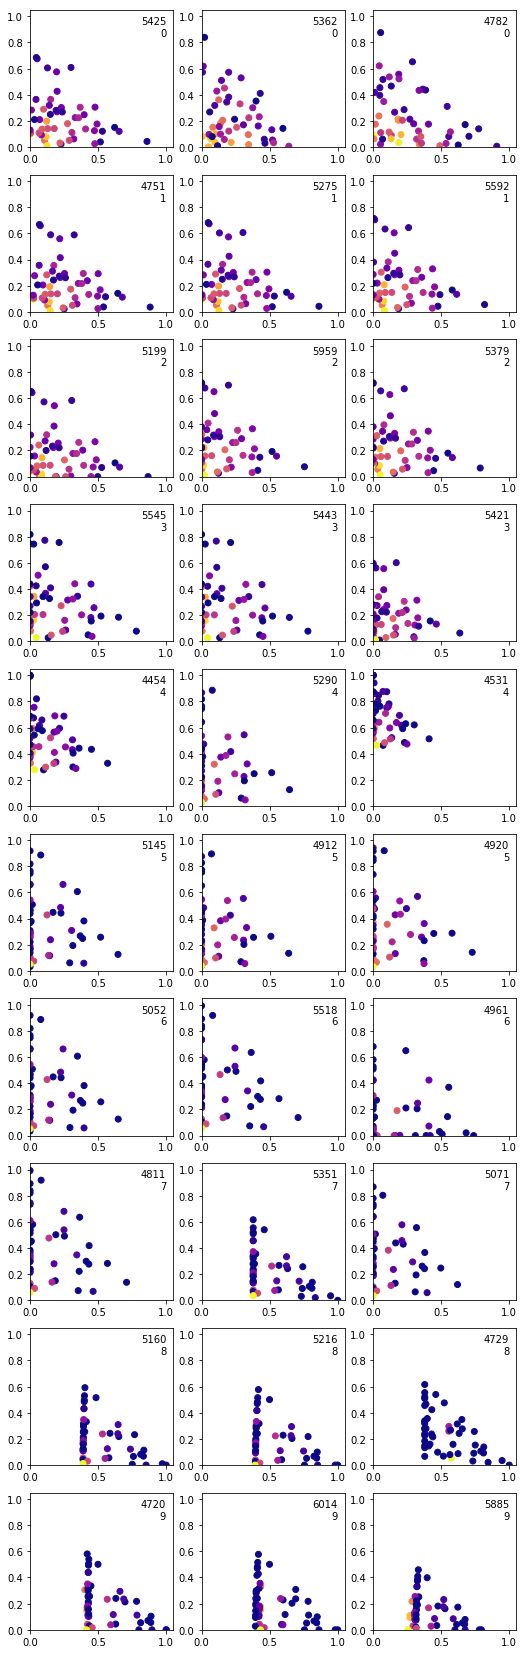

In [127]:
num_mutations = 3
num_generations = len(data) / num_mutations

size = (2.5,2.5)
plt.figure(figsize=(size[0]*num_mutations, size[1]*num_generations))
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1)

for i in range(len(data)):
    fitness = data[i][0]
    generation = data[i][1]
    population = data[i][2]

    B = np.array([params[0] for params in population])
    X = np.array([params[1] for params in population])
    R = np.array([params[2] for params in population])
    H = np.array([params[3] for params in population])

    plt.subplot(num_generations, num_mutations, i+1)
    plt.scatter(R, H, c=plt.cm.plasma(plt.Normalize()(X)))
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)
    
    label = str(int(fitness)) + "\n" + str(generation)
    plt.text(1, 1, label, va="top", ha="right")

plt.show()

In [101]:
xb = [(h+x+b) for x,b,r,h in data[15][1]]
#filter(lambda i: i[0] < 0.1, xb)
xb.sort()
xb

[0.40947460513849593,
 0.4407893919618363,
 0.4674769759153173,
 0.4836988653231148,
 0.5103218936999308,
 0.5805504479946535,
 0.6094516832524797,
 0.6569666857686156,
 0.6638008435993967,
 0.6746502815517563,
 0.6868075675661252,
 0.6911409950719942,
 0.6948059838910624,
 0.7171337222438351,
 0.718336965327166,
 0.7347095101740231,
 0.764840850757379,
 0.7748262123974802,
 0.7974662717075165,
 0.8074224932371471,
 0.8168523803618738,
 0.8240634710681656,
 0.8496615409187709,
 0.8568180216924524,
 0.8660486347950396,
 0.8757388874142074,
 0.8772992372662363,
 0.8830652225457831,
 0.891332837535691,
 0.9004113647398007,
 0.9004113647398007,
 0.9004113647398008,
 0.9004113647398008,
 0.9004113647398008,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.900411364739801,
 0.9004113647398

In [97]:
0.08829910607658942 +0.8121122586632114

0.9004113647398008

In [ ]:
[[5665.081368768124 0 [[0.4136006506328491 0.2470436600813808 0.0074582428209105656 0.3318974464648595] [0.22994341981148736 0.4068750406370588 0.17085987004912528 0.19232166950232854] [0.17219384908301416 0.08819201641020258 0.6549341211751987 0.08468001333158459] [0.12019096149729747 0.34262454879213944 0.41806998841533094 0.11911450129523216] [0.22621894766417516 0.21965997005850812 0.3655614147739362 0.1885596675033805] [0.09945494297535562 0.5401752474162349 0.2548237550767122 0.1055460545316973] [0.8418398870207899 0.011758319973258269 0.07719378184579062 0.06920801116016118] [0.20907289293041864 0.34194526120983737 0.3218784779175978 0.12710336794214616] [0.01842633203523636 0.7177759046425937 0.135105984790712 0.12869177853145797] [0.3207661884344064 0.1621934158364361 0.3173830638684667 0.1996573318606908] [0.11687748413122356 0.09376641079925807 0.5781741819296031 0.21118192313991524] [0.04351540034477641 0.6662198003113592 0.2771772615120889 0.01308753783177552] [0.5424922567454272 0.023469187957920523 0.42753937292056177 0.006499182376090484] [0.1613079321906855 0.044167181773809516 0.7642391977444982 0.03028568829100675] [0.2948736660117466 0.1770176997409153 0.28031856431493973 0.24779006993239838] [0.4740967464176241 0.006977793094403162 0.07173996513086978 0.44718549535710295] [0.3692352989281912 0.296921274555048 0.1781857997147972 0.1556576268019636] [0.3783566730159248 0.2238447350824906 0.25351515061325014 0.14428344128833448] [0.11695135109193833 0.007159562532303987 0.23761985722889978 0.6382692291468579] [0.0665668601697248 0.017685422541512286 0.4827993454430459 0.432948371845717] [0.1232170641908319 0.24575705959912197 0.3847940775388251 0.24623179867122102] [0.050060785578960765 0.1738170559186869 0.7355806714567722 0.04054148704558014] [0.3171817634539311 0.3198894201680923 0.15271272978248307 0.2102160865954935] [0.027472952628000535 0.2838130853496659 0.61108482751299 0.07762913450934361] [0.16947295764283798 0.04797947434139982 0.0299805593793131 0.7525670086364491] [0.37468323909564927 0.4824226221613769 0.05402550898648861 0.08886862975648524] [0.35226220286990495 0.04927189980344571 0.5480026964773247 0.05046320084932465] [0.45254955597768876 0.11627123555404661 0.3020106584233069 0.12916855004495775] [0.008664258706300276 0.3369891506810314 0.16388323001218674 0.49046336060048157] [0.40407192948002235 0.1387457936738954 0.07508810432903412 0.38209417251704814] [0.1263966153673235 0.4014805541318913 0.1890464575505112 0.283076372950274] [0.21496166594418942 0.4923426356300957 0.263992012711432 0.028703685714282834] [0.8763090603034858 0.027249963901752494 0.019757943335425687 0.07668303245933605] [7.758980247463132E-5 0.513607156780339 0.3089797851547793 0.1773354682624071] [0.25568130016231605 0.012575285592893226 0.3464886179698079 0.3852547962749828] [0.009052131068027935 0.04141706075440821 0.3364631006938955 0.6130677074836683] [0.05259012328356749 0.12068531823411888 0.6959078148624152 0.13081674361989848] [0.1924208504214454 0.4365381265801077 0.03927092717934255 0.3317700958191043] [0.01010044218416195 0.09562609154357538 0.3808096815552572 0.5134637847170055] [0.20231290089474885 0.008824304603737732 0.6608615368565857 0.12800125764492776] [0.20320391987697606 0.30831792706322747 0.007456370985998717 0.48102178207379775] [0.542005332289737 0.37409913409280804 0.0246166028762691 0.05927893074118584] [0.44419188397209497 0.38509026871991303 0.10794365156469832 0.06277419574329368] [0.07232967122714618 0.8460875038153708 0.06544554382669632 0.016137281130786718] [0.6374950473939754 0.010231768692277488 0.09831565247363705 0.25395753144011] [0.33923821840752877 0.1314661760347896 0.09154916988733053 0.4377464356703511] [0.09723964885561875 0.48602615618685274 0.006514094244529645 0.41022010071299886] [0.559985311251255 0.27221095668602 0.1477484453036224 0.02005528675910262] [0.49920250226506935 0.2596888467609155 0.010357625325441044 0.23075102564857408] [0.1323946097391866 0.5442443156691624 0.13646073345094645 0.18690034114070453]]] [4739.25332672106 0 [[0.4589455370985751 0.29897228074361604 0.08135089735354628 0.16073128480426258] [0.03997768273003577 0.2909797375013021 0.463427835755184 0.20561474401347812] [0.34972056092669357 0.011506263024754992 0.4959426984651131 0.14283047758343836] [0.1342259584885237 0.012077587214170737 0.36088262600631804 0.4928138282909875] [0.13964993705113893 0.39067190511986116 0.4528367499963606 0.01684140783263932] [0.5676232750849599 0.3195356603115982 0.09508744140896597 0.01775362319447593] [0.4786539414577027 0.1581630089022774 0.28345489202565144 0.07972815761436847] [0.5389100586443208 0.07086990467805743 0.16617357287026224 0.22404646380735949] [0.5095520453638726 0.40704262504055 0.06855818007183534 0.01484714952374211] [0.019571050913236743 0.1030122513074041 0.6513398420719538 0.22607685570740532] [0.20271545607944808 0.32073246711516523 0.15848461410780612 0.31806746269758057] [0.4208639486355823 0.4143267550706552 0.019531405766360477 0.14527789052740203] [0.1919128278833755 0.3982585580869913 0.026228117587070665 0.38360049644256256] [0.25074353366013247 0.15624104268218653 0.2421499604624625 0.3508654631952185] [0.3435131041658086 0.05496295374152693 0.10456925279762685 0.4969546892950376] [0.4064393056127279 0.13005767000188784 0.27592617295753186 0.1875768514278524] [0.5619041718550823 0.17655222300922813 0.049244722240281535 0.212298882895408] [0.44273230254738527 0.010517209304029218 0.05600302638959587 0.49074746175898964] [0.7195783315099648 1.493143716457812E-5 0.04918262021958064 0.23122411683329003] [0.3495794555630276 0.1426561378798663 0.13444873469092433 0.37331567186618175] [0.23687866234570054 0.06102227207771316 0.1040339838773281 0.5980650816992582] [0.04777282867817023 0.18656036520263852 0.2536895356663602 0.511977270452831] [0.2723229309058688 0.29182403532570755 0.20142117058071285 0.2344318631877108] [0.27748955136890374 0.3166679449174643 0.3411972598007802 0.06464524391285176] [0.23210498152563785 0.5305670587296787 0.10392437270346744 0.13340358704121602] [0.21372737956822918 0.1577180277216731 0.37493263638488605 0.2536219563252117] [0.003542970937172818 0.7446787262759469 0.09881558591151995 0.15296271687536034] [0.38684564271920474 0.2925353768279957 0.2831916496858554 0.037427330766944156] [0.1389949156426954 0.04811971185360375 0.16650500244330269 0.6463803700603982] [0.35605816313161276 0.1677257700798609 0.05406569560764474 0.4221503711808816] [0.2550566571369892 0.2761742580787535 0.0016872202919717694 0.4670818644922855] [0.6765519615934651 0.045261654472419255 0.27452044890718863 0.0036659350269270252] [0.13319649361159303 0.6066168501788952 0.12536381267937247 0.1348228435301393] [0.2245143165441731 0.3158248525017914 0.17295707122051007 0.28670375973352547] [0.028635965059132573 0.386237994149067 0.2068215878153551 0.3783044529764453] [0.16862298321091462 0.06358899748524083 0.026350269012959893 0.7414377502908847] [0.6210110600324986 0.004798425148476837 0.2125910745165972 0.16159944030242734] [0.09169655099869911 0.13027308097752566 0.16957617051778073 0.6084541975059945] [0.023905274736860327 0.5907056771297309 0.08755479398392296 0.29783425414948583] [0.02895933736967915 0.08512251429728479 0.6580859515512654 0.2278321967817707] [0.11566590528810239 0.03738000850056333 0.8175322128586813 0.029421873352653005] [0.13641891629448621 0.4979528147133703 0.07401114237599671 0.2916171266161468] [0.06998471784270577 0.32024410308397944 0.08005741830231816 0.5297137607709966] [0.7189045252511076 0.06444576230295829 0.0781877326126692 0.13846197983326491] [0.19927080272766973 0.08289317962709664 0.003764348733619638 0.714071668911614] [0.055284471186160644 0.054022786099131914 0.34254401144927427 0.5481487312654332] [0.630574381820781 0.3300260348670552 0.03468635511395435 0.004713228198209518] [0.3407374799594942 0.1046638364577589 0.07486150728514984 0.47973717629759705] [0.10632179873107894 0.29786031880926334 0.5255045528199506 0.07031332963970716] [0.03494944438166492 0.4428870056532288 0.45530480675013774 0.06685874321496854]]] [5083.30184887905 0 [[0.04000415768659171 0.43630140660360206 0.23960235864485024 0.284092077064956] [0.28368090163752147 0.36566473264617383 0.2128778133309437 0.13777655238536102] [0.8045396079740698 0.04239810466069582 0.08362054855372092 0.0694417388115135] [0.7082269108132402 0.05026235442024496 0.2354596178256837 0.006051116940831158] [0.03333724167561969 0.2676596243320897 0.06153437946014695 0.6374687545321437] [0.15775964901801653 0.03495686044451751 0.4906135492064928 0.31666994133097315] [0.024354856709417172 0.14411153225206186 0.5530734438904453 0.27846016714807564] [0.15524101131823287 0.29438659228676456 0.12358136054378022 0.42679103585122236] [0.061241783044722164 0.14491774413310643 0.21631082729694073 0.5775296455252307] [0.08955133410292881 0.20827987893105848 0.06223204801274296 0.6399367389532697] [0.18746584254187992 0.007700281267351783 0.726140031887654 0.07869384430311432] [0.4263081512851342 0.23535779586642758 0.21139961352454906 0.12693443932388915] [0.6538910283620044 0.0885359267819168 0.006458762605972557 0.25111428225010624] [0.10317755876195256 0.280333159609234 0.5102457726030245 0.10624350902578894] [0.37038882998364864 0.3784599968512655 0.19034375485585098 0.06080741830923486] [0.3551461278363601 0.18579560151434016 0.408213021086796 0.05084524956250369] [0.017494581126889175 0.15392172830862805 0.18624441560806082 0.642339274956422] [0.014561507959113817 0.12608616469767708 0.4722703113141421 0.387082016029067] [0.21882516995359858 0.3170933065401672 0.014451246633002457 0.44963027687323176] [0.17456177651423732 0.07413442008327231 0.3938410423623393 0.35746276104015107] [0.47717435636559213 0.15480328714274738 0.03272013229752746 0.335302224194133] [0.1747730100794047 0.256904574055527 0.4924486910396769 0.07587372482539134] [0.15277453160581866 0.10820296133115048 0.37029416697312756 0.3687283400899033] [0.2765923358587381 0.049683903901519 0.6450335985597555 0.02869016167998739] [0.28771627383313414 0.02531009141170215 0.20781805158060618 0.47915558317455753] [0.04710533616927848 0.12140223039557496 0.41510694042928864 0.4163854930058579] [0.15964511942099313 0.060120064660984296 0.6662621430339013 0.11397267288412127] [0.4804357542979095 0.1760374383146709 0.25124766164005174 0.09227914574736784] [0.6203391358334105 0.1494958355157866 0.0183018360990006 0.2118631925518023] [0.7628091187551169 0.06949727902420555 0.08594518895682324 0.08174841326385429] [0.21353214432160084 0.16615827334501532 0.3192259202191684 0.30108366211421544] [0.4453381398239675 0.040546547550220025 0.3193693795223108 0.19474593310350163] [0.03905287768918764 0.13455070463490226 0.2736074212887061 0.552788996387204] [0.09447497809848826 0.44041579333412895 0.28512367172809006 0.17998555683929274] [0.11244565743474577 0.05552213611298007 0.4989898762245949 0.33304233022767926] [0.06405396876503688 0.24963105248090567 0.4816831373366688 0.20463184141738866] [0.005113167859391421 0.06245693138142594 0.37985318227093745 0.5525767184882452] [0.03184822583881797 0.33300386767692414 0.2557318563302674 0.3794160501539905] [0.10946083214918056 0.45965066496352114 0.29288624486211234 0.13800225802518595] [0.37313639592693915 0.3529096962675373 0.13006033541612072 0.1438935723894028] [0.22016747864400188 0.4667433176994028 0.2620285815719383 0.051060622084657004] [0.37197993176566846 0.238305997541305 0.31784566673179504 0.07186840396123151] [0.2936627863664407 0.3065365651902311 0.3867977566831571 0.01300289176017111] [0.11754994522578466 0.2206711805491962 0.07563833774629503 0.5861405364787241] [0.07329337011926684 0.12946115547519854 0.05258017008226901 0.7446653043232656] [0.6644431141979336 0.10899619335449184 0.08274060218432144 0.14382009026325315] [0.09970430808607411 0.013006953761797946 0.4359929664806277 0.45129577167150026] [0.1494278817339404 0.12918790955732506 0.1922192132228342 0.5291649954859003] [0.10214484258805112 0.019457251236211448 0.2159085596141025 0.6624893465616349] [0.5220173894890356 0.004061017919160914 0.10201539689713068 0.37190619569467276]]] [5483.256092075789 1 [[0.4125052821570732 0.24638939651342123 0.01008686284373123 0.3310184584857742] [0.2292144310005512 0.4055851261341051 0.17348849007194594 0.1917119527933977] [0.17088212217148144 0.08752019310220609 0.6575627411980194 0.08403494352829308] [0.11964805021644852 0.3410768888822949 0.4206986084381516 0.11857645246310486] [0.22528167230101362 0.21874986999688872 0.3681900347967569 0.18777842290534083] [0.09910411422007182 0.5382697713884308 0.25745237509953284 0.1051737392919646] [0.8394419001634211 0.01172482631585936 0.07982240186861128 0.06901087165210815] [0.20826245825950848 0.3406197699357002 0.3245070979404185 0.12661067386437277] [0.018370329999746214 0.7155944117872116 0.13773460481353267 0.12830065339950947] [0.3195309825950364 0.1615688417336406 0.32001168389128737 0.1988884917800356] [0.11614915864273255 0.09318210264566415 0.5808028019524238 0.20986593675917947] [0.04335715206818425 0.663797022756849 0.27980588153490954 0.013039943640057098] [0.5400012452402669 0.023361422332710165 0.4301679929433824 0.006469339483640549] [0.1595094260084037 0.043674738851782226 0.7668678177673189 0.02994801737249515] [0.2937966466747906 0.17637114663163617 0.2829471843377604 0.24688502235581272] [0.47275421291022907 0.006958033580954289 0.07436858515369044 0.4459191683551262] [0.3680542785715729 0.2959715547677458 0.18081441973761786 0.1551597469230635] [0.3770243540448506 0.22305650374313496 0.2561437706360708 0.14377537157594375] [0.11654811306679935 0.007134876987165515 0.24024847725172044 0.6360685326943147] [0.06622854083474959 0.017595538169953462 0.4854279654658666 0.4307479555294303] [0.12269058869659502 0.24470700155509761 0.38742269756164577 0.2451797121866616] [0.049563126107333 0.1720891225031805 0.7382092914795929 0.040138459909893585] [0.3161977402500011 0.31889699674276867 0.15534134980530373 0.20956391320192644] [0.027287267012028896 0.28189483476016597 0.6137134475358107 0.07710445069199443] [0.16901370910499264 0.04784945652767692 0.03260917940213376 0.7505276549651967] [0.3736420906568083 0.48108209366285853 0.05665412900930927 0.08862168667102398] [0.3502135988792833 0.048985355832107044 0.5506313165001454 0.050169728788464214] [0.45084525943144865 0.11583335938653226 0.30463927844612754 0.1286821027358915] [0.008637019635472155 0.33592970963075036 0.1665118500350074 0.4889214206987701] [0.40292354813747244 0.13835147506577675 0.07771672435185478 0.38100825244489595] [0.12598691412479887 0.4001791974349632 0.19167507757333185 0.2821588108669061] [0.21419393984746402 0.49058425564990926 0.2666206327342527 0.028601171768374078] [0.8739591473136974 0.027176890317277838 0.02238656335824635 0.07647739901077837] [7.729465320986313E-5 0.5116534106710746 0.31160840517759997 0.17666088949811543] [0.2546528728027503 0.012524703998737242 0.34911723799262856 0.38370518520588387] [0.009016270797107814 0.041252985907479174 0.33909172071671617 0.610639022578697] [0.05213552609948251 0.11964209562112353 0.6985364348852359 0.1296859433941581] [0.19189437390008754 0.43534372860390813 0.04189954720216321 0.3308623502938411] [0.010057563244078848 0.0952201345196237 0.38343830157807784 0.5112840006582197] [0.20074479877729015 0.00875590851691863 0.6634901568794064 0.12700913582638484] [0.20266576127428076 0.3075013879683384 0.01008499100881938 0.4797478597485613] [0.5405446491643796 0.37309095159011624 0.027245222899089764 0.05911917634641433] [0.4428829849521715 0.38395552426937907 0.11057227158751898 0.06258921919093045] [0.07212622966119375 0.8437077146667596 0.06807416384951698 0.016091891822529646] [0.6356366007539446 0.010201940701886866 0.10094427249645771 0.2532171860477109] [0.33825662607049334 0.13108577611528505 0.09417778991015119 0.43647980790407037] [0.09698236680811999 0.4847402012695599 0.009142714267350308 0.4091347176549697] [0.5582581350513066 0.2713713698677467 0.15037706532644307 0.019993429754503585] [0.49787655490622906 0.2589990791036611 0.012986245348261708 0.23013812064184808] [0.13199159955128312 0.5425876318785209 0.1390893534737671 0.18633141509642884]]] [5396.241317552362 1 [[0.49736631773915596 0.2117540967259072 0.006392851657007282 0.28448673387792955] [0.3137090869177942 0.3626157484178747 0.15227397472068305 0.171401189943648] [0.255959516189321 0.07926787024401662 0.5886613669680064 0.076111246598656] [0.2039566286036043 0.3100036360251893 0.37826599693061674 0.10777373844058967] [0.309984614770482 0.19588068020260113 0.325987564155048 0.16814714087186894] [0.18322061008166246 0.48992996584905507 0.23112090792649922 0.09572851614278322] [0.9256055541270968 0.005530811039075474 0.03630996789946813 0.03255366693435962] [0.2928385600367255 0.3057304537224484 0.2877889073504353 0.11364207889039085] [0.10219199914154319 0.6565222469218386 0.1235762918951047 0.11770946204151353] [0.40453185554071325 0.1421911140569145 0.27824219128453714 0.17503483911783507] [0.2006431512375304 0.08487250784510561 0.5233333810410288 0.19115095987633524] [0.12728106745108325 0.6078745367988807 0.25290301995542547 0.011941375794610598] [0.6262579238517341 0.019172184869505875 0.34926065236353 0.005309238915230097] [0.24507359929699235 0.03975591620031677 0.6879096261592192 0.02726085834347154] [0.3786393331180534 0.1559888358427919 0.24701804721566734 0.21835378382348739] [0.557862413523931 0.005866372905421753 0.06031325119359003 0.37595796237705725] [0.453000966034498 0.2574900752522085 0.15452269308150204 0.13498626563179147] [0.46212234012223163 0.1936819347297737 0.21935429857659863 0.12484142657139599] [0.20071701819824517 0.00648040908764456 0.21507932576090302 0.5777232469532072] [0.15033252727603164 0.016098344523780818 0.4394732543457462 0.39409587385444134] [0.20698273129713873 0.22227803964715817 0.3480318057299551 0.222707423325748] [0.1338264526852676 0.15848986295470668 0.6707171468020552 0.03696653755797059] [0.40094743056023796 0.28064654520304727 0.13397848543868573 0.18442753879802906] [0.11123861973430736 0.2593677061778923 0.5584508895947695 0.07094278449303083] [0.2532386247491448 0.04314033910480275 0.02695676674096524 0.6766642694050872] [0.4584489062019561 0.4177986502817829 0.0467884043957431 0.07696403912051789] [0.4360278699762118 0.042900041352514844 0.47713480571988826 0.0439372829513851] [0.5363152230839956 0.09848051546639915 0.25579985605338085 0.10940440539622438] [0.0924299258126071 0.3085143163352562 0.15003546127180792 0.4490202965803287] [0.4878375965863292 0.1192432151913162 0.06453346617382634 0.3283857220485283] [0.21016228247363034 0.36298449626553114 0.17091969326666964 0.25593352799416885] [0.29872733305049626 0.43980837388855337 0.23582336654957767 0.025640926511372703] [0.9600747274097926 0.008795811880160207 0.006377518639798745 0.02475194207024844] [0.08384325690878146 0.47058117228442203 0.28309587900176014 0.16247969180503632] [0.3394469672686229 0.011160062265881902 0.30749476999136455 0.34189820047413066] [0.09281779817433476 0.03791604134415948 0.3080215883097406 0.5612445721717653] [0.13635579038987433 0.11001487195710197 0.634378814807574 0.11925052284544976] [0.27618651752775225 0.39125846896462435 0.035197573608020755 0.2973574398996026] [0.09386610929046878 0.08753417627028198 0.3485854253020274 0.47001428913722176] [0.2860785680010557 0.007897658350199895 0.5914640154954098 0.11455975815333463] [0.2869695869832829 0.27590504566790564 0.006672496786042991 0.43045287056276843] [0.6257709993960439 0.3056776747604473 0.020114309930085294 0.04843701591342348] [0.5279575510784018 0.3270534349183516 0.09167549764167475 0.0533135163615718] [0.15609533833345302 0.7696885051741646 0.059536020294742774 0.014680136197639512] [0.7212607145002823 0.007867467393703162 0.0755974077786564 0.19527441032735818] [0.4230038855138356 0.11480003061861713 0.07994335747160797 0.38225272639593927] [0.1810053159619256 0.440928578349615 0.005909662016979245 0.37215644367148015] [0.6437509783575618 0.2203901130562504 0.11962154999480548 0.016237358591382322] [0.5829681693713762 0.21625210918258736 0.008625161806859388 0.19215455963917707] [0.21616027684549344 0.4916985515665003 0.123285706532432 0.16885546505557428]]] [4766.6680404492745 1 [[0.4205263196781648 0.2511803620591199 0.007583129765256986 0.32071018849745836] [0.23312839612966155 0.41251071992697974 0.1732264724084314 0.18113441153492738] [0.17429844314645537 0.08926992015164424 0.6629388813377171 0.07349275536418344] [0.12171738836389627 0.34697588528131773 0.42337948302695494 0.107927243327831] [0.22933780880932744 0.22268840314439542 0.37060137851029784 0.17737240953597933] [0.10069886180296607 0.5469314139813969 0.25801092765134087 0.09435879656429615] [0.8519580230772552 0.011899644093342331 0.0781215796366424 0.058020753192760025] [0.21175242255775764 0.34632771579540084 0.32600375167209655 0.11591610997474501] [0.018662918956823923 0.726991867501853 0.13684069297726623 0.11750452056405682] [0.3252498855307745 0.16446056921436938 0.32181947136156647 0.18847007389328962] [0.1185350761716615 0.09509623456605629 0.5863740240897681 0.19999466517251407] [0.0440086740928272 0.6737718102968236 0.2803192357459749 0.0019002798643743685] [0.5460410772915821 0.023622716299368768 0.4303362064090491 0] [0.16316888590438794 0.04467672324414824 0.7730559605278582 0.0190984303236056] [0.2992591807963895 0.17965039919440376 0.2844876080442095 0.23660281196499722] [0.4836910001123706 0.007119002072703514 0.07319176042522416 0.4359982373897018] [0.3741275448593466 0.30085538351356855 0.1805467027925225 0.14447036883456243] [0.38330313999920895 0.2267711816616974 0.2568294950181603 0.13309618332093331] [0.12056830889515713 0.007380986528923679 0.2449687333964625 0.6270819711794567] [0.06788014559176403 0.018034335011578518 0.49232440551834156 0.42176111387831583] [0.1250458241208192 0.2494045305566374 0.3905051046187235 0.23504454070381986] [0.0506444928625598 0.17584375766497587 0.7441575203942854 0.029354229078178987] [0.3216746306168217 0.3244206411814911 0.15487589957359485 0.19902882862809235] [0.027806166760921073 0.28725539941131156 0.618496557285825 0.06644187654194246] [0.1771353865097436 0.050148783913415984 0.03133607890779248 0.7413797506690479] [0.3792837590521778 0.4883460120255487 0.05468885713318942 0.07768137178908409] [0.35641248766054767 0.04985241174794131 0.5544591577095875 0.0392759428819235] [0.4583632971167078 0.11776493023675327 0.30589048056898227 0.1179812920775566] [0.008854488985633893 0.34438799949654936 0.16748140888473634 0.4792761026330804] [0.41138769947509213 0.14125780265112825 0.07644758332413262 0.37090691454964697] [0.12836897544721043 0.4077454704472481 0.19199643912266856 0.2718891149828728] [0.21743756498205252 0.4980133707004688 0.2670326365705971 0.017516427746881683] [0.8869267526685448 0.027580134781838534 0.01999733805768174 0.0654957744919349] [7.864493139101966E-5 0.5205916024871072 0.3131815422864959 0.16614821029500593] [0.2603342403479801 0.012804133192010679 0.3527940881524276 0.37406753830758166] [0.009313852633716282 0.0426145398789802 0.34619115797103633 0.6018804495162672] [0.053267010776960964 0.12223865900322888 0.7048648445673129 0.11962948565249733] [0.19564228914860043 0.4438464864785532 0.03992838652114328 0.32058283785170316] [0.010332688518041365 0.09782488727739357 0.38956589745496073 0.5022765267496043] [0.20490846267999877 0.008937515514705698 0.6693400221277689 0.1168139996775266] [0.20758424759233715 0.3149641254331968 0.007617102868069488 0.4698345241063966] [0.548450976668479 0.37854800172769054 0.024909348830045676 0.04809167277378469] [0.44949400985302157 0.3896869242508842 0.10923212812020167 0.05158693777589253] [0.07315211390659378 0.8557081541222102 0.06618970880781035 0.004950023163385567] [0.6470545856893004 0.010385198879762985 0.09978994195822777 0.24277027347270885] [0.34598810084936155 0.13408198164029514 0.09337073980739335 0.42655917770294993] [0.09908414209406657 0.49524535812089626 0.006637657039439434 0.3990328427455977] [0.5663782230658454 0.27531857505759944 0.14943517308485363 0.008868028791701468] [0.5064624497684379 0.2634655253355223 0.010508257214866822 0.21956376768117292] [0.13421619782683084 0.5517324525664579 0.13833826643340794 0.17571308317330336]]]
[[5665.081368768124 0 [[0.4136006506328491 0.2470436600813808 0.0074582428209105656 0.3318974464648595] [0.22994341981148736 0.4068750406370588 0.17085987004912528 0.19232166950232854] [0.17219384908301416 0.08819201641020258 0.6549341211751987 0.08468001333158459] [0.12019096149729747 0.34262454879213944 0.41806998841533094 0.11911450129523216] [0.22621894766417516 0.21965997005850812 0.3655614147739362 0.1885596675033805] [0.09945494297535562 0.5401752474162349 0.2548237550767122 0.1055460545316973] [0.8418398870207899 0.011758319973258269 0.07719378184579062 0.06920801116016118] [0.20907289293041864 0.34194526120983737 0.3218784779175978 0.12710336794214616] [0.01842633203523636 0.7177759046425937 0.135105984790712 0.12869177853145797] [0.3207661884344064 0.1621934158364361 0.3173830638684667 0.1996573318606908] [0.11687748413122356 0.09376641079925807 0.5781741819296031 0.21118192313991524] [0.04351540034477641 0.6662198003113592 0.2771772615120889 0.01308753783177552] [0.5424922567454272 0.023469187957920523 0.42753937292056177 0.006499182376090484] [0.1613079321906855 0.044167181773809516 0.7642391977444982 0.03028568829100675] [0.2948736660117466 0.1770176997409153 0.28031856431493973 0.24779006993239838] [0.4740967464176241 0.006977793094403162 0.07173996513086978 0.44718549535710295] [0.3692352989281912 0.296921274555048 0.1781857997147972 0.1556576268019636] [0.3783566730159248 0.2238447350824906 0.25351515061325014 0.14428344128833448] [0.11695135109193833 0.007159562532303987 0.23761985722889978 0.6382692291468579] [0.0665668601697248 0.017685422541512286 0.4827993454430459 0.432948371845717] [0.1232170641908319 0.24575705959912197 0.3847940775388251 0.24623179867122102] [0.050060785578960765 0.1738170559186869 0.7355806714567722 0.04054148704558014] [0.3171817634539311 0.3198894201680923 0.15271272978248307 0.2102160865954935] [0.027472952628000535 0.2838130853496659 0.61108482751299 0.07762913450934361] [0.16947295764283798 0.04797947434139982 0.0299805593793131 0.7525670086364491] [0.37468323909564927 0.4824226221613769 0.05402550898648861 0.08886862975648524] [0.35226220286990495 0.04927189980344571 0.5480026964773247 0.05046320084932465] [0.45254955597768876 0.11627123555404661 0.3020106584233069 0.12916855004495775] [0.008664258706300276 0.3369891506810314 0.16388323001218674 0.49046336060048157] [0.40407192948002235 0.1387457936738954 0.07508810432903412 0.38209417251704814] [0.1263966153673235 0.4014805541318913 0.1890464575505112 0.283076372950274] [0.21496166594418942 0.4923426356300957 0.263992012711432 0.028703685714282834] [0.8763090603034858 0.027249963901752494 0.019757943335425687 0.07668303245933605] [7.758980247463132E-5 0.513607156780339 0.3089797851547793 0.1773354682624071] [0.25568130016231605 0.012575285592893226 0.3464886179698079 0.3852547962749828] [0.009052131068027935 0.04141706075440821 0.3364631006938955 0.6130677074836683] [0.05259012328356749 0.12068531823411888 0.6959078148624152 0.13081674361989848] [0.1924208504214454 0.4365381265801077 0.03927092717934255 0.3317700958191043] [0.01010044218416195 0.09562609154357538 0.3808096815552572 0.5134637847170055] [0.20231290089474885 0.008824304603737732 0.6608615368565857 0.12800125764492776] [0.20320391987697606 0.30831792706322747 0.007456370985998717 0.48102178207379775] [0.542005332289737 0.37409913409280804 0.0246166028762691 0.05927893074118584] [0.44419188397209497 0.38509026871991303 0.10794365156469832 0.06277419574329368] [0.07232967122714618 0.8460875038153708 0.06544554382669632 0.016137281130786718] [0.6374950473939754 0.010231768692277488 0.09831565247363705 0.25395753144011] [0.33923821840752877 0.1314661760347896 0.09154916988733053 0.4377464356703511] [0.09723964885561875 0.48602615618685274 0.006514094244529645 0.41022010071299886] [0.559985311251255 0.27221095668602 0.1477484453036224 0.02005528675910262] [0.49920250226506935 0.2596888467609155 0.010357625325441044 0.23075102564857408] [0.1323946097391866 0.5442443156691624 0.13646073345094645 0.18690034114070453]]] [4739.25332672106 0 [[0.4589455370985751 0.29897228074361604 0.08135089735354628 0.16073128480426258] [0.03997768273003577 0.2909797375013021 0.463427835755184 0.20561474401347812] [0.34972056092669357 0.011506263024754992 0.4959426984651131 0.14283047758343836] [0.1342259584885237 0.012077587214170737 0.36088262600631804 0.4928138282909875] [0.13964993705113893 0.39067190511986116 0.4528367499963606 0.01684140783263932] [0.5676232750849599 0.3195356603115982 0.09508744140896597 0.01775362319447593] [0.4786539414577027 0.1581630089022774 0.28345489202565144 0.07972815761436847] [0.5389100586443208 0.07086990467805743 0.16617357287026224 0.22404646380735949] [0.5095520453638726 0.40704262504055 0.06855818007183534 0.01484714952374211] [0.019571050913236743 0.1030122513074041 0.6513398420719538 0.22607685570740532] [0.20271545607944808 0.32073246711516523 0.15848461410780612 0.31806746269758057] [0.4208639486355823 0.4143267550706552 0.019531405766360477 0.14527789052740203] [0.1919128278833755 0.3982585580869913 0.026228117587070665 0.38360049644256256] [0.25074353366013247 0.15624104268218653 0.2421499604624625 0.3508654631952185] [0.3435131041658086 0.05496295374152693 0.10456925279762685 0.4969546892950376] [0.4064393056127279 0.13005767000188784 0.27592617295753186 0.1875768514278524] [0.5619041718550823 0.17655222300922813 0.049244722240281535 0.212298882895408] [0.44273230254738527 0.010517209304029218 0.05600302638959587 0.49074746175898964] [0.7195783315099648 1.493143716457812E-5 0.04918262021958064 0.23122411683329003] [0.3495794555630276 0.1426561378798663 0.13444873469092433 0.37331567186618175] [0.23687866234570054 0.06102227207771316 0.1040339838773281 0.5980650816992582] [0.04777282867817023 0.18656036520263852 0.2536895356663602 0.511977270452831] [0.2723229309058688 0.29182403532570755 0.20142117058071285 0.2344318631877108] [0.27748955136890374 0.3166679449174643 0.3411972598007802 0.06464524391285176] [0.23210498152563785 0.5305670587296787 0.10392437270346744 0.13340358704121602] [0.21372737956822918 0.1577180277216731 0.37493263638488605 0.2536219563252117] [0.003542970937172818 0.7446787262759469 0.09881558591151995 0.15296271687536034] [0.38684564271920474 0.2925353768279957 0.2831916496858554 0.037427330766944156] [0.1389949156426954 0.04811971185360375 0.16650500244330269 0.6463803700603982] [0.35605816313161276 0.1677257700798609 0.05406569560764474 0.4221503711808816] [0.2550566571369892 0.2761742580787535 0.0016872202919717694 0.4670818644922855] [0.6765519615934651 0.045261654472419255 0.27452044890718863 0.0036659350269270252] [0.13319649361159303 0.6066168501788952 0.12536381267937247 0.1348228435301393] [0.2245143165441731 0.3158248525017914 0.17295707122051007 0.28670375973352547] [0.028635965059132573 0.386237994149067 0.2068215878153551 0.3783044529764453] [0.16862298321091462 0.06358899748524083 0.026350269012959893 0.7414377502908847] [0.6210110600324986 0.004798425148476837 0.2125910745165972 0.16159944030242734] [0.09169655099869911 0.13027308097752566 0.16957617051778073 0.6084541975059945] [0.023905274736860327 0.5907056771297309 0.08755479398392296 0.29783425414948583] [0.02895933736967915 0.08512251429728479 0.6580859515512654 0.2278321967817707] [0.11566590528810239 0.03738000850056333 0.8175322128586813 0.029421873352653005] [0.13641891629448621 0.4979528147133703 0.07401114237599671 0.2916171266161468] [0.06998471784270577 0.32024410308397944 0.08005741830231816 0.5297137607709966] [0.7189045252511076 0.06444576230295829 0.0781877326126692 0.13846197983326491] [0.19927080272766973 0.08289317962709664 0.003764348733619638 0.714071668911614] [0.055284471186160644 0.054022786099131914 0.34254401144927427 0.5481487312654332] [0.630574381820781 0.3300260348670552 0.03468635511395435 0.004713228198209518] [0.3407374799594942 0.1046638364577589 0.07486150728514984 0.47973717629759705] [0.10632179873107894 0.29786031880926334 0.5255045528199506 0.07031332963970716] [0.03494944438166492 0.4428870056532288 0.45530480675013774 0.06685874321496854]]] [5083.30184887905 0 [[0.04000415768659171 0.43630140660360206 0.23960235864485024 0.284092077064956] [0.28368090163752147 0.36566473264617383 0.2128778133309437 0.13777655238536102] [0.8045396079740698 0.04239810466069582 0.08362054855372092 0.0694417388115135] [0.7082269108132402 0.05026235442024496 0.2354596178256837 0.006051116940831158] [0.03333724167561969 0.2676596243320897 0.06153437946014695 0.6374687545321437] [0.15775964901801653 0.03495686044451751 0.4906135492064928 0.31666994133097315] [0.024354856709417172 0.14411153225206186 0.5530734438904453 0.27846016714807564] [0.15524101131823287 0.29438659228676456 0.12358136054378022 0.42679103585122236] [0.061241783044722164 0.14491774413310643 0.21631082729694073 0.5775296455252307] [0.08955133410292881 0.20827987893105848 0.06223204801274296 0.6399367389532697] [0.18746584254187992 0.007700281267351783 0.726140031887654 0.07869384430311432] [0.4263081512851342 0.23535779586642758 0.21139961352454906 0.12693443932388915] [0.6538910283620044 0.0885359267819168 0.006458762605972557 0.25111428225010624] [0.10317755876195256 0.280333159609234 0.5102457726030245 0.10624350902578894] [0.37038882998364864 0.3784599968512655 0.19034375485585098 0.06080741830923486] [0.3551461278363601 0.18579560151434016 0.408213021086796 0.05084524956250369] [0.017494581126889175 0.15392172830862805 0.18624441560806082 0.642339274956422] [0.014561507959113817 0.12608616469767708 0.4722703113141421 0.387082016029067] [0.21882516995359858 0.3170933065401672 0.014451246633002457 0.44963027687323176] [0.17456177651423732 0.07413442008327231 0.3938410423623393 0.35746276104015107] [0.47717435636559213 0.15480328714274738 0.03272013229752746 0.335302224194133] [0.1747730100794047 0.256904574055527 0.4924486910396769 0.07587372482539134] [0.15277453160581866 0.10820296133115048 0.37029416697312756 0.3687283400899033] [0.2765923358587381 0.049683903901519 0.6450335985597555 0.02869016167998739] [0.28771627383313414 0.02531009141170215 0.20781805158060618 0.47915558317455753] [0.04710533616927848 0.12140223039557496 0.41510694042928864 0.4163854930058579] [0.15964511942099313 0.060120064660984296 0.6662621430339013 0.11397267288412127] [0.4804357542979095 0.1760374383146709 0.25124766164005174 0.09227914574736784] [0.6203391358334105 0.1494958355157866 0.0183018360990006 0.2118631925518023] [0.7628091187551169 0.06949727902420555 0.08594518895682324 0.08174841326385429] [0.21353214432160084 0.16615827334501532 0.3192259202191684 0.30108366211421544] [0.4453381398239675 0.040546547550220025 0.3193693795223108 0.19474593310350163] [0.03905287768918764 0.13455070463490226 0.2736074212887061 0.552788996387204] [0.09447497809848826 0.44041579333412895 0.28512367172809006 0.17998555683929274] [0.11244565743474577 0.05552213611298007 0.4989898762245949 0.33304233022767926] [0.06405396876503688 0.24963105248090567 0.4816831373366688 0.20463184141738866] [0.005113167859391421 0.06245693138142594 0.37985318227093745 0.5525767184882452] [0.03184822583881797 0.33300386767692414 0.2557318563302674 0.3794160501539905] [0.10946083214918056 0.45965066496352114 0.29288624486211234 0.13800225802518595] [0.37313639592693915 0.3529096962675373 0.13006033541612072 0.1438935723894028] [0.22016747864400188 0.4667433176994028 0.2620285815719383 0.051060622084657004] [0.37197993176566846 0.238305997541305 0.31784566673179504 0.07186840396123151] [0.2936627863664407 0.3065365651902311 0.3867977566831571 0.01300289176017111] [0.11754994522578466 0.2206711805491962 0.07563833774629503 0.5861405364787241] [0.07329337011926684 0.12946115547519854 0.05258017008226901 0.7446653043232656] [0.6644431141979336 0.10899619335449184 0.08274060218432144 0.14382009026325315] [0.09970430808607411 0.013006953761797946 0.4359929664806277 0.45129577167150026] [0.1494278817339404 0.12918790955732506 0.1922192132228342 0.5291649954859003] [0.10214484258805112 0.019457251236211448 0.2159085596141025 0.6624893465616349] [0.5220173894890356 0.004061017919160914 0.10201539689713068 0.37190619569467276]]] [5483.256092075789 1 [[0.4125052821570732 0.24638939651342123 0.01008686284373123 0.3310184584857742] [0.2292144310005512 0.4055851261341051 0.17348849007194594 0.1917119527933977] [0.17088212217148144 0.08752019310220609 0.6575627411980194 0.08403494352829308] [0.11964805021644852 0.3410768888822949 0.4206986084381516 0.11857645246310486] [0.22528167230101362 0.21874986999688872 0.3681900347967569 0.18777842290534083] [0.09910411422007182 0.5382697713884308 0.25745237509953284 0.1051737392919646] [0.8394419001634211 0.01172482631585936 0.07982240186861128 0.06901087165210815] [0.20826245825950848 0.3406197699357002 0.3245070979404185 0.12661067386437277] [0.018370329999746214 0.7155944117872116 0.13773460481353267 0.12830065339950947] [0.3195309825950364 0.1615688417336406 0.32001168389128737 0.1988884917800356] [0.11614915864273255 0.09318210264566415 0.5808028019524238 0.20986593675917947] [0.04335715206818425 0.663797022756849 0.27980588153490954 0.013039943640057098] [0.5400012452402669 0.023361422332710165 0.4301679929433824 0.006469339483640549] [0.1595094260084037 0.043674738851782226 0.7668678177673189 0.02994801737249515] [0.2937966466747906 0.17637114663163617 0.2829471843377604 0.24688502235581272] [0.47275421291022907 0.006958033580954289 0.07436858515369044 0.4459191683551262] [0.3680542785715729 0.2959715547677458 0.18081441973761786 0.1551597469230635] [0.3770243540448506 0.22305650374313496 0.2561437706360708 0.14377537157594375] [0.11654811306679935 0.007134876987165515 0.24024847725172044 0.6360685326943147] [0.06622854083474959 0.017595538169953462 0.4854279654658666 0.4307479555294303] [0.12269058869659502 0.24470700155509761 0.38742269756164577 0.2451797121866616] [0.049563126107333 0.1720891225031805 0.7382092914795929 0.040138459909893585] [0.3161977402500011 0.31889699674276867 0.15534134980530373 0.20956391320192644] [0.027287267012028896 0.28189483476016597 0.6137134475358107 0.07710445069199443] [0.16901370910499264 0.04784945652767692 0.03260917940213376 0.7505276549651967] [0.3736420906568083 0.48108209366285853 0.05665412900930927 0.08862168667102398] [0.3502135988792833 0.048985355832107044 0.5506313165001454 0.050169728788464214] [0.45084525943144865 0.11583335938653226 0.30463927844612754 0.1286821027358915] [0.008637019635472155 0.33592970963075036 0.1665118500350074 0.4889214206987701] [0.40292354813747244 0.13835147506577675 0.07771672435185478 0.38100825244489595] [0.12598691412479887 0.4001791974349632 0.19167507757333185 0.2821588108669061] [0.21419393984746402 0.49058425564990926 0.2666206327342527 0.028601171768374078] [0.8739591473136974 0.027176890317277838 0.02238656335824635 0.07647739901077837] [7.729465320986313E-5 0.5116534106710746 0.31160840517759997 0.17666088949811543] [0.2546528728027503 0.012524703998737242 0.34911723799262856 0.38370518520588387] [0.009016270797107814 0.041252985907479174 0.33909172071671617 0.610639022578697] [0.05213552609948251 0.11964209562112353 0.6985364348852359 0.1296859433941581] [0.19189437390008754 0.43534372860390813 0.04189954720216321 0.3308623502938411] [0.010057563244078848 0.0952201345196237 0.38343830157807784 0.5112840006582197] [0.20074479877729015 0.00875590851691863 0.6634901568794064 0.12700913582638484] [0.20266576127428076 0.3075013879683384 0.01008499100881938 0.4797478597485613] [0.5405446491643796 0.37309095159011624 0.027245222899089764 0.05911917634641433] [0.4428829849521715 0.38395552426937907 0.11057227158751898 0.06258921919093045] [0.07212622966119375 0.8437077146667596 0.06807416384951698 0.016091891822529646] [0.6356366007539446 0.010201940701886866 0.10094427249645771 0.2532171860477109] [0.33825662607049334 0.13108577611528505 0.09417778991015119 0.43647980790407037] [0.09698236680811999 0.4847402012695599 0.009142714267350308 0.4091347176549697] [0.5582581350513066 0.2713713698677467 0.15037706532644307 0.019993429754503585] [0.49787655490622906 0.2589990791036611 0.012986245348261708 0.23013812064184808] [0.13199159955128312 0.5425876318785209 0.1390893534737671 0.18633141509642884]]] [5396.241317552362 1 [[0.49736631773915596 0.2117540967259072 0.006392851657007282 0.28448673387792955] [0.3137090869177942 0.3626157484178747 0.15227397472068305 0.171401189943648] [0.255959516189321 0.07926787024401662 0.5886613669680064 0.076111246598656] [0.2039566286036043 0.3100036360251893 0.37826599693061674 0.10777373844058967] [0.309984614770482 0.19588068020260113 0.325987564155048 0.16814714087186894] [0.18322061008166246 0.48992996584905507 0.23112090792649922 0.09572851614278322] [0.9256055541270968 0.005530811039075474 0.03630996789946813 0.03255366693435962] [0.2928385600367255 0.3057304537224484 0.2877889073504353 0.11364207889039085] [0.10219199914154319 0.6565222469218386 0.1235762918951047 0.11770946204151353] [0.40453185554071325 0.1421911140569145 0.27824219128453714 0.17503483911783507] [0.2006431512375304 0.08487250784510561 0.5233333810410288 0.19115095987633524] [0.12728106745108325 0.6078745367988807 0.25290301995542547 0.011941375794610598] [0.6262579238517341 0.019172184869505875 0.34926065236353 0.005309238915230097] [0.24507359929699235 0.03975591620031677 0.6879096261592192 0.02726085834347154] [0.3786393331180534 0.1559888358427919 0.24701804721566734 0.21835378382348739] [0.557862413523931 0.005866372905421753 0.06031325119359003 0.37595796237705725] [0.453000966034498 0.2574900752522085 0.15452269308150204 0.13498626563179147] [0.46212234012223163 0.1936819347297737 0.21935429857659863 0.12484142657139599] [0.20071701819824517 0.00648040908764456 0.21507932576090302 0.5777232469532072] [0.15033252727603164 0.016098344523780818 0.4394732543457462 0.39409587385444134] [0.20698273129713873 0.22227803964715817 0.3480318057299551 0.222707423325748] [0.1338264526852676 0.15848986295470668 0.6707171468020552 0.03696653755797059] [0.40094743056023796 0.28064654520304727 0.13397848543868573 0.18442753879802906] [0.11123861973430736 0.2593677061778923 0.5584508895947695 0.07094278449303083] [0.2532386247491448 0.04314033910480275 0.02695676674096524 0.6766642694050872] [0.4584489062019561 0.4177986502817829 0.0467884043957431 0.07696403912051789] [0.4360278699762118 0.042900041352514844 0.47713480571988826 0.0439372829513851] [0.5363152230839956 0.09848051546639915 0.25579985605338085 0.10940440539622438] [0.0924299258126071 0.3085143163352562 0.15003546127180792 0.4490202965803287] [0.4878375965863292 0.1192432151913162 0.06453346617382634 0.3283857220485283] [0.21016228247363034 0.36298449626553114 0.17091969326666964 0.25593352799416885] [0.29872733305049626 0.43980837388855337 0.23582336654957767 0.025640926511372703] [0.9600747274097926 0.008795811880160207 0.006377518639798745 0.02475194207024844] [0.08384325690878146 0.47058117228442203 0.28309587900176014 0.16247969180503632] [0.3394469672686229 0.011160062265881902 0.30749476999136455 0.34189820047413066] [0.09281779817433476 0.03791604134415948 0.3080215883097406 0.5612445721717653] [0.13635579038987433 0.11001487195710197 0.634378814807574 0.11925052284544976] [0.27618651752775225 0.39125846896462435 0.035197573608020755 0.2973574398996026] [0.09386610929046878 0.08753417627028198 0.3485854253020274 0.47001428913722176] [0.2860785680010557 0.007897658350199895 0.5914640154954098 0.11455975815333463] [0.2869695869832829 0.27590504566790564 0.006672496786042991 0.43045287056276843] [0.6257709993960439 0.3056776747604473 0.020114309930085294 0.04843701591342348] [0.5279575510784018 0.3270534349183516 0.09167549764167475 0.0533135163615718] [0.15609533833345302 0.7696885051741646 0.059536020294742774 0.014680136197639512] [0.7212607145002823 0.007867467393703162 0.0755974077786564 0.19527441032735818] [0.4230038855138356 0.11480003061861713 0.07994335747160797 0.38225272639593927] [0.1810053159619256 0.440928578349615 0.005909662016979245 0.37215644367148015] [0.6437509783575618 0.2203901130562504 0.11962154999480548 0.016237358591382322] [0.5829681693713762 0.21625210918258736 0.008625161806859388 0.19215455963917707] [0.21616027684549344 0.4916985515665003 0.123285706532432 0.16885546505557428]]] [4766.6680404492745 1 [[0.4205263196781648 0.2511803620591199 0.007583129765256986 0.32071018849745836] [0.23312839612966155 0.41251071992697974 0.1732264724084314 0.18113441153492738] [0.17429844314645537 0.08926992015164424 0.6629388813377171 0.07349275536418344] [0.12171738836389627 0.34697588528131773 0.42337948302695494 0.107927243327831] [0.22933780880932744 0.22268840314439542 0.37060137851029784 0.17737240953597933] [0.10069886180296607 0.5469314139813969 0.25801092765134087 0.09435879656429615] [0.8519580230772552 0.011899644093342331 0.0781215796366424 0.058020753192760025] [0.21175242255775764 0.34632771579540084 0.32600375167209655 0.11591610997474501] [0.018662918956823923 0.726991867501853 0.13684069297726623 0.11750452056405682] [0.3252498855307745 0.16446056921436938 0.32181947136156647 0.18847007389328962] [0.1185350761716615 0.09509623456605629 0.5863740240897681 0.19999466517251407] [0.0440086740928272 0.6737718102968236 0.2803192357459749 0.0019002798643743685] [0.5460410772915821 0.023622716299368768 0.4303362064090491 0] [0.16316888590438794 0.04467672324414824 0.7730559605278582 0.0190984303236056] [0.2992591807963895 0.17965039919440376 0.2844876080442095 0.23660281196499722] [0.4836910001123706 0.007119002072703514 0.07319176042522416 0.4359982373897018] [0.3741275448593466 0.30085538351356855 0.1805467027925225 0.14447036883456243] [0.38330313999920895 0.2267711816616974 0.2568294950181603 0.13309618332093331] [0.12056830889515713 0.007380986528923679 0.2449687333964625 0.6270819711794567] [0.06788014559176403 0.018034335011578518 0.49232440551834156 0.42176111387831583] [0.1250458241208192 0.2494045305566374 0.3905051046187235 0.23504454070381986] [0.0506444928625598 0.17584375766497587 0.7441575203942854 0.029354229078178987] [0.3216746306168217 0.3244206411814911 0.15487589957359485 0.19902882862809235] [0.027806166760921073 0.28725539941131156 0.618496557285825 0.06644187654194246] [0.1771353865097436 0.050148783913415984 0.03133607890779248 0.7413797506690479] [0.3792837590521778 0.4883460120255487 0.05468885713318942 0.07768137178908409] [0.35641248766054767 0.04985241174794131 0.5544591577095875 0.0392759428819235] [0.4583632971167078 0.11776493023675327 0.30589048056898227 0.1179812920775566] [0.008854488985633893 0.34438799949654936 0.16748140888473634 0.4792761026330804] [0.41138769947509213 0.14125780265112825 0.07644758332413262 0.37090691454964697] [0.12836897544721043 0.4077454704472481 0.19199643912266856 0.2718891149828728] [0.21743756498205252 0.4980133707004688 0.2670326365705971 0.017516427746881683] [0.8869267526685448 0.027580134781838534 0.01999733805768174 0.0654957744919349] [7.864493139101966E-5 0.5205916024871072 0.3131815422864959 0.16614821029500593] [0.2603342403479801 0.012804133192010679 0.3527940881524276 0.37406753830758166] [0.009313852633716282 0.0426145398789802 0.34619115797103633 0.6018804495162672] [0.053267010776960964 0.12223865900322888 0.7048648445673129 0.11962948565249733] [0.19564228914860043 0.4438464864785532 0.03992838652114328 0.32058283785170316] [0.010332688518041365 0.09782488727739357 0.38956589745496073 0.5022765267496043] [0.20490846267999877 0.008937515514705698 0.6693400221277689 0.1168139996775266] [0.20758424759233715 0.3149641254331968 0.007617102868069488 0.4698345241063966] [0.548450976668479 0.37854800172769054 0.024909348830045676 0.04809167277378469] [0.44949400985302157 0.3896869242508842 0.10923212812020167 0.05158693777589253] [0.07315211390659378 0.8557081541222102 0.06618970880781035 0.004950023163385567] [0.6470545856893004 0.010385198879762985 0.09978994195822777 0.24277027347270885] [0.34598810084936155 0.13408198164029514 0.09337073980739335 0.42655917770294993] [0.09908414209406657 0.49524535812089626 0.006637657039439434 0.3990328427455977] [0.5663782230658454 0.27531857505759944 0.14943517308485363 0.008868028791701468] [0.5064624497684379 0.2634655253355223 0.010508257214866822 0.21956376768117292] [0.13421619782683084 0.5517324525664579 0.13833826643340794 0.17571308317330336]]]]
[[5665.081368768124 0 [[0.4136006506328491 0.2470436600813808 0.0074582428209105656 0.3318974464648595] [0.22994341981148736 0.4068750406370588 0.17085987004912528 0.19232166950232854] [0.17219384908301416 0.08819201641020258 0.6549341211751987 0.08468001333158459] [0.12019096149729747 0.34262454879213944 0.41806998841533094 0.11911450129523216] [0.22621894766417516 0.21965997005850812 0.3655614147739362 0.1885596675033805] [0.09945494297535562 0.5401752474162349 0.2548237550767122 0.1055460545316973] [0.8418398870207899 0.011758319973258269 0.07719378184579062 0.06920801116016118] [0.20907289293041864 0.34194526120983737 0.3218784779175978 0.12710336794214616] [0.01842633203523636 0.7177759046425937 0.135105984790712 0.12869177853145797] [0.3207661884344064 0.1621934158364361 0.3173830638684667 0.1996573318606908] [0.11687748413122356 0.09376641079925807 0.5781741819296031 0.21118192313991524] [0.04351540034477641 0.6662198003113592 0.2771772615120889 0.01308753783177552] [0.5424922567454272 0.023469187957920523 0.42753937292056177 0.006499182376090484] [0.1613079321906855 0.044167181773809516 0.7642391977444982 0.03028568829100675] [0.2948736660117466 0.1770176997409153 0.28031856431493973 0.24779006993239838] [0.4740967464176241 0.006977793094403162 0.07173996513086978 0.44718549535710295] [0.3692352989281912 0.296921274555048 0.1781857997147972 0.1556576268019636] [0.3783566730159248 0.2238447350824906 0.25351515061325014 0.14428344128833448] [0.11695135109193833 0.007159562532303987 0.23761985722889978 0.6382692291468579] [0.0665668601697248 0.017685422541512286 0.4827993454430459 0.432948371845717] [0.1232170641908319 0.24575705959912197 0.3847940775388251 0.24623179867122102] [0.050060785578960765 0.1738170559186869 0.7355806714567722 0.04054148704558014] [0.3171817634539311 0.3198894201680923 0.15271272978248307 0.2102160865954935] [0.027472952628000535 0.2838130853496659 0.61108482751299 0.07762913450934361] [0.16947295764283798 0.04797947434139982 0.0299805593793131 0.7525670086364491] [0.37468323909564927 0.4824226221613769 0.05402550898648861 0.08886862975648524] [0.35226220286990495 0.04927189980344571 0.5480026964773247 0.05046320084932465] [0.45254955597768876 0.11627123555404661 0.3020106584233069 0.12916855004495775] [0.008664258706300276 0.3369891506810314 0.16388323001218674 0.49046336060048157] [0.40407192948002235 0.1387457936738954 0.07508810432903412 0.38209417251704814] [0.1263966153673235 0.4014805541318913 0.1890464575505112 0.283076372950274] [0.21496166594418942 0.4923426356300957 0.263992012711432 0.028703685714282834] [0.8763090603034858 0.027249963901752494 0.019757943335425687 0.07668303245933605] [7.758980247463132E-5 0.513607156780339 0.3089797851547793 0.1773354682624071] [0.25568130016231605 0.012575285592893226 0.3464886179698079 0.3852547962749828] [0.009052131068027935 0.04141706075440821 0.3364631006938955 0.6130677074836683] [0.05259012328356749 0.12068531823411888 0.6959078148624152 0.13081674361989848] [0.1924208504214454 0.4365381265801077 0.03927092717934255 0.3317700958191043] [0.01010044218416195 0.09562609154357538 0.3808096815552572 0.5134637847170055] [0.20231290089474885 0.008824304603737732 0.6608615368565857 0.12800125764492776] [0.20320391987697606 0.30831792706322747 0.007456370985998717 0.48102178207379775] [0.542005332289737 0.37409913409280804 0.0246166028762691 0.05927893074118584] [0.44419188397209497 0.38509026871991303 0.10794365156469832 0.06277419574329368] [0.07232967122714618 0.8460875038153708 0.06544554382669632 0.016137281130786718] [0.6374950473939754 0.010231768692277488 0.09831565247363705 0.25395753144011] [0.33923821840752877 0.1314661760347896 0.09154916988733053 0.4377464356703511] [0.09723964885561875 0.48602615618685274 0.006514094244529645 0.41022010071299886] [0.559985311251255 0.27221095668602 0.1477484453036224 0.02005528675910262] [0.49920250226506935 0.2596888467609155 0.010357625325441044 0.23075102564857408] [0.1323946097391866 0.5442443156691624 0.13646073345094645 0.18690034114070453]]] [4739.25332672106 0 [[0.4589455370985751 0.29897228074361604 0.08135089735354628 0.16073128480426258] [0.03997768273003577 0.2909797375013021 0.463427835755184 0.20561474401347812] [0.34972056092669357 0.011506263024754992 0.4959426984651131 0.14283047758343836] [0.1342259584885237 0.012077587214170737 0.36088262600631804 0.4928138282909875] [0.13964993705113893 0.39067190511986116 0.4528367499963606 0.01684140783263932] [0.5676232750849599 0.3195356603115982 0.09508744140896597 0.01775362319447593] [0.4786539414577027 0.1581630089022774 0.28345489202565144 0.07972815761436847] [0.5389100586443208 0.07086990467805743 0.16617357287026224 0.22404646380735949] [0.5095520453638726 0.40704262504055 0.06855818007183534 0.01484714952374211] [0.019571050913236743 0.1030122513074041 0.6513398420719538 0.22607685570740532] [0.20271545607944808 0.32073246711516523 0.15848461410780612 0.31806746269758057] [0.4208639486355823 0.4143267550706552 0.019531405766360477 0.14527789052740203] [0.1919128278833755 0.3982585580869913 0.026228117587070665 0.38360049644256256] [0.25074353366013247 0.15624104268218653 0.2421499604624625 0.3508654631952185] [0.3435131041658086 0.05496295374152693 0.10456925279762685 0.4969546892950376] [0.4064393056127279 0.13005767000188784 0.27592617295753186 0.1875768514278524] [0.5619041718550823 0.17655222300922813 0.049244722240281535 0.212298882895408] [0.44273230254738527 0.010517209304029218 0.05600302638959587 0.49074746175898964] [0.7195783315099648 1.493143716457812E-5 0.04918262021958064 0.23122411683329003] [0.3495794555630276 0.1426561378798663 0.13444873469092433 0.37331567186618175] [0.23687866234570054 0.06102227207771316 0.1040339838773281 0.5980650816992582] [0.04777282867817023 0.18656036520263852 0.2536895356663602 0.511977270452831] [0.2723229309058688 0.29182403532570755 0.20142117058071285 0.2344318631877108] [0.27748955136890374 0.3166679449174643 0.3411972598007802 0.06464524391285176] [0.23210498152563785 0.5305670587296787 0.10392437270346744 0.13340358704121602] [0.21372737956822918 0.1577180277216731 0.37493263638488605 0.2536219563252117] [0.003542970937172818 0.7446787262759469 0.09881558591151995 0.15296271687536034] [0.38684564271920474 0.2925353768279957 0.2831916496858554 0.037427330766944156] [0.1389949156426954 0.04811971185360375 0.16650500244330269 0.6463803700603982] [0.35605816313161276 0.1677257700798609 0.05406569560764474 0.4221503711808816] [0.2550566571369892 0.2761742580787535 0.0016872202919717694 0.4670818644922855] [0.6765519615934651 0.045261654472419255 0.27452044890718863 0.0036659350269270252] [0.13319649361159303 0.6066168501788952 0.12536381267937247 0.1348228435301393] [0.2245143165441731 0.3158248525017914 0.17295707122051007 0.28670375973352547] [0.028635965059132573 0.386237994149067 0.2068215878153551 0.3783044529764453] [0.16862298321091462 0.06358899748524083 0.026350269012959893 0.7414377502908847] [0.6210110600324986 0.004798425148476837 0.2125910745165972 0.16159944030242734] [0.09169655099869911 0.13027308097752566 0.16957617051778073 0.6084541975059945] [0.023905274736860327 0.5907056771297309 0.08755479398392296 0.29783425414948583] [0.02895933736967915 0.08512251429728479 0.6580859515512654 0.2278321967817707] [0.11566590528810239 0.03738000850056333 0.8175322128586813 0.029421873352653005] [0.13641891629448621 0.4979528147133703 0.07401114237599671 0.2916171266161468] [0.06998471784270577 0.32024410308397944 0.08005741830231816 0.5297137607709966] [0.7189045252511076 0.06444576230295829 0.0781877326126692 0.13846197983326491] [0.19927080272766973 0.08289317962709664 0.003764348733619638 0.714071668911614] [0.055284471186160644 0.054022786099131914 0.34254401144927427 0.5481487312654332] [0.630574381820781 0.3300260348670552 0.03468635511395435 0.004713228198209518] [0.3407374799594942 0.1046638364577589 0.07486150728514984 0.47973717629759705] [0.10632179873107894 0.29786031880926334 0.5255045528199506 0.07031332963970716] [0.03494944438166492 0.4428870056532288 0.45530480675013774 0.06685874321496854]]] [5083.30184887905 0 [[0.04000415768659171 0.43630140660360206 0.23960235864485024 0.284092077064956] [0.28368090163752147 0.36566473264617383 0.2128778133309437 0.13777655238536102] [0.8045396079740698 0.04239810466069582 0.08362054855372092 0.0694417388115135] [0.7082269108132402 0.05026235442024496 0.2354596178256837 0.006051116940831158] [0.03333724167561969 0.2676596243320897 0.06153437946014695 0.6374687545321437] [0.15775964901801653 0.03495686044451751 0.4906135492064928 0.31666994133097315] [0.024354856709417172 0.14411153225206186 0.5530734438904453 0.27846016714807564] [0.15524101131823287 0.29438659228676456 0.12358136054378022 0.42679103585122236] [0.061241783044722164 0.14491774413310643 0.21631082729694073 0.5775296455252307] [0.08955133410292881 0.20827987893105848 0.06223204801274296 0.6399367389532697] [0.18746584254187992 0.007700281267351783 0.726140031887654 0.07869384430311432] [0.4263081512851342 0.23535779586642758 0.21139961352454906 0.12693443932388915] [0.6538910283620044 0.0885359267819168 0.006458762605972557 0.25111428225010624] [0.10317755876195256 0.280333159609234 0.5102457726030245 0.10624350902578894] [0.37038882998364864 0.3784599968512655 0.19034375485585098 0.06080741830923486] [0.3551461278363601 0.18579560151434016 0.408213021086796 0.05084524956250369] [0.017494581126889175 0.15392172830862805 0.18624441560806082 0.642339274956422] [0.014561507959113817 0.12608616469767708 0.4722703113141421 0.387082016029067] [0.21882516995359858 0.3170933065401672 0.014451246633002457 0.44963027687323176] [0.17456177651423732 0.07413442008327231 0.3938410423623393 0.35746276104015107] [0.47717435636559213 0.15480328714274738 0.03272013229752746 0.335302224194133] [0.1747730100794047 0.256904574055527 0.4924486910396769 0.07587372482539134] [0.15277453160581866 0.10820296133115048 0.37029416697312756 0.3687283400899033] [0.2765923358587381 0.049683903901519 0.6450335985597555 0.02869016167998739] [0.28771627383313414 0.02531009141170215 0.20781805158060618 0.47915558317455753] [0.04710533616927848 0.12140223039557496 0.41510694042928864 0.4163854930058579] [0.15964511942099313 0.060120064660984296 0.6662621430339013 0.11397267288412127] [0.4804357542979095 0.1760374383146709 0.25124766164005174 0.09227914574736784] [0.6203391358334105 0.1494958355157866 0.0183018360990006 0.2118631925518023] [0.7628091187551169 0.06949727902420555 0.08594518895682324 0.08174841326385429] [0.21353214432160084 0.16615827334501532 0.3192259202191684 0.30108366211421544] [0.4453381398239675 0.040546547550220025 0.3193693795223108 0.19474593310350163] [0.03905287768918764 0.13455070463490226 0.2736074212887061 0.552788996387204] [0.09447497809848826 0.44041579333412895 0.28512367172809006 0.17998555683929274] [0.11244565743474577 0.05552213611298007 0.4989898762245949 0.33304233022767926] [0.06405396876503688 0.24963105248090567 0.4816831373366688 0.20463184141738866] [0.005113167859391421 0.06245693138142594 0.37985318227093745 0.5525767184882452] [0.03184822583881797 0.33300386767692414 0.2557318563302674 0.3794160501539905] [0.10946083214918056 0.45965066496352114 0.29288624486211234 0.13800225802518595] [0.37313639592693915 0.3529096962675373 0.13006033541612072 0.1438935723894028] [0.22016747864400188 0.4667433176994028 0.2620285815719383 0.051060622084657004] [0.37197993176566846 0.238305997541305 0.31784566673179504 0.07186840396123151] [0.2936627863664407 0.3065365651902311 0.3867977566831571 0.01300289176017111] [0.11754994522578466 0.2206711805491962 0.07563833774629503 0.5861405364787241] [0.07329337011926684 0.12946115547519854 0.05258017008226901 0.7446653043232656] [0.6644431141979336 0.10899619335449184 0.08274060218432144 0.14382009026325315] [0.09970430808607411 0.013006953761797946 0.4359929664806277 0.45129577167150026] [0.1494278817339404 0.12918790955732506 0.1922192132228342 0.5291649954859003] [0.10214484258805112 0.019457251236211448 0.2159085596141025 0.6624893465616349] [0.5220173894890356 0.004061017919160914 0.10201539689713068 0.37190619569467276]]] [5483.256092075789 1 [[0.4125052821570732 0.24638939651342123 0.01008686284373123 0.3310184584857742] [0.2292144310005512 0.4055851261341051 0.17348849007194594 0.1917119527933977] [0.17088212217148144 0.08752019310220609 0.6575627411980194 0.08403494352829308] [0.11964805021644852 0.3410768888822949 0.4206986084381516 0.11857645246310486] [0.22528167230101362 0.21874986999688872 0.3681900347967569 0.18777842290534083] [0.09910411422007182 0.5382697713884308 0.25745237509953284 0.1051737392919646] [0.8394419001634211 0.01172482631585936 0.07982240186861128 0.06901087165210815] [0.20826245825950848 0.3406197699357002 0.3245070979404185 0.12661067386437277] [0.018370329999746214 0.7155944117872116 0.13773460481353267 0.12830065339950947] [0.3195309825950364 0.1615688417336406 0.32001168389128737 0.1988884917800356] [0.11614915864273255 0.09318210264566415 0.5808028019524238 0.20986593675917947] [0.04335715206818425 0.663797022756849 0.27980588153490954 0.013039943640057098] [0.5400012452402669 0.023361422332710165 0.4301679929433824 0.006469339483640549] [0.1595094260084037 0.043674738851782226 0.7668678177673189 0.02994801737249515] [0.2937966466747906 0.17637114663163617 0.2829471843377604 0.24688502235581272] [0.47275421291022907 0.006958033580954289 0.07436858515369044 0.4459191683551262] [0.3680542785715729 0.2959715547677458 0.18081441973761786 0.1551597469230635] [0.3770243540448506 0.22305650374313496 0.2561437706360708 0.14377537157594375] [0.11654811306679935 0.007134876987165515 0.24024847725172044 0.6360685326943147] [0.06622854083474959 0.017595538169953462 0.4854279654658666 0.4307479555294303] [0.12269058869659502 0.24470700155509761 0.38742269756164577 0.2451797121866616] [0.049563126107333 0.1720891225031805 0.7382092914795929 0.040138459909893585] [0.3161977402500011 0.31889699674276867 0.15534134980530373 0.20956391320192644] [0.027287267012028896 0.28189483476016597 0.6137134475358107 0.07710445069199443] [0.16901370910499264 0.04784945652767692 0.03260917940213376 0.7505276549651967] [0.3736420906568083 0.48108209366285853 0.05665412900930927 0.08862168667102398] [0.3502135988792833 0.048985355832107044 0.5506313165001454 0.050169728788464214] [0.45084525943144865 0.11583335938653226 0.30463927844612754 0.1286821027358915] [0.008637019635472155 0.33592970963075036 0.1665118500350074 0.4889214206987701] [0.40292354813747244 0.13835147506577675 0.07771672435185478 0.38100825244489595] [0.12598691412479887 0.4001791974349632 0.19167507757333185 0.2821588108669061] [0.21419393984746402 0.49058425564990926 0.2666206327342527 0.028601171768374078] [0.8739591473136974 0.027176890317277838 0.02238656335824635 0.07647739901077837] [7.729465320986313E-5 0.5116534106710746 0.31160840517759997 0.17666088949811543] [0.2546528728027503 0.012524703998737242 0.34911723799262856 0.38370518520588387] [0.009016270797107814 0.041252985907479174 0.33909172071671617 0.610639022578697] [0.05213552609948251 0.11964209562112353 0.6985364348852359 0.1296859433941581] [0.19189437390008754 0.43534372860390813 0.04189954720216321 0.3308623502938411] [0.010057563244078848 0.0952201345196237 0.38343830157807784 0.5112840006582197] [0.20074479877729015 0.00875590851691863 0.6634901568794064 0.12700913582638484] [0.20266576127428076 0.3075013879683384 0.01008499100881938 0.4797478597485613] [0.5405446491643796 0.37309095159011624 0.027245222899089764 0.05911917634641433] [0.4428829849521715 0.38395552426937907 0.11057227158751898 0.06258921919093045] [0.07212622966119375 0.8437077146667596 0.06807416384951698 0.016091891822529646] [0.6356366007539446 0.010201940701886866 0.10094427249645771 0.2532171860477109] [0.33825662607049334 0.13108577611528505 0.09417778991015119 0.43647980790407037] [0.09698236680811999 0.4847402012695599 0.009142714267350308 0.4091347176549697] [0.5582581350513066 0.2713713698677467 0.15037706532644307 0.019993429754503585] [0.49787655490622906 0.2589990791036611 0.012986245348261708 0.23013812064184808] [0.13199159955128312 0.5425876318785209 0.1390893534737671 0.18633141509642884]]] [5396.241317552362 1 [[0.49736631773915596 0.2117540967259072 0.006392851657007282 0.28448673387792955] [0.3137090869177942 0.3626157484178747 0.15227397472068305 0.171401189943648] [0.255959516189321 0.07926787024401662 0.5886613669680064 0.076111246598656] [0.2039566286036043 0.3100036360251893 0.37826599693061674 0.10777373844058967] [0.309984614770482 0.19588068020260113 0.325987564155048 0.16814714087186894] [0.18322061008166246 0.48992996584905507 0.23112090792649922 0.09572851614278322] [0.9256055541270968 0.005530811039075474 0.03630996789946813 0.03255366693435962] [0.2928385600367255 0.3057304537224484 0.2877889073504353 0.11364207889039085] [0.10219199914154319 0.6565222469218386 0.1235762918951047 0.11770946204151353] [0.40453185554071325 0.1421911140569145 0.27824219128453714 0.17503483911783507] [0.2006431512375304 0.08487250784510561 0.5233333810410288 0.19115095987633524] [0.12728106745108325 0.6078745367988807 0.25290301995542547 0.011941375794610598] [0.6262579238517341 0.019172184869505875 0.34926065236353 0.005309238915230097] [0.24507359929699235 0.03975591620031677 0.6879096261592192 0.02726085834347154] [0.3786393331180534 0.1559888358427919 0.24701804721566734 0.21835378382348739] [0.557862413523931 0.005866372905421753 0.06031325119359003 0.37595796237705725] [0.453000966034498 0.2574900752522085 0.15452269308150204 0.13498626563179147] [0.46212234012223163 0.1936819347297737 0.21935429857659863 0.12484142657139599] [0.20071701819824517 0.00648040908764456 0.21507932576090302 0.5777232469532072] [0.15033252727603164 0.016098344523780818 0.4394732543457462 0.39409587385444134] [0.20698273129713873 0.22227803964715817 0.3480318057299551 0.222707423325748] [0.1338264526852676 0.15848986295470668 0.6707171468020552 0.03696653755797059] [0.40094743056023796 0.28064654520304727 0.13397848543868573 0.18442753879802906] [0.11123861973430736 0.2593677061778923 0.5584508895947695 0.07094278449303083] [0.2532386247491448 0.04314033910480275 0.02695676674096524 0.6766642694050872] [0.4584489062019561 0.4177986502817829 0.0467884043957431 0.07696403912051789] [0.4360278699762118 0.042900041352514844 0.47713480571988826 0.0439372829513851] [0.5363152230839956 0.09848051546639915 0.25579985605338085 0.10940440539622438] [0.0924299258126071 0.3085143163352562 0.15003546127180792 0.4490202965803287] [0.4878375965863292 0.1192432151913162 0.06453346617382634 0.3283857220485283] [0.21016228247363034 0.36298449626553114 0.17091969326666964 0.25593352799416885] [0.29872733305049626 0.43980837388855337 0.23582336654957767 0.025640926511372703] [0.9600747274097926 0.008795811880160207 0.006377518639798745 0.02475194207024844] [0.08384325690878146 0.47058117228442203 0.28309587900176014 0.16247969180503632] [0.3394469672686229 0.011160062265881902 0.30749476999136455 0.34189820047413066] [0.09281779817433476 0.03791604134415948 0.3080215883097406 0.5612445721717653] [0.13635579038987433 0.11001487195710197 0.634378814807574 0.11925052284544976] [0.27618651752775225 0.39125846896462435 0.035197573608020755 0.2973574398996026] [0.09386610929046878 0.08753417627028198 0.3485854253020274 0.47001428913722176] [0.2860785680010557 0.007897658350199895 0.5914640154954098 0.11455975815333463] [0.2869695869832829 0.27590504566790564 0.006672496786042991 0.43045287056276843] [0.6257709993960439 0.3056776747604473 0.020114309930085294 0.04843701591342348] [0.5279575510784018 0.3270534349183516 0.09167549764167475 0.0533135163615718] [0.15609533833345302 0.7696885051741646 0.059536020294742774 0.014680136197639512] [0.7212607145002823 0.007867467393703162 0.0755974077786564 0.19527441032735818] [0.4230038855138356 0.11480003061861713 0.07994335747160797 0.38225272639593927] [0.1810053159619256 0.440928578349615 0.005909662016979245 0.37215644367148015] [0.6437509783575618 0.2203901130562504 0.11962154999480548 0.016237358591382322] [0.5829681693713762 0.21625210918258736 0.008625161806859388 0.19215455963917707] [0.21616027684549344 0.4916985515665003 0.123285706532432 0.16885546505557428]]] [4766.6680404492745 1 [[0.4205263196781648 0.2511803620591199 0.007583129765256986 0.32071018849745836] [0.23312839612966155 0.41251071992697974 0.1732264724084314 0.18113441153492738] [0.17429844314645537 0.08926992015164424 0.6629388813377171 0.07349275536418344] [0.12171738836389627 0.34697588528131773 0.42337948302695494 0.107927243327831] [0.22933780880932744 0.22268840314439542 0.37060137851029784 0.17737240953597933] [0.10069886180296607 0.5469314139813969 0.25801092765134087 0.09435879656429615] [0.8519580230772552 0.011899644093342331 0.0781215796366424 0.058020753192760025] [0.21175242255775764 0.34632771579540084 0.32600375167209655 0.11591610997474501] [0.018662918956823923 0.726991867501853 0.13684069297726623 0.11750452056405682] [0.3252498855307745 0.16446056921436938 0.32181947136156647 0.18847007389328962] [0.1185350761716615 0.09509623456605629 0.5863740240897681 0.19999466517251407] [0.0440086740928272 0.6737718102968236 0.2803192357459749 0.0019002798643743685] [0.5460410772915821 0.023622716299368768 0.4303362064090491 0] [0.16316888590438794 0.04467672324414824 0.7730559605278582 0.0190984303236056] [0.2992591807963895 0.17965039919440376 0.2844876080442095 0.23660281196499722] [0.4836910001123706 0.007119002072703514 0.07319176042522416 0.4359982373897018] [0.3741275448593466 0.30085538351356855 0.1805467027925225 0.14447036883456243] [0.38330313999920895 0.2267711816616974 0.2568294950181603 0.13309618332093331] [0.12056830889515713 0.007380986528923679 0.2449687333964625 0.6270819711794567] [0.06788014559176403 0.018034335011578518 0.49232440551834156 0.42176111387831583] [0.1250458241208192 0.2494045305566374 0.3905051046187235 0.23504454070381986] [0.0506444928625598 0.17584375766497587 0.7441575203942854 0.029354229078178987] [0.3216746306168217 0.3244206411814911 0.15487589957359485 0.19902882862809235] [0.027806166760921073 0.28725539941131156 0.618496557285825 0.06644187654194246] [0.1771353865097436 0.050148783913415984 0.03133607890779248 0.7413797506690479] [0.3792837590521778 0.4883460120255487 0.05468885713318942 0.07768137178908409] [0.35641248766054767 0.04985241174794131 0.5544591577095875 0.0392759428819235] [0.4583632971167078 0.11776493023675327 0.30589048056898227 0.1179812920775566] [0.008854488985633893 0.34438799949654936 0.16748140888473634 0.4792761026330804] [0.41138769947509213 0.14125780265112825 0.07644758332413262 0.37090691454964697] [0.12836897544721043 0.4077454704472481 0.19199643912266856 0.2718891149828728] [0.21743756498205252 0.4980133707004688 0.2670326365705971 0.017516427746881683] [0.8869267526685448 0.027580134781838534 0.01999733805768174 0.0654957744919349] [7.864493139101966E-5 0.5205916024871072 0.3131815422864959 0.16614821029500593] [0.2603342403479801 0.012804133192010679 0.3527940881524276 0.37406753830758166] [0.009313852633716282 0.0426145398789802 0.34619115797103633 0.6018804495162672] [0.053267010776960964 0.12223865900322888 0.7048648445673129 0.11962948565249733] [0.19564228914860043 0.4438464864785532 0.03992838652114328 0.32058283785170316] [0.010332688518041365 0.09782488727739357 0.38956589745496073 0.5022765267496043] [0.20490846267999877 0.008937515514705698 0.6693400221277689 0.1168139996775266] [0.20758424759233715 0.3149641254331968 0.007617102868069488 0.4698345241063966] [0.548450976668479 0.37854800172769054 0.024909348830045676 0.04809167277378469] [0.44949400985302157 0.3896869242508842 0.10923212812020167 0.05158693777589253] [0.07315211390659378 0.8557081541222102 0.06618970880781035 0.004950023163385567] [0.6470545856893004 0.010385198879762985 0.09978994195822777 0.24277027347270885] [0.34598810084936155 0.13408198164029514 0.09337073980739335 0.42655917770294993] [0.09908414209406657 0.49524535812089626 0.006637657039439434 0.3990328427455977] [0.5663782230658454 0.27531857505759944 0.14943517308485363 0.008868028791701468] [0.5064624497684379 0.2634655253355223 0.010508257214866822 0.21956376768117292] [0.13421619782683084 0.5517324525664579 0.13833826643340794 0.17571308317330336]]]]